In [28]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from gensim.corpora import Dictionary
from gensim.models import ldamodel
import numpy
%matplotlib inline


In [4]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [5]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [6]:
fp = "F:datasets/pubnew.csv"
df = pd.read_csv(fp)
#print(df.content.unique())
df.head()

,content
0,Matrix rank based ontology matching: An extens...
1,Sputtered AZO Thin Films for TCO and Back Refl...
2,Assessment of natural radioactivity and radiol...
3,Accelerated rusting of reinforcing bars: The r...
4,Comparison of phase interaction models for hig...


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 1 columns):
content    425 non-null object
dtypes: object(1)
memory usage: 3.4+ KB
None


In [9]:
fp = "F:datasets/pubnew.csv"
df = pd.read_csv(fp)
print(df.content.unique())
#df.head()

['Matrix rank based ontology matching: An extension of string equality matchingIn this article, a string-based algorithm and the analogy of the total number of deviations that exist between two matrices are used for ontology matching. The type of matching and the distance between them are derived from the rank of the matrix. This process is useful for an agent programme to extract the knowledge from the application domain and to evaluate the result of matching to decide whether to include or exclude the ontology. As a case study to demonstrate the developed algorithm, the Fast Breeder Test Reactor (FBTR) is taken for analysis by representing its components, such as the steam generator system and the control rod drive mechanism, in formats such as RDF (Resource Description Framework) and OWL (Web Ontology Language).'
 'Sputtered AZO Thin Films for TCO and Back Reflector Applications in Improving the Efficiency of Thin Film a-Si:H Solar CellsWe report the properties of Al doped ZnO (AZO)

 'Round robin exercise on ball indentation technique in India: Indian nuclear reactor materials This paper presents outcome of round robin exercise on usage of ball indentation technique to predict strength properties of three different materials which are used in Indian nuclear reactors. The main objectives were to evolve a standardized procedure of determining the mechanical properties by the Ball Indentation technique and quantification of the variation in strength and fracture properties due to ageing through such tests. Standard uniaxial tensile tests were also carried out to quantify the differences between strength properties predicted by ball indentation and those determined using conventional tests. Three different materials studied were, carbon-manganese steel (Grade: SA 333Gr.6), stainless steel (SA312 Type 304LN) and zirconium alloy (Zr-2.5Nb). The carbon-manganese steel and stainless steel materials were drawn from extruded pipes while Zr-2.5Nb was drawn from pressure tube

In [10]:
# Convert to list
data = df.content.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['Matrix rank based ontology matching: An extension of string equality '
 'matchingIn this article, a string-based algorithm and the analogy of the '
 'total number of deviations that exist between two matrices are used for '
 'ontology matching. The type of matching and the distance between them are '
 'derived from the rank of the matrix. This process is useful for an agent '
 'programme to extract the knowledge from the application domain and to '
 'evaluate the result of matching to decide whether to include or exclude the '
 'ontology. As a case study to demonstrate the developed algorithm, the Fast '
 'Breeder Test Reactor (FBTR) is taken for analysis by representing its '
 'components, such as the steam generator system and the control rod drive '
 'mechanism, in formats such as RDF (Resource Description Framework) and OWL '
 '(Web Ontology Language).']


In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['matrix', 'rank', 'based', 'ontology', 'matching', 'an', 'extension', 'of', 'string', 'equality', 'matchingin', 'this', 'article', 'string', 'based', 'algorithm', 'and', 'the', 'analogy', 'of', 'the', 'total', 'number', 'of', 'deviations', 'that', 'exist', 'between', 'two', 'matrices', 'are', 'used', 'for', 'ontology', 'matching', 'the', 'type', 'of', 'matching', 'and', 'the', 'distance', 'between', 'them', 'are', 'derived', 'from', 'the', 'rank', 'of', 'the', 'matrix', 'this', 'process', 'is', 'useful', 'for', 'an', 'agent', 'programme', 'to', 'extract', 'the', 'knowledge', 'from', 'the', 'application', 'domain', 'and', 'to', 'evaluate', 'the', 'result', 'of', 'matching', 'to', 'decide', 'whether', 'to', 'include', 'or', 'exclude', 'the', 'ontology', 'as', 'case', 'study', 'to', 'demonstrate', 'the', 'developed', 'algorithm', 'the', 'fast', 'breeder', 'test', 'reactor', 'fbtr', 'is', 'taken', 'for', 'analysis', 'by', 'representing', 'its', 'components', 'such', 'as', 'the', 'steam',

In [12]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  


C:\Users\ADMIN\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [13]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [14]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['matrix', 'rank', 'based', 'ontology', 'matching', 'an', 'extension', 'of', 'string', 'equality', 'matchingin', 'this', 'article', 'string', 'based', 'algorithm', 'and', 'the', 'analogy', 'of', 'the', 'total', 'number', 'of', 'deviations', 'that', 'exist', 'between', 'two', 'matrices', 'are', 'used', 'for', 'ontology', 'matching', 'the', 'type', 'of', 'matching', 'and', 'the', 'distance', 'between', 'them', 'are', 'derived', 'from', 'the', 'rank', 'of', 'the', 'matrix', 'this', 'process', 'is', 'useful', 'for', 'an', 'agent', 'programme', 'to', 'extract', 'the', 'knowledge', 'from', 'the', 'application', 'domain', 'and', 'to', 'evaluate', 'the', 'result', 'of', 'matching', 'to', 'decide', 'whether', 'to', 'include', 'or', 'exclude', 'the', 'ontology', 'as', 'case', 'study', 'to', 'demonstrate', 'the', 'developed', 'algorithm', 'the', 'fast_breeder_test', 'reactor_fbtr', 'is', 'taken', 'for', 'analysis', 'by', 'representing', 'its', 'components', 'such', 'as', 'the', 'steam', 'generato

In [15]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [16]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['matrix', 'rank', 'base', 'ontology', 'match', 'extension', 'string', 'equality', 'matchingin', 'article', 'string', 'base', 'algorithm', 'analogy', 'total', 'number', 'deviation', 'exist', 'matrix', 'use', 'ontology', 'match', 'type', 'matching', 'distance', 'derive', 'rank', 'matrix', 'process', 'useful', 'agent', 'programme', 'extract', 'knowledge', 'application', 'domain', 'evaluate', 'result', 'matching', 'decide', 'include', 'exclude', 'ontology', 'case', 'study', 'demonstrate', 'develop', 'algorithm', 'fast_breeder', 'test', 'take', 'analysis', 'represent', 'component', 'steam', 'generator', 'system', 'control', 'rod', 'drive', 'mechanism', 'format', 'rdf', 'resource', 'description', 'framework', 'owl', 'web', 'ontology', 'language']]


In [17]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 2), (34, 1), (35, 3), (36, 1), (37, 1), (38, 4), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)]]


In [18]:
id2word[0]

'agent'

In [20]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('agent', 1),
  ('algorithm', 2),
  ('analogy', 1),
  ('analysis', 1),
  ('application', 1),
  ('article', 1),
  ('base', 2),
  ('case', 1),
  ('component', 1),
  ('control', 1),
  ('decide', 1),
  ('demonstrate', 1),
  ('derive', 1),
  ('description', 1),
  ('develop', 1),
  ('deviation', 1),
  ('distance', 1),
  ('domain', 1),
  ('drive', 1),
  ('equality', 1),
  ('evaluate', 1),
  ('exclude', 1),
  ('exist', 1),
  ('extension', 1),
  ('extract', 1),
  ('fast_breeder', 1),
  ('format', 1),
  ('framework', 1),
  ('generator', 1),
  ('include', 1),
  ('knowledge', 1),
  ('language', 1),
  ('match', 2),
  ('matching', 2),
  ('matchingin', 1),
  ('matrix', 3),
  ('mechanism', 1),
  ('number', 1),
  ('ontology', 4),
  ('owl', 1),
  ('process', 1),
  ('programme', 1),
  ('rank', 2),
  ('rdf', 1),
  ('represent', 1),
  ('resource', 1),
  ('result', 1),
  ('rod', 1),
  ('steam', 1),
  ('string', 2),
  ('study', 1),
  ('system', 1),
  ('take', 1),
  ('test', 1),
  ('total', 1),
  ('type', 1

In [21]:
# Build LDA model n=2,4,....30 put it in loop
## each iteration get perplexity
# plot n vs perplexity and optimal n


from __future__ import division
n=15
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True              
                                           ) 
#for n in range(0, 4, 2):
   #print(n, lda_model.print_topics())
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

#pp=lda_model.print_topics()
#cl=coherence_lda

#for n in range(0,30, 2):
   # print(n, coherence_lda) 

#print(lda_model.print_topics())
#print('\nCoherence Score: ', coherence_lda)

#[[(pp,cl) for pp,cl in cp] for cp in corpus[:1]]
#for n in range(1,2,1):
pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]

[(0,
  '0.034*"magnetic" + 0.017*"sample" + 0.015*"increase" + 0.015*"study" + '
  '0.012*"value" + 0.012*"due" + 0.012*"find" + 0.011*"show" + '
  '0.010*"temperature" + 0.009*"property"'),
 (1,
  '0.035*"plate" + 0.032*"jet" + 0.016*"use" + 0.014*"base" + 0.014*"design" + '
  '0.013*"woods_metal" + 0.011*"system" + 0.011*"mass" + 0.011*"process" + '
  '0.010*"performance"'),
 (2,
  '0.024*"glass" + 0.016*"artifact" + 0.013*"composite" + 0.011*"lithium" + '
  '0.011*"network" + 0.010*"suppression" + 0.010*"block" + 0.010*"graphite" + '
  '0.010*"defect" + 0.009*"chloride"'),
 (3,
  '0.043*"weld" + 0.028*"evolution" + 0.019*"thermal" + 0.016*"property" + '
  '0.015*"thin" + 0.013*"failure" + 0.010*"joint" + 0.009*"involve" + '
  '0.009*"median" + 0.009*"heavy"'),
 (4,
  '0.018*"property" + 0.016*"ion" + 0.015*"study" + 0.014*"film" + '
  '0.012*"surface" + 0.009*"synthesize" + 0.009*"use" + 0.009*"substrate" + '
  '0.008*"optical" + 0.008*"structural"'),
 (5,
  '0.012*"function" + 0.01

In [22]:
get_document_topics = lda_model.get_document_topics(corpus)
print(get_document_topics[0])

[(1, 0.24597436), (5, 0.6255748), (6, 0.076441064), (8, 0.020464057)]


In [25]:
# Compute Perplexity

for n in range(0,30, 2):
    #print(n, coherence_lda) 

    print(n,'\nPerplexity: ', lda_model.log_perplexity(corpus), '\nCoherence Score: ', coherence_lda)  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model,num_topics=n,texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
#print('\nCoherence Score: ', coherence_lda)

0 
Perplexity:  -7.859949194770821 
Coherence Score:  0.41096643253406545
2 
Perplexity:  -7.859935988143668 
Coherence Score:  0.41096643253406545
4 
Perplexity:  -7.85995418572769 
Coherence Score:  0.41096643253406545
6 
Perplexity:  -7.859942591993782 
Coherence Score:  0.41096643253406545
8 
Perplexity:  -7.859935069972041 
Coherence Score:  0.41096643253406545
10 
Perplexity:  -7.859949630520674 
Coherence Score:  0.41096643253406545
12 
Perplexity:  -7.859926089079979 
Coherence Score:  0.41096643253406545
14 
Perplexity:  -7.859936906548159 
Coherence Score:  0.41096643253406545
16 
Perplexity:  -7.859918303382923 
Coherence Score:  0.41096643253406545
18 
Perplexity:  -7.859943050733025 
Coherence Score:  0.41096643253406545
20 
Perplexity:  -7.859936080033141 
Coherence Score:  0.41096643253406545
22 
Perplexity:  -7.859938724431268 
Coherence Score:  0.41096643253406545
24 
Perplexity:  -7.859937322523759 
Coherence Score:  0.41096643253406545
26 
Perplexity:  -7.85993916954

TypeError: __init__() got an unexpected keyword argument 'num_topics'

In [29]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\ADMIN\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.178746  0.011444       1        1  15.649009
6     -0.210062  0.058042       2        1  12.059238
0     -0.190824  0.049933       3        1  10.457235
13    -0.107834 -0.178428       4        1   8.359471
11    -0.014638  0.086884       5        1   8.244101
9     -0.033243  0.078857       6        1   6.833957
14     0.050115 -0.062823       7        1   6.207653
8      0.010615 -0.183120       8        1   5.414627
1      0.135223 -0.095060       9        1   5.153597
7      0.093686 -0.102301      10        1   4.996256
12     0.089568  0.145495      11        1   4.425113
5     -0.017201  0.023113      12        1   4.354310
3      0.079368  0.025881      13        1   3.304190
10     0.163967  0.082156      14        1   2.352235
2      0.130007  0.059926      15        1   2.189008, topic_info=     Category        Freq              Term       Total  loglift  logprob
254   Default  259.000000             phase  259.000000  30.0000  30.0000
267   Default  379.000000       temperature  379.000000  29.0000  29.0000
1622  Default  157.000000          magnetic  157.000000  28.0000  28.0000
213   Default  169.000000             steel  169.000000  27.0000  27.0000
3327  Default  101.000000             creep  101.000000  26.0000  26.0000
328   Default   95.000000             plate   95.000000  25.0000  25.0000
53    Default  118.000000              test  118.000000  24.0000  24.0000
92    Default  249.000000          property  249.000000  23.0000  23.0000
359   Default   69.000000              weld   69.000000  22.0000  22.0000
2509  Default   89.000000            strain   89.000000  21.0000  21.0000
4693  Default   72.000000               jet   72.000000  20.0000  20.0000
1827  Default   78.000000          strength   78.000000  19.0000  19.0000
379   Default  109.000000               ion  109.000000  18.0000  18.0000
160   Default  160.000000          material  160.000000  17.0000  17.0000
351   Default  179.000000         structure  179.000000  16.0000  16.0000
84    Default  192.000000          increase  192.000000  15.0000  15.0000
2110  Default   71.000000            stress   71.000000  14.0000  14.0000
78    Default   95.000000              film   95.000000  13.0000  13.0000
257   Default  122.000000          pressure  122.000000  12.0000  12.0000
1201  Default  105.000000        transition  105.000000  11.0000  11.0000
199   Default   68.000000             alloy   68.000000  10.0000  10.0000
4133  Default   52.000000  ball_indentation   52.000000   9.0000   9.0000
353   Default   71.000000           thermal   71.000000   8.0000   8.0000
3167  Default   60.000000       deformation   60.000000   7.0000   7.0000
108   Default  127.000000         technique  127.000000   6.0000   6.0000
1028  Default   41.000000         evolution   41.000000   5.0000   5.0000
3095  Default   48.000000           coating   48.000000   4.0000   4.0000
1844  Default   66.000000      nanoparticle   66.000000   3.0000   3.0000
736   Default   92.000000             metal   92.000000   2.0000   2.0000
163   Default  114.000000            method  114.000000   1.0000   1.0000
...       ...         ...               ...         ...      ...      ...
2145  Topic15    6.561351          adaptive    7.571640   3.6785  -4.9838
1539  Topic15    6.481547                li    7.491833   3.6769  -4.9960
5114  Topic15    6.448372         breathing    7.458658   3.6762  -5.0012
4085  Topic15    6.204037             tribo    7.214324   3.6709  -5.0398
5679  Topic15    5.535415        boson_peak    6.545701   3.6541  -5.1538
5113  Topic15    5.535415           breathe    6.545701   3.6541  -5.1538
5133  Topic15    5.535415            wander    6.545701   3.6541  -5.1538
613   Topic15   10.425556           network   12.416349   3.6470  -4.5207
5111  Topic15    4.622458          baseline    5.632744   3.6241  -5.3341
5117 

In [30]:
get_document_topics = lda_model.get_document_topics(corpus)
print(get_document_topics[20])

[(4, 0.54139525), (7, 0.18557975), (9, 0.11036824), (13, 0.14496472)]


In [31]:
get_document_topics = lda_model.get_document_topics(corpus)
print(get_document_topics[300])

[(0, 0.51666635), (4, 0.3203326), (5, 0.037276775), (8, 0.012070355), (9, 0.07564352), (12, 0.011548836), (14, 0.011849981)]


In [32]:
get_document_topics = lda_model.get_document_topics(corpus)
print(get_document_topics[424])

[(3, 0.029364014), (4, 0.03515909), (7, 0.07029947), (8, 0.26680258), (11, 0.08679791), (12, 0.015428512), (13, 0.46345085), (14, 0.010168782)]


In [33]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.41096643253406545

Coherence Score:  -6.90240530356795


In [35]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model= gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

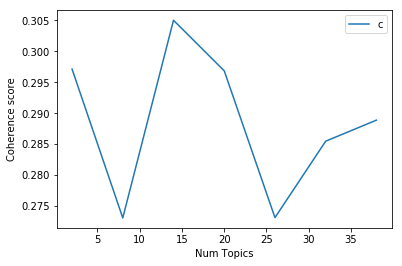

In [36]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [37]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model= gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data_lemmatized, dictionary=id2word, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

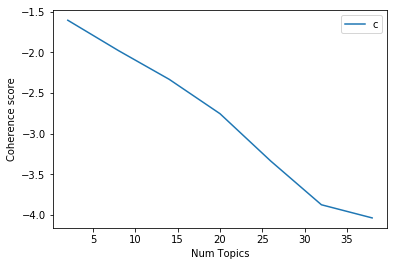

In [38]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [39]:
n=33
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True              
                                           )

#pp=lda_model.print_topics()
#cl=coherence_lda
#[[(pp,cl) for pp,cl in cp] for cp in corpus[:1]]
#doc_lda = lda_model[corpus]
pprint(lda_model.print_topics())



[(12,
  '0.041*"collector" + 0.029*"reason" + 0.022*"energy" + 0.021*"peg" + '
  '0.020*"water" + 0.018*"flexible" + 0.016*"pressure" + 0.015*"respect" + '
  '0.015*"constitutive" + 0.014*"weak_gel"'),
 (3,
  '0.030*"self" + 0.030*"quantum" + 0.017*"trace" + 0.016*"spin" + '
  '0.016*"matrix" + 0.015*"znonp" + 0.015*"stt" + 0.014*"ground_state" + '
  '0.013*"pdms" + 0.013*"cu"'),
 (26,
  '0.054*"carbon" + 0.036*"hardness" + 0.023*"draw" + 0.022*"round_robin" + '
  '0.021*"ferromagnetic" + 0.020*"increase" + 0.017*"mno" + 0.015*"biofilm" + '
  '0.014*"suppress" + 0.012*"methodology"'),
 (1,
  '0.031*"artifact" + 0.024*"rafm" + 0.020*"relate" + 0.017*"particle" + '
  '0.017*"symmetry" + 0.014*"pnipam_microgel" + 0.012*"use" + 0.012*"search" + '
  '0.012*"breathing" + 0.012*"diffusive"'),
 (10,
  '0.037*"rgo" + 0.024*"hap" + 0.020*"tio_nanotube" + 0.020*"sheet" + '
  '0.018*"photocatalytic" + 0.017*"heterojunction" + 0.016*"reduced_graphene" '
  '+ 0.015*"localize" + 0.015*"anatase_rutile

In [40]:
get_document_topics = lda_model.get_document_topics(corpus)
print(get_document_topics[424])

[(2, 0.028598666), (8, 0.27176693), (12, 0.010573841), (13, 0.038901385), (15, 0.08622715), (23, 0.05859408), (24, 0.27586323), (26, 0.047248982), (28, 0.023286395), (30, 0.04944595), (32, 0.05901519)]


In [41]:
for n in range(0,5,2):
    get_document_topics = lda_model.get_document_topics(corpus)
print(get_document_topics[n])

[(12, 0.0108924275), (13, 0.036824286), (21, 0.8401225), (28, 0.061982464), (32, 0.026945258)]


In [42]:
topics = lda_model.show_topics()
for topic in topics:
    print (topic)

(12, '0.041*"collector" + 0.029*"reason" + 0.022*"energy" + 0.021*"peg" + 0.020*"water" + 0.018*"flexible" + 0.016*"pressure" + 0.015*"respect" + 0.015*"constitutive" + 0.014*"weak_gel"')
(3, '0.030*"self" + 0.030*"quantum" + 0.017*"trace" + 0.016*"spin" + 0.016*"matrix" + 0.015*"znonp" + 0.015*"stt" + 0.014*"ground_state" + 0.013*"pdms" + 0.013*"cu"')
(26, '0.054*"carbon" + 0.036*"hardness" + 0.023*"draw" + 0.022*"round_robin" + 0.021*"ferromagnetic" + 0.020*"increase" + 0.017*"mno" + 0.015*"biofilm" + 0.014*"suppress" + 0.012*"methodology"')
(1, '0.031*"artifact" + 0.024*"rafm" + 0.020*"relate" + 0.017*"particle" + 0.017*"symmetry" + 0.014*"pnipam_microgel" + 0.012*"use" + 0.012*"search" + 0.012*"breathing" + 0.012*"diffusive"')
(10, '0.037*"rgo" + 0.024*"hap" + 0.020*"tio_nanotube" + 0.020*"sheet" + 0.018*"photocatalytic" + 0.017*"heterojunction" + 0.016*"reduced_graphene" + 0.015*"localize" + 0.015*"anatase_rutile" + 0.013*"nanosheet"')
(21, '0.035*"increase" + 0.029*"rate" + 0.028

In [45]:
all_topics = lda_model.get_document_topics(corpus, per_word_topics=True)

for doc_topics, word_topics, phi_values in all_topics:
    print('New Document \n')
    print('Document topics:', doc_topics) 
    print('Word topics:', word_topics)
    print('Phi values:', phi_values)
    print(" ")
    print('-------------- \n')

New Document 

Document topics: [(1, 0.17381075), (5, 0.51906145), (22, 0.016451437), (28, 0.023107389), (30, 0.22504161)]
Word topics: [(0, [5]), (1, [1, 30]), (2, [1]), (3, [30, 28]), (4, [30]), (5, [5]), (6, [30, 5, 1, 22]), (7, [30]), (8, [30]), (9, [30]), (10, [1]), (11, [5]), (12, [1, 28]), (13, [5, 30]), (14, [30]), (15, [1]), (16, [5, 1]), (17, [5, 1]), (18, [22]), (19, [5]), (20, [5]), (21, [5]), (22, [1, 30]), (23, [5]), (24, [5]), (25, [5, 22]), (26, [5]), (27, [1]), (28, [5]), (29, [30]), (30, [1]), (31, [5]), (32, [1]), (33, [5]), (34, [5]), (35, [5]), (36, [30, 28, 1]), (37, [5, 30]), (38, [5]), (39, [5]), (40, [30]), (41, [5]), (42, [5]), (43, [5]), (44, [30]), (45, [5]), (46, [30, 5, 28]), (47, [5]), (48, [5]), (49, [5]), (50, [30, 28]), (51, [30, 28]), (52, [30]), (53, [30, 22]), (54, [5]), (55, [5, 28]), (56, [30, 1, 22, 28]), (57, [5]), (58, [1])]
Phi values: [(0, [(5, 1.0)]), (1, [(1, 1.7841474), (30, 0.21584895)]), (2, [(1, 0.99999994)]), (3, [(28, 0.17381671), (30

Phi values: [(22, [(24, 0.996906)]), (46, [(24, 0.5763639), (27, 0.38916168), (28, 0.034048565)]), (50, [(17, 0.07192906), (24, 0.5090956), (27, 0.40294173), (28, 0.013146429)]), (51, [(18, 0.018043073), (27, 0.7234168), (28, 0.24703825), (30, 0.0106104165)]), (55, [(24, 0.9865493)]), (56, [(17, 0.082593694), (20, 0.075961635), (22, 0.05340411), (24, 1.9772351), (27, 0.8009414)]), (57, [(24, 0.9999781)]), (87, [(13, 0.055230543), (24, 1.8410658), (28, 0.10295718)]), (93, [(27, 2.9964712)]), (95, [(20, 0.11877563), (27, 0.87496096)]), (114, [(24, 0.99999994)]), (115, [(13, 0.99997115)]), (116, [(20, 0.16511782), (24, 3.8347573)]), (117, [(18, 1.0)]), (118, [(24, 0.98383296), (28, 0.01615369)]), (119, [(27, 2.0)]), (120, [(22, 0.9487427), (28, 0.05094445)]), (121, [(24, 1.0)]), (122, [(17, 0.25002384), (24, 1.7499336)]), (123, [(17, 0.025339227), (24, 0.9746608)]), (124, [(20, 0.6214696), (24, 0.37069428)]), (125, [(24, 3.9999998)]), (126, [(24, 0.96883875), (28, 0.03077934)]), (127, [(2

Word topics: [(20, [32, 17]), (50, [17, 32, 28]), (51, [32]), (55, [32, 17, 28]), (56, [32, 17]), (57, [32]), (73, [17, 28]), (122, [32, 17]), (128, [32]), (132, [32, 28]), (133, [17, 32]), (137, [17]), (138, [32, 28]), (160, [32]), (161, [32, 17]), (181, [32, 17]), (200, [32]), (221, [32]), (240, [32]), (250, [32]), (256, [32]), (267, [32, 28]), (275, [17]), (276, [32]), (277, [17]), (278, [17]), (279, [32]), (280, [32]), (281, [17]), (282, [17]), (283, [17]), (284, [32]), (285, [32]), (286, [17]), (287, [32]), (288, [32, 17]), (289, [17]), (290, [32]), (291, [32]), (292, [17]), (293, [32]), (294, [32]), (295, [17]), (296, [32]), (297, [32]), (298, [32]), (299, [32]), (300, [32, 17]), (301, [17, 32]), (302, [17]), (303, [17]), (304, [17]), (305, [32]), (306, [32]), (307, [32, 28]), (308, [17]), (309, [32]), (310, [17]), (311, [17]), (312, [17]), (313, [32]), (314, [32]), (315, [17]), (316, [17]), (317, [32]), (318, [17]), (319, [17]), (320, [32]), (321, [32]), (322, [32]), (323, [32])

Word topics: [(6, [21, 22, 6]), (40, [8]), (50, [21, 24, 16, 6, 8, 28, 22]), (53, [8, 22]), (79, [21]), (84, [21, 6]), (93, [21]), (120, [22, 28]), (124, [21, 24]), (132, [24, 16]), (155, [24, 8]), (156, [24, 28]), (168, [21, 24, 6]), (169, [21, 24]), (214, [21, 8, 22]), (230, [21, 22]), (242, [21, 24]), (250, [21, 16, 22, 6]), (255, [21, 8]), (262, [21, 6]), (299, [6, 30]), (307, [22, 28]), (324, [24, 21, 16, 8, 28]), (336, [21, 24]), (365, [21]), (369, [21, 16, 6, 28]), (371, [21, 6]), (383, [6]), (397, [8]), (398, [21]), (399, [8]), (400, [16]), (401, [21]), (402, [6]), (403, [22, 21]), (404, [21]), (405, [21, 8, 6]), (406, [21]), (407, [21]), (408, [21]), (409, [21]), (410, [21]), (411, [21]), (412, [16]), (413, [21, 22, 6]), (414, [24]), (415, [21]), (416, [16]), (417, [21]), (418, [21]), (419, [21]), (420, [16, 6]), (421, [21]), (422, [24]), (423, [24]), (424, [21]), (425, [21]), (426, [16]), (427, [21]), (428, [21, 22, 6]), (429, [21]), (430, [21]), (431, [24]), (432, [21, 24, 1

Phi values: [(6, [(6, 0.026584435), (21, 0.1491817), (22, 0.8230373)]), (9, [(22, 0.982956), (30, 0.017043948)]), (46, [(6, 0.03247281), (21, 0.4077482), (28, 0.55934644)]), (50, [(6, 0.049458884), (16, 0.66890407), (17, 0.6362204), (21, 0.20560354), (22, 0.12167398), (28, 1.3173373)]), (63, [(6, 0.09671014), (28, 0.90262824)]), (73, [(17, 0.2810948), (21, 0.2816473), (28, 0.436881)]), (93, [(21, 2.9991634)]), (129, [(22, 1.0)]), (132, [(16, 0.56502306), (28, 0.43276975)]), (133, [(17, 0.50311756), (21, 0.25599003), (28, 0.23171954)]), (157, [(22, 0.9994245)]), (168, [(6, 0.07509748), (21, 0.67467374), (22, 0.21926047), (28, 1.0302317)]), (186, [(17, 0.8309422), (28, 0.1687467)]), (245, [(21, 0.029302336), (22, 2.9706764)]), (267, [(6, 0.026334781), (21, 0.2778449), (28, 0.69581634)]), (268, [(21, 0.09799732), (22, 0.8971053)]), (369, [(6, 0.029754898), (16, 0.64034635), (21, 0.086500145), (28, 0.24333565)]), (403, [(22, 0.9998749)]), (428, [(6, 0.027663883), (21, 0.05662227), (22, 2.9

Word topics: [(6, [30, 21, 22]), (14, [30, 21]), (18, [18, 22]), (50, [18, 30, 17, 28, 27, 24, 21]), (51, [30, 18, 28]), (53, [30, 22]), (56, [30, 18, 17, 24, 22, 27, 21, 28]), (105, [21]), (108, [18, 30, 24, 22]), (117, [18]), (133, [30, 17, 24, 21, 28]), (153, [17, 27]), (170, [30, 28]), (171, [27]), (206, [18, 30, 22]), (225, [30, 22, 18, 28, 17, 21]), (231, [30, 21]), (238, [18, 21]), (269, [18, 30]), (299, [30]), (306, [18]), (308, [30, 17]), (310, [18, 17]), (329, [30, 18]), (396, [21, 30]), (397, [17]), (417, [21]), (461, [18, 30, 17]), (469, [24, 21]), (481, [30, 17, 28]), (483, [30]), (529, [24, 30]), (549, [18]), (568, [18]), (569, [30]), (570, [18]), (571, [18, 17]), (572, [18]), (573, [28]), (574, [18]), (575, [18, 30]), (576, [18]), (577, [18]), (578, [30]), (579, [18]), (580, [30]), (581, [18]), (582, [30]), (583, [28]), (584, [30, 18]), (585, [18, 30]), (586, [18]), (587, [18]), (588, [18]), (589, [17]), (590, [30, 28, 27]), (591, [18, 17]), (592, [18]), (593, [30]), (59

Phi values: [(3, [(2, 0.6658565), (4, 0.31030893), (31, 0.015192176)]), (4, [(4, 0.99703085)]), (6, [(2, 0.9515267), (4, 0.046721425)]), (8, [(2, 0.997354)]), (14, [(2, 0.99973464)]), (20, [(2, 0.8613004), (4, 0.13725209)]), (56, [(2, 0.82972753), (4, 0.14691761), (24, 0.017091166)]), (73, [(2, 0.96086895), (4, 0.037977997)]), (92, [(2, 2.2102106), (4, 0.7886595)]), (112, [(2, 0.2748094), (4, 0.7098384), (24, 0.014713611)]), (141, [(4, 0.5499343), (24, 0.44768408)]), (160, [(4, 0.66358656), (24, 0.335101)]), (170, [(2, 2.9981399)]), (177, [(2, 0.98670286), (24, 0.013260642)]), (234, [(2, 1.6952794), (4, 0.27543306), (24, 0.012292941), (28, 0.016859682)]), (277, [(2, 0.99996734)]), (353, [(2, 0.99997014)]), (395, [(2, 0.90544635), (4, 0.094538875)]), (466, [(4, 1.9972618)]), (507, [(2, 1.7030216), (4, 0.29525864)]), (517, [(2, 0.99998033)]), (521, [(4, 0.999999)]), (529, [(2, 1.9438423), (24, 0.056118798)]), (541, [(2, 1.0)]), (642, [(2, 0.99999994)]), (643, [(4, 1.0)]), (644, [(4, 0.95

Phi values: [(46, [(5, 0.0136772515), (14, 0.019202905), (24, 0.0619695), (28, 0.8984947)]), (50, [(14, 0.068887636), (16, 0.05800068), (17, 0.028325709), (24, 0.08678936), (25, 0.20254199), (28, 0.5500605)]), (56, [(17, 0.052593045), (24, 0.54504275), (28, 0.37288135), (31, 0.027913924)]), (67, [(16, 0.026834851), (25, 0.23870632), (28, 0.65311253), (31, 0.080574594)]), (73, [(14, 0.19117564), (17, 0.051897813), (28, 0.756484)]), (86, [(16, 0.050951295), (28, 0.94876873)]), (109, [(28, 0.9997944)]), (133, [(10, 0.03448773), (17, 0.07021559), (24, 0.5916448), (28, 0.3032962)]), (145, [(13, 0.04223055), (24, 0.10190582), (28, 0.84154123)]), (160, [(13, 0.026056299), (24, 0.7625527), (25, 0.21074392)]), (228, [(14, 0.2363317), (16, 0.65279824), (17, 0.11075639)]), (242, [(24, 0.2692783), (28, 0.730491)]), (267, [(25, 0.010781115), (28, 0.989062)]), (329, [(28, 0.99487215)]), (356, [(25, 0.99995655)]), (369, [(16, 1.0599056), (28, 1.9395559)]), (412, [(16, 1.0)]), (462, [(5, 0.47738805), 

Phi values: [(40, [(11, 0.8892249), (32, 0.110383645)]), (48, [(5, 0.032709986), (11, 0.96729)]), (54, [(11, 0.94416344), (32, 0.052836917)]), (56, [(6, 0.13276495), (24, 0.5022478), (28, 0.010647908), (32, 0.35125938)]), (67, [(11, 0.930479), (32, 0.06679932)]), (79, [(32, 0.9985794)]), (86, [(6, 0.046353467), (11, 0.9475241)]), (93, [(11, 0.99427176)]), (112, [(11, 0.5236005), (24, 0.4707576)]), (148, [(11, 0.99974746)]), (160, [(11, 0.34522662), (24, 0.56360596), (32, 0.091126405)]), (163, [(5, 0.011896705), (11, 0.9722304), (32, 0.015368818)]), (168, [(6, 0.0902568), (24, 0.21872967), (28, 0.026195183), (32, 0.66416305)]), (216, [(11, 0.99993354)]), (233, [(11, 0.2627316), (28, 0.01751828), (32, 0.719432)]), (257, [(28, 0.0643167), (32, 0.9355964)]), (267, [(6, 0.062626824), (11, 0.8554747), (28, 0.035007186), (32, 0.04640714)]), (334, [(24, 0.7121378), (32, 0.28786108)]), (413, [(6, 0.09346949), (11, 0.7962801), (28, 0.021947648), (32, 0.086910985)]), (435, [(11, 0.98548454), (32,

Phi values: [(50, [(14, 0.021635888), (17, 0.9475054), (28, 0.024415297)]), (56, [(9, 0.011474773), (17, 2.9589374), (28, 0.027837401)]), (71, [(17, 2.9866233), (28, 0.013238867)]), (85, [(17, 0.990574)]), (94, [(14, 0.022218963), (17, 0.9212777), (28, 0.056448124)]), (112, [(17, 0.9410205), (28, 0.0534989)]), (145, [(17, 0.87081176), (28, 0.12772831)]), (161, [(17, 0.9999683)]), (163, [(17, 0.9997343)]), (177, [(17, 0.9997038)]), (186, [(17, 0.99745655)]), (194, [(17, 1.9662061), (28, 0.033362158)]), (228, [(14, 0.019640949), (17, 0.98034024)]), (257, [(28, 0.99949515)]), (338, [(17, 1.9815893), (28, 0.018403497)]), (349, [(17, 0.9999917)]), (413, [(17, 0.9905679)]), (479, [(17, 0.9935101)]), (481, [(17, 1.9620117), (28, 0.037805043)]), (488, [(17, 0.9999986)]), (489, [(17, 1.9999564)]), (499, [(17, 0.9896765), (28, 0.010323572)]), (530, [(17, 0.9877077), (28, 0.012280134)]), (560, [(14, 0.99999994)]), (647, [(17, 0.99635273)]), (706, [(17, 1.9999974)]), (799, [(17, 0.9994421)]), (806

Phi values: [(46, [(21, 0.88643837), (28, 0.113103636)]), (51, [(0, 0.9222195), (28, 0.07583728)]), (71, [(17, 0.86042804), (21, 0.12795785), (28, 0.01153926)]), (92, [(0, 2.7205987), (17, 0.19474608), (28, 0.081907086)]), (94, [(17, 0.8434598), (28, 0.15635665)]), (187, [(9, 0.31179494), (17, 0.68804073)]), (194, [(17, 0.6695302), (21, 0.27449533), (22, 0.021249864), (28, 0.03437069)]), (206, [(13, 0.060032535), (16, 0.897993), (22, 0.04093998)]), (222, [(17, 0.5085593), (21, 0.4388145), (28, 0.042734176)]), (230, [(21, 0.97658783), (22, 0.023405597)]), (244, [(0, 0.5356584), (13, 0.2100392), (21, 0.24760278)]), (247, [(13, 0.73990554), (21, 0.2597811)]), (254, [(16, 2.592198), (28, 0.40761086)]), (349, [(17, 0.99996954)]), (413, [(0, 0.04738881), (17, 0.79774904), (21, 0.122086115), (28, 0.022553831)]), (440, [(22, 0.9999735)]), (456, [(21, 0.99997956)]), (461, [(17, 0.681332), (21, 0.293718), (28, 0.0246044)]), (463, [(0, 0.3439712), (17, 1.6560138)]), (466, [(0, 0.2507007), (21, 1.

Phi values: [(20, [(28, 0.99687904)]), (46, [(14, 0.052172575), (24, 0.024488505), (28, 0.9225908)]), (50, [(9, 0.120705694), (14, 0.29226127), (16, 0.65088993), (24, 0.053555664), (28, 0.88198006)]), (56, [(9, 0.121227644), (24, 0.31477144), (28, 0.5595576)]), (90, [(9, 0.6266416), (28, 0.3728229)]), (94, [(14, 0.12827045), (28, 0.8714701)]), (115, [(13, 1.9999985)]), (133, [(24, 0.42787513), (28, 0.5699441)]), (141, [(24, 0.9462551), (28, 0.052669305)]), (155, [(14, 0.6794948), (24, 0.32048786)]), (170, [(28, 0.99600005)]), (206, [(13, 0.28400266), (16, 0.7155134)]), (250, [(16, 1.9991763)]), (254, [(16, 0.56236583), (28, 0.43761393)]), (307, [(28, 0.9999643)]), (369, [(16, 0.7926556), (28, 0.20724943)]), (392, [(16, 1.9999998)]), (400, [(16, 1.9999342)]), (416, [(16, 0.9999999)]), (426, [(16, 3.0)]), (452, [(16, 0.9999999)]), (454, [(16, 0.9999999)]), (466, [(14, 1.9982237)]), (468, [(28, 0.9995203)]), (486, [(16, 3.9999998)]), (491, [(16, 0.99999994)]), (503, [(13, 0.99984753)]), (

Phi values: [(3, [(21, 0.7126975), (23, 0.2162234), (28, 0.06496073)]), (6, [(6, 0.091026574), (21, 0.9080332)]), (51, [(6, 0.17603157), (23, 0.73417395), (28, 0.08713339)]), (71, [(21, 1.8931841), (28, 0.10496251)]), (92, [(23, 1.9727067), (28, 0.021977242)]), (194, [(21, 0.21272057), (23, 0.7707629), (28, 0.016375443)]), (222, [(21, 0.70916426), (23, 0.24820003), (28, 0.042459175)]), (239, [(21, 0.9998397)]), (245, [(21, 0.10528351), (23, 0.8947155)]), (254, [(6, 0.14872253), (16, 0.08328028), (23, 0.57123727), (28, 0.19676)]), (263, [(21, 0.602282), (23, 0.39466658)]), (301, [(6, 0.056822576), (23, 0.9427453)]), (338, [(23, 0.8908762), (28, 0.10376348)]), (353, [(21, 0.98609227), (28, 0.013557863)]), (378, [(6, 1.0)]), (394, [(6, 0.9985784)]), (455, [(9, 0.019403094), (23, 1.7300372), (25, 0.21115819), (28, 0.039140206)]), (456, [(6, 0.02456029), (21, 0.97543967)]), (457, [(21, 0.5482264), (23, 0.41509247), (28, 0.035697002)]), (458, [(25, 1.0)]), (459, [(23, 2.0)]), (460, [(23, 0.9

Phi values: [(3, [(2, 0.30059573), (4, 0.61397845), (14, 0.03517996), (20, 0.15529458), (28, 0.8935371)]), (35, [(2, 1.0647836), (5, 0.0571376), (20, 0.7910596), (24, 0.08699928)]), (50, [(4, 0.0895755), (6, 0.11813366), (14, 0.07408207), (18, 0.027391208), (24, 0.5711712), (28, 1.1184713)]), (56, [(2, 0.3068857), (4, 0.23816156), (6, 0.100912355), (18, 0.017445344), (20, 0.55580705), (24, 0.643335), (28, 0.13598526)]), (108, [(2, 0.094319955), (4, 0.4187949), (6, 0.01123013), (18, 0.0122642405), (20, 0.35441786), (24, 0.10888814)]), (130, [(4, 0.79031694), (24, 0.20968303)]), (148, [(20, 0.9989408)]), (153, [(2, 0.99582577)]), (158, [(24, 0.21265018), (28, 0.78666246)]), (163, [(4, 0.4014118), (5, 0.035242725), (18, 0.3020245), (20, 1.2576531)]), (169, [(5, 0.5364369), (24, 0.4632879)]), (182, [(4, 0.14325874), (20, 0.7278107), (24, 0.10102067), (28, 0.027871657)]), (194, [(20, 2.4455736), (24, 0.40107173), (28, 0.15171666)]), (239, [(2, 0.87414396), (24, 0.12545897)]), (243, [(4, 1.8

Phi values: [(11, [(23, 0.99988854)]), (71, [(17, 0.9900509)]), (138, [(23, 0.92797893), (28, 0.071759604)]), (177, [(17, 0.9987536)]), (186, [(17, 0.99431735)]), (194, [(17, 0.08173771), (23, 0.91510993)]), (228, [(14, 0.14814822), (17, 1.8517007)]), (240, [(23, 0.99994713)]), (254, [(23, 2.8444588), (28, 0.1554469)]), (349, [(17, 0.3731052), (23, 1.6268948)]), (457, [(23, 0.9864268), (28, 0.013459032)]), (473, [(23, 1.0000001)]), (479, [(14, 0.02529894), (17, 0.9745705)]), (488, [(17, 0.9987883)]), (489, [(17, 0.9999)]), (560, [(14, 2.0)]), (647, [(17, 0.99997747)]), (652, [(17, 0.5757394), (23, 0.4242009)]), (698, [(23, 0.9999137)]), (799, [(17, 0.046095867), (23, 0.95380324)]), (843, [(17, 0.9824787), (28, 0.01752133)]), (844, [(17, 0.106822096), (23, 0.8931737)]), (848, [(17, 2.0)]), (854, [(17, 0.09906618), (23, 0.90093374)]), (858, [(17, 0.3840929), (23, 0.61590713)]), (861, [(17, 1.0)]), (863, [(17, 0.31891394), (23, 2.681086)]), (865, [(17, 1.0239832), (23, 0.9759815)]), (866,

Phi values: [(36, [(28, 0.99947953)]), (46, [(14, 0.073911436), (28, 1.7401309), (31, 0.18521817)]), (67, [(28, 0.34529325), (31, 0.6543581)]), (94, [(14, 0.09953439), (28, 0.9003315)]), (120, [(28, 0.57363284), (31, 1.4262775)]), (156, [(28, 0.9929818)]), (163, [(4, 0.022761973), (31, 0.9726727)]), (179, [(31, 0.99995303)]), (182, [(4, 0.16997458), (28, 0.82913274)]), (214, [(28, 0.54128534), (31, 0.45854545)]), (234, [(4, 0.011681272), (28, 0.988186)]), (346, [(31, 0.999892)]), (369, [(4, 0.032177288), (28, 0.9676804)]), (429, [(28, 0.27339604), (31, 0.7264599)]), (440, [(31, 0.9999885)]), (449, [(14, 0.23117578), (28, 0.013938848), (31, 1.7548622)]), (457, [(28, 1.9993782)]), (472, [(28, 0.9984158)]), (513, [(31, 0.9998153)]), (530, [(28, 0.9995048)]), (620, [(28, 0.99985355)]), (628, [(28, 0.9998209)]), (656, [(28, 0.9994005)]), (659, [(4, 0.0667332), (31, 0.9332046)]), (671, [(31, 1.0)]), (806, [(14, 3.0000002)]), (899, [(14, 0.4085725), (28, 0.5912026)]), (953, [(4, 0.9999996)]),

Document topics: [(4, 0.057366993), (7, 0.03636074), (16, 0.25339535), (17, 0.07498207), (26, 0.40444726), (28, 0.09361719), (32, 0.036708556)]
Word topics: [(4, [7, 4]), (11, [26]), (36, [17, 28, 16]), (50, [28, 16, 17, 32]), (56, [26, 17, 7, 28, 32, 4]), (74, [7]), (85, [17, 7, 28]), (225, [16, 28, 17]), (234, [28, 4, 32]), (250, [16, 32]), (257, [28, 32]), (267, [28, 32]), (346, [32]), (378, [26]), (394, [4]), (486, [16]), (510, [17]), (526, [16, 7]), (543, [17, 4]), (550, [16]), (565, [16]), (608, [26]), (628, [28, 17]), (706, [17]), (720, [26]), (841, [16]), (844, [26]), (894, [26, 32]), (982, [26]), (1215, [26]), (1216, [26]), (1217, [26]), (1218, [26]), (1219, [4]), (1220, [4, 32]), (1221, [26]), (1222, [26]), (1223, [26]), (1224, [26]), (1225, [26]), (1226, [26])]
Phi values: [(4, [(4, 0.24950677), (7, 0.7435326)]), (11, [(26, 0.99946797)]), (36, [(16, 0.10475786), (17, 0.4504307), (28, 0.44461858)]), (50, [(16, 0.38194624), (17, 0.19037282), (28, 0.39674932), (32, 0.02304011)]

Word topics: [(6, [6]), (50, [6, 28, 25]), (51, [6, 28]), (56, [6, 28]), (63, [6, 28]), (90, [6, 28]), (254, [6, 28]), (257, [28]), (413, [6, 28]), (420, [6]), (421, [6, 28]), (461, [6, 28]), (510, [6]), (528, [6]), (595, [6, 28]), (691, [6]), (727, [6, 28]), (742, [25]), (955, [6]), (1029, [6, 28]), (1078, [6]), (1127, [6, 28]), (1232, [6]), (1243, [6]), (1259, [6]), (1260, [6]), (1261, [6, 28]), (1262, [6]), (1263, [6]), (1264, [6]), (1265, [6]), (1266, [6]), (1267, [6, 28]), (1268, [6]), (1269, [6]), (1270, [6])]
Phi values: [(6, [(6, 0.9988959)]), (50, [(6, 0.71696746), (25, 0.022788689), (28, 0.25944513)]), (51, [(6, 1.8748248), (28, 0.12403185)]), (56, [(6, 0.9495244), (28, 0.048904464)]), (63, [(6, 0.88734806), (28, 0.11251861)]), (90, [(6, 0.98329675), (28, 0.016624272)]), (254, [(6, 3.3989646), (28, 0.601015)]), (257, [(28, 0.99977404)]), (413, [(6, 0.8683238), (28, 0.13093667)]), (420, [(6, 0.9999941)]), (421, [(6, 0.9017536), (28, 0.097158715)]), (461, [(6, 0.86930335), (28,

Word topics: [(9, [30]), (47, [24]), (56, [24, 20, 30, 28, 17, 9]), (108, [20, 24, 30]), (145, [28, 24, 20, 30, 17]), (160, [24]), (163, [20, 17]), (169, [24, 9]), (229, [20]), (240, [24]), (267, [28, 20]), (307, [28, 20, 30]), (309, [24]), (334, [24]), (452, [20]), (454, [20]), (461, [20, 28, 30, 17]), (481, [20, 28, 17, 30]), (525, [20, 28, 24]), (529, [24]), (553, [30]), (628, [20, 28, 17, 30]), (647, [17, 9]), (732, [24]), (733, [28]), (816, [24, 17]), (866, [17]), (893, [20]), (972, [9]), (995, [20]), (1039, [20]), (1043, [20]), (1122, [9, 17]), (1182, [24, 28]), (1240, [20]), (1241, [20]), (1243, [20]), (1244, [20, 28]), (1246, [20]), (1252, [20]), (1303, [20]), (1304, [24]), (1305, [20]), (1306, [24]), (1307, [24]), (1308, [24]), (1309, [20, 24]), (1310, [28, 17, 24]), (1311, [24]), (1312, [24])]
Phi values: [(9, [(30, 0.9999998)]), (47, [(24, 0.99999976)]), (56, [(9, 0.022267204), (17, 0.04129342), (20, 0.7914418), (24, 0.8647927), (28, 0.13969328), (30, 0.14014147)]), (108, [(

Phi values: [(3, [(4, 0.22491363), (28, 0.7737494)]), (46, [(5, 0.011473099), (28, 0.98705614)]), (50, [(4, 0.026702436), (9, 1.3992994), (16, 0.78473866), (28, 0.7881549)]), (56, [(4, 0.16227035), (9, 0.6155613), (28, 0.21902034)]), (73, [(4, 0.07419028), (9, 0.6517676), (28, 0.27339694)]), (145, [(28, 0.9940689)]), (187, [(4, 0.08442967), (9, 0.91545665)]), (228, [(16, 0.9997001)]), (242, [(28, 0.9982726)]), (254, [(16, 0.6341874), (28, 0.36578438)]), (368, [(4, 0.80765975), (9, 0.053682692), (28, 0.13838723)]), (369, [(4, 0.05213696), (12, 0.03715866), (16, 0.7628001), (28, 0.14782739)]), (452, [(16, 0.9999999)]), (454, [(16, 0.9999999)]), (455, [(9, 0.83735645), (28, 0.16248508)]), (462, [(5, 0.99998766)]), (465, [(9, 0.73430836), (16, 2.2656708)]), (472, [(9, 0.3662976), (28, 0.63020813)]), (491, [(16, 2.9999998)]), (526, [(9, 0.1780093), (16, 0.82195795)]), (536, [(4, 0.99908763)]), (551, [(9, 1.1533465), (12, 0.050665587), (16, 0.79598814)]), (558, [(16, 0.99999976)]), (644, [(4

Phi values: [(6, [(4, 0.0141230505), (5, 0.9844901)]), (46, [(5, 0.15585029), (28, 0.83264565), (32, 0.011015076)]), (50, [(17, 0.4560032), (23, 0.010255677), (28, 1.5118048), (32, 0.013943928)]), (67, [(28, 0.9134005), (32, 0.08535448)]), (112, [(4, 0.567438), (17, 0.051781084), (28, 0.3787603)]), (145, [(17, 0.09799409), (23, 0.05171788), (28, 1.8493125)]), (155, [(5, 1.9995369)]), (163, [(4, 0.049907476), (5, 1.6284425), (17, 0.3106324)]), (169, [(5, 0.99998033)]), (234, [(4, 0.01792438), (28, 0.97209895)]), (254, [(23, 0.19140612), (28, 4.8084683)]), (262, [(4, 0.08560724), (28, 0.9139779)]), (305, [(32, 0.99999994)]), (346, [(5, 3.90974), (32, 0.09025523)]), (455, [(17, 0.3342015), (23, 0.62857354), (28, 1.0371807)]), (457, [(23, 0.13746342), (28, 0.8621934)]), (462, [(5, 1.9999992)]), (512, [(17, 0.39913645), (28, 0.6008534)]), (513, [(5, 0.8247974), (17, 0.17510667)]), (517, [(5, 0.9999896)]), (529, [(5, 1.9987191)]), (542, [(4, 0.9676357), (32, 0.030384572)]), (545, [(5, 0.9999

Phi values: [(20, [(2, 0.031135222), (20, 0.96533287)]), (56, [(2, 0.04097375), (20, 0.9528983)]), (81, [(2, 4.9988523)]), (94, [(20, 0.9628752), (28, 0.03702827)]), (95, [(20, 1.994458)]), (132, [(20, 1.9682952), (28, 0.03083465)]), (145, [(20, 0.92283523), (28, 0.076618895)]), (163, [(20, 1.9997128)]), (194, [(20, 3.9938407)]), (200, [(20, 0.99998546)]), (222, [(20, 0.9751339), (28, 0.024577105)]), (225, [(20, 1.994297)]), (229, [(20, 3.9999714)]), (234, [(2, 0.112487495), (20, 1.8026192), (28, 0.084660664)]), (346, [(20, 1.9997864)]), (416, [(20, 2.0)]), (452, [(20, 0.99999994)]), (454, [(20, 1.0)]), (461, [(20, 0.9966485)]), (509, [(20, 0.99999917)]), (571, [(20, 0.99913675)]), (628, [(20, 0.9839376), (28, 0.016012242)]), (735, [(20, 1.9796417), (28, 0.014784845)]), (805, [(20, 1.9999944)]), (831, [(20, 0.9908305)]), (890, [(20, 2.9999626)]), (893, [(20, 0.9999975)]), (895, [(20, 0.99994236)]), (936, [(20, 0.98459226), (28, 0.015128666)]), (1043, [(20, 1.0)]), (1218, [(20, 1.000000

Phi values: [(50, [(9, 1.9392462), (21, 0.03492472), (28, 0.021286339)]), (90, [(9, 0.99905306)]), (268, [(9, 0.98899364), (21, 0.011000753)]), (361, [(9, 0.5804167), (21, 0.41950974)]), (368, [(9, 0.5179497), (21, 0.4526812), (28, 0.02602055)]), (373, [(9, 0.9999983)]), (405, [(21, 0.991331)]), (413, [(9, 0.37511042), (21, 0.36660212), (23, 0.18516746), (28, 0.06926462)]), (439, [(9, 2.9231832), (21, 0.0289204), (23, 0.04144354)]), (510, [(9, 0.87277174), (21, 0.12656012)]), (526, [(9, 0.9762759), (23, 0.023643933)]), (543, [(9, 1.9431303), (21, 0.056822136)]), (564, [(9, 1.9984907)]), (566, [(9, 1.0)]), (620, [(9, 0.9846243), (28, 0.015212225)]), (644, [(9, 0.9485351), (21, 0.04537107)]), (647, [(9, 0.9996079)]), (684, [(9, 1.9998708)]), (809, [(9, 0.9999871)]), (844, [(23, 0.11351706), (26, 0.88620806)]), (870, [(9, 1.0)]), (882, [(23, 0.9977363)]), (896, [(9, 0.99999946)]), (927, [(9, 0.99728405)]), (929, [(9, 2.0)]), (937, [(9, 1.0000001)]), (942, [(9, 0.99999994)]), (981, [(9, 2.

Phi values: [(47, [(5, 0.012844217), (24, 0.98715585)]), (50, [(6, 0.04058797), (16, 0.057926495), (17, 0.16298315), (24, 0.35560283), (27, 0.3675048), (28, 0.010308468)]), (95, [(4, 0.3377499), (16, 0.08263444), (27, 1.5792565)]), (96, [(27, 0.9997383)]), (138, [(24, 0.9761068), (28, 0.02386784)]), (187, [(4, 0.3297352), (17, 0.6700653)]), (194, [(17, 0.11791985), (24, 0.8770035)]), (228, [(16, 0.505617), (17, 0.49423024)]), (234, [(4, 0.053598396), (24, 0.6236552), (27, 0.29244593), (28, 0.03005784)]), (279, [(4, 0.22145276), (24, 0.77834433)]), (336, [(24, 1.9979867)]), (338, [(17, 0.81455135), (27, 0.16673267), (28, 0.018568473)]), (367, [(6, 1.0)]), (368, [(4, 0.9874106), (28, 0.011895865)]), (377, [(6, 0.026447324), (24, 0.20826575), (27, 0.7652864)]), (379, [(4, 0.9905742), (6, 0.64664155), (16, 0.24444297), (27, 0.11829374)]), (433, [(6, 1.5842297), (27, 0.4157702)]), (452, [(16, 0.99999946)]), (454, [(16, 0.99999946)]), (543, [(4, 0.3354101), (17, 0.65781325)]), (627, [(24, 0.

Word topics: [(3, [27, 28, 30]), (8, [30, 28]), (35, [27]), (46, [27, 28, 30]), (56, [27, 30, 28, 22]), (86, [28, 12]), (148, [27, 30]), (155, [27]), (166, [27]), (238, [27]), (242, [27, 28]), (244, [27, 13, 28]), (351, [27, 28]), (413, [27, 28, 22]), (481, [28, 30]), (490, [12]), (532, [27, 30]), (556, [27]), (750, [27]), (886, [27]), (888, [27]), (890, [27]), (891, [27]), (892, [27]), (893, [27]), (895, [27]), (897, [27]), (903, [27]), (904, [12, 13]), (905, [27]), (907, [27]), (908, [27]), (909, [27]), (912, [27]), (915, [27]), (916, [27]), (918, [27]), (920, [27]), (987, [28, 30]), (990, [13]), (1041, [22]), (1055, [27]), (1146, [27, 28]), (1152, [27, 28]), (1281, [27]), (1368, [27]), (1378, [5, 22]), (1492, [27]), (1495, [27, 12]), (1497, [27, 28, 30]), (1499, [27]), (1500, [27]), (1565, [27]), (1566, [12]), (1567, [27]), (1568, [12]), (1569, [27]), (1570, [12]), (1571, [12]), (1572, [12]), (1573, [27]), (1574, [27])]
Phi values: [(3, [(27, 1.6466032), (28, 0.31397936), (30, 0.035

Word topics: [(3, [14, 28, 23]), (46, [28, 14]), (50, [14, 16, 28, 9, 25]), (51, [14, 28, 23]), (56, [28, 9]), (73, [14, 28, 9, 23]), (87, [28, 23, 13]), (94, [14, 28]), (145, [28, 13, 23, 14]), (155, [14, 5]), (187, [9]), (206, [16, 13]), (214, [28, 16]), (222, [14, 28, 23]), (225, [16, 28]), (228, [14, 16]), (247, [13]), (346, [5]), (369, [16, 28]), (379, [16, 9]), (439, [14, 9, 28, 23]), (465, [16, 9]), (466, [14]), (480, [23]), (484, [16]), (486, [16]), (491, [16]), (526, [16, 9, 23]), (530, [28, 13]), (543, [9]), (560, [14]), (644, [16, 28, 9]), (725, [28]), (729, [14]), (778, [14]), (799, [16, 23]), (805, [5]), (806, [14, 16]), (851, [14, 28]), (924, [16]), (931, [14]), (948, [14, 25]), (950, [14]), (951, [14]), (952, [16]), (953, [16]), (960, [14]), (963, [16]), (964, [13]), (971, [16]), (974, [14]), (978, [13]), (999, [25]), (1049, [14]), (1061, [9, 25]), (1084, [14]), (1095, [14]), (1288, [16]), (1331, [23, 14]), (1339, [9]), (1591, [14, 28]), (1592, [14]), (1593, [14]), (1594

Phi values: [(36, [(16, 0.14701945), (17, 0.40016028), (28, 1.4526439)]), (46, [(21, 0.4136052), (27, 0.027518993), (28, 0.5506928)]), (50, [(14, 0.044226352), (16, 0.21412317), (17, 0.06755915), (21, 0.083264545), (27, 0.06938849), (28, 0.5177988)]), (56, [(4, 0.042363316), (17, 0.10212132), (21, 0.38677362), (27, 0.18156646), (28, 0.28576294)]), (71, [(4, 0.07926944), (17, 0.24753773), (21, 0.34681824), (28, 0.32636857)]), (87, [(13, 0.40744218), (21, 0.21258588), (28, 0.37991226)]), (92, [(4, 0.5168932), (17, 0.0114033315), (28, 0.47150686)]), (120, [(28, 0.9997233)]), (126, [(4, 0.22457364), (21, 0.052800428), (28, 0.7225318)]), (132, [(16, 0.5147143), (28, 0.4840845)]), (133, [(4, 0.025697403), (10, 0.023378167), (17, 0.20452818), (21, 0.39688033), (28, 0.34868535)]), (145, [(13, 0.9252625), (17, 0.016066657), (21, 0.3484255), (28, 0.70094657)]), (158, [(21, 0.46518221), (28, 0.53477293)]), (194, [(17, 0.10087114), (21, 0.3896188), (28, 0.5090829)]), (225, [(16, 0.6196626), (17, 0

Phi values: [(24, [(5, 0.9400466), (6, 0.059952274)]), (50, [(4, 0.047042474), (6, 0.026858157), (16, 1.3131577), (21, 0.30539438), (28, 0.30689204)]), (84, [(4, 0.3717514), (6, 0.09675869), (16, 0.3292132), (21, 4.2021956)]), (87, [(13, 0.02665495), (21, 0.7551384), (28, 0.2180716)]), (93, [(21, 0.9999711)]), (145, [(6, 0.013406946), (13, 0.034181416), (20, 0.02597311), (21, 0.69890034), (28, 0.22720292)]), (161, [(16, 0.99976325)]), (194, [(20, 1.0441375), (21, 0.78853077), (28, 0.16649105)]), (222, [(20, 0.050423134), (21, 0.81538206), (28, 0.13389814)]), (228, [(16, 2.8447325), (21, 0.15497017)]), (250, [(16, 0.67930084), (21, 0.31775302)]), (254, [(6, 0.020753173), (16, 0.86336946), (28, 0.11587413)]), (279, [(4, 0.9998238)]), (307, [(20, 0.037342858), (28, 0.962568)]), (324, [(16, 0.68627447), (21, 0.047639806), (28, 0.2659184)]), (368, [(4, 2.0870032), (21, 0.83395946), (28, 0.079036094)]), (369, [(4, 0.110890694), (6, 0.019807743), (16, 1.5410357), (20, 0.10126927), (21, 0.1575

Phi values: [(6, [(10, 0.719377), (21, 0.26450002)]), (35, [(10, 0.99955577)]), (50, [(14, 0.03027705), (16, 0.25511053), (17, 0.21528876), (21, 0.13763852), (28, 0.33481684), (32, 0.02212617)]), (56, [(4, 0.03434434), (17, 0.20493978), (21, 0.40263307), (26, 0.14455993), (28, 0.116365656), (32, 0.09560292)]), (116, [(4, 0.04630832), (10, 2.953448)]), (133, [(4, 0.010185925), (10, 0.5017622), (17, 0.20068227), (21, 0.20200317), (28, 0.069422245), (32, 0.015508112)]), (223, [(21, 0.9971026)]), (233, [(13, 0.10869722), (16, 0.47411323), (21, 0.5748019), (28, 0.41645098), (32, 0.42593652)]), (234, [(4, 0.032872003), (21, 0.2612272), (28, 0.65815145), (32, 0.047534708)]), (235, [(21, 0.99999994)]), (237, [(21, 0.99999493)]), (239, [(21, 0.9505996), (32, 0.049030982)]), (250, [(16, 2.6778955), (21, 2.9059534), (32, 0.41558823)]), (256, [(21, 0.86099243), (32, 0.13899188)]), (257, [(21, 0.07022781), (28, 0.6825105), (32, 0.24726169)]), (338, [(17, 0.6407889), (28, 0.35917598)]), (346, [(32, 

Phi values: [(6, [(2, 0.16100582), (14, 0.08378458), (21, 0.5282449), (22, 0.11657624), (30, 0.11032678)]), (46, [(2, 0.013825943), (14, 0.020941338), (21, 0.4843744), (28, 0.4700341), (30, 0.010723672)]), (50, [(14, 0.40891048), (16, 0.6135628), (18, 0.04198384), (21, 0.34557956), (28, 1.5662959), (30, 0.014143511)]), (51, [(0, 1.4579905), (2, 0.02654151), (14, 0.08137596), (28, 0.35060462), (30, 0.07817938)]), (56, [(2, 0.10470163), (18, 0.031745225), (21, 0.41985056), (22, 0.13542359), (28, 0.22608338), (30, 0.08145288)]), (67, [(2, 0.020187438), (16, 0.03869918), (21, 0.683524), (28, 0.2535292)]), (71, [(2, 0.075025626), (21, 0.54813385), (28, 0.37593937)]), (73, [(0, 0.7691054), (2, 0.05484971), (14, 0.038025673), (21, 0.06578145), (28, 0.07218059)]), (84, [(0, 1.3599105), (2, 0.032394912), (16, 0.019040909), (21, 0.5886153)]), (86, [(2, 0.10413903), (16, 0.14729074), (18, 0.010037011), (28, 0.7382747)]), (92, [(0, 1.6156843), (2, 0.2417264), (28, 0.14224206)]), (108, [(2, 0.28365

Word topics: [(50, [17, 9, 14, 28]), (56, [17, 22]), (71, [17]), (163, [17, 22, 18]), (186, [17]), (228, [17, 14]), (413, [17]), (436, [17]), (461, [17, 18]), (479, [17]), (530, [17, 18, 22]), (536, [17]), (543, [17, 9]), (551, [9]), (560, [14]), (596, [22]), (647, [17]), (819, [17]), (843, [17]), (844, [17]), (847, [17]), (848, [17]), (858, [17]), (859, [17]), (866, [17]), (872, [17]), (873, [17]), (877, [17]), (878, [17]), (880, [17]), (881, [17]), (1122, [17, 9]), (1563, [17, 28]), (1723, [17]), (1724, [17]), (1725, [17]), (1726, [17]), (1727, [17]), (1728, [17]), (1729, [17]), (1730, [17]), (1731, [17]), (1732, [17]), (1733, [18]), (1734, [17]), (1735, [17]), (1736, [17])]
Phi values: [(50, [(9, 0.032331273), (14, 0.025751416), (17, 1.9230915), (28, 0.010857708)]), (56, [(17, 0.96133333), (22, 0.019959679)]), (71, [(17, 3.995797)]), (163, [(17, 0.8211531), (18, 0.06869784), (22, 0.10996501)]), (186, [(17, 0.99940914)]), (228, [(14, 0.0116119785), (17, 0.9883538)]), (413, [(17, 0.99


Document topics: [(8, 0.32585573), (9, 0.10607527), (13, 0.035169), (14, 0.033369694), (15, 0.05325543), (17, 0.059810363), (24, 0.21926698), (28, 0.04513843), (30, 0.102703415)]
Word topics: [(6, [30, 14]), (46, [8, 28, 24, 30, 15]), (50, [24, 9, 28, 8, 17, 14, 30, 15]), (56, [24, 8, 30, 17, 9, 28]), (150, [24, 15, 14]), (160, [24, 8, 13]), (182, [24, 17, 28]), (206, [30, 13]), (213, [8, 15]), (240, [24, 15]), (244, [13, 15, 28]), (247, [13]), (268, [9]), (334, [24, 8]), (377, [24]), (441, [9, 28]), (455, [9, 28, 17]), (481, [8, 30, 17, 28]), (489, [17, 24]), (526, [9]), (529, [24, 30]), (536, [8, 17]), (578, [30]), (593, [8, 15, 30]), (612, [30]), (627, [24]), (644, [8, 9, 28, 30]), (690, [9, 28]), (715, [9, 28]), (724, [28]), (763, [30]), (806, [14]), (809, [9]), (877, [8, 17, 9, 15]), (882, [15, 17]), (900, [13, 24, 9, 17, 15]), (904, [8, 13]), (1029, [28, 9]), (1040, [28]), (1095, [14]), (1401, [24]), (1405, [8]), (1479, [14, 9]), (1501, [8]), (1520, [24]), (1550, [8, 17, 15]), (

Phi values: [(3, [(14, 0.03689492), (17, 0.027376574), (21, 0.4474781), (28, 0.48805)]), (46, [(14, 0.010397273), (21, 0.51037085), (28, 0.4790613)]), (50, [(9, 0.23332353), (14, 0.14455187), (16, 1.1372247), (17, 0.088670805), (21, 0.25925857), (28, 1.1366218)]), (56, [(9, 0.09270511), (17, 0.060957238), (21, 0.5476994), (26, 0.011502511), (28, 0.28528127)]), (84, [(16, 0.14462881), (21, 1.809658), (26, 0.045561064)]), (94, [(14, 0.051853552), (17, 0.030115856), (28, 0.9179292)]), (95, [(16, 0.97322094), (21, 0.025609879)]), (112, [(21, 0.87800205), (28, 0.11687471)]), (132, [(16, 0.7194927), (28, 0.27967498)]), (161, [(16, 0.9540025), (17, 0.045917775)]), (168, [(21, 0.48892614), (28, 0.5108587)]), (186, [(17, 0.88554186), (28, 1.1133186)]), (187, [(9, 0.8975475), (17, 0.10209592)]), (206, [(16, 0.99959886)]), (225, [(16, 0.78055644), (21, 0.08186902), (28, 0.133379)]), (228, [(14, 0.069233835), (16, 1.7869245), (17, 0.04840416), (21, 0.09542356)]), (262, [(21, 0.57192177), (28, 0.42

Phi values: [(40, [(2, 0.9657013), (9, 0.034021348)]), (50, [(6, 0.79143775), (9, 0.1629744), (17, 0.047907155), (21, 0.015782662), (24, 0.096280955), (28, 0.8855141)]), (56, [(2, 0.3197103), (6, 1.1836002), (9, 0.054915097), (17, 0.027930086), (21, 0.02827591), (24, 0.18985794), (28, 0.18848638)]), (68, [(6, 0.71163654), (24, 0.28821775)]), (69, [(2, 0.92383766), (17, 0.0758615)]), (73, [(2, 0.6664088), (9, 0.059172373), (17, 0.017257541), (21, 0.01762741), (28, 0.23943906)]), (74, [(6, 0.9984688)]), (84, [(2, 0.1476969), (6, 0.77710533), (21, 0.059189517), (26, 0.01596732)]), (85, [(2, 1.85362), (17, 0.08244971), (28, 0.063835695)]), (90, [(6, 2.563046), (9, 0.30284372), (28, 0.13398218)]), (93, [(2, 0.22801816), (21, 0.77161163)]), (133, [(6, 0.45556033), (17, 0.13837904), (21, 0.07177623), (24, 0.76480746), (28, 0.56894344)]), (145, [(6, 0.3440802), (21, 0.031457465), (24, 0.047645897), (28, 0.57096964)]), (168, [(6, 0.5806524), (21, 0.025024297), (24, 0.05966685), (28, 0.33461994)

Phi values: [(6, [(6, 0.99832815)]), (14, [(6, 0.99854136)]), (46, [(6, 0.7038005), (8, 0.12136298), (15, 0.03675479), (28, 0.13745132)]), (53, [(8, 0.8786103), (15, 0.12038166)]), (56, [(6, 0.99195564), (8, 0.06503918), (9, 0.8176376), (17, 0.07234595), (28, 0.04263631)]), (63, [(6, 0.9041171), (28, 0.095675334)]), (66, [(6, 0.99954194)]), (68, [(6, 0.94031465), (15, 0.05849253)]), (80, [(6, 2.9990835)]), (86, [(6, 0.90728796), (8, 0.024507103), (28, 0.063244745)]), (120, [(9, 0.98386157), (28, 0.01610981)]), (149, [(6, 0.99934053)]), (169, [(9, 0.9999238)]), (187, [(9, 0.984886), (17, 0.015075394)]), (234, [(9, 1.8054932), (15, 0.03645666), (28, 0.1578015)]), (351, [(17, 0.053734533), (28, 0.9457359)]), (369, [(6, 0.88023514), (12, 0.03797569), (28, 0.081617706)]), (373, [(6, 0.1560262), (9, 2.843974)]), (429, [(9, 0.82647586), (28, 0.17256632)]), (479, [(17, 0.99822414)]), (481, [(6, 0.37711087), (8, 0.44580045), (17, 0.080071), (28, 0.09664866)]), (517, [(6, 0.9999902)]), (595, [(6

Word topics: [(50, [28, 16, 21, 17, 24, 4, 6]), (71, [4, 21, 17, 28]), (92, [4, 0, 28]), (112, [4, 21, 24, 28]), (115, [0]), (122, [17, 24]), (141, [24, 4, 28]), (170, [28]), (182, [4, 28, 24, 17]), (214, [21, 28, 16]), (228, [16, 17, 21]), (254, [16, 28, 6]), (307, [28]), (452, [16]), (454, [16]), (456, [21, 6]), (468, [4, 28]), (472, [21, 28, 24, 17]), (477, [21]), (484, [16]), (491, [16]), (520, [4, 0]), (525, [4, 28, 24]), (543, [21, 4, 17]), (620, [0, 28, 16, 24]), (666, [4]), (799, [16, 0, 24]), (932, [0]), (938, [17]), (945, [0]), (976, [4]), (995, [6]), (1023, [21, 4]), (1050, [0]), (1228, [4]), (1279, [16]), (1284, [16, 21]), (1289, [21]), (1293, [21]), (1882, [4]), (1883, [4])]
Phi values: [(50, [(4, 0.028922297), (6, 0.011324204), (16, 0.26589403), (17, 0.09469199), (21, 0.13402985), (24, 0.045141127), (28, 0.4197693)]), (71, [(4, 0.35828704), (17, 0.19032358), (21, 0.30624256), (28, 0.14513765)]), (92, [(0, 0.32288194), (4, 0.6183247), (28, 0.055494536)]), (112, [(4, 0.5957


New Document 

Document topics: [(0, 0.24422449), (4, 0.02925773), (11, 0.027192362), (18, 0.046781115), (21, 0.23074295), (22, 0.043127414), (24, 0.16355957), (25, 0.028293503), (28, 0.15339601), (30, 0.016479379)]
Word topics: [(3, [21, 28, 4, 30]), (4, [0, 30, 4]), (46, [21, 28, 24, 30]), (50, [28, 24, 21, 25, 18]), (65, [4]), (82, [0, 4, 21]), (88, [0, 4, 25, 28]), (92, [0, 28, 4]), (108, [24, 4, 18, 22, 21, 30]), (132, [24, 28, 18]), (138, [28, 24]), (145, [21, 28, 24, 30]), (156, [24, 28]), (158, [21, 28, 0, 24, 25]), (168, [21, 28, 24, 22]), (227, [21]), (234, [28, 21, 24, 0, 4]), (248, [21]), (260, [21]), (262, [21, 28, 0, 4]), (263, [21, 28]), (267, [28, 21, 11]), (269, [18, 30]), (324, [28, 24, 21]), (338, [28]), (361, [21, 25]), (368, [21, 28, 4]), (413, [21, 28, 0, 22, 11]), (429, [21, 28]), (439, [28, 21, 18, 22, 30]), (446, [28, 30]), (461, [18, 21, 28, 30]), (467, [21, 25]), (469, [24, 21]), (482, [21, 28]), (490, [25, 22]), (493, [22]), (514, [4]), (530, [28, 21, 18, 2

Phi values: [(3, [(17, 1.5258183), (28, 0.4736165)]), (37, [(17, 0.99983585)]), (50, [(17, 3.269756), (28, 0.7297757)]), (56, [(17, 1.8477829), (28, 0.15056974)]), (69, [(17, 0.99991417)]), (92, [(0, 0.20814821), (17, 0.35832417), (28, 0.43144915)]), (126, [(28, 0.9985574)]), (177, [(17, 0.9995814)]), (182, [(17, 0.900172), (28, 0.09949256)]), (187, [(17, 0.9998801)]), (225, [(17, 0.6369498), (28, 0.36245206)]), (254, [(28, 0.9999336)]), (267, [(28, 1.9992118)]), (338, [(17, 0.92554295), (28, 0.07445212)]), (385, [(17, 0.99999607)]), (413, [(17, 0.92297065), (28, 0.0747038)]), (435, [(17, 0.99858147)]), (455, [(17, 0.8271399), (28, 0.17281094)]), (461, [(17, 0.906049), (28, 0.09367128)]), (463, [(17, 0.99143356)]), (507, [(28, 0.9987228)]), (510, [(17, 0.9999272)]), (532, [(17, 1.999755)]), (610, [(17, 0.99990183)]), (628, [(17, 0.7015775), (28, 0.29836375)]), (684, [(17, 0.9993509)]), (695, [(17, 0.9813321), (28, 0.018633667)]), (740, [(17, 0.91400373), (28, 0.085856386)]), (785, [(17

Word topics: [(25, [22, 13]), (53, [22]), (56, [22, 24, 18, 4]), (108, [22, 4, 24, 18, 29]), (120, [22]), (163, [22, 18, 29, 4]), (188, [24]), (194, [22, 24]), (206, [22, 18, 13]), (225, [22]), (319, [13, 18]), (401, [18]), (413, [22]), (440, [22, 29]), (516, [4]), (533, [22, 18]), (615, [22]), (659, [4, 29]), (758, [22]), (784, [13]), (799, [22, 24]), (1005, [22]), (1041, [22]), (1049, [22]), (1324, [22]), (1694, [22]), (1733, [18]), (1778, [22]), (1971, [22]), (1972, [13]), (1973, [22]), (1974, [22]), (1975, [22]), (1976, [13]), (1977, [22]), (1978, [13]), (1979, [18]), (1980, [13]), (1981, [22]), (1982, [5]), (1983, [13]), (1984, [13, 4]), (1985, [22]), (1986, [29]), (1987, [22]), (1988, [13])]
Phi values: [(25, [(13, 0.035471972), (22, 0.95767814)]), (53, [(22, 2.9988682)]), (56, [(4, 0.047062352), (18, 0.05732061), (22, 2.5939088), (24, 0.28914103)]), (108, [(4, 0.10377811), (18, 0.050532907), (22, 0.772732), (24, 0.06136992), (29, 0.011395947)]), (120, [(22, 0.99917233)]), (163, 

Phi values: [(3, [(4, 0.011576045), (20, 0.43246704), (27, 0.012349518), (28, 1.5429356)]), (8, [(28, 0.99599427)]), (35, [(3, 0.028214833), (20, 0.9546872), (27, 0.017078442)]), (50, [(16, 0.013480536), (27, 0.030675545), (28, 1.9335371), (32, 0.01991086)]), (79, [(32, 0.99702454)]), (85, [(28, 0.9944119)]), (86, [(4, 0.012873066), (28, 0.98354554)]), (87, [(28, 0.9997651)]), (94, [(20, 1.0082072), (28, 0.9854835)]), (116, [(4, 0.022375744), (20, 3.9772656)]), (124, [(20, 0.97493356), (28, 0.025045767)]), (126, [(4, 0.038544334), (28, 0.96137106)]), (128, [(20, 0.97637165), (32, 0.023628308)]), (145, [(20, 0.64222383), (28, 1.3552963)]), (150, [(20, 0.9991841)]), (168, [(28, 1.8202754), (32, 0.17910664)]), (170, [(27, 0.021431556), (28, 0.9771316)]), (172, [(27, 1.0)]), (173, [(20, 0.98279685), (27, 0.01720309)]), (174, [(20, 4.0)]), (178, [(28, 0.999868)]), (182, [(20, 1.9510301), (28, 0.046328355)]), (194, [(20, 2.8887734), (28, 0.11112317)]), (195, [(20, 0.9998413)]), (214, [(27, 0

Phi values: [(4, [(30, 0.99996835)]), (9, [(30, 0.99999994)]), (29, [(30, 0.99999994)]), (51, [(30, 0.9939946)]), (56, [(30, 1.9922726)]), (63, [(28, 0.053181533), (30, 0.9467695)]), (67, [(28, 0.07954951), (30, 0.9192832)]), (99, [(30, 1.9996111)]), (145, [(19, 0.49685094), (28, 0.19177034), (30, 3.3105109)]), (158, [(19, 0.8449291), (28, 0.154276)]), (230, [(19, 0.9993887)]), (231, [(30, 0.99993753)]), (234, [(28, 0.55476105), (30, 0.4439007)]), (239, [(30, 1.999219)]), (250, [(30, 2.9989896)]), (259, [(19, 0.967263), (28, 0.03272207)]), (299, [(30, 0.99999094)]), (301, [(30, 0.9994483)]), (347, [(19, 0.999952)]), (421, [(28, 0.044421718), (30, 0.9545718)]), (476, [(19, 1.363401), (28, 0.17934443), (30, 0.4571994)]), (481, [(28, 0.028835237), (30, 0.97101945)]), (517, [(19, 0.99979776)]), (542, [(30, 0.99987894)]), (597, [(30, 0.9999988)]), (628, [(28, 0.18969226), (30, 0.8098937)]), (633, [(30, 1.0)]), (634, [(19, 0.10618503), (30, 0.8938142)]), (637, [(30, 1.9999768)]), (711, [(30,

Word topics: [(1, [29, 30, 32]), (4, [30]), (6, [30, 5, 29]), (7, [30]), (16, [5]), (20, [20, 5, 32]), (35, [20, 5]), (37, [30, 5, 29, 32]), (53, [30]), (56, [20, 30, 32]), (108, [20, 30, 29]), (132, [20]), (148, [20, 30]), (163, [20, 5, 29, 30]), (182, [20]), (206, [30, 29, 16]), (222, [20, 30]), (225, [20, 30, 16]), (305, [32]), (361, [20, 32]), (461, [20, 30]), (481, [20, 30, 32]), (532, [20, 30]), (597, [30, 20]), (604, [29]), (615, [30]), (628, [20, 30]), (828, [30, 5]), (1064, [5]), (1079, [20]), (1210, [30]), (1220, [32]), (1343, [16]), (1350, [20]), (1378, [5]), (1421, [20]), (1657, [20]), (1696, [5, 20]), (1805, [20]), (1982, [5]), (1990, [30]), (2049, [30]), (2106, [20, 5]), (2116, [20]), (2117, [5]), (2118, [30]), (2119, [20]), (2120, [20]), (2121, [20]), (2122, [20]), (2123, [20]), (2124, [20]), (2125, [30]), (2126, [5]), (2127, [20]), (2128, [20]), (2129, [5]), (2130, [20]), (2131, [20]), (2132, [20, 30]), (2133, [20]), (2134, [20]), (2135, [20]), (2136, [20, 5]), (2137, [

Phi values: [(1, [(30, 0.99999857)]), (3, [(28, 0.014557971), (30, 1.9771734)]), (6, [(30, 0.99998784)]), (7, [(30, 3.9998896)]), (8, [(30, 2.9993942)]), (9, [(30, 0.99999994)]), (37, [(30, 1.999913)]), (40, [(30, 0.99813545)]), (44, [(30, 1.0)]), (50, [(18, 0.011084084), (27, 0.06167357), (28, 0.05675105), (30, 2.869513)]), (51, [(30, 2.9970756)]), (52, [(30, 1.0000001)]), (53, [(30, 0.9999919)]), (56, [(27, 0.017814394), (30, 6.97479)]), (126, [(28, 0.07505215), (30, 0.92330384)]), (148, [(30, 0.99473816)]), (206, [(18, 0.010299538), (30, 1.9896997)]), (214, [(28, 0.013047379), (30, 0.9772343)]), (222, [(30, 0.99461764)]), (225, [(30, 1.9952512)]), (250, [(30, 0.9998765)]), (300, [(30, 0.9998732)]), (307, [(28, 0.073733844), (30, 0.9262524)]), (324, [(27, 0.02170217), (28, 0.07176984), (30, 0.906193)]), (333, [(30, 0.99969816)]), (348, [(30, 0.99689215)]), (446, [(30, 0.9973234)]), (461, [(18, 0.030353175), (30, 1.9668407)]), (479, [(30, 0.9952698)]), (481, [(30, 0.9960104)]), (533, 

Phi values: [(4, [(30, 0.99998295)]), (9, [(30, 1.0)]), (13, [(30, 0.9999999)]), (22, [(30, 0.9907307)]), (36, [(28, 0.04539288), (30, 0.9542317)]), (56, [(30, 5.9895544)]), (63, [(28, 0.07331564), (30, 2.9266021)]), (108, [(30, 0.9998232)]), (120, [(28, 0.03017274), (30, 0.96977997)]), (133, [(28, 0.014937781), (30, 1.9843668)]), (145, [(28, 0.025108065), (30, 0.9718753)]), (168, [(28, 0.095869675), (30, 0.90340334)]), (186, [(28, 0.029220287), (30, 0.9694178)]), (206, [(30, 0.99999946)]), (299, [(30, 3.9999804)]), (308, [(30, 0.99999136)]), (351, [(28, 0.44568998), (30, 2.553929)]), (461, [(30, 0.99533105)]), (479, [(30, 0.9998429)]), (516, [(30, 0.9999713)]), (532, [(30, 1.9998538)]), (543, [(30, 0.9979897)]), (578, [(30, 5.0)]), (590, [(30, 0.9975429)]), (595, [(28, 0.01240101), (30, 0.9874194)]), (615, [(30, 0.9999972)]), (644, [(28, 0.36152112), (30, 0.63652813)]), (709, [(30, 0.9999816)]), (726, [(30, 1.0)]), (780, [(30, 0.9999986)]), (782, [(30, 0.99999994)]), (812, [(30, 0.999

Phi values: [(6, [(1, 0.034522723), (6, 0.115623295), (14, 1.8482605)]), (42, [(14, 0.9999997)]), (50, [(6, 0.033037774), (14, 2.9186249), (24, 1.874684), (28, 0.16882424)]), (54, [(14, 3.9999979)]), (55, [(24, 0.9820073), (28, 0.017982723)]), (85, [(14, 0.99320686)]), (87, [(24, 0.836596), (28, 0.16315538)]), (94, [(14, 0.88468295), (28, 0.115208)]), (105, [(14, 0.9995385)]), (112, [(24, 0.9959205)]), (124, [(24, 0.93263936), (28, 0.06699427)]), (128, [(14, 0.999973)]), (145, [(6, 0.027071914), (14, 0.018759152), (24, 1.7485512), (28, 0.20517172)]), (147, [(14, 0.20761448), (24, 0.7923854)]), (149, [(14, 0.8866958), (24, 1.1049161)]), (150, [(14, 0.16918059), (24, 0.8308189)]), (155, [(14, 1.5074728), (24, 2.4922438)]), (156, [(24, 1.9688758), (28, 0.022499818)]), (157, [(24, 1.0)]), (158, [(24, 0.8543885), (28, 0.14535376)]), (168, [(6, 0.019392285), (24, 0.9294788), (28, 0.051039908)]), (182, [(24, 2.9621456), (28, 0.03758436)]), (183, [(24, 0.99999994)]), (194, [(24, 1.9653484), (2

Phi values: [(3, [(21, 0.5734092), (23, 0.16959243), (28, 0.9200863), (30, 0.33611226)]), (6, [(1, 0.11887833), (5, 0.08736345), (6, 0.36496902), (21, 0.26088077), (30, 1.1678278)]), (14, [(6, 0.24479449), (21, 0.14492358), (30, 0.61011434)]), (20, [(5, 0.5130695), (28, 0.08522113), (32, 3.401231)]), (40, [(23, 0.017926097), (30, 0.13690726), (32, 0.8451434)]), (46, [(5, 0.011357184), (6, 0.16182362), (19, 0.14628942), (21, 0.2588285), (28, 0.357428), (30, 0.12281901), (32, 0.941387)]), (56, [(1, 0.015238407), (6, 0.06209334), (21, 0.039389223), (28, 0.0301842), (30, 0.1637873), (32, 0.6890786)]), (57, [(5, 0.014496422), (32, 0.9854292)]), (67, [(21, 0.08716807), (28, 0.046010815), (30, 0.010768727), (32, 0.85600704)]), (85, [(19, 1.3157431), (23, 0.6020701), (28, 0.08032537)]), (86, [(6, 0.5590096), (28, 0.4407029)]), (118, [(28, 0.10650672), (32, 0.8934317)]), (122, [(32, 0.99989605)]), (133, [(6, 0.026834588), (21, 0.11226657), (28, 0.10230051), (30, 0.122750334), (32, 0.63501036)])

Phi values: [(1, [(32, 0.99987)]), (18, [(6, 0.08299071), (32, 0.9170088)]), (37, [(6, 0.047937013), (32, 1.9516251)]), (50, [(6, 0.13689418), (27, 0.16721761), (28, 0.036407445), (32, 2.6582115)]), (51, [(6, 0.07156115), (32, 0.9230914)]), (54, [(32, 1.0)]), (55, [(32, 0.998167)]), (56, [(6, 0.110390164), (27, 0.09099699), (32, 3.7929623)]), (67, [(32, 2.9956098)]), (79, [(32, 0.99995655)]), (93, [(27, 0.33621573), (32, 0.6562902)]), (118, [(32, 0.9969754)]), (158, [(28, 0.016469475), (32, 0.9830646)]), (163, [(32, 0.9987585)]), (168, [(6, 0.010340583), (32, 0.9881968)]), (171, [(27, 1.0)]), (181, [(32, 0.9998786)]), (214, [(27, 0.015358984), (32, 0.9795564)]), (224, [(32, 0.99996924)]), (233, [(32, 0.9989326)]), (234, [(27, 0.015274362), (28, 0.012185753), (32, 0.9723839)]), (250, [(6, 0.023933941), (32, 3.975701)]), (257, [(32, 0.99750507)]), (271, [(32, 0.9999847)]), (276, [(32, 2.0)]), (280, [(32, 0.99999994)]), (284, [(32, 1.0)]), (287, [(32, 1.0)]), (290, [(32, 2.0)]), (291, [(3

Word topics: [(37, [32, 30]), (46, [32, 28, 21, 30, 27]), (50, [32, 28, 23, 27, 21, 30]), (56, [32, 30, 27, 21, 28]), (73, [23, 28, 21]), (79, [32, 21]), (94, [28, 27]), (145, [23, 28, 21, 30]), (155, [27]), (158, [32, 23, 21, 28]), (161, [32]), (180, [32, 27]), (194, [23, 21, 28]), (200, [32]), (206, [30, 32]), (210, [23]), (214, [32, 28, 21, 27, 30]), (222, [23, 21, 28, 30]), (223, [21, 32]), (228, [32, 21]), (234, [32, 28, 21, 27]), (237, [21]), (239, [32, 21, 30]), (242, [21, 28, 27]), (250, [32, 21, 30]), (256, [32, 21]), (257, [32, 28]), (277, [27]), (321, [32]), (338, [23, 28, 27]), (347, [32, 23]), (368, [21, 28]), (472, [32, 21, 28]), (481, [32, 28, 30]), (485, [32, 28]), (553, [32, 30]), (562, [23, 28, 27, 32]), (573, [28]), (583, [23, 28]), (608, [23, 30]), (695, [32, 28]), (704, [23, 32, 28, 27]), (877, [23, 32, 27]), (992, [27]), (1025, [23, 28]), (1053, [23, 32]), (1163, [32, 28]), (1197, [23, 32, 27]), (1428, [32]), (1505, [32]), (1715, [23, 32, 28, 30]), (1732, [23]), (

Phi values: [(3, [(14, 0.07567936), (20, 0.04005183), (21, 1.5604129), (28, 0.32220986)]), (7, [(24, 0.9989542)]), (50, [(14, 0.05432315), (15, 0.23172547), (21, 0.16563468), (24, 0.28422353), (28, 0.13748041), (32, 0.1260798)]), (56, [(15, 0.016629597), (20, 0.25993565), (21, 0.9016875), (24, 1.7030085), (28, 0.088918835), (29, 0.011889887), (32, 1.0137849)]), (67, [(15, 0.5780186), (21, 0.2483141), (28, 0.016867058), (32, 0.1567183)]), (87, [(13, 0.44269648), (21, 1.0619676), (24, 0.24181826), (28, 0.25330794)]), (112, [(21, 0.4527854), (24, 0.535426), (28, 0.011411011)]), (145, [(13, 0.24727204), (20, 0.024157435), (21, 0.42811137), (24, 0.18239255), (28, 0.114953004)]), (214, [(15, 0.28924212), (21, 0.42743704), (28, 0.07887736), (32, 0.19599883)]), (225, [(20, 1.1322504), (21, 0.59479994), (24, 0.08804823), (28, 0.18346174)]), (234, [(15, 0.5847356), (20, 0.032266643), (21, 0.10103213), (24, 0.1080001), (28, 0.08685389), (32, 0.087052256)]), (242, [(21, 0.5340196), (24, 0.38605246

Word topics: [(3, [21, 14, 30, 2, 28]), (38, [5]), (46, [21, 8, 32, 30, 14, 28, 24, 2]), (50, [14, 25, 21, 32, 24, 30, 28, 9, 8]), (54, [14, 32]), (56, [7, 30, 32, 21, 24, 2, 8]), (124, [21, 2, 24, 28]), (128, [32, 14]), (148, [30]), (150, [24, 14]), (163, [7, 30, 32]), (234, [32, 21, 2, 24, 28, 9, 30]), (248, [21]), (255, [8, 21, 28]), (256, [21, 32]), (280, [32]), (360, [32]), (469, [24, 21]), (524, [14, 24]), (532, [30, 25, 8]), (624, [14, 2, 28]), (652, [2]), (727, [2, 9, 28]), (761, [30]), (769, [7]), (851, [14, 30, 24, 28]), (989, [25, 2]), (1004, [25]), (1019, [25, 2]), (1110, [14]), (1171, [14, 28]), (1182, [2, 24]), (1431, [14, 9]), (1488, [32, 30]), (1635, [21, 14]), (1833, [9]), (2221, [30]), (2256, [30]), (2313, [24]), (2429, [32]), (2476, [7]), (2477, [7]), (2478, [7]), (2479, [7]), (2480, [7]), (2481, [7]), (2482, [7]), (2483, [32]), (2484, [7]), (2485, [7]), (2486, [7]), (2487, [7]), (2488, [7]), (2489, [7]), (2490, [7]), (2491, [7]), (2492, [7]), (2493, [7]), (2494, [7]

Word topics: [(50, [28, 9, 18, 17, 31, 14, 25]), (56, [7, 28, 22, 18, 31, 9, 17, 32]), (82, [7]), (89, [7]), (95, [7, 18, 11]), (163, [18, 7, 22, 31, 11, 17]), (182, [28, 17]), (206, [18, 22, 31]), (324, [28]), (348, [28, 17, 32]), (420, [31, 14]), (429, [28, 31, 9]), (446, [28]), (482, [28]), (493, [22]), (509, [18, 31]), (524, [18, 31, 14]), (592, [18]), (704, [28, 32]), (799, [22, 31, 11, 17]), (842, [17]), (868, [9, 17]), (884, [28, 18, 17, 14]), (1016, [25]), (1316, [28, 9]), (1351, [28]), (1514, [31]), (1560, [18]), (1712, [28]), (1722, [28, 32]), (1738, [9, 25]), (1924, [11]), (2049, [22]), (2282, [14]), (2348, [32]), (2537, [31]), (2538, [28]), (2539, [11]), (2540, [7]), (2541, [7]), (2542, [7]), (2543, [11]), (2544, [7]), (2545, [7]), (2546, [7]), (2547, [7]), (2548, [7]), (2549, [7]), (2550, [7]), (2551, [7]), (2552, [7]), (2553, [7]), (2554, [7]), (2555, [7]), (2556, [11]), (2557, [7]), (2558, [7]), (2559, [7])]
Phi values: [(50, [(9, 0.06948022), (14, 0.025384983), (17, 0.0

Phi values: [(4, [(7, 0.55877584), (30, 0.441212)]), (6, [(6, 0.010726456), (7, 0.03718815), (21, 0.20852295), (30, 0.7435503)]), (14, [(7, 0.47391358), (21, 0.11914281), (30, 0.39953956)]), (51, [(6, 0.03771428), (28, 0.158391), (30, 1.7133232), (32, 0.079432115)]), (52, [(30, 0.9999999)]), (56, [(7, 0.6252468), (21, 0.15167366), (24, 0.557482), (27, 0.07074641), (28, 0.028744897), (30, 0.5023805), (32, 0.04932163)]), (93, [(7, 2.4540162), (21, 6.290682), (27, 0.24722332)]), (123, [(24, 1.9998918)]), (125, [(24, 0.99999994)]), (133, [(21, 0.12431993), (24, 0.7251381), (28, 0.028016666), (30, 0.108276136), (32, 0.013070946)]), (135, [(24, 7.999706)]), (138, [(24, 0.652873), (28, 0.26305667), (32, 0.084067844)]), (141, [(24, 4.462747), (30, 0.53003037)]), (157, [(24, 2.9999995)]), (163, [(7, 0.7944062), (18, 0.1171139), (30, 0.0784561)]), (167, [(24, 2.0)]), (170, [(27, 0.08641076), (28, 0.12041115), (30, 1.7931409)]), (194, [(21, 0.40224314), (24, 1.4610068), (28, 0.13481516)]), (216, 

Phi values: [(11, [(24, 0.99001056)]), (46, [(8, 0.03310439), (14, 0.016975138), (15, 0.42104256), (21, 0.070010185), (24, 0.1573993), (28, 0.19574933), (30, 0.08794352)]), (53, [(8, 0.12127902), (15, 0.69785035), (30, 0.17611435)]), (133, [(8, 0.016442008), (21, 0.020567138), (24, 0.8629743), (28, 0.0379458), (30, 0.059529904)]), (135, [(24, 5.0)]), (137, [(24, 0.9989483)]), (145, [(8, 0.018237393), (21, 0.07420083), (24, 0.44255072), (28, 0.31347248), (30, 0.1432954)]), (147, [(14, 0.044425458), (24, 0.9555746)]), (170, [(2, 0.2937785), (28, 0.24218538), (30, 1.4640328)]), (177, [(2, 0.21056716), (24, 6.789037)]), (182, [(24, 0.92862296), (28, 0.071127474)]), (194, [(21, 0.033471692), (24, 0.8745512), (28, 0.09184213)]), (222, [(14, 0.057212505), (21, 0.20703228), (28, 0.44181803), (30, 0.29359555)]), (223, [(21, 0.995611)]), (239, [(2, 0.15492064), (21, 0.15609387), (24, 0.5241349), (30, 0.1526361), (32, 0.0122144455)]), (256, [(15, 0.89630824), (21, 0.083292566), (32, 0.020399112)]

Phi values: [(4, [(7, 0.07281487), (30, 1.9271426)]), (6, [(5, 0.016510718), (6, 0.036322154), (21, 0.0709303), (29, 0.043459147), (30, 1.8267975)]), (8, [(28, 0.09413972), (30, 3.9058537)]), (14, [(6, 0.023159567), (7, 0.03210637), (21, 0.037457764), (30, 0.90726864)]), (20, [(5, 0.22321112), (28, 0.098675065), (32, 0.67779523)]), (41, [(5, 1.0)]), (53, [(7, 0.01312479), (8, 0.31755757), (30, 0.66931176)]), (56, [(6, 0.06214498), (7, 0.09566912), (8, 0.07310661), (18, 0.18230893), (21, 0.1076992), (24, 1.1245388), (28, 0.15267986), (29, 0.010890447), (30, 2.576542), (31, 0.01425566), (32, 0.599892)]), (90, [(6, 0.22670762), (7, 0.14573678), (8, 0.44466758), (28, 0.18283424)]), (141, [(24, 2.2966928), (30, 0.6935251)]), (150, [(24, 0.9999971)]), (156, [(24, 0.8621221), (28, 0.13760492)]), (158, [(8, 0.01799656), (19, 0.5130648), (21, 0.08960233), (24, 0.083178386), (25, 0.021489816), (28, 0.197645), (29, 0.025955657), (32, 0.0510661)]), (160, [(19, 0.5531549), (24, 1.2723503), (32, 0.1

Phi values: [(7, [(22, 0.031163666), (30, 0.96682113)]), (25, [(22, 0.99999917)]), (46, [(6, 0.017463343), (14, 0.03790969), (15, 0.119025566), (28, 0.74465454), (30, 0.032607295), (31, 0.048106145)]), (50, [(6, 0.010095507), (9, 0.012964681), (14, 0.19857387), (15, 0.02301421), (18, 0.014768941), (28, 0.66565204), (30, 0.011536564), (31, 0.059800114)]), (51, [(6, 0.022219995), (14, 0.07103762), (28, 0.26784873), (30, 0.114633076), (31, 0.52093214)]), (53, [(7, 0.090634316), (15, 0.5069369), (22, 0.23461065), (30, 0.16779657)]), (56, [(6, 0.018055076), (7, 0.1198336), (18, 0.019693289), (20, 0.069056645), (22, 0.09601365), (26, 0.2661862), (28, 0.16943954), (30, 0.1171651), (31, 0.118256845)]), (84, [(6, 0.016894372), (7, 0.015557994), (26, 0.9519816), (31, 0.015303374)]), (86, [(6, 0.055332985), (7, 0.092902735), (28, 0.84215397)]), (87, [(7, 0.07476592), (28, 0.9249943)]), (92, [(7, 0.02788174), (28, 0.9614447)]), (106, [(7, 1.0000001)]), (124, [(20, 0.7062475), (28, 0.29343992)]), (

Word topics: [(3, [28, 2, 17, 21, 27, 4]), (56, [2, 28, 7, 27, 17, 9, 6, 24, 21, 4, 18, 29]), (59, [7]), (72, [2, 7]), (81, [2, 4]), (88, [9, 4, 25, 28]), (163, [18, 7, 17, 29, 4]), (182, [28, 4, 17, 24]), (214, [28, 21, 27, 29, 25]), (267, [28, 21, 6]), (338, [28, 17, 27]), (353, [2]), (405, [21, 28, 6]), (435, [2, 21, 17, 6]), (439, [9, 28, 7, 18, 21]), (455, [28, 9, 25, 17]), (507, [2, 28, 6, 4]), (530, [28, 17, 18, 21]), (562, [28, 25, 27]), (620, [28, 9, 29, 24]), (868, [9, 4, 17, 24]), (869, [17, 24]), (878, [17]), (889, [27]), (922, [28, 25, 27]), (937, [9]), (999, [25]), (1029, [28, 9, 6, 4, 21]), (1061, [9, 25, 21, 24]), (1063, [9, 4, 2]), (1083, [28]), (1126, [28, 6, 24]), (1146, [28, 27, 4]), (1162, [28]), (1174, [2, 25, 18, 28]), (1180, [2]), (1201, [28, 2]), (1265, [6, 4]), (1280, [27, 4, 21]), (1281, [27, 21]), (1307, [24]), (1334, [28, 25]), (1452, [17]), (1490, [4]), (1497, [28, 27]), (1547, [18]), (1555, [18]), (1599, [21]), (1716, [2, 6]), (1743, [9]), (1754, [6]), (2

Phi values: [(46, [(2, 0.02311586), (15, 0.20386447), (21, 0.59900445), (24, 0.08283903), (28, 0.011219533), (30, 0.07161397)]), (72, [(2, 0.040820777), (7, 0.95917445)]), (73, [(2, 0.14134057), (4, 0.010686083), (7, 0.60266066), (15, 0.070615396), (17, 0.04665558), (21, 0.12538037)]), (84, [(2, 0.1601285), (4, 0.054323517), (7, 0.6334292), (21, 2.152073)]), (86, [(2, 0.08156806), (4, 0.062082235), (7, 0.83795285), (18, 0.010111168)]), (93, [(7, 0.38623476), (21, 0.6034632)]), (95, [(4, 0.0549279), (7, 0.8968799), (18, 0.027172724), (27, 0.013740642)]), (135, [(24, 5.999895)]), (143, [(24, 0.8564065), (30, 0.14359349)]), (158, [(21, 1.722983), (24, 0.24913703), (28, 0.027864337)]), (170, [(2, 1.6801436), (27, 0.040483966), (28, 0.014724615), (30, 1.264638)]), (172, [(27, 1.0)]), (186, [(4, 0.16011961), (17, 0.8007749), (30, 0.03315015)]), (194, [(17, 0.12076423), (21, 0.3280436), (22, 0.012676028), (24, 0.52723294)]), (222, [(17, 0.26199552), (21, 1.4978272), (22, 0.016583184), (28, 0.

Phi values: [(0, [(5, 1.0)]), (5, [(5, 0.9992202)]), (50, [(9, 0.80528045), (17, 0.17999205), (23, 0.0109760575), (24, 0.23574045), (27, 0.025378346), (28, 0.7278832), (31, 0.014568702)]), (56, [(7, 0.5934244), (9, 0.10542567), (17, 0.040771067), (24, 0.18061316), (28, 0.06019676)]), (59, [(7, 1.0)]), (63, [(7, 0.9248131), (28, 1.0749285)]), (66, [(7, 4.999978)]), (72, [(0, 1.4657341), (7, 1.5342598)]), (76, [(7, 0.61923796), (9, 0.38076213)]), (83, [(7, 0.99999744)]), (87, [(7, 0.43131167), (23, 0.12849145), (24, 0.05725214), (28, 0.38282314)]), (88, [(0, 0.3567873), (9, 0.6371601)]), (90, [(7, 1.8490729), (9, 2.0034251), (28, 0.14744842)]), (92, [(0, 0.27194554), (7, 0.07026758), (23, 0.47556052), (28, 0.17383252)]), (94, [(7, 0.5694315), (17, 0.04005876), (28, 0.3851985)]), (95, [(7, 0.95923734), (23, 0.023645313), (27, 0.01700676)]), (122, [(17, 0.43565875), (24, 0.56425124)]), (126, [(24, 0.20827706), (28, 0.7911673)]), (147, [(24, 0.9999864)]), (163, [(5, 0.053086672), (7, 1.6785

Word topics: [(3, [21, 30, 14, 28, 31, 4, 20, 27, 22]), (6, [30, 21, 29, 22, 14]), (17, [5]), (20, [32, 20, 5, 22, 4, 28]), (46, [15, 21, 30, 32, 28, 14, 27]), (56, [30, 32, 20, 21, 7, 22, 27, 4, 28, 31, 29]), (67, [15, 32, 21, 11, 7, 30, 31, 28, 25]), (83, [7]), (130, [4]), (155, [14, 29, 27, 5]), (180, [32, 27]), (200, [32, 20, 31]), (214, [15, 32, 21, 30, 28, 31, 22, 29, 27]), (216, [11, 21]), (222, [21, 30, 20, 28, 22, 14]), (223, [21, 32, 29]), (225, [20, 22, 30, 21, 28]), (242, [21, 28]), (250, [32, 21, 30, 22, 31]), (256, [15, 32, 21]), (257, [32, 28, 21]), (267, [21, 28, 32, 11, 20]), (346, [32, 5, 20, 31]), (347, [32]), (403, [22, 31]), (420, [14, 31]), (427, [32, 21]), (470, [15, 28]), (483, [30, 4, 31, 22]), (532, [30, 25, 20, 27]), (536, [11, 4]), (547, [4]), (562, [15, 25, 28, 27, 32]), (597, [30, 20, 31]), (630, [31]), (715, [25, 28]), (777, [30, 28]), (896, [11]), (903, [27]), (987, [30, 28, 31, 21]), (989, [25]), (1365, [22, 25]), (1428, [15, 32]), (1466, [30]), (1591, 

Word topics: [(3, [28, 14, 31, 21, 30, 27, 17]), (8, [30, 28]), (9, [30]), (42, [14, 5]), (50, [28, 14, 15, 27, 24, 17, 25, 30, 21, 31]), (51, [30, 31, 28, 14, 0, 6]), (54, [14]), (56, [30, 24, 28, 27, 21, 31, 17, 32, 6]), (86, [28, 6]), (93, [21, 27, 31]), (95, [27, 21]), (133, [24, 28, 30, 17, 21]), (148, [30, 27, 31]), (150, [15, 24, 14]), (161, [15, 17, 24, 32]), (165, [24, 27]), (168, [28, 24, 21, 32, 30, 6]), (182, [24, 28, 17]), (210, [15]), (214, [15, 28, 31, 21, 27, 30, 29]), (228, [14, 15, 17, 32, 21]), (244, [15, 27, 25, 13, 21, 28]), (262, [15, 28, 21, 27, 6]), (263, [15, 21, 28]), (265, [14, 21, 24, 3]), (290, [32]), (319, [13, 31, 17]), (338, [15, 28, 17]), (348, [28, 30, 17, 24, 32]), (413, [28, 15, 17, 21, 27, 6]), (420, [14, 31, 6]), (468, [28]), (470, [15, 28]), (476, [28, 30]), (488, [17, 32]), (492, [24]), (560, [14]), (564, [14, 28]), (583, [28]), (610, [27, 30, 17]), (624, [14, 28, 17]), (628, [28, 17, 6, 30]), (659, [31, 29]), (660, [14, 29]), (691, [6]), (698, [

Document topics: [(14, 0.10815326), (15, 0.12081911), (18, 0.036481474), (20, 0.012723669), (21, 0.05002488), (22, 0.021152517), (24, 0.019003866), (28, 0.021593986), (32, 0.5900624)]
Word topics: [(6, [21, 14, 22, 2]), (20, [32, 20, 22]), (50, [32, 14, 28, 21, 15, 24, 18]), (56, [32, 21, 24, 22, 18, 20, 28, 2]), (67, [32, 15, 21, 28]), (79, [32, 21]), (133, [32, 24, 21, 28]), (145, [21, 28, 24, 20, 14]), (150, [14, 15, 24, 20]), (158, [32, 21, 28, 24]), (180, [32]), (216, [21]), (223, [21, 32]), (234, [32, 15, 28, 21, 24, 20]), (238, [18, 21]), (240, [32, 15]), (242, [21, 28, 24]), (243, [15, 21, 28]), (250, [32, 21]), (265, [14, 21, 24]), (267, [32, 21, 28]), (271, [32, 21]), (288, [32, 28]), (338, [15, 28]), (346, [32]), (347, [32]), (420, [14]), (525, [18, 20, 28, 24]), (557, [2]), (585, [18]), (615, [14, 22]), (630, [18]), (638, [18]), (695, [32, 24, 28]), (704, [32, 28]), (778, [14, 21]), (877, [32, 15]), (884, [14, 18, 24, 28]), (1021, [14, 24]), (1028, [21]), (1053, [32, 15]), 

Word topics: [(0, [5]), (42, [5]), (50, [28, 15, 24, 21, 18, 32, 23, 30]), (56, [7, 24, 28, 2, 20, 21, 30, 18, 32]), (80, [7, 2]), (85, [2, 23, 7, 28]), (86, [28, 7, 2, 18]), (94, [28, 7, 20]), (95, [7, 20, 18, 23, 2]), (108, [20, 2, 18, 24, 30, 7, 29, 21]), (117, [18]), (128, [20, 32]), (135, [24]), (145, [28, 21, 7, 24, 23, 20, 30]), (162, [24]), (169, [5, 21, 24]), (170, [2, 28, 30]), (174, [20]), (182, [20, 28, 24]), (194, [20, 23, 28, 24, 21]), (238, [18, 21]), (243, [15, 28, 21]), (263, [15, 21, 23, 28]), (268, [21]), (357, [32]), (386, [2]), (413, [28, 15, 21, 23, 32]), (429, [28, 21]), (435, [21, 2, 32]), (470, [15, 28, 23]), (529, [24, 2, 5]), (553, [15, 32, 30, 29]), (593, [15, 7]), (595, [28, 30]), (628, [28, 20]), (655, [2]), (660, [2, 29, 7]), (668, [2]), (697, [20, 7, 32, 28]), (747, [28]), (832, [23, 28]), (865, [23, 24]), (899, [28, 30]), (1011, [28]), (1091, [15, 21]), (1110, [23, 18]), (1171, [28]), (1291, [21]), (1495, [24, 30]), (1533, [29]), (1547, [18]), (1579, [2

Phi values: [(6, [(1, 0.013043947), (6, 0.0599959), (14, 0.66823167), (21, 0.058378298), (30, 0.19641098)]), (8, [(28, 0.8489252), (30, 1.1510551)]), (46, [(6, 0.08866723), (8, 0.051205985), (14, 0.60234755), (21, 0.1930532), (28, 1.9714814), (30, 0.06885066), (32, 0.024319952)]), (50, [(6, 0.019812532), (14, 1.2195374), (17, 0.035402726), (18, 0.012581592), (21, 0.0142813055), (28, 0.6811789)]), (58, [(1, 1.0000001)]), (84, [(6, 0.25081065), (7, 0.046574406), (8, 0.011957262), (21, 0.6905186)]), (87, [(7, 0.02830619), (21, 0.06606748), (28, 0.9055846)]), (116, [(20, 0.9993921)]), (133, [(6, 0.032038838), (8, 0.08182319), (17, 0.28728586), (21, 0.18246351), (28, 1.2295396), (30, 0.14994289), (32, 0.035746705)]), (145, [(6, 0.062226675), (7, 0.04480016), (8, 0.02835166), (14, 0.030044053), (17, 0.028971126), (20, 0.31401837), (21, 0.20563883), (28, 3.1730173), (30, 0.112750165)]), (147, [(14, 0.99976426)]), (149, [(6, 0.026787814), (14, 1.9730601)]), (150, [(14, 0.92622155), (20, 0.0734

Phi values: [(11, [(24, 0.99132746)]), (20, [(17, 0.2834603), (20, 0.69292516), (28, 0.023528818)]), (50, [(6, 0.044461418), (14, 0.42180398), (17, 0.15941447), (24, 0.26849344), (28, 0.07825258)]), (73, [(3, 0.18920289), (7, 0.022362236), (14, 0.5615164), (15, 0.034971055), (17, 0.14010592), (28, 0.051623613)]), (108, [(6, 0.024707498), (20, 0.6237067), (24, 0.29921424), (29, 0.020292971), (30, 0.020872189)]), (126, [(24, 0.73010796), (28, 0.26178896)]), (133, [(17, 0.16945346), (24, 0.78487086), (28, 0.018502273), (30, 0.017650012)]), (149, [(6, 0.075841956), (14, 0.8609637), (24, 1.0631944)]), (150, [(14, 0.1576879), (15, 0.02181095), (20, 0.05309137), (24, 0.7674099)]), (155, [(14, 0.36371338), (24, 0.5959003), (29, 0.039751306)]), (162, [(6, 0.12895983), (24, 0.87104005)]), (169, [(24, 0.99964976)]), (177, [(17, 0.0760336), (24, 0.92395115)]), (183, [(24, 1.0)]), (194, [(17, 0.033909302), (20, 0.7602188), (24, 0.19467795), (28, 0.010960604)]), (228, [(14, 1.3749132), (15, 0.032684

Word topics: [(50, [28, 17, 9, 21, 4, 24, 6, 25, 31, 8]), (56, [4, 28, 17, 9, 21, 8, 24, 7, 6, 31]), (65, [4]), (72, [0]), (73, [0, 28, 4, 17, 9, 21]), (74, [7, 6]), (76, [9, 7]), (82, [0, 4]), (84, [0, 21, 4]), (88, [0, 4, 9]), (92, [0, 4, 28]), (95, [4, 11, 7]), (103, [0, 4, 28]), (108, [4, 8, 24]), (132, [28, 24]), (138, [28, 24]), (145, [28, 21, 8, 17, 24, 6]), (158, [0, 28, 21, 8, 25]), (187, [9, 4, 17]), (194, [28, 17, 21, 24]), (234, [28, 9, 0, 4, 21, 24]), (253, [21]), (262, [4, 0, 28, 21, 6, 8]), (348, [28, 17]), (369, [28, 4, 21, 6]), (394, [4, 8, 6]), (446, [28]), (469, [24, 21]), (472, [21, 28, 17, 24, 9]), (482, [21, 28]), (488, [17]), (543, [9, 21, 4, 0, 17]), (551, [9]), (610, [17]), (652, [17, 4, 6]), (654, [4]), (695, [17, 28, 24, 6]), (740, [4, 28, 17, 25]), (783, [0]), (866, [17]), (877, [17, 9, 8]), (999, [25]), (1006, [4, 8, 25]), (1044, [28]), (1063, [4, 9, 31]), (1070, [0]), (1140, [4, 8]), (1144, [8]), (1151, [8]), (1163, [9, 28]), (1189, [4]), (1224, [26]), (13

Phi values: [(45, [(5, 1.0)]), (50, [(6, 0.017045619), (9, 0.043350045), (14, 0.41110015), (17, 0.15172607), (21, 0.11577428), (23, 0.03288653), (24, 0.6210373), (28, 0.6069435)]), (54, [(14, 0.9965119)]), (69, [(7, 0.9289194), (17, 0.07101206)]), (84, [(6, 0.024767758), (7, 0.3326382), (21, 0.64252114)]), (87, [(7, 0.39094833), (13, 0.010444728), (21, 0.11888114), (23, 0.21600226), (24, 0.08462285), (28, 0.17910063)]), (95, [(7, 0.591033), (20, 0.38073686), (23, 0.027020084)]), (116, [(20, 0.49009296), (24, 0.5098294)]), (124, [(20, 1.799279), (21, 0.11516705), (24, 0.04807253), (28, 0.037475277)]), (128, [(14, 0.05808064), (20, 0.94189775)]), (145, [(7, 0.22889712), (13, 0.01666329), (17, 0.0101951305), (20, 0.13568397), (21, 0.13688415), (23, 0.051855516), (24, 0.18230574), (28, 0.23214717)]), (158, [(21, 0.37516466), (23, 0.06431834), (24, 0.19692858), (28, 0.36358294)]), (162, [(6, 0.047903053), (24, 1.952097)]), (182, [(17, 0.06639769), (20, 6.832225), (23, 0.014359973), (24, 0.9

Word topics: [(3, [14, 28, 20, 17, 31, 4, 2]), (20, [20, 17, 5, 28]), (22, [24, 28]), (46, [28, 24, 14]), (50, [14, 24, 28, 17, 18]), (56, [20, 24, 28, 17, 18, 2]), (108, [20, 24, 18, 4, 2]), (123, [24, 17]), (124, [20, 24, 28, 2]), (132, [24, 20, 18, 28]), (133, [24, 17, 28]), (148, [20, 31]), (149, [24, 14]), (165, [24]), (177, [24, 17, 2]), (179, [24, 31]), (182, [20, 24]), (188, [24]), (195, [24, 20]), (234, [20, 28, 24, 2]), (324, [24, 28]), (338, [28, 17]), (369, [20, 28, 4]), (401, [18]), (431, [14, 24]), (512, [18, 28, 17]), (524, [14, 24, 18, 31]), (532, [20, 18, 17]), (637, [18, 31]), (697, [20]), (722, [14]), (736, [14]), (1068, [24]), (1178, [2]), (1267, [28]), (1406, [5]), (1488, [4]), (1502, [31]), (1521, [17]), (1531, [24]), (1555, [18]), (1576, [17]), (1690, [20, 24, 28]), (1737, [24]), (1800, [24]), (1877, [28]), (2008, [20]), (2033, [20]), (2036, [14, 20, 24]), (2526, [14]), (2928, [14]), (2943, [20]), (2948, [20]), (2958, [20, 14]), (3038, [20]), (3039, [28]), (3040,

Phi values: [(50, [(9, 0.011094436), (16, 0.58988285), (24, 0.06907), (27, 0.0781334), (28, 0.21103884), (32, 0.018233353)]), (68, [(7, 0.066164725), (24, 0.93380475)]), (73, [(4, 0.15983808), (7, 0.07059446), (9, 0.045407053), (21, 0.0802548), (28, 0.64325094)]), (74, [(7, 0.99995714)]), (95, [(4, 0.26492503), (7, 0.033876643), (16, 0.5007627), (27, 0.19980608)]), (138, [(24, 0.24432579), (28, 0.62969345), (32, 0.12597506)]), (140, [(24, 0.9997742)]), (161, [(16, 0.91463006), (24, 0.04726219), (32, 0.037980754)]), (225, [(16, 1.8429512), (28, 0.11272596), (30, 0.026566464)]), (233, [(16, 1.2597549), (21, 0.030590665), (28, 0.3016377), (32, 0.40334043)]), (234, [(4, 0.072247446), (9, 0.031245355), (21, 0.0183524), (24, 0.12387794), (27, 0.06358351), (28, 0.6292907), (32, 0.059421208)]), (244, [(21, 0.11894334), (27, 1.7029377), (28, 0.1780365)]), (250, [(16, 1.844608), (21, 0.04009275), (30, 0.0132718), (32, 0.10202265)]), (267, [(21, 0.06896947), (28, 0.8924849), (32, 0.038522664)]), 

Phi values: [(3, [(14, 0.017736915), (20, 0.15542904), (27, 0.48534), (28, 0.27696997), (30, 0.06413368)]), (29, [(30, 0.99999994)]), (50, [(14, 0.11680059), (15, 0.29237068), (24, 0.59137017), (27, 3.765695), (28, 1.0841618), (30, 0.093462646), (32, 0.055136494)]), (93, [(27, 1.9942732)]), (94, [(14, 0.021409927), (20, 0.91642594), (27, 0.61454844), (28, 0.44740686)]), (112, [(24, 1.8486733), (28, 0.14932716)]), (119, [(27, 1.0)]), (122, [(15, 0.7607856), (24, 0.15086737), (32, 0.088160366)]), (124, [(20, 2.9364529), (24, 0.025765354), (28, 0.03767802)]), (128, [(20, 0.9383185), (32, 0.056011975)]), (134, [(27, 1.0)]), (135, [(24, 2.9971676)]), (136, [(27, 0.9999806)]), (145, [(20, 0.6512103), (24, 0.28734767), (27, 0.22203387), (28, 0.6863962), (30, 0.15211737)]), (147, [(14, 0.032145146), (24, 0.96707207)]), (150, [(14, 0.014086342), (15, 0.2625676), (20, 0.17806724), (24, 0.54527885)]), (154, [(27, 0.99999994)]), (156, [(24, 0.09850324), (27, 0.8784625), (28, 0.02291602)]), (161, [

Word topics: [(6, [30, 6, 2, 5, 7]), (40, [32, 8, 2, 30]), (46, [32, 28, 8, 6, 24, 30, 2, 19, 5]), (50, [28, 32, 24, 25, 6, 30, 8, 27]), (52, [30]), (53, [8, 30, 7]), (66, [7, 6]), (67, [32, 7, 28, 25, 30, 2]), (92, [2, 28, 7, 6]), (103, [28, 25, 30]), (104, [7]), (122, [32, 24]), (145, [28, 24, 7, 8, 30, 6, 19, 20]), (158, [28, 25, 32, 24, 8, 19]), (160, [24, 32, 25, 19, 8]), (163, [7, 32, 18, 5, 30, 20]), (184, [24]), (233, [32, 28]), (242, [24, 28]), (244, [25, 28, 27]), (247, [6]), (257, [32, 28]), (262, [28, 6, 8, 25, 27]), (267, [28, 32, 6]), (276, [32]), (285, [32, 24]), (290, [32]), (291, [32]), (299, [32, 30, 6, 2]), (309, [24, 32]), (314, [32]), (326, [32]), (329, [7, 30, 32, 28, 18]), (334, [24, 32, 8]), (340, [32]), (344, [32]), (353, [2, 32, 28]), (360, [32]), (402, [6]), (439, [7, 28, 30, 18]), (488, [32]), (489, [6, 24]), (517, [6, 5, 2, 18, 19]), (529, [24, 2, 5, 30]), (553, [32, 30, 25]), (592, [18]), (593, [7, 8, 30, 28]), (651, [2]), (656, [28, 2, 30, 25, 27]), (659,

Word topics: [(18, [32, 18]), (20, [32, 2, 17, 20]), (50, [32, 18, 24, 30, 17, 8, 28]), (51, [32, 30, 18, 2, 28]), (54, [32, 11]), (57, [32, 2, 24]), (67, [32, 11, 30, 2]), (68, [24]), (79, [32]), (200, [32, 20]), (214, [32, 30, 8, 28]), (233, [32, 18]), (236, [18]), (240, [32, 24]), (269, [18, 30]), (285, [32, 24]), (298, [32]), (313, [32]), (334, [32, 24, 8]), (336, [32, 24]), (395, [2]), (401, [18]), (413, [32, 17, 11, 30, 28]), (435, [32, 11, 2]), (571, [18, 17]), (592, [18]), (597, [18, 30]), (615, [30]), (624, [18, 2, 17]), (678, [2]), (757, [17, 30]), (784, [30]), (795, [11]), (796, [30, 11]), (798, [11]), (826, [24]), (1266, [18]), (1324, [30]), (1405, [32, 8]), (1452, [17, 20]), (1522, [24]), (1773, [30]), (1883, [20]), (2173, [30]), (2856, [32]), (3111, [8]), (3112, [32]), (3113, [18, 32]), (3114, [32]), (3115, [32]), (3116, [32]), (3117, [32]), (3118, [32]), (3119, [32]), (3120, [32]), (3121, [32]), (3122, [32]), (3123, [8]), (3124, [8]), (3125, [32]), (3126, [32]), (3127, [

Phi values: [(6, [(5, 0.025227845), (6, 0.031157466), (10, 0.01429037), (21, 0.07916758), (22, 0.04971553), (30, 0.78286433), (31, 0.015951445)]), (16, [(5, 2.0)]), (25, [(5, 0.36992952), (22, 0.63007057)]), (41, [(5, 1.0)]), (46, [(6, 0.02841304), (15, 0.38732365), (21, 0.16154256), (30, 0.1693335), (31, 0.015771432), (32, 0.21162689)]), (51, [(6, 0.034747064), (23, 0.039686244), (30, 0.5721657), (31, 0.16414794), (32, 0.18534799)]), (52, [(30, 0.9984562)]), (54, [(5, 0.053880077), (32, 0.94611984)]), (55, [(5, 0.054307222), (24, 0.1874775), (28, 0.021963201), (32, 2.7361736)]), (56, [(6, 0.044245467), (7, 0.047028944), (9, 0.03908303), (21, 0.09977008), (22, 0.09157352), (24, 0.050590407), (27, 0.013494711), (30, 0.9164432), (31, 0.058395043), (32, 0.62866515)]), (67, [(7, 0.020459656), (15, 0.4144136), (21, 0.10282247), (30, 0.028060628), (31, 0.06831621), (32, 0.3636936)]), (68, [(6, 0.045544215), (7, 0.0834483), (15, 0.739524), (24, 0.13148351)]), (83, [(7, 0.9999522)]), (87, [(7,

Phi values: [(7, [(30, 0.9982437)]), (36, [(17, 1.61912), (28, 0.044721358), (30, 0.32716295)]), (50, [(17, 0.23693821), (18, 0.062388238), (28, 0.013817282), (30, 0.07240072), (32, 0.6038878)]), (56, [(1, 0.01597744), (7, 0.03411916), (17, 0.05332991), (18, 0.026856693), (30, 0.23738082), (32, 0.6169529)]), (69, [(7, 0.23073141), (17, 0.7690516)]), (79, [(7, 0.082752176), (32, 17.91627)]), (133, [(17, 0.28324482), (30, 0.16985258), (32, 0.54281044)]), (138, [(28, 0.019567752), (32, 1.9802766)]), (206, [(18, 0.501177), (22, 0.013427714), (30, 0.434003), (31, 0.013241637), (32, 0.038150627)]), (225, [(17, 0.08904038), (18, 0.02190945), (22, 0.2517321), (28, 0.013238714), (30, 0.623929)]), (233, [(18, 0.010666832), (32, 0.9878551)]), (250, [(30, 0.048661128), (32, 0.9462347)]), (280, [(32, 1.0)]), (290, [(32, 3.0)]), (321, [(32, 2.0)]), (357, [(32, 0.9926469)]), (385, [(17, 3.9998915)]), (421, [(30, 0.019014163), (32, 0.9797405)]), (449, [(31, 0.17843617), (32, 1.8212343)]), (461, [(17, 

Phi values: [(7, [(24, 1.9972849)]), (23, [(5, 1.0)]), (36, [(17, 0.28658843), (28, 0.707519)]), (46, [(5, 0.01595252), (6, 0.11311489), (15, 0.49503797), (19, 0.035457097), (21, 0.33891988), (24, 0.0612724), (28, 0.9136026), (31, 0.026462737)]), (53, [(7, 0.12989531), (15, 0.8697371)]), (55, [(5, 0.031434793), (17, 0.029932937), (24, 0.4036423), (28, 0.53497005)]), (67, [(7, 0.12295573), (11, 0.38923487), (15, 0.23872137), (21, 0.097227894), (28, 0.100179106), (31, 0.051663075)]), (68, [(6, 0.053393308), (7, 0.32766244), (15, 0.2783353), (24, 0.34060892)]), (85, [(7, 0.3848337), (17, 0.5709232), (19, 0.1936101), (23, 0.72589535), (28, 0.12464881)]), (86, [(6, 0.1054341), (7, 0.09495068), (11, 0.49561206), (28, 0.30394745)]), (87, [(7, 0.109924115), (19, 0.015521133), (21, 0.13273332), (23, 0.22754858), (24, 0.03402421), (28, 0.48024824)]), (93, [(7, 0.15749776), (11, 0.26763347), (21, 0.5555505), (31, 0.019315872)]), (109, [(7, 0.4615195), (28, 0.5384805)]), (145, [(6, 0.032036625), (

Word topics: [(6, [30, 21, 7, 6, 22, 29, 5, 31, 2]), (11, [5, 31]), (14, [7, 30, 6, 21, 2]), (25, [22, 5]), (37, [30, 5, 32, 6, 29, 2]), (50, [27, 30, 32, 31, 6, 21, 28]), (56, [7, 30, 27, 32, 31, 22, 6, 21, 2]), (67, [7, 31, 32, 21, 30]), (84, [21, 7, 6, 31, 2]), (247, [6, 21]), (263, [21, 28]), (330, [32]), (348, [30, 32, 28]), (371, [6, 21, 28]), (413, [27, 21, 6, 32, 22, 28, 30]), (439, [7, 22, 30, 21]), (449, [31, 32, 21]), (472, [21, 32, 28]), (493, [22]), (532, [27, 30, 6]), (562, [27, 28, 32]), (585, [7, 30]), (656, [27, 21, 30, 28, 2]), (704, [27, 32, 28]), (736, [6]), (836, [6]), (856, [7, 29]), (895, [27, 31]), (1077, [2]), (1155, [31]), (1156, [31]), (1210, [31, 30]), (1329, [6, 28]), (1395, [5]), (1610, [27]), (1699, [31]), (1758, [30]), (1971, [22]), (2000, [30, 22]), (2054, [30]), (2072, [30]), (2101, [31]), (2378, [7, 29]), (2414, [32]), (2417, [32]), (2557, [7, 30]), (2639, [7]), (2727, [7]), (2729, [7]), (3131, [7]), (3161, [32]), (3197, [7, 29]), (3203, [7]), (3204, 

Phi values: [(0, [(5, 1.0)]), (4, [(0, 0.071707815), (7, 1.5720823), (30, 0.3561468)]), (6, [(2, 0.40487644), (5, 0.029427992), (6, 0.027254922), (7, 0.05407639), (21, 1.1204194), (22, 0.05371291), (30, 0.3102113)]), (11, [(5, 0.07148035), (23, 0.8853657), (24, 0.043152858)]), (36, [(2, 0.19593792), (17, 0.778656), (28, 0.012827292), (30, 0.012043681)]), (37, [(2, 0.52063704), (5, 0.114347056), (6, 0.018612124), (17, 1.2081861), (30, 0.13820861)]), (46, [(2, 0.03014745), (21, 0.8908433), (27, 0.011829724), (28, 0.015387531), (30, 0.026145386)]), (50, [(6, 0.01679763), (9, 0.03394446), (17, 1.18655), (21, 0.51154256), (23, 0.067171626), (24, 0.027177976), (27, 0.085081644), (28, 0.04126929), (30, 0.027753795)]), (51, [(0, 0.53045017), (2, 0.14035751), (6, 0.0619735), (23, 0.7715879), (28, 0.027836297), (30, 0.46227244)]), (57, [(2, 0.94479394), (5, 0.023674283), (24, 0.031518362)]), (67, [(2, 0.023033466), (7, 0.30978423), (21, 0.6578035)]), (71, [(2, 0.100949965), (17, 1.269308), (21, 

Word topics: [(56, [24, 8, 30, 31, 18, 21, 29, 28]), (90, [8, 28]), (108, [29, 8, 18, 24, 30, 21]), (145, [13, 8, 21, 24, 28, 29, 30, 23, 31]), (158, [29, 21, 8, 24, 28, 0, 23]), (160, [24, 13, 8]), (213, [8, 15]), (234, [24, 28, 21, 15, 0]), (238, [18, 21]), (242, [24, 21, 28]), (253, [21, 23]), (269, [13, 18, 30]), (413, [21, 23, 0, 28, 15]), (525, [18, 24, 28, 30]), (592, [18, 21]), (620, [29, 0, 24, 28]), (656, [23, 21, 0, 28, 30]), (785, [30]), (799, [24, 0, 23, 31, 30]), (811, [29]), (877, [8, 23]), (895, [31, 8]), (1007, [23]), (1025, [23, 0, 28]), (1063, [31]), (1155, [31]), (1160, [31, 30]), (1168, [31]), (1576, [13]), (1622, [0]), (1715, [23, 28, 15, 30]), (1767, [8, 15, 24]), (1999, [29]), (2072, [30]), (2287, [24]), (2314, [24, 13]), (2372, [29]), (2383, [29]), (2392, [29]), (3106, [15]), (3197, [29]), (3215, [29]), (3246, [13]), (3247, [29]), (3248, [13]), (3249, [0]), (3250, [29]), (3251, [13]), (3252, [13]), (3253, [31])]
Phi values: [(56, [(8, 0.33974), (18, 0.21277374)

Word topics: [(4, [7, 30]), (11, [24, 5, 26]), (14, [7, 30]), (40, [30, 9]), (66, [7]), (67, [7, 28, 30]), (104, [7]), (116, [24]), (214, [28, 30, 16]), (222, [30, 28]), (262, [28, 30]), (285, [24]), (301, [7, 30]), (457, [28]), (491, [16]), (513, [24, 5]), (558, [16]), (592, [18]), (593, [7, 30, 28]), (615, [9, 30]), (659, [7, 9]), (735, [9, 5, 28, 30]), (736, [16]), (876, [24, 30]), (1216, [26]), (1406, [5]), (1421, [9]), (1480, [9]), (1481, [9]), (1531, [24]), (1707, [5]), (1844, [9]), (1845, [9]), (1909, [30]), (2205, [30]), (2739, [9, 7]), (2936, [7, 30]), (3264, [7]), (3265, [7]), (3266, [9]), (3267, [7]), (3268, [7]), (3269, [9]), (3270, [7]), (3271, [7]), (3272, [9]), (3273, [7])]
Phi values: [(4, [(7, 0.61826456), (30, 0.3816943)]), (11, [(5, 0.28998497), (24, 0.68386364), (26, 0.026109314)]), (14, [(7, 0.60261774), (30, 0.39722282)]), (40, [(9, 0.4486199), (30, 0.5512617)]), (66, [(7, 3.9999561)]), (67, [(7, 0.877301), (28, 0.07555062), (30, 0.03879004)]), (104, [(7, 0.999890

Phi values: [(10, [(1, 1.0)]), (20, [(2, 0.2967915), (5, 0.16110078), (17, 0.16319804), (28, 0.012057055), (32, 0.36680123)]), (40, [(2, 0.67975926), (8, 1.1325142), (11, 0.021410774), (23, 0.046570707), (32, 0.11955291)]), (53, [(8, 0.8466226), (15, 0.1533188)]), (56, [(1, 0.058369458), (2, 0.44205767), (8, 0.8795359), (17, 0.14140987), (28, 0.022557018), (31, 0.056768212), (32, 0.39252877)]), (67, [(2, 0.050411496), (11, 0.06570249), (15, 0.5944014), (28, 0.014961113), (31, 0.062050782), (32, 0.21216905)]), (80, [(2, 2.9993804)]), (85, [(2, 0.6762891), (17, 0.11015039), (23, 0.21151784)]), (123, [(17, 0.99505717)]), (133, [(8, 0.78257424), (17, 0.13925569), (28, 0.013533372), (32, 0.06403387)]), (218, [(15, 0.99795663)]), (222, [(17, 0.277014), (23, 0.5911612), (28, 0.13045222)]), (240, [(15, 0.5482192), (23, 0.53824556), (32, 0.91342366)]), (254, [(23, 1.3845605), (28, 0.6151883)]), (304, [(17, 1.0)]), (316, [(17, 1.0)]), (359, [(32, 3.9923127)]), (397, [(8, 1.8931403), (17, 0.10685

Word topics: [(3, [28, 17, 21, 2, 30]), (14, [2, 21, 30]), (20, [17, 32, 28, 2, 22]), (46, [28, 19, 21, 32, 8, 24, 2, 30]), (54, [11, 32]), (55, [28, 24, 32, 17]), (56, [17, 24, 28, 21, 32, 2, 30, 22, 8]), (67, [11, 21, 28, 32, 2]), (71, [17, 28, 21, 2]), (118, [28, 32, 24]), (132, [24, 28, 32]), (133, [17, 24, 28, 21, 8, 32, 30]), (153, [17, 2]), (163, [22, 11, 17, 32, 30]), (177, [17, 24, 2]), (180, [32]), (213, [8]), (222, [28, 17, 21, 22, 30]), (234, [28, 2, 21, 24, 32]), (250, [21, 32, 22, 30]), (256, [21, 32]), (259, [19, 28, 2]), (262, [28, 21]), (349, [19, 17]), (360, [32]), (403, [22]), (413, [17, 28, 11, 21, 22, 32]), (421, [21, 32, 28]), (461, [17, 28, 21, 30]), (512, [17, 28, 22, 8]), (525, [28, 24, 17, 30]), (530, [17, 28, 21, 22]), (556, [11, 28]), (557, [2]), (647, [17, 11]), (665, [2]), (772, [30]), (796, [11, 30]), (798, [11]), (859, [17]), (881, [17]), (884, [17, 28, 24]), (993, [2]), (1007, [11]), (1028, [21]), (1074, [24]), (1085, [19]), (1126, [28, 24]), (1154, [28

Phi values: [(4, [(4, 0.012647538), (7, 0.98697674)]), (25, [(22, 0.9999979)]), (40, [(2, 0.95540607), (32, 0.044255592)]), (50, [(6, 0.3775041), (18, 0.014280893), (24, 0.4197582), (27, 0.37545824), (28, 0.6769436), (31, 0.07772107), (32, 0.042650905)]), (53, [(7, 0.8891535), (22, 0.110147454)]), (56, [(2, 0.08080118), (6, 0.0945225), (7, 0.5272881), (22, 0.020218316), (24, 0.13858391), (27, 0.0634417), (28, 0.02412472), (31, 0.02151817), (32, 0.018896677)]), (66, [(6, 0.47655347), (7, 6.5234466)]), (75, [(4, 0.9999998)]), (83, [(2, 0.07629158), (7, 0.9237085)]), (84, [(2, 0.24397187), (4, 0.023064934), (6, 0.40561813), (7, 0.31395137), (31, 0.012770434)]), (87, [(7, 0.6599374), (24, 0.07564568), (28, 0.26418993)]), (105, [(4, 0.0753039), (7, 0.9245453)]), (108, [(2, 0.57375133), (4, 0.30984312), (6, 0.24302708), (7, 0.17672372), (18, 0.043301877), (22, 0.11096752), (24, 0.5419202)]), (145, [(6, 0.24716929), (7, 0.741722), (24, 0.31283417), (27, 0.0339549), (28, 0.6573549)]), (160, [(

Word topics: [(3, [21, 28, 31, 17, 23, 20, 30]), (15, [1]), (20, [20, 32, 17, 28]), (50, [28, 21, 17, 9, 8, 32, 31, 24, 23]), (55, [28, 32, 24, 17]), (56, [21, 8, 20, 32, 28, 17, 30, 31, 24, 9, 1]), (69, [17]), (71, [21, 17, 28]), (84, [21, 8, 0]), (87, [21, 28, 23]), (93, [21]), (95, [20, 23, 21, 18]), (108, [20, 8, 21, 29, 24, 30, 18]), (122, [32, 17, 15, 24]), (140, [24, 17]), (145, [21, 28, 8, 23, 20, 17, 24, 30]), (158, [21, 28, 8, 29, 23, 32]), (168, [21, 28, 32, 24]), (194, [20, 21, 23, 28, 17, 24]), (213, [8, 15]), (234, [28, 21, 9, 20, 32, 15, 24]), (238, [21, 18]), (239, [21, 29, 32, 24, 30]), (240, [32, 23, 21, 15, 24]), (242, [21, 28, 24]), (262, [21, 28, 8, 15, 20, 0]), (267, [21, 28, 32]), (324, [28, 8, 21, 32, 24]), (343, [32]), (352, [32]), (371, [21, 28]), (460, [23, 24]), (467, [21, 20]), (472, [21, 28, 24, 32, 17, 9]), (473, [23]), (474, [23, 28]), (485, [32, 28, 15, 29]), (510, [21, 17, 9, 18]), (513, [31, 17, 24]), (530, [28, 21, 17, 18]), (562, [8, 28, 23, 15]), (

Word topics: [(0, [5]), (7, [30]), (17, [5]), (35, [20, 27, 5, 9, 2]), (50, [28, 17, 9, 27, 21, 23, 32]), (56, [7, 28, 20, 17, 21, 30, 27, 32, 9, 22]), (63, [28, 7, 30]), (73, [0, 28, 23, 7, 21, 17, 9, 2]), (74, [7]), (83, [7, 2]), (84, [0, 21]), (87, [23, 28, 21, 7]), (93, [21, 7, 27]), (95, [7, 20, 23, 27]), (124, [20, 21, 28, 2]), (131, [27]), (139, [17, 28]), (145, [28, 21, 23, 7, 20, 17, 30, 27]), (158, [28, 0, 21, 23, 32]), (161, [17, 32]), (182, [20, 28, 17, 23]), (186, [17, 28]), (194, [23, 20, 28, 21, 17, 22]), (222, [28, 23, 21, 17, 20, 30, 22]), (227, [23, 21, 9]), (229, [20, 21]), (234, [28, 0, 9, 20, 21, 32, 27]), (235, [21]), (240, [23, 32, 21]), (242, [28, 21]), (243, [28, 21]), (254, [28, 23]), (301, [23, 17, 7, 30, 32]), (348, [28, 17, 30, 32]), (349, [23, 17]), (360, [32]), (369, [28, 20, 21]), (413, [0, 28, 23, 17, 21, 27]), (421, [21, 28, 32, 30]), (449, [0, 32, 21, 28]), (457, [23, 28, 21]), (470, [28, 23]), (472, [21, 28, 17, 32, 9]), (474, [23]), (477, [21]), (52

Phi values: [(0, [(5, 1.0000001)]), (7, [(30, 0.98854375)]), (17, [(5, 1.0)]), (35, [(2, 0.062583014), (5, 0.25422883), (9, 0.07009236), (20, 0.3375727), (27, 0.27549228)]), (50, [(9, 0.06932909), (17, 0.14961852), (21, 0.048678547), (23, 0.033878583), (27, 0.054546714), (28, 0.61619365), (32, 0.014648483)]), (56, [(7, 0.22157888), (9, 0.028344862), (17, 0.1058385), (20, 0.12830353), (21, 0.10581823), (22, 0.024685252), (27, 0.06679485), (28, 0.15914325), (30, 0.09956689), (32, 0.047033906)]), (63, [(7, 0.10447251), (28, 0.859765), (30, 0.035742253)]), (73, [(0, 2.5917103), (2, 0.014296508), (7, 0.06900795), (9, 0.02146937), (17, 0.045969315), (21, 0.04637139), (23, 0.06905661), (28, 0.14210878)]), (74, [(7, 3.991838)]), (83, [(2, 0.0231838), (7, 0.9768162)]), (84, [(0, 0.9085566), (21, 0.08226578)]), (87, [(7, 0.059870582), (21, 0.10342962), (23, 0.46043882), (28, 0.37624654)]), (93, [(7, 0.15782876), (21, 0.7964892), (27, 0.04236038)]), (95, [(7, 0.34870332), (20, 0.30555838), (23, 0

Phi values: [(4, [(7, 0.9988295)]), (53, [(7, 0.05430457), (8, 2.9301624), (15, 0.015419819)]), (56, [(2, 0.10222669), (6, 0.15996286), (7, 0.31530088), (8, 0.5373227), (18, 0.010685362), (20, 0.084915474), (24, 0.41576496), (28, 0.05261941), (32, 0.3205404)]), (66, [(6, 0.5139796), (7, 2.4860203)]), (86, [(2, 0.16870865), (6, 0.5344284), (7, 0.26647758), (8, 0.73955345), (28, 0.2851073)]), (104, [(7, 0.99985105)]), (108, [(2, 0.071742274), (6, 0.0406484), (7, 0.0104442425), (8, 0.5754802), (18, 0.017152768), (20, 0.12364095), (24, 0.16068496)]), (145, [(6, 0.26484883), (7, 0.28082642), (8, 1.8459173), (20, 0.10531797), (24, 0.59424955), (28, 0.9078273)]), (160, [(8, 0.21002279), (24, 2.367892), (32, 0.42204186)]), (182, [(20, 2.3746586), (24, 1.3942511), (28, 0.23032284)]), (213, [(8, 0.99152577)]), (214, [(8, 0.5650958), (28, 0.18419671), (32, 0.24455002)]), (222, [(20, 0.27600855), (28, 0.72223413)]), (239, [(2, 1.2149091), (24, 0.33828723), (32, 0.44610712)]), (242, [(24, 0.6656295

Phi values: [(4, [(30, 0.999715)]), (6, [(10, 0.048561618), (21, 0.12800486), (22, 0.45779213), (30, 1.3153757), (31, 0.05015954)]), (14, [(21, 0.09375126), (30, 0.90601593)]), (25, [(13, 0.036590498), (22, 0.9634091)]), (35, [(9, 0.2770846), (10, 0.016616344), (20, 0.09245889), (24, 0.36491334), (27, 0.24884427)]), (50, [(9, 0.30294967), (15, 0.23750056), (16, 0.024056055), (17, 0.29523733), (21, 0.046462327), (22, 0.017824031), (24, 0.6743822), (27, 0.054462817), (28, 2.1427712), (30, 0.09355949), (31, 0.057298873), (32, 0.053459864)]), (55, [(17, 0.014447722), (24, 0.55647975), (28, 0.3595448), (32, 0.0695277)]), (56, [(9, 0.027573483), (17, 0.04649347), (21, 0.022484649), (22, 0.1175311), (24, 0.35920572), (27, 0.014846934), (28, 0.123199545), (30, 0.21462262), (31, 0.02559388), (32, 0.03821277)]), (68, [(15, 0.27362207), (24, 0.726313)]), (86, [(28, 0.9941102)]), (103, [(28, 0.99348956)]), (133, [(17, 0.10012112), (21, 0.024807664), (24, 0.62893), (28, 0.16163445), (30, 0.06226508

Phi values: [(11, [(23, 0.9997197)]), (22, [(28, 0.032891504), (29, 0.9639712)]), (35, [(20, 0.62772125), (25, 0.23308653), (27, 1.1389369)]), (50, [(6, 0.07955239), (16, 0.10054641), (21, 0.090689026), (23, 0.05411412), (25, 0.05915953), (27, 0.13652304), (28, 1.4548445), (30, 0.01912754)]), (86, [(6, 0.3631177), (11, 0.04979752), (16, 0.053953696), (28, 1.5328476)]), (108, [(6, 0.039307803), (20, 0.2253654), (21, 0.022430202), (22, 0.08550168), (29, 0.58501875), (30, 0.041955348)]), (112, [(21, 0.6174329), (22, 0.072487935), (28, 0.3007418)]), (118, [(28, 0.99983937)]), (199, [(13, 2.8177383), (16, 0.1822617)]), (206, [(13, 0.08046887), (16, 0.15770759), (22, 0.0905486), (29, 0.5386699), (30, 0.13260062)]), (222, [(20, 0.045165017), (21, 0.18925624), (22, 0.026930433), (23, 0.21803483), (28, 0.49613607), (30, 0.024376793)]), (228, [(16, 0.8247865), (21, 0.17425781)]), (233, [(13, 0.43329984), (16, 0.12259661), (21, 0.24847978), (28, 1.1872205)]), (250, [(6, 0.20112383), (16, 1.215290

Word topics: [(6, [21, 6, 2, 7, 5, 22, 10, 4, 31]), (20, [17, 5, 32, 2, 28, 4, 22]), (25, [5, 22]), (37, [17, 5, 2, 6, 32]), (46, [8, 21, 28, 6, 24, 32]), (53, [8, 7, 22]), (55, [24, 32, 28, 17, 5]), (56, [7, 24, 8, 17, 21, 6, 32, 2, 22, 28, 4, 31]), (66, [7, 6]), (67, [7, 21, 32, 31, 28, 2]), (77, [7]), (84, [21, 7, 6, 8, 2, 4]), (93, [21, 7, 8]), (95, [7, 4]), (138, [24, 28, 32]), (145, [21, 8, 7, 28, 24, 17, 6]), (168, [21, 24, 32, 28, 6]), (213, [8]), (222, [21, 17, 28, 22]), (230, [21, 22]), (234, [28, 21, 24, 2, 32, 4]), (242, [21, 24, 28]), (247, [6, 21]), (334, [24, 8, 32]), (350, [32]), (368, [21, 4, 28, 10]), (405, [21, 8, 6, 28]), (413, [17, 21, 6, 28, 32, 22]), (481, [8, 17, 32, 31, 28, 6]), (497, [6]), (571, [17]), (608, [24, 31]), (628, [6, 17, 28]), (636, [8, 6, 17]), (670, [4]), (678, [2, 5]), (685, [2, 6, 4]), (705, [24, 6, 22]), (706, [17, 6]), (728, [10]), (836, [6]), (858, [17]), (872, [17, 6]), (877, [17, 8, 32]), (884, [17, 24, 28]), (1002, [5, 28]), (1070, [2]), 

Phi values: [(36, [(2, 0.07663256), (17, 0.27296197), (28, 0.6108422), (30, 0.033651363)]), (50, [(4, 0.012646016), (6, 0.02348777), (14, 0.050612446), (16, 0.068976454), (17, 0.42183265), (21, 0.34215045), (24, 0.15271336), (25, 0.75366765), (27, 0.10218022), (28, 1.9930527), (30, 0.07864361)]), (56, [(2, 0.19067836), (4, 0.10443594), (6, 0.06231984), (7, 1.4637918), (17, 0.43632331), (21, 1.0875514), (24, 0.5342711), (27, 0.18295786), (28, 0.7526613), (30, 1.1849462)]), (67, [(7, 0.14174737), (11, 0.43033087), (21, 0.24948245), (25, 0.044639826), (28, 0.11892963)]), (69, [(2, 0.28733212), (4, 0.12235945), (7, 0.97229046), (17, 0.61801827)]), (75, [(4, 0.7575144), (25, 0.24248555)]), (77, [(7, 2.0000002)]), (92, [(2, 0.3016364), (4, 0.33292764), (7, 0.025875103), (17, 0.012729539), (28, 0.3244671)]), (95, [(4, 0.10631991), (7, 0.41083777), (11, 0.40432796), (16, 0.012166149), (27, 0.054290634)]), (96, [(7, 0.903125), (27, 0.09687511)]), (133, [(4, 0.015188221), (17, 0.20950904), (21, 

Phi values: [(3, [(2, 0.012239425), (17, 0.010508451), (20, 0.012523395), (21, 0.34460735), (23, 0.03165271), (28, 1.4697794), (30, 0.106008165)]), (14, [(2, 0.06751645), (7, 0.05392142), (21, 0.2737468), (30, 0.6048063)]), (20, [(2, 0.043262813), (17, 0.036255825), (20, 0.20688738), (22, 0.09698955), (28, 0.61656415)]), (46, [(2, 0.010439157), (21, 0.8015324), (24, 0.043709133), (28, 2.9421263), (30, 0.19960417)]), (50, [(14, 0.013251828), (17, 0.02616866), (21, 0.15350662), (24, 0.08944363), (28, 2.6317523), (30, 0.07066797)]), (51, [(0, 0.23243539), (23, 0.02417025), (28, 0.4433633), (30, 0.29398724)]), (56, [(2, 0.047018837), (7, 0.08435379), (17, 0.02292304), (20, 0.16865794), (21, 0.413221), (22, 0.24398153), (24, 0.26500657), (28, 0.8416826), (30, 0.9017378)]), (63, [(28, 0.9259767), (30, 0.06591852)]), (67, [(2, 0.010361389), (7, 0.066256344), (11, 0.025867924), (21, 0.76888216), (28, 1.078763), (30, 0.049849622)]), (73, [(0, 0.48624933), (2, 0.033180326), (7, 0.012652676), (21

Word topics: [(1, [29, 1, 30, 32]), (3, [28, 30, 21, 31, 27]), (6, [29, 30, 1, 21, 5, 31]), (40, [30, 32]), (46, [28, 21, 30, 32, 24, 27, 31, 5]), (53, [30, 7]), (74, [7]), (133, [24, 30, 21, 32, 28]), (153, [27]), (163, [29, 31, 30, 7, 32, 5]), (169, [5, 24, 21]), (188, [24]), (195, [24]), (214, [29, 28, 32, 21, 30, 31, 27]), (222, [30, 21, 28]), (230, [21]), (239, [29, 21, 30, 32, 24]), (262, [21, 28, 27, 30]), (285, [32, 24]), (299, [30, 32]), (307, [28, 32, 30]), (319, [31]), (321, [32]), (357, [32]), (405, [21, 28]), (421, [32, 21, 30, 28]), (440, [29, 31]), (481, [32, 30, 28, 31]), (543, [21, 30]), (595, [30, 28]), (604, [29]), (615, [30]), (656, [28, 21, 30, 27]), (671, [31]), (707, [29, 24]), (748, [30]), (772, [30, 7]), (780, [30, 27]), (865, [1, 24]), (903, [27]), (907, [27]), (948, [29, 30, 21]), (1219, [27]), (1267, [28]), (1304, [24]), (1364, [1]), (1373, [1, 31]), (1376, [1]), (1466, [24, 30]), (1591, [28]), (1671, [10]), (1704, [5, 28]), (1715, [28, 30, 32]), (1903, [30]

Phi values: [(36, [(2, 0.11503465), (28, 0.8753382)]), (46, [(6, 0.0335845), (8, 0.2385507), (19, 0.79725015), (21, 0.6811484), (28, 0.23884201)]), (56, [(2, 0.025947595), (6, 0.062469356), (8, 0.16871549), (20, 0.019185515), (21, 0.5024954), (22, 0.06603228), (24, 0.056566168), (28, 0.09777477)]), (71, [(2, 0.02218747), (21, 0.78284985), (28, 0.19401282)]), (84, [(2, 0.010617883), (6, 0.03633022), (8, 0.021302858), (21, 0.9317221)]), (85, [(2, 0.03078092), (19, 0.9051253), (23, 0.05719237)]), (87, [(19, 0.8397622), (21, 0.6418981), (23, 0.20748676), (28, 0.3021069)]), (112, [(2, 0.010781716), (21, 0.8668182), (22, 0.017923111), (24, 0.061094053), (28, 0.043103915)]), (124, [(2, 0.032872707), (20, 0.092814505), (21, 0.78794384), (28, 0.08009809)]), (145, [(6, 0.020314483), (8, 0.113839194), (19, 0.84564006), (21, 0.6253502), (23, 0.0421448), (24, 0.015879527), (28, 0.3313171)]), (230, [(19, 0.66730493), (21, 0.31314376), (23, 0.011071629)]), (234, [(2, 0.028771961), (20, 0.014659012), 

Word topics: [(50, [28, 21, 24, 17, 31, 15, 6]), (67, [11, 21, 15, 31, 28, 7]), (73, [21, 28, 2, 15, 7, 17, 23]), (86, [11, 28, 6, 2]), (87, [21, 28, 19, 23, 24, 7]), (109, [28, 7]), (112, [21, 11, 24, 28, 2]), (158, [21, 28, 19, 29, 24]), (160, [11, 24, 19]), (213, [15]), (222, [21, 28, 17, 23]), (223, [21]), (230, [21, 19]), (234, [28, 21, 15, 24, 2]), (254, [28, 6, 23]), (263, [21, 15, 23, 28]), (267, [11, 28, 21, 6]), (299, [11, 6, 2]), (304, [17]), (338, [28, 15, 17, 23]), (353, [2, 21, 28]), (368, [21, 28]), (387, [6]), (390, [21]), (602, [18]), (604, [29, 17, 6, 18]), (606, [21, 11, 17, 18]), (634, [19, 15]), (644, [21, 28, 19]), (659, [31, 7, 2, 29]), (667, [2]), (834, [28]), (851, [31, 28, 24, 6]), (895, [31]), (896, [11]), (906, [12]), (1008, [21]), (1031, [21, 6]), (1062, [24]), (1208, [19]), (1273, [6]), (1286, [21]), (1329, [15, 28, 6]), (1472, [31, 24]), (1497, [11, 28]), (1969, [23]), (2110, [31]), (2212, [29]), (2413, [15, 23]), (2509, [11, 21, 19]), (2675, [15]), (3166

Phi values: [(3, [(2, 0.0178877), (14, 0.0653608), (17, 0.22681615), (21, 1.424112), (28, 0.265634)]), (46, [(8, 0.45025018), (15, 0.066456966), (21, 0.40933084), (28, 0.06570927)]), (50, [(8, 0.44020295), (14, 0.25149566), (15, 0.13291332), (17, 0.721492), (21, 0.8103292), (24, 0.03583436), (28, 0.6075629)]), (67, [(11, 0.034851633), (15, 0.40050027), (21, 1.467499), (28, 0.09004425)]), (69, [(2, 0.12869857), (17, 0.8710157)]), (71, [(2, 0.011510153), (17, 0.40816775), (21, 0.5211388), (28, 0.059127368)]), (84, [(2, 0.02465245), (8, 0.19934353), (21, 2.7759402)]), (90, [(8, 3.9343946), (28, 0.06543187)]), (93, [(8, 0.011288766), (21, 0.9848499)]), (133, [(8, 0.5153533), (17, 0.15671423), (21, 0.2771207), (24, 0.021405157), (28, 0.029354315)]), (194, [(17, 0.19070072), (21, 0.67124254), (24, 0.03228587), (28, 0.10574427)]), (213, [(8, 2.70648), (15, 0.29352003)]), (218, [(15, 0.08515079), (21, 1.9148493)]), (219, [(21, 4.0)]), (222, [(14, 0.020345235), (17, 0.21249475), (21, 1.5741636)

Phi values: [(40, [(2, 0.14369929), (8, 0.27984324), (11, 1.1536356), (23, 0.23392247), (30, 0.18887609)]), (50, [(8, 0.016623216), (15, 0.17370091), (17, 0.056957357), (21, 0.25289527), (23, 0.0543098), (24, 0.08059449), (28, 0.25489616), (30, 0.028501213), (31, 0.074588805)]), (54, [(5, 0.02840272), (11, 0.97159094)]), (67, [(11, 0.91552675), (15, 0.484722), (21, 0.424144), (28, 0.0349852), (31, 0.1310724)]), (84, [(0, 0.45942706), (2, 0.018063737), (8, 0.012962718), (21, 1.4918362), (31, 0.017616672)]), (87, [(21, 0.36959374), (23, 0.50769335), (24, 0.015629977), (28, 0.1070521)]), (92, [(0, 0.84760064), (2, 0.20930685), (23, 4.812248), (28, 0.12449246)]), (93, [(11, 0.60744816), (21, 2.3385978), (31, 0.04728843)]), (123, [(17, 0.115076125), (24, 0.884924)]), (194, [(17, 0.024258623), (21, 0.3375624), (23, 1.448998), (24, 0.11700748), (28, 0.071486555)]), (213, [(8, 0.21038352), (15, 0.7896164)]), (237, [(15, 0.2552267), (21, 0.7447732)]), (244, [(0, 0.11525604), (11, 1.206792), (15

Phi values: [(46, [(2, 0.024304843), (8, 0.23620862), (15, 0.22591585), (21, 0.16701716), (28, 0.31258443), (30, 0.0279344)]), (53, [(7, 0.030329853), (8, 0.6475928), (15, 0.2802136), (30, 0.041863587)]), (56, [(2, 0.26450384), (6, 0.018871017), (7, 0.41829944), (8, 0.28208092), (17, 0.2830376), (21, 0.20804395), (28, 0.21606632), (30, 0.30491778)]), (73, [(2, 0.34328005), (7, 0.11539124), (15, 0.18076049), (17, 0.10888881), (21, 0.080753155), (28, 0.17089704)]), (83, [(2, 0.25418407), (7, 0.745816)]), (84, [(2, 0.1884447), (6, 0.019107655), (7, 0.058766752), (8, 0.062010866), (21, 0.6716152)]), (92, [(2, 0.792208), (7, 0.013999579), (17, 0.015634116), (28, 0.1763531)]), (93, [(2, 0.05367012), (7, 0.3073234), (8, 0.023804368), (21, 1.6151954)]), (108, [(2, 0.3149092), (7, 0.023506148), (8, 0.5125207), (21, 0.03747371), (30, 0.10275465)]), (122, [(15, 0.7672017), (17, 0.23270123)]), (145, [(7, 0.051585745), (8, 0.13417773), (13, 0.020867288), (17, 0.04336717), (21, 0.18252239), (28, 0.5

Word topics: [(3, [28, 21, 17, 2, 23]), (46, [8, 21, 28]), (50, [28, 17, 16, 8, 21, 24, 6]), (67, [7, 21, 28, 16, 2]), (78, [7]), (86, [8, 28, 7, 16, 2, 6]), (90, [8, 7, 28, 6]), (93, [21, 7, 8]), (145, [28, 8, 21, 13, 7, 17, 24, 20, 19, 23]), (199, [13, 16]), (218, [21]), (219, [21]), (242, [21, 28, 24]), (254, [28, 16, 6, 23]), (262, [21, 28, 8, 6]), (263, [21, 28, 23]), (300, [17]), (338, [17, 28, 23]), (348, [17, 28, 24]), (351, [28, 17]), (371, [21, 28, 6]), (381, [6]), (488, [17]), (491, [16]), (558, [16]), (571, [17, 20]), (573, [28]), (620, [28, 16, 24, 20]), (644, [8, 21, 28, 16, 19]), (684, [8, 17]), (736, [8, 16, 6]), (813, [2]), (856, [7, 17]), (872, [17, 6]), (873, [17, 6]), (877, [8, 17, 23]), (900, [13, 17, 21, 24, 6]), (931, [17]), (1061, [21, 24]), (1112, [23]), (1241, [20]), (1286, [21]), (1527, [24]), (1531, [24]), (1604, [17, 28]), (1634, [16]), (1762, [8]), (1763, [8]), (1810, [2]), (1959, [7, 23]), (3231, [21, 7]), (3363, [8]), (3437, [8]), (3548, [8, 7]), (3591, 

Phi values: [(37, [(2, 0.03362935), (5, 0.15129189), (17, 0.5626118), (29, 0.25215557)]), (50, [(9, 0.011544265), (15, 0.014594831), (17, 0.2618309), (21, 0.027881103), (24, 0.012199391), (28, 0.6402128), (31, 0.02108298)]), (55, [(5, 0.043703564), (17, 0.19236173), (24, 0.15113015), (28, 1.6127658)]), (67, [(11, 0.73993456), (15, 0.04964402), (21, 0.056998026), (28, 0.10710818), (31, 0.045159273)]), (73, [(2, 0.047548722), (9, 0.011528287), (15, 0.073438466), (17, 0.2594169), (21, 0.08564798), (23, 0.0462019), (28, 0.47612694)]), (84, [(2, 0.03380055), (8, 0.015673442), (21, 0.92241776), (31, 0.027926695)]), (86, [(11, 0.7356188), (28, 0.25373095)]), (95, [(11, 0.95007354), (23, 0.045998458)]), (133, [(8, 0.077100106), (17, 1.0450922), (21, 0.17521617), (24, 0.13391021), (28, 0.5684102)]), (145, [(8, 0.027792376), (17, 0.109641336), (21, 0.2054338), (23, 0.06906897), (24, 0.022317303), (28, 1.5260205), (29, 0.03542793)]), (148, [(11, 0.96034807), (31, 0.039502237)]), (158, [(8, 0.0111

Phi values: [(6, [(2, 0.68174195), (6, 0.02665216), (21, 0.2901101)]), (46, [(2, 0.05121071), (15, 1.1133239), (21, 0.23269996), (24, 0.034649115), (28, 0.5584283)]), (50, [(15, 0.20782341), (17, 0.14102934), (21, 0.042996015), (23, 0.05242132), (24, 0.068406165), (28, 0.4819222)]), (53, [(15, 0.99984676)]), (55, [(17, 0.047854733), (24, 0.3914045), (28, 0.5607142)]), (73, [(0, 0.07667604), (2, 0.56906843), (15, 0.700852), (17, 0.093647055), (21, 0.088520266), (23, 0.23093508), (28, 0.24020533)]), (83, [(2, 0.9990512)]), (92, [(0, 0.051487755), (2, 0.8016558), (23, 2.985967), (28, 0.1513087)]), (145, [(17, 0.05433575), (21, 0.2914828), (23, 0.47394565), (24, 0.11513876), (28, 1.0569046)]), (158, [(21, 0.25004488), (23, 0.1839944), (24, 0.038928363), (28, 0.5180982)]), (159, [(17, 0.9999953)]), (213, [(15, 4.999983)]), (222, [(17, 0.17499396), (21, 0.35189533), (23, 0.8283484), (28, 0.6445417)]), (234, [(2, 0.16827318), (15, 1.0884874), (21, 0.05443518), (24, 0.053951375), (28, 0.631929

Document topics: [(2, 0.14773872), (4, 0.032633055), (5, 0.019222025), (7, 0.37370116), (9, 0.0139151355), (15, 0.16355923), (17, 0.071416885), (18, 0.026475336), (28, 0.085181944), (31, 0.0105239), (32, 0.037017595)]
Word topics: [(6, [2, 7, 5, 4]), (35, [2, 5, 9]), (56, [7, 2, 17, 28, 32, 4, 18, 9, 31]), (71, [17, 2, 28, 4]), (73, [7, 2, 15, 28, 17, 4, 9]), (76, [7, 9]), (77, [7]), (80, [7, 2]), (87, [7, 28]), (88, [4, 9, 28]), (108, [2, 4, 7, 18]), (145, [28, 7, 17]), (177, [2, 17]), (222, [28, 17]), (234, [28, 15, 2, 32, 9, 4]), (240, [32, 15]), (262, [28, 15, 4]), (328, [32]), (359, [32, 17]), (371, [28]), (386, [2]), (439, [7, 15, 28, 18, 9]), (476, [28]), (481, [28, 17, 32, 31]), (525, [18, 28, 4]), (532, [17, 18]), (562, [15, 28]), (592, [18]), (625, [18]), (652, [2, 17, 4]), (698, [7]), (825, [17]), (860, [17]), (877, [17, 15, 32, 9]), (997, [4, 9]), (1070, [2]), (1155, [31]), (1157, [2, 31]), (1182, [2, 28]), (1386, [5]), (1716, [2]), (1727, [15, 17]), (1757, [15]), (1835, [2

Phi values: [(6, [(2, 0.56543505), (4, 0.039597396), (5, 0.038610943), (29, 0.380614), (30, 0.9617544), (31, 0.0137361465)]), (45, [(5, 1.0000001)]), (46, [(2, 0.05336076), (8, 0.062769234), (15, 0.01165105), (19, 0.27389908), (24, 0.0952407), (27, 0.017940564), (28, 0.37036547), (30, 0.10273368)]), (50, [(4, 0.013752188), (24, 0.3088409), (27, 0.06819586), (28, 0.52498776), (30, 0.057636924), (31, 0.013220746)]), (56, [(2, 0.2868421), (4, 0.07243859), (8, 0.03702597), (20, 0.0920147), (24, 0.68916214), (27, 0.077883266), (28, 0.12645382), (29, 0.038947195), (30, 0.55390835), (31, 0.024739763)]), (84, [(0, 0.24651833), (2, 0.57429904), (4, 0.14526543), (8, 0.022874087)]), (90, [(8, 0.59742874), (28, 0.4017062)]), (92, [(0, 0.08052682), (2, 1.1782315), (4, 0.5996188), (28, 0.14154951)]), (105, [(4, 0.6807363), (5, 0.3186261)]), (114, [(24, 0.99999994)]), (133, [(4, 0.057161126), (8, 0.087159224), (24, 1.4598725), (28, 0.20072027), (30, 0.19442023)]), (143, [(24, 0.82698625), (30, 0.1730

Phi values: [(3, [(20, 0.02537498), (21, 0.5384125), (23, 0.4054502), (28, 0.023352945)]), (7, [(3, 0.056366146), (24, 0.9414384)]), (20, [(2, 0.043466814), (5, 0.211066), (20, 0.7274575), (28, 0.017000346)]), (50, [(15, 0.07802122), (21, 0.45890707), (23, 0.20648326), (24, 0.17565973), (28, 0.08000949)]), (56, [(2, 0.040041737), (20, 0.5026648), (21, 0.9496442), (24, 0.4000925), (26, 0.06710619), (28, 0.019670973), (29, 0.01628904)]), (67, [(15, 0.21721071), (21, 0.767848), (28, 0.010955707)]), (84, [(0, 0.12379338), (2, 0.024462998), (21, 2.6288826), (26, 0.22269978)]), (88, [(0, 0.99134016)]), (92, [(0, 0.024934279), (2, 0.030946407), (23, 1.9397482)]), (138, [(23, 0.7481244), (24, 0.18195051), (28, 0.0699052)]), (182, [(20, 4.410523), (23, 0.14047831), (24, 0.4209696), (28, 0.027015567)]), (194, [(20, 0.7833215), (21, 0.21218164), (23, 1.9082886), (24, 0.088338524)]), (240, [(15, 0.38540998), (21, 0.4335722), (23, 5.102044), (24, 0.07886142)]), (262, [(15, 0.094820105), (21, 0.8659

Phi values: [(36, [(17, 0.38152912), (28, 0.61840016)]), (46, [(19, 0.40579405), (21, 0.3108828), (28, 0.278794)]), (84, [(21, 1.9924543)]), (85, [(17, 0.095574155), (19, 0.7980492), (23, 0.09265541), (28, 0.013699773)]), (87, [(19, 1.0119659), (21, 0.6936167), (23, 0.4594219), (28, 0.83489484)]), (93, [(21, 0.9936306)]), (133, [(17, 0.32794642), (21, 0.4218545), (28, 0.24963193)]), (145, [(17, 0.03414878), (19, 0.7403403), (21, 0.49092257), (23, 0.06779562), (28, 0.6651985)]), (158, [(19, 0.49321038), (21, 0.27074796), (23, 0.016920958), (28, 0.20964031)]), (230, [(19, 0.6890498), (21, 0.28994387), (23, 0.0210063)]), (242, [(21, 0.5696352), (28, 0.4302402)]), (252, [(21, 4.0)]), (263, [(21, 0.69823164), (23, 0.2613651), (28, 0.040397674)]), (267, [(21, 2.274367), (28, 3.7234929)]), (281, [(17, 1.0)]), (304, [(17, 2.0)]), (347, [(19, 2.7888274), (23, 0.21115316)]), (349, [(17, 0.08445451), (19, 0.7412221), (23, 0.17432334)]), (420, [(19, 0.9293967), (31, 0.070571356)]), (439, [(21, 0.2

Phi values: [(4, [(4, 0.028146494), (7, 1.7059593), (30, 0.26589406)]), (6, [(4, 0.021004256), (5, 0.17158082), (6, 0.09482868), (7, 0.14396958), (30, 0.56820726)]), (42, [(5, 1.0)]), (50, [(6, 0.015155928), (8, 0.018117752), (9, 0.34403336), (16, 0.025942445), (17, 0.24688525), (24, 0.18652408), (25, 0.016261097), (28, 0.11660532), (30, 0.013182911), (32, 0.012803905)]), (53, [(7, 0.24232708), (8, 0.68489057), (30, 0.07277534)]), (65, [(4, 1.1623825), (7, 0.8376175)]), (66, [(6, 0.077496976), (7, 5.9225025)]), (69, [(4, 0.022381108), (7, 0.68134797), (17, 0.2962604)]), (71, [(4, 0.061202016), (17, 0.8680834), (28, 0.07053015)]), (87, [(7, 0.56381416), (19, 0.08088989), (23, 0.053478673), (24, 0.12812597), (28, 0.17346004)]), (104, [(4, 0.05304359), (7, 1.9469563)]), (108, [(4, 0.15677954), (6, 0.017107654), (7, 0.06945216), (8, 0.20044865), (20, 0.067891695), (24, 0.422227), (30, 0.066057466)]), (116, [(4, 0.1380355), (20, 0.08500047), (24, 1.7769642)]), (120, [(9, 0.9229604), (28, 0.

Document topics: [(2, 0.010409996), (4, 0.013472263), (7, 0.05867513), (8, 0.08186732), (9, 0.012862179), (11, 0.039394237), (13, 0.015249148), (14, 0.017457373), (15, 0.3419997), (17, 0.08841005), (20, 0.048666824), (21, 0.018098619), (22, 0.027950041), (26, 0.047536086), (28, 0.069982715), (30, 0.080451116)]
Word topics: [(3, [28, 17, 30, 21, 14, 20, 4, 2]), (9, [30]), (29, [30]), (50, [28, 17, 15, 30, 14, 8, 9, 21, 24]), (51, [30, 28, 14]), (56, [30, 7, 17, 8, 20, 28, 22, 26, 21, 24]), (80, [7, 2]), (90, [8, 7, 28, 9]), (93, [21, 7, 11, 8]), (95, [7, 20, 11, 4]), (108, [20, 8, 30, 22, 4, 24, 2, 7]), (148, [30, 11, 20, 22]), (163, [22, 20, 17, 7, 11, 30]), (182, [20, 17, 28, 4, 24]), (194, [20, 17, 28, 22, 21, 24]), (197, [13]), (204, [13]), (210, [15, 9, 2]), (213, [15, 8]), (242, [28, 21, 24]), (262, [15, 28, 21, 8, 4]), (338, [15, 17, 28]), (371, [28, 26, 21]), (387, [30]), (469, [24, 21]), (531, [4]), (564, [14, 9, 28]), (580, [30]), (604, [17]), (620, [28, 20, 24, 9]), (656, [28

Phi values: [(6, [(2, 0.025872702), (21, 0.08713457), (22, 0.19450481), (29, 0.98616517), (30, 0.69366515)]), (20, [(2, 0.029328408), (4, 0.03029889), (20, 0.1395601), (22, 0.17016667), (32, 0.6247609)]), (22, [(29, 0.9830784), (30, 0.010394901)]), (40, [(2, 0.11656455), (9, 0.051123243), (30, 0.4789446), (32, 0.35336018)]), (46, [(21, 0.351239), (24, 0.025605358), (28, 0.036823243), (30, 0.29640046), (32, 0.27152508)]), (50, [(4, 0.010788012), (9, 0.27761003), (16, 0.02302952), (18, 0.010246173), (21, 0.100505285), (22, 0.024065336), (24, 0.07828674), (28, 0.049213674), (30, 0.15678766), (31, 0.015995529), (32, 0.25300893)]), (103, [(4, 0.8882261), (28, 0.0770609), (30, 0.034709897)]), (145, [(20, 0.04630692), (21, 0.27281561), (24, 0.052760642), (28, 0.043215558), (29, 0.2290971), (30, 0.35393724)]), (155, [(24, 0.05109322), (29, 0.94890463)]), (158, [(21, 0.43490553), (24, 0.03314938), (28, 0.03936744), (29, 2.3271124), (32, 0.16545892)]), (162, [(24, 1.999583)]), (168, [(21, 0.1330

Phi values: [(56, [(2, 0.03690424), (4, 0.058404487), (6, 0.085122675), (7, 0.6028947), (22, 0.06441261), (28, 0.04267075), (30, 0.109347105)]), (74, [(6, 0.010435271), (7, 0.9876311)]), (78, [(4, 0.6693725), (7, 0.33062756)]), (83, [(2, 0.0638763), (7, 1.9361236)]), (84, [(2, 0.10999296), (4, 0.174354), (6, 0.3605737), (7, 0.35434195)]), (92, [(2, 0.74719805), (4, 2.3829954), (6, 0.04042483), (7, 0.13640222), (23, 1.4575084), (28, 0.23543906)]), (103, [(4, 0.7653365), (28, 0.23255096)]), (187, [(2, 0.27276003), (4, 0.7267152)]), (234, [(2, 0.114002876), (4, 0.16554734), (28, 0.7147206)]), (243, [(4, 0.9052641), (28, 0.094692156)]), (262, [(4, 0.41159233), (6, 0.23535459), (28, 0.3498164)]), (268, [(6, 0.2227548), (22, 0.7763745)]), (277, [(2, 0.9994648)]), (279, [(4, 0.999782)]), (351, [(2, 0.056919876), (4, 0.31641975), (28, 1.5877578), (30, 0.038810182)]), (400, [(4, 0.9999022)]), (455, [(23, 0.7522588), (28, 0.24676962)]), (468, [(4, 0.6485346), (28, 0.35146534)]), (489, [(6, 0.749

Phi values: [(3, [(17, 0.0973136), (23, 0.011962922), (28, 0.8394754), (30, 0.046447836)]), (36, [(17, 0.2483107), (28, 0.7295051), (30, 0.020979984)]), (53, [(15, 0.79982513), (22, 0.07402651), (30, 0.1261108)]), (55, [(5, 0.021339389), (17, 0.039508104), (24, 0.08602353), (25, 0.012838492), (28, 0.84027195)]), (67, [(11, 0.44871083), (15, 0.34489426), (28, 0.19664235)]), (68, [(6, 0.04071184), (15, 0.7825432), (24, 0.1765353)]), (86, [(6, 0.034159355), (11, 0.47242925), (28, 0.49333113)]), (120, [(22, 0.34232625), (28, 0.62993133), (30, 0.027698891)]), (136, [(6, 0.47029448), (17, 0.52961123)]), (145, [(17, 0.025352694), (24, 0.014301782), (28, 0.8951405), (30, 0.047402274)]), (186, [(17, 0.61117524), (28, 0.37181363), (30, 0.016875729)]), (213, [(15, 0.999992)]), (234, [(15, 0.5068584), (24, 0.018418618), (28, 1.4709909)]), (244, [(11, 2.4701128), (15, 1.2166098), (23, 0.025168581), (25, 0.1235588), (28, 0.16438565)]), (262, [(6, 0.027683677), (15, 0.23795171), (28, 0.73095924)]), (

Phi values: [(3, [(2, 0.019887878), (17, 0.2929346), (21, 0.35729238), (22, 0.010959512), (23, 0.3570948), (28, 0.7943075), (31, 0.16705847)]), (46, [(8, 0.9084705), (15, 0.4208446), (21, 0.18166274), (24, 0.08100017), (28, 0.34757093), (32, 0.046642013)]), (50, [(8, 0.09332753), (9, 0.019748177), (15, 0.08844018), (17, 0.17319678), (21, 0.0377879), (23, 0.022565778), (24, 0.18002962), (28, 0.337682), (31, 0.013456855), (32, 0.03159395)]), (53, [(8, 0.81582516), (15, 0.17097959), (22, 0.013128372)]), (56, [(2, 0.021740371), (8, 0.5844914), (9, 0.011982832), (17, 0.1818326), (21, 0.12191277), (22, 0.09217995), (24, 0.63928187), (28, 0.12943523), (29, 0.021781655), (31, 0.040072363), (32, 0.15055524)]), (87, [(21, 0.124682486), (23, 0.47625804), (24, 0.078825325), (28, 0.32019058)]), (132, [(24, 0.8972196), (28, 0.094553284)]), (133, [(8, 0.3782712), (17, 0.13024412), (21, 0.04474058), (24, 0.3723095), (28, 0.056484595), (32, 0.017864354)]), (155, [(8, 0.048933756), (24, 0.735574), (29, 

Phi values: [(3, [(17, 0.22482932), (21, 0.09305346), (23, 0.05095961), (27, 0.14514934), (28, 0.46967286)]), (20, [(2, 0.023932802), (4, 0.011278455), (17, 0.76935065), (28, 0.19541319)]), (56, [(8, 0.2949289), (17, 0.1753342), (21, 0.0398906), (24, 0.09127491), (27, 0.27927527), (28, 0.096155)]), (90, [(6, 0.11186066), (8, 6.4722733), (28, 0.41544002)]), (95, [(4, 0.05238585), (23, 0.0735171), (27, 0.8686144)]), (133, [(8, 0.44618627), (17, 0.2935802), (21, 0.034221318), (24, 0.12426157), (28, 0.09808963)]), (145, [(8, 0.2866852), (13, 0.018513808), (17, 0.05489905), (21, 0.07151758), (23, 0.031209007), (24, 0.03691333), (27, 0.026778769), (28, 0.46939668)]), (177, [(2, 0.07650127), (17, 0.4375802), (24, 0.48591855)]), (187, [(2, 0.05730507), (4, 0.05051691), (17, 0.8921022)]), (204, [(13, 1.0)]), (213, [(8, 1.9999934)]), (242, [(21, 0.17060511), (24, 0.14941743), (27, 0.05581852), (28, 0.62415886)]), (253, [(21, 0.9501576), (23, 0.04984246)]), (262, [(4, 0.022442201), (6, 0.01524227

Phi values: [(11, [(24, 0.7899258), (26, 0.16304508), (31, 0.04692944)]), (12, [(1, 0.21235754), (28, 0.7876338)]), (14, [(6, 0.3523161), (21, 0.63875866)]), (22, [(1, 0.34138963), (24, 0.061695833), (28, 0.23260942), (29, 0.36424467)]), (27, [(1, 1.9424047), (25, 0.057595424)]), (46, [(6, 0.01006582), (15, 0.19752668), (21, 0.04930446), (27, 0.0102953045), (28, 0.7197777)]), (50, [(9, 0.018473508), (15, 0.049239963), (18, 0.013178883), (21, 0.012165702), (24, 0.026115824), (27, 0.03181786), (28, 0.82952017)]), (118, [(24, 0.045362264), (28, 0.91613567), (31, 0.038493797)]), (120, [(9, 0.08671358), (22, 0.064300224), (28, 0.7723508), (31, 0.07657612)]), (131, [(27, 2.0)]), (168, [(6, 0.015516517), (21, 0.054378543), (24, 0.045625243), (28, 0.88367397)]), (199, [(13, 2.0)]), (234, [(9, 0.015036078), (15, 0.16949187), (20, 0.06944832), (21, 0.010122572), (24, 0.013536716), (28, 0.7148598)]), (250, [(6, 0.05466926), (21, 0.85247344), (22, 0.03457687), (31, 0.054128606)]), (255, [(21, 0.20

Phi values: [(3, [(2, 0.024546476), (21, 0.12433713), (23, 0.2117428), (27, 0.20497337), (28, 0.41174296), (30, 0.02245404)]), (35, [(2, 0.114181615), (24, 0.010601393), (25, 0.016261157), (27, 0.8589524)]), (46, [(8, 0.26417476), (21, 0.1370065), (24, 0.01755223), (27, 0.14367622), (28, 0.39046243), (30, 0.020029435)]), (50, [(6, 0.019568225), (8, 0.089686625), (21, 0.094181485), (23, 0.09583212), (24, 0.12892221), (25, 0.049587656), (27, 1.2370578), (28, 1.2536639), (30, 0.025453052)]), (55, [(24, 0.32611257), (25, 0.028922737), (28, 0.6448443)]), (56, [(2, 0.0409251), (6, 0.011222412), (8, 0.11961413), (21, 0.06470658), (24, 0.09749058), (27, 0.47876725), (28, 0.10233217), (30, 0.08289441)]), (90, [(6, 0.09187865), (8, 1.6327873), (28, 0.2750149)]), (103, [(25, 0.027721953), (28, 1.9650935)]), (108, [(2, 0.1267129), (6, 0.012581453), (8, 0.5651945), (21, 0.03031083), (24, 0.16623032), (29, 0.02571861), (30, 0.0726477)]), (112, [(2, 0.0608968), (21, 0.39972228), (24, 0.3770673), (28,

Word topics: [(35, [2, 25, 27, 5]), (55, [32, 28, 25, 17]), (73, [15, 2, 17, 28, 23, 14]), (85, [17, 2, 23, 19, 28, 14]), (92, [23, 2, 28, 17]), (122, [15, 17, 32]), (145, [28, 23, 17, 19, 6, 27]), (158, [25, 28, 19, 23, 32]), (213, [15]), (214, [15, 28, 32, 27, 22, 25]), (228, [17, 15, 32, 14]), (234, [15, 28, 2, 32, 27]), (239, [2, 32]), (240, [15, 32, 23]), (262, [15, 28, 6, 27, 25]), (288, [17, 32, 28]), (316, [17]), (349, [23, 17, 19]), (359, [32, 17]), (408, [32]), (420, [6, 19, 14]), (439, [15, 23, 28, 22, 14]), (457, [23, 28, 27]), (458, [25]), (473, [23]), (474, [23, 28]), (497, [6]), (498, [22]), (512, [17, 22, 28]), (530, [17, 28, 22]), (562, [15, 25, 23, 28, 27]), (571, [17]), (604, [17, 6]), (667, [2]), (676, [2]), (698, [23, 6]), (780, [27]), (854, [23, 17]), (855, [17]), (987, [28, 23, 2]), (993, [2, 25]), (999, [25]), (1015, [25, 28]), (1019, [25, 2]), (1057, [22]), (1091, [15, 23]), (1105, [23]), (1187, [2]), (1229, [28]), (1317, [28]), (1329, [15, 6, 28]), (1330, [23,

Word topics: [(20, [20, 32, 28]), (22, [29, 30]), (46, [21, 30, 28, 32, 31]), (56, [30, 20, 32, 29, 21, 28, 18, 7, 31]), (83, [7]), (84, [21]), (132, [20, 18, 28, 32]), (155, [29]), (163, [29, 20, 18, 30, 31, 32, 7]), (168, [32, 21, 28, 30]), (194, [20, 23, 21, 28]), (222, [21, 20, 30, 28, 23]), (228, [32, 21]), (231, [30, 21]), (263, [21, 23, 28]), (284, [32]), (359, [32]), (360, [32]), (403, [31]), (413, [21, 28, 32, 23, 30]), (435, [21, 32]), (440, [29, 31]), (444, [32, 21]), (461, [20, 30, 18, 21, 28]), (479, [30]), (553, [29, 30, 32]), (592, [18, 21]), (615, [30]), (624, [18, 28]), (636, [18]), (727, [28]), (748, [30]), (782, [30]), (783, [30, 21]), (830, [30]), (856, [29]), (991, [21]), (1110, [23, 18, 21]), (1125, [23]), (1155, [31]), (1298, [21, 28]), (1445, [20, 31]), (1703, [28]), (1883, [20]), (1917, [21]), (2006, [20]), (2143, [20]), (2191, [30, 18]), (2235, [30]), (2239, [30]), (2251, [30]), (2263, [30]), (2616, [29]), (2622, [29]), (2626, [20]), (2634, [29]), (2693, [29])

Phi values: [(1, [(30, 0.27023494), (32, 0.7297643)]), (6, [(2, 0.66331095), (5, 0.010229877), (21, 0.16448955), (30, 1.0512488), (31, 0.10135021)]), (14, [(2, 1.0098788), (21, 0.14121044), (30, 0.8487298)]), (20, [(2, 0.1541581), (5, 0.03187114), (32, 0.81149113)]), (35, [(2, 1.9452528), (5, 0.039882544), (24, 0.014841384)]), (40, [(2, 1.2855946), (8, 0.43910182), (30, 0.31225047), (32, 0.96304625)]), (55, [(24, 0.04180747), (32, 0.9486877)]), (56, [(2, 0.7279724), (8, 0.29693556), (18, 0.13938038), (21, 0.22063962), (24, 0.1425015), (28, 0.013801607), (30, 1.3098356), (31, 0.39490515), (32, 2.7532494)]), (69, [(2, 0.99926645)]), (87, [(21, 0.81327087), (24, 0.0633269), (28, 0.12304988)]), (148, [(30, 0.6508139), (31, 0.34918228)]), (161, [(24, 0.04460255), (32, 1.9548566)]), (163, [(5, 0.013423562), (18, 1.014094), (30, 0.070439264), (31, 0.7260992), (32, 0.17541501)]), (168, [(21, 0.04812195), (24, 0.011036674), (32, 0.92580914)]), (180, [(32, 0.9999991)]), (194, [(18, 0.041798435),

Phi values: [(56, [(17, 0.28801268), (20, 0.10532505), (24, 0.17949937), (26, 0.11483794), (28, 0.3044999)]), (73, [(15, 0.46411508), (17, 0.16876268), (28, 0.36682615)]), (84, [(26, 1.9962007)]), (109, [(28, 0.9997186)]), (133, [(17, 0.46473047), (24, 0.23549286), (28, 0.2993421)]), (160, [(24, 0.99985796)]), (213, [(15, 2.9999793)]), (234, [(15, 0.4083057), (20, 0.024029562), (24, 0.02092168), (28, 0.5466495)]), (237, [(15, 0.9990834)]), (267, [(20, 0.010842602), (28, 3.988212)]), (316, [(17, 1.9999999)]), (371, [(26, 0.29703137), (28, 0.70261556)]), (476, [(28, 0.9999386)]), (481, [(17, 0.28752285), (20, 0.08958219), (28, 0.6225913)]), (525, [(20, 0.19014595), (24, 0.052164584), (28, 0.750263)]), (773, [(28, 1.9989537)]), (832, [(17, 0.86304575), (28, 0.1368414)]), (858, [(17, 0.9999667)]), (866, [(17, 0.99999315)]), (872, [(17, 0.9999774)]), (900, [(15, 0.31114265), (17, 0.6129495), (24, 0.0757252)]), (1025, [(15, 0.05781226), (28, 0.9421655)]), (1053, [(15, 0.999846)]), (1310, [(1

Phi values: [(29, [(30, 0.99999994)]), (46, [(5, 0.0108776465), (6, 0.10700822), (15, 0.11017959), (19, 0.114267156), (21, 0.33206975), (24, 0.12708725), (28, 0.022831613), (30, 0.175654)]), (53, [(7, 0.21902159), (15, 0.18465972), (22, 0.24059695), (30, 0.35569984)]), (56, [(6, 0.08110446), (7, 0.53947484), (9, 0.010039729), (20, 0.16958193), (21, 0.09982036), (22, 0.1834314), (24, 0.44927776), (30, 0.46269754)]), (133, [(6, 0.012920833), (21, 0.10487889), (24, 0.7491058), (30, 0.12783079)]), (163, [(5, 0.083490685), (7, 0.80723196), (11, 0.119162224), (20, 0.55152124), (22, 2.3527415), (30, 0.08509953)]), (168, [(6, 0.13463207), (21, 0.29892135), (22, 0.02213855), (24, 0.47776216), (28, 0.022877919), (30, 0.04359838)]), (169, [(5, 1.2543237), (9, 0.11330267), (21, 0.17339028), (24, 0.4589835)]), (182, [(20, 0.75135964), (24, 0.23870526)]), (206, [(22, 0.26618564), (30, 0.7338037)]), (222, [(20, 0.16390832), (21, 0.2962077), (22, 0.1038076), (23, 0.24333669), (28, 0.015544255), (30, 0

Phi values: [(14, [(6, 0.051686093), (7, 0.8226767), (30, 0.12548874)]), (17, [(1, 1.9999874)]), (50, [(6, 0.08744025), (9, 0.21574065), (16, 0.09084061), (17, 0.4706408), (28, 0.09511417), (30, 0.039565574)]), (56, [(1, 0.112367876), (6, 0.03524512), (7, 0.62295896), (9, 0.019593125), (17, 0.07395386), (20, 0.0394923), (30, 0.09056403)]), (133, [(6, 0.029616838), (17, 0.79994035), (28, 0.03595978), (30, 0.13197385)]), (329, [(7, 0.90069336), (30, 0.095422894)]), (391, [(6, 1.0)]), (439, [(7, 0.8862671), (9, 0.094944745), (30, 0.010667625)]), (479, [(7, 0.053125817), (17, 1.7146968), (30, 0.23216446)]), (715, [(1, 0.7596684), (6, 0.0522567), (9, 0.1595113), (28, 0.02856254)]), (858, [(17, 0.9999372)]), (981, [(9, 0.99999994)]), (1110, [(16, 0.9975733)]), (1177, [(9, 0.59110236), (28, 0.05740897), (30, 0.35148865)]), (1259, [(6, 1.9999999)]), (1282, [(16, 0.99995923)]), (1309, [(20, 1.9978693)]), (1316, [(9, 0.7450678), (28, 0.25485846)]), (1979, [(17, 0.99999774)]), (2070, [(30, 1.0)])

Phi values: [(27, [(25, 1.0)]), (40, [(9, 0.010743978), (11, 0.6577692), (30, 0.33140227)]), (50, [(6, 0.022352116), (9, 0.026906164), (15, 0.11016653), (21, 0.2458228), (25, 0.111352645), (28, 0.38745058), (30, 0.05003248), (31, 0.045422126)]), (55, [(25, 0.49071565), (28, 1.5057527)]), (56, [(6, 0.031278715), (21, 0.412098), (28, 0.07716899), (30, 0.39758766), (31, 0.07028307)]), (93, [(11, 0.13083133), (21, 0.85827094), (31, 0.010872669)]), (122, [(15, 0.9995484)]), (158, [(19, 0.07269882), (21, 0.6216523), (25, 0.12447632), (28, 0.18112864)]), (199, [(13, 3.0)]), (229, [(21, 0.9999972)]), (230, [(19, 0.2647362), (21, 1.7352573)]), (238, [(21, 1.969119), (25, 0.03087923)]), (244, [(11, 1.0098758), (13, 0.124092564), (15, 0.380923), (21, 0.2191346), (25, 0.25035006), (28, 0.015615497)]), (267, [(6, 0.052380096), (11, 0.5772294), (21, 1.4620299), (28, 0.90069175)]), (401, [(21, 0.9999996)]), (408, [(21, 0.9999572)]), (495, [(25, 0.99905354)]), (543, [(9, 0.062638976), (21, 0.92924595)

Phi values: [(3, [(2, 0.019759871), (17, 0.21830584), (21, 0.66393405), (23, 0.05435126), (27, 0.011689223), (28, 0.022381442)]), (14, [(2, 0.09177002), (6, 0.1040286), (7, 0.35975307), (21, 0.4440354)]), (46, [(6, 0.06419803), (8, 0.11965299), (21, 0.7403197), (24, 0.03683765), (28, 0.021478064)]), (50, [(6, 0.0613868), (8, 0.01870695), (9, 0.05217216), (17, 0.43079165), (21, 0.23436174), (23, 0.011463286), (24, 0.124603555), (27, 0.032875724), (28, 0.031757046)]), (53, [(7, 0.13787657), (8, 0.8056141), (22, 0.056214724)]), (56, [(2, 0.07380505), (6, 0.1692443), (7, 0.6499362), (8, 0.119939454), (9, 0.032408725), (17, 0.46300954), (20, 0.08625986), (21, 0.7740587), (22, 0.08202187), (24, 0.45297018), (26, 0.021923661), (27, 0.06116655), (28, 0.012461646)]), (67, [(2, 0.01522779), (7, 0.47796747), (11, 1.1432648), (21, 1.3485157), (28, 0.014954015)]), (79, [(7, 0.26856723), (21, 3.731358)]), (93, [(7, 0.19992426), (11, 0.25669482), (21, 2.5161135), (27, 0.016752044)]), (108, [(2, 0.077

Phi values: [(3, [(2, 0.1095897), (17, 0.1446926), (20, 0.114624746), (21, 0.2974007), (28, 0.3329287)]), (6, [(2, 0.1813591), (5, 0.10269654), (6, 0.5886615), (21, 0.12569301)]), (20, [(2, 0.06609559), (5, 0.50172645), (17, 0.08517936), (20, 0.32310173), (28, 0.023830127)]), (25, [(5, 0.9999934)]), (40, [(2, 0.16972463), (8, 2.8247983)]), (46, [(6, 0.07172047), (8, 0.8386838), (21, 0.034266733), (24, 0.013968328), (28, 0.033013728)]), (56, [(2, 0.028339142), (6, 0.12668177), (8, 0.5632684), (17, 0.021246424), (20, 0.10391284), (21, 0.024005232), (24, 0.115080245), (28, 0.012833749)]), (66, [(6, 1.9978436)]), (84, [(2, 0.11543603), (6, 0.7333799), (8, 0.70796573), (21, 0.44307178)]), (90, [(6, 0.11719516), (8, 0.8688198), (9, 0.010066237)]), (160, [(8, 0.25143936), (24, 0.7485165)]), (182, [(17, 0.08026559), (20, 3.4018445), (24, 0.45177767), (28, 0.06576206)]), (213, [(8, 7.999989)]), (262, [(6, 0.7560617), (8, 0.70438147), (20, 0.016350185), (21, 0.2957189), (28, 0.22710629)]), (309,

Phi values: [(6, [(2, 0.37446705), (14, 0.010401284), (30, 0.59454226), (31, 0.01533184)]), (14, [(2, 0.4966972), (7, 0.08500398), (30, 0.41818902)]), (35, [(2, 1.7347977), (20, 0.23797373), (24, 0.027204163)]), (40, [(2, 2.0199091), (8, 1.083856), (11, 0.067281835), (30, 0.4914866), (32, 1.3374541)]), (50, [(8, 0.061750952), (14, 0.0473764), (18, 0.10936047), (24, 0.06838022), (28, 0.18868928), (30, 0.07113281), (31, 0.029460216), (32, 0.42337847)]), (56, [(2, 0.23267408), (7, 0.089449234), (8, 0.1490987), (18, 0.084658034), (20, 0.07780863), (24, 0.09361399), (26, 0.013465406), (28, 0.02788391), (30, 0.41940218), (31, 0.033821985), (32, 0.77782613)]), (68, [(7, 0.39478233), (24, 0.60516346)]), (69, [(2, 0.85458577), (7, 0.14481655)]), (86, [(2, 0.38948983), (7, 0.07668089), (8, 0.20815328), (11, 0.12717552), (18, 0.045048695), (28, 0.15324666)]), (108, [(2, 0.2350166), (8, 0.22983103), (18, 0.19559279), (20, 0.16305828), (24, 0.052072413), (30, 0.11990759)]), (132, [(18, 0.94246167),

Phi values: [(29, [(30, 0.99999994)]), (41, [(5, 1.9999999)]), (51, [(14, 0.012031222), (28, 0.09719166), (30, 0.5242608), (31, 0.16968757), (32, 0.18793494)]), (56, [(4, 0.023627363), (7, 0.22036219), (8, 0.36698252), (17, 0.12837547), (18, 0.045583695), (22, 0.061490677), (24, 0.06344359), (26, 0.18603283), (28, 0.053290464), (30, 0.46444157), (31, 0.033388007), (32, 0.35256487)]), (65, [(4, 0.8887638), (7, 0.11123631)]), (80, [(7, 0.9998719)]), (116, [(4, 0.44734088), (24, 0.5526576)]), (150, [(14, 0.02620579), (15, 0.069301836), (24, 0.18491878), (26, 0.71957356)]), (163, [(4, 0.037077032), (5, 0.025211265), (7, 0.21359427), (11, 0.07089162), (17, 0.16537015), (18, 0.7347564), (22, 0.5108991), (30, 0.055333283), (31, 0.13600379), (32, 0.049764264)]), (180, [(32, 1.9999948)]), (206, [(18, 0.44841018), (22, 0.054226547), (30, 0.4476159), (31, 0.038254716), (32, 0.01149254)]), (213, [(8, 5.7573833), (15, 0.24261661)]), (222, [(14, 0.012541818), (17, 0.28842533), (22, 0.05655176), (28,

Phi values: [(20, [(22, 0.060068794), (28, 0.27227154), (32, 0.66646504)]), (22, [(3, 0.85915476), (24, 0.030310422), (28, 0.033866122), (29, 0.07663492)]), (35, [(3, 1.9198191), (9, 0.023883592), (27, 0.046976745)]), (46, [(6, 0.061513886), (15, 0.3416524), (19, 0.42655727), (21, 0.43513173), (24, 0.02770941), (27, 0.014143631), (28, 0.5966863), (32, 0.09638555)]), (50, [(6, 0.035633598), (9, 0.086286865), (15, 0.06619513), (21, 0.083449036), (23, 0.040701173), (24, 0.056780472), (27, 0.033973657), (28, 0.5344711), (32, 0.06019387)]), (73, [(3, 0.24884818), (9, 0.048256602), (15, 0.18653665), (21, 0.14356284), (23, 0.14982876), (28, 0.22260565)]), (87, [(19, 0.15331821), (21, 0.13992642), (23, 0.43654063), (24, 0.012634164), (28, 0.2575435)]), (93, [(11, 0.33776996), (21, 1.6238613), (27, 0.031377543)]), (112, [(11, 0.11383306), (21, 0.5171497), (22, 0.025173116), (24, 0.24248908), (28, 0.100568354)]), (120, [(9, 0.31356418), (22, 0.30102608), (28, 0.38526165)]), (145, [(6, 0.01811101

Phi values: [(4, [(7, 0.3269418), (30, 0.6668787)]), (8, [(2, 0.093753584), (28, 0.07549572), (30, 0.83075076)]), (9, [(30, 1.9999999)]), (20, [(2, 0.18433557), (5, 0.62731624), (28, 0.12504144), (32, 0.06282111)]), (46, [(8, 0.17507517), (15, 0.04954024), (21, 0.582954), (28, 0.12629303), (30, 0.03579452)]), (50, [(6, 0.03825259), (8, 0.1464406), (9, 0.1819304), (15, 0.084766455), (16, 0.0319176), (21, 0.9873228), (23, 0.03937685), (24, 0.09127808), (25, 0.25428075), (28, 0.9990377), (30, 0.11206971), (32, 0.023093322)]), (53, [(7, 0.06726562), (8, 2.3655338), (15, 0.30283004), (30, 0.26436988)]), (67, [(2, 0.023546377), (7, 0.15419538), (15, 0.20129135), (21, 1.4091017), (25, 0.029479245), (28, 0.11668457), (30, 0.02252569), (31, 0.014395863), (32, 0.027327107)]), (73, [(0, 0.039903942), (2, 0.20709902), (7, 0.08087561), (9, 0.026296033), (15, 0.061735515), (21, 0.43898824), (23, 0.03746297), (28, 0.10753919)]), (83, [(2, 0.45364055), (7, 1.5463594)]), (84, [(0, 0.031584166), (2, 0.0

Word topics: [(4, [7, 4]), (57, [24]), (67, [7, 21, 28, 15]), (83, [7]), (84, [21, 7, 6, 4, 8]), (87, [23, 7, 21, 28, 13, 24]), (90, [7, 9, 6, 8, 28]), (92, [23, 4, 28, 7, 6]), (145, [23, 7, 21, 28, 13, 24, 6, 8]), (158, [21, 23, 28, 29, 24, 8]), (160, [24, 13, 4, 8]), (187, [9, 4]), (213, [8, 15]), (249, [21]), (254, [23, 28, 6]), (260, [21]), (348, [28, 24]), (413, [23, 21, 28, 6]), (455, [23, 9, 28]), (564, [9, 28]), (656, [23, 21, 28]), (659, [7, 4, 9, 29]), (698, [23, 24, 7, 29, 6]), (832, [23]), (863, [23]), (1027, [13, 21, 4]), (1102, [23, 28]), (1120, [23, 9, 28]), (1265, [6, 4]), (1339, [9]), (1575, [6]), (1621, [28, 6]), (1631, [4]), (1806, [6]), (1827, [24]), (1877, [23, 28]), (1986, [29]), (2409, [23, 15]), (2435, [23]), (2521, [29]), (2675, [15, 7]), (2676, [7, 15]), (2750, [23, 29, 7]), (3227, [23]), (3482, [7]), (3704, [7]), (3773, [7]), (3822, [7]), (3824, [7]), (3825, [7]), (3829, [7]), (3832, [7]), (3835, [7]), (4074, [13]), (4075, [10]), (4076, [23]), (4077, [13]), (

Phi values: [(6, [(5, 0.010909691), (14, 0.022332227), (29, 0.23599912), (30, 1.7133714), (31, 0.014350588)]), (14, [(7, 0.036628164), (30, 0.9632055)]), (35, [(5, 0.056711797), (20, 1.881139), (24, 0.062044583)]), (40, [(8, 0.22407603), (23, 0.010894078), (30, 0.63507175), (32, 0.12990913)]), (45, [(5, 1.0)]), (46, [(8, 0.05564921), (19, 0.39729494), (24, 0.016691735), (28, 0.37996185), (30, 0.107037924), (32, 0.027186502)]), (54, [(5, 0.014028699), (14, 0.7326009), (32, 0.25337029)]), (56, [(7, 0.10180137), (8, 0.14512226), (20, 1.538247), (24, 0.53396857), (26, 0.069648914), (28, 0.5735309), (29, 0.06243882), (30, 2.5513976), (31, 0.066827185), (32, 0.3556966)]), (108, [(8, 0.37435138), (20, 5.394507), (24, 0.49704224), (29, 0.50371563), (30, 1.2206881)]), (122, [(15, 0.09547924), (24, 0.21985851), (32, 0.68400943)]), (163, [(7, 0.020331008), (20, 0.6677085), (29, 0.17247903), (30, 0.06263056), (31, 0.05608755), (32, 0.010344536)]), (182, [(20, 1.8175045), (24, 0.07565609), (28, 0.1

Word topics: [(3, [28, 17, 31, 4]), (4, [7, 4, 0]), (36, [28, 17]), (46, [28, 24, 6, 31]), (50, [28, 25, 9, 17, 24]), (57, [24]), (63, [28, 7, 6]), (88, [25, 9, 4, 0]), (94, [28, 7, 17]), (99, [31, 4]), (100, [7]), (103, [28, 4, 25, 0]), (105, [7, 4]), (110, [25, 4]), (133, [24, 17, 28, 4]), (158, [25, 28, 24, 0]), (160, [24, 25, 4]), (163, [17, 7, 31, 4]), (169, [9, 24]), (182, [28, 24, 17, 4]), (187, [9, 17, 4]), (242, [28, 24]), (254, [28, 6]), (262, [28, 4, 25, 6, 0]), (351, [28, 17, 4]), (369, [28, 4, 6]), (439, [9, 28, 7, 25]), (441, [9, 28, 6, 31]), (488, [17]), (547, [4]), (595, [9, 28, 17]), (606, [25, 17]), (628, [28, 17, 6]), (644, [28, 9, 4]), (647, [17, 9]), (670, [25, 4]), (740, [28, 17, 25, 4]), (773, [28, 31]), (824, [17, 7]), (868, [9, 4, 17, 24]), (869, [17, 24]), (872, [17, 6]), (873, [17, 6]), (878, [17]), (884, [28, 17, 24]), (1029, [28, 9, 4, 6]), (1061, [9, 25, 24]), (1063, [9, 4, 31]), (1083, [28]), (1091, [4]), (1120, [9, 28]), (1122, [9, 17]), (1126, [28, 24, 

Phi values: [(3, [(17, 0.092977315), (21, 0.49456397), (28, 1.2487429), (30, 0.029617405), (31, 0.13033271)]), (6, [(5, 0.010539843), (6, 0.055384237), (21, 0.61279017), (30, 0.28025502), (31, 0.039081458)]), (14, [(6, 0.1417543), (21, 1.299012), (30, 0.5587148)]), (46, [(8, 0.08336664), (15, 0.042605918), (19, 0.07522581), (21, 0.23997861), (28, 0.5214777), (30, 0.011634048)]), (50, [(8, 0.012874409), (15, 0.013459652), (17, 0.07886606), (21, 0.07504045), (24, 0.026924312), (28, 0.7616164), (31, 0.015061647)]), (53, [(8, 0.7648), (15, 0.17683236), (30, 0.05834146)]), (63, [(6, 0.06486379), (28, 1.8908241), (30, 0.044263452)]), (87, [(19, 0.32481098), (21, 0.9270411), (24, 0.044138465), (28, 2.7038822)]), (93, [(11, 0.28206685), (21, 0.70564353)]), (95, [(4, 0.025715686), (11, 1.9564887), (21, 0.017503059)]), (122, [(15, 0.5627057), (17, 0.32688865), (24, 0.11035691)]), (123, [(17, 0.35022303), (24, 0.649777)]), (145, [(6, 0.026186224), (8, 0.1776833), (17, 0.05877374), (19, 0.35636988

Phi values: [(20, [(2, 0.12922873), (5, 0.10134959), (28, 0.20379548), (32, 0.56515527)]), (40, [(2, 0.18417443), (8, 2.619537), (23, 0.057543408), (30, 0.02412219), (32, 0.114620864)]), (46, [(8, 0.76562935), (15, 0.011493264), (24, 0.02156981), (28, 0.15425664), (32, 0.028229801)]), (53, [(8, 2.963599), (15, 0.020127067), (30, 0.010124039)]), (56, [(2, 0.031885207), (7, 0.03558357), (8, 0.54158986), (24, 0.18717055), (28, 0.063159354), (30, 0.030937094), (32, 0.10018694)]), (68, [(7, 0.1096524), (15, 0.045529477), (24, 0.844806)]), (77, [(7, 1.0)]), (79, [(7, 0.02879695), (32, 0.97078395)]), (80, [(2, 1.361446), (7, 0.6384672)]), (92, [(2, 0.50282484), (23, 2.2188618), (28, 0.27142754)]), (108, [(2, 0.032632127), (8, 0.8458843), (24, 0.105489716)]), (133, [(8, 0.69820625), (24, 0.21713874), (28, 0.054903906), (32, 0.023680484)]), (145, [(7, 0.035954818), (8, 2.1107774), (19, 0.043096907), (23, 0.22963485), (24, 0.30349624), (28, 1.2362028), (30, 0.039015505)]), (194, [(23, 0.61714685

Phi values: [(3, [(2, 0.017738858), (21, 0.7850211), (23, 0.12858602), (28, 0.068436734)]), (4, [(7, 0.9935063)]), (7, [(24, 0.9991267)]), (14, [(2, 0.12290962), (7, 0.09318952), (21, 0.78328085)]), (50, [(9, 0.02583296), (15, 0.021869656), (16, 0.013508121), (18, 0.016910799), (21, 0.46590188), (23, 0.045597877), (24, 0.24672675), (28, 0.16326481)]), (67, [(7, 0.04454792), (15, 0.06684791), (21, 0.85589874), (28, 0.024545334)]), (71, [(2, 0.03633889), (21, 0.91455543), (28, 0.048496865)]), (84, [(2, 0.03126857), (7, 0.010501774), (21, 1.9571503)]), (87, [(7, 0.035217952), (13, 0.011763205), (19, 0.0962758), (21, 1.0332464), (23, 0.6468349), (24, 0.07260973), (28, 0.10405192)]), (158, [(19, 0.09004652), (21, 0.7739859), (23, 0.04571831), (24, 0.040108465), (28, 0.050139107)]), (160, [(13, 0.01693649), (19, 0.27091667), (24, 1.7120898)]), (182, [(23, 0.13728824), (24, 2.6167312), (28, 0.24396613)]), (199, [(13, 0.89140815), (16, 0.1085919)]), (210, [(2, 0.113393106), (9, 0.04218694), (1

Phi values: [(4, [(30, 1.998231)]), (50, [(8, 0.01709894), (9, 0.034540627), (15, 0.0709136), (17, 0.01652992), (21, 0.07826103), (24, 0.26621065), (28, 0.44218737), (31, 0.059844814)]), (53, [(8, 0.50176716), (15, 0.4602246), (30, 0.037995443)]), (55, [(24, 0.74334544), (28, 0.2510762)]), (56, [(1, 0.057467602), (8, 0.11109868), (9, 0.021743726), (17, 0.018004207), (20, 0.026937338), (21, 0.26194695), (24, 0.98072034), (28, 0.17584185), (29, 0.01739377), (30, 0.14067365), (31, 0.18488395)]), (67, [(11, 0.3943418), (15, 0.24109676), (21, 0.15991509), (28, 0.073943265), (31, 0.12812544)]), (73, [(9, 0.034035347), (15, 0.35209152), (17, 0.016160306), (21, 0.23722158), (23, 0.035893463), (28, 0.32449362)]), (122, [(15, 0.7188178), (17, 0.016612012), (24, 0.26455876)]), (133, [(8, 0.17070304), (17, 0.030617354), (21, 0.22823013), (24, 1.3560139), (28, 0.18218264), (30, 0.032228626)]), (150, [(15, 0.20544183), (24, 0.79183865)]), (160, [(8, 0.014337545), (11, 0.1360508), (24, 1.8441398)]), 

Phi values: [(6, [(5, 0.05408411), (21, 0.3445898), (30, 0.6012491)]), (50, [(8, 0.13934597), (9, 0.61875266), (17, 0.38358143), (21, 0.2332935), (24, 0.41626593), (25, 0.0810361), (28, 0.047892585), (30, 0.079766095)]), (69, [(17, 1.9982889)]), (84, [(8, 0.10830941), (21, 1.3717465), (26, 1.5197951)]), (145, [(8, 0.2416102), (17, 0.035913054), (19, 0.031473443), (21, 0.3843314), (24, 0.1702612), (28, 0.025523813), (30, 0.10928377)]), (160, [(8, 0.036717538), (19, 0.03618501), (24, 0.9061765), (25, 0.020890899)]), (169, [(5, 0.9140407), (9, 0.65224546), (21, 0.20125566), (24, 0.23245816)]), (187, [(9, 0.84336495), (17, 0.1564894)]), (225, [(17, 0.09172393), (21, 0.38274887), (24, 0.05891461), (28, 0.029198775), (30, 0.43740505)]), (242, [(21, 0.5590572), (24, 0.42024717), (28, 0.020695304)]), (253, [(21, 0.9999986)]), (262, [(8, 0.30239147), (21, 2.5691326), (25, 0.018134361), (28, 0.09001248), (30, 0.019491369)]), (326, [(17, 0.9999495)]), (371, [(21, 0.36475277), (26, 0.62060636), (2

Phi values: [(3, [(14, 0.07107545), (21, 0.05766286), (28, 0.84619135), (30, 0.0114198625)]), (37, [(5, 0.4862018), (17, 0.14228217), (29, 0.10858407), (30, 0.26278174)]), (46, [(8, 0.2601682), (14, 0.03438996), (15, 0.077969104), (19, 0.037278365), (21, 0.11291964), (24, 0.028288605), (28, 1.426115), (30, 0.018103726)]), (50, [(8, 0.014906748), (9, 0.03164322), (14, 0.10919566), (17, 0.010281388), (21, 0.013100449), (24, 0.035067063), (28, 0.7727675)]), (53, [(8, 1.704102), (15, 0.23104696), (30, 0.064818695)]), (63, [(28, 1.9736534), (30, 0.026289562)]), (84, [(0, 0.4133354), (8, 0.076687165), (21, 0.50982994)]), (87, [(19, 0.019757586), (21, 0.053543784), (24, 0.019019162), (28, 0.9076527)]), (145, [(8, 0.052368857), (19, 0.016678447), (21, 0.043727912), (24, 0.029061196), (28, 0.8344406), (30, 0.010778)]), (169, [(5, 0.6202621), (9, 0.19717501), (21, 0.06680499), (24, 0.115757875)]), (182, [(17, 0.011536433), (20, 0.42065337), (24, 0.13829808), (28, 0.42939767)]), (202, [(14, 5.674

Phi values: [(4, [(7, 0.9982623)]), (6, [(2, 0.45006555), (6, 0.025052514), (7, 0.036964), (21, 0.4793728)]), (14, [(2, 0.37408888), (6, 0.01417671), (7, 0.38639814), (21, 0.22467194)]), (46, [(2, 0.017175138), (8, 0.047710612), (15, 0.07288388), (19, 0.06558436), (21, 0.1953397), (28, 0.5952697)]), (50, [(8, 0.012658123), (15, 0.039556216), (17, 0.32266894), (21, 0.104938), (28, 1.4935977)]), (73, [(2, 0.77079475), (7, 0.38014472), (15, 0.18529813), (17, 0.29762286), (21, 0.3001039), (23, 0.03185667), (28, 1.0341029)]), (92, [(2, 0.49220198), (7, 0.012761598), (17, 0.011824161), (23, 0.1867139), (28, 0.29527467)]), (95, [(2, 0.03551542), (7, 0.8666757), (18, 0.040058017), (21, 0.01109681), (23, 0.046184517)]), (145, [(7, 0.07559867), (8, 0.038308106), (17, 0.052729353), (19, 0.117045805), (21, 0.30174255), (23, 0.019963361), (28, 1.3893493)]), (178, [(28, 0.99982136)]), (213, [(8, 0.47115597), (15, 0.52884394)]), (230, [(19, 0.37137392), (21, 0.60753864), (23, 0.021087151)]), (243, [(

Document topics: [(0, 0.3837882), (1, 0.024786897), (4, 0.02069255), (7, 0.023938041), (8, 0.014186541), (9, 0.031064345), (12, 0.03196261), (15, 0.017800396), (18, 0.014552653), (21, 0.14177197), (22, 0.038846526), (24, 0.01034105), (27, 0.016542738), (28, 0.12286139), (29, 0.037035976), (30, 0.03428476), (31, 0.013568841)]
Word topics: [(4, [0, 30, 7, 4]), (46, [21, 28, 8, 30, 15, 27]), (51, [0, 28, 30, 31]), (56, [21, 30, 28, 22, 7, 1, 27, 24, 9, 8, 29, 4, 2, 31, 18]), (67, [21, 28, 7, 15, 31, 30]), (84, [0, 21]), (88, [0, 4, 9]), (92, [0, 28, 4, 2]), (103, [0, 28, 4]), (133, [21, 28, 24, 30, 8, 4]), (158, [21, 28, 0, 29]), (229, [21]), (236, [21, 18]), (243, [28, 4, 21, 15]), (244, [0, 21, 27, 28, 15]), (248, [21]), (250, [21, 30, 22]), (253, [21]), (254, [28]), (267, [28, 21]), (279, [4, 24]), (336, [21, 24]), (353, [22, 21, 2, 28]), (408, [21, 8]), (413, [0, 28, 21, 22, 27]), (439, [28, 21, 9, 22, 7, 18, 15, 30]), (443, [21, 8]), (449, [0, 12, 31, 21, 28]), (465, [9]), (470, [28,

Word topics: [(6, [30, 21, 2]), (36, [17, 2, 30, 28]), (50, [17, 21, 8, 24, 30, 31, 28, 25]), (53, [8, 30]), (56, [30, 8, 21, 24, 17, 2, 31]), (73, [21, 2, 17, 28]), (84, [21, 8, 2, 26]), (93, [21, 8, 2, 31]), (112, [21, 24, 2, 17]), (122, [17, 24]), (133, [8, 17, 24, 21, 30]), (155, [24, 8]), (168, [21, 24, 30, 6, 28]), (179, [31, 24]), (186, [17, 30]), (213, [8]), (301, [17, 30, 6]), (333, [17, 30, 6]), (338, [17, 28]), (371, [21, 6, 26, 28]), (405, [21, 8, 6]), (427, [21]), (472, [21, 24, 17]), (481, [8, 30, 17, 31]), (553, [30]), (597, [30, 31]), (608, [30, 24, 26]), (628, [17, 30, 6, 28]), (695, [17, 30, 24]), (698, [24, 6]), (706, [17]), (727, [2, 6, 28]), (758, [30]), (780, [30]), (884, [17, 24, 28]), (961, [6]), (1008, [21]), (1017, [25]), (1062, [24, 30]), (1182, [2, 24]), (1215, [26]), (1404, [30]), (1495, [24, 31, 30]), (1732, [17]), (2075, [30]), (2110, [31]), (2339, [19]), (2505, [8]), (3167, [8, 19]), (3327, [8]), (3368, [8, 21]), (3371, [8, 21]), (3460, [8]), (3475, [17]

Word topics: [(50, [17, 27, 9, 21, 28, 30, 23, 25, 18, 15, 31, 6, 8]), (51, [30, 23, 31, 6, 28, 27, 2, 18]), (56, [30, 27, 17, 21, 9, 8, 18, 31, 6, 2, 28]), (86, [11, 6, 28, 8, 2, 18]), (87, [23, 21, 19, 28, 13]), (169, [9, 21]), (199, [13]), (230, [19, 21, 23]), (234, [9, 15, 27, 21, 28, 2, 30]), (250, [21, 30, 31, 6]), (267, [21, 11, 28, 6]), (299, [30, 11, 6]), (304, [17]), (329, [30, 18, 28]), (347, [19, 23]), (349, [23, 19, 17]), (383, [6]), (435, [11, 21, 17, 2]), (439, [23, 9, 18, 15, 21, 30, 28]), (481, [8, 17, 30, 31, 28, 6]), (516, [30, 6]), (600, [18]), (604, [17, 18, 6]), (634, [19, 30, 15]), (644, [19, 21, 9, 8, 28, 30]), (667, [2]), (695, [17, 30, 28, 6]), (735, [9, 31, 30, 21, 28]), (758, [30]), (820, [17]), (877, [23, 17, 27, 9, 8, 15]), (885, [21, 17]), (896, [11, 9]), (900, [17, 27, 13, 9, 21, 25, 15, 6]), (1017, [25]), (1019, [25, 2]), (1107, [23, 6]), (1117, [23]), (1152, [21, 27, 6, 28]), (1197, [27, 23, 30, 2]), (1281, [27, 21]), (1427, [17]), (1495, [27, 31, 30])

Phi values: [(46, [(6, 0.022282759), (8, 0.64155716), (21, 0.12769401), (24, 0.021992689), (28, 0.16282243), (30, 0.010218026), (31, 0.011281249)]), (50, [(6, 0.040468335), (8, 0.19050565), (14, 0.035177443), (21, 0.076776974), (24, 0.14128953), (28, 0.45724848), (30, 0.01135728), (31, 0.044055924)]), (53, [(8, 2.9740815), (30, 0.025892584)]), (54, [(14, 0.9999387)]), (56, [(4, 0.03514585), (6, 0.16947421), (8, 1.8553089), (21, 0.3851833), (24, 0.7801865), (26, 0.02701469), (28, 0.27254415), (30, 0.270093), (31, 0.2040073)]), (92, [(0, 1.3616081), (4, 0.30313948), (6, 0.01701367), (28, 0.31788975)]), (105, [(4, 0.20377967), (14, 0.04411069), (21, 0.75170356)]), (123, [(24, 0.9995609)]), (155, [(0, 0.019791553), (8, 0.13337636), (14, 0.07456373), (24, 0.7708406)]), (168, [(6, 0.07163338), (21, 0.2937063), (24, 0.21125323), (28, 0.41687828)]), (194, [(21, 0.23503621), (24, 0.47044477), (28, 0.29410592)]), (213, [(8, 1.9999936)]), (250, [(6, 0.045608252), (21, 0.83204263), (30, 0.04696713

Phi values: [(7, [(24, 0.6507408), (30, 0.3492592)]), (15, [(1, 2.0)]), (32, [(1, 0.99999994)]), (50, [(6, 0.051221766), (9, 0.21361168), (15, 0.0865384), (16, 0.018024156), (17, 0.094646476), (24, 0.16518953), (27, 0.12677471), (28, 4.187963), (30, 0.03065035), (31, 0.025276732)]), (51, [(6, 0.09687242), (28, 1.4480213), (30, 0.261697), (31, 0.18920378)]), (56, [(1, 0.06669482), (6, 0.07916231), (9, 0.07438288), (17, 0.057023257), (24, 0.33662516), (27, 0.1322197), (28, 0.9212193), (29, 0.017973067), (30, 0.26899856), (31, 0.043195438)]), (67, [(15, 1.3892807), (28, 3.30685), (30, 0.041649073), (31, 0.2555343)]), (87, [(13, 0.016171696), (24, 0.017597146), (28, 0.96614295)]), (132, [(24, 0.40969056), (28, 0.58356625)]), (133, [(17, 0.061022643), (24, 0.29289427), (28, 0.6006108), (30, 0.03878148)]), (158, [(24, 0.019755097), (28, 0.946158), (29, 0.033986393)]), (194, [(17, 0.02770869), (24, 0.1648489), (28, 0.8073449)]), (197, [(13, 1.0)]), (213, [(15, 0.9999853)]), (214, [(15, 0.0398

Phi values: [(44, [(30, 1.0)]), (53, [(8, 0.91245294), (15, 0.0622314), (30, 0.025293471)]), (56, [(6, 0.028310427), (8, 0.081405036), (17, 0.01559142), (20, 0.06036474), (21, 0.51596534), (24, 0.23045537), (30, 0.03773322)]), (79, [(21, 5.9998593)]), (84, [(6, 0.016354635), (8, 0.010210047), (21, 0.9503166), (26, 0.021284375)]), (87, [(21, 1.5654972), (23, 0.28620923), (24, 0.08430158), (28, 0.063939735)]), (93, [(21, 1.995352)]), (94, [(17, 0.116866045), (20, 0.45736057), (28, 0.42531228)]), (133, [(8, 0.26525292), (17, 0.05622841), (21, 0.9533595), (24, 0.6757442), (28, 0.019142581), (30, 0.018332824)]), (158, [(8, 0.040233146), (21, 0.86184114), (23, 0.014867094), (24, 0.034223367), (25, 0.026190588), (28, 0.022643477)]), (160, [(8, 0.046253238), (24, 1.9079211), (25, 0.038277183)]), (213, [(8, 0.9002791), (15, 0.09972094)]), (214, [(8, 0.077076726), (15, 0.010534564), (21, 0.8689585), (28, 0.02745745)]), (230, [(21, 0.9803945), (23, 0.019605398)]), (233, [(21, 0.95935184), (28, 0.

Phi values: [(25, [(13, 0.99999714)]), (50, [(8, 0.10651565), (9, 0.022800382), (15, 0.022104533), (17, 0.466413), (21, 0.03869934), (24, 0.18264611), (28, 0.12702915), (30, 0.030733338)]), (56, [(2, 0.05561742), (7, 0.02008631), (8, 0.25025868), (17, 0.18370032), (21, 0.04683897), (24, 0.24331352), (28, 0.018266499), (30, 0.17632587)]), (79, [(7, 0.03545215), (21, 0.9644074)]), (84, [(2, 0.31865084), (7, 0.022693258), (8, 0.4424208), (21, 1.2159762)]), (87, [(7, 0.018686365), (13, 1.4973093), (21, 0.1576273), (23, 0.07896724), (24, 0.09872051), (28, 0.14868912)]), (90, [(7, 0.01885391), (8, 0.9379332), (9, 0.029711278), (28, 0.013478295)]), (92, [(2, 0.6481208), (17, 0.039479986), (23, 0.25110516), (28, 0.05800817)]), (93, [(2, 0.027470814), (7, 0.03592267), (8, 0.051408183), (21, 0.88519186)]), (199, [(13, 6.0)]), (213, [(8, 3.7225251), (15, 0.27747437)]), (239, [(2, 0.5248352), (21, 0.23827866), (24, 0.15719424), (30, 0.07968441)]), (269, [(13, 0.9675076), (30, 0.03249227)]), (319, 

Phi values: [(14, [(2, 1.761482), (6, 0.016114548), (7, 0.047955014), (30, 1.1743034)]), (35, [(2, 0.8822934), (20, 0.10647172), (24, 0.011229445)]), (40, [(2, 3.3654568), (8, 1.756177), (30, 0.64840287), (32, 1.2299542)]), (56, [(2, 0.5128938), (7, 0.03136637), (8, 0.31962287), (20, 0.15088578), (24, 0.16748618), (26, 0.04280157), (30, 0.73203397), (31, 0.083107896), (32, 0.9463678)]), (69, [(2, 0.97346956), (7, 0.02624177)]), (80, [(2, 1.9393934), (6, 0.010766238), (7, 0.0498403)]), (85, [(2, 0.9899623)]), (95, [(2, 0.15801531), (7, 0.101632915), (20, 0.73985434)]), (108, [(2, 1.2677186), (8, 1.2056397), (20, 0.7737635), (24, 0.22797686), (30, 0.512144)]), (145, [(7, 0.010999319), (8, 0.43231833), (13, 0.030958125), (20, 0.07368052), (24, 0.09425159), (28, 0.024964297), (30, 0.32039294)]), (148, [(20, 0.1985223), (30, 0.6667644), (31, 0.13471092)]), (150, [(14, 0.019894907), (20, 0.076047234), (24, 0.67509925), (26, 0.2289501)]), (158, [(8, 0.44587615), (24, 0.07020346), (28, 0.02696

Phi values: [(6, [(2, 0.18271777), (7, 0.010926375), (30, 0.790664), (31, 0.011753006)]), (8, [(2, 0.23946396), (28, 0.026972054), (30, 2.7335637)]), (14, [(2, 0.9883423), (7, 0.7432924), (30, 2.267934)]), (40, [(2, 0.45518777), (8, 0.5604914), (23, 0.09813734), (30, 0.30186477), (32, 0.5843158)]), (50, [(8, 0.12055385), (15, 0.03902596), (17, 0.24464001), (23, 0.08249973), (24, 0.44621173), (28, 0.15963845), (30, 0.1649342), (31, 0.03937514), (32, 0.6982928)]), (55, [(17, 0.036412213), (24, 1.119891), (28, 0.08147161), (32, 2.7622254)]), (56, [(2, 0.102214135), (7, 0.1726809), (8, 0.1503057), (17, 0.051131137), (24, 0.31543902), (28, 0.012181707), (30, 0.5021526), (31, 0.023342617), (32, 0.6624537)]), (73, [(0, 0.51161414), (2, 0.7264317), (4, 0.012162248), (7, 0.2608538), (15, 0.08727002), (17, 0.107718885), (23, 0.24099839), (28, 0.0527622)]), (79, [(7, 0.021304373), (32, 0.97857577)]), (84, [(0, 0.52459735), (2, 0.24880342), (4, 0.018691447), (7, 0.08288618), (8, 0.11289196), (31, 

Phi values: [(3, [(4, 0.021655044), (17, 0.017620906), (21, 0.3257252), (28, 0.48412162), (30, 0.041712243), (31, 0.10682886)]), (12, [(28, 1.0)]), (46, [(15, 0.21896112), (21, 0.71180344), (24, 0.034116007), (28, 0.9104914), (30, 0.07379146), (31, 0.027375165), (32, 0.021747295)]), (52, [(30, 0.9938789)]), (53, [(15, 0.6484362), (22, 0.08746666), (30, 0.26403466)]), (55, [(24, 0.2609431), (25, 0.027122274), (28, 0.61901885), (32, 0.07990026)]), (67, [(11, 0.48741898), (15, 0.110617355), (21, 0.21392296), (28, 0.104592174), (31, 0.05598939), (32, 0.017646816)]), (68, [(15, 0.39353472), (24, 0.60622746)]), (84, [(4, 0.017402336), (21, 0.97283345)]), (86, [(4, 0.025720475), (11, 0.6446311), (28, 0.32960916)]), (93, [(11, 0.21222898), (21, 0.7740404), (31, 0.0132560255)]), (108, [(4, 0.32260212), (21, 0.10541374), (22, 0.09498846), (24, 0.21628016), (29, 0.08151372), (30, 0.17915948)]), (120, [(22, 0.4248074), (28, 0.8895018), (30, 0.06090705), (31, 0.6247353)]), (145, [(17, 0.021119682),

Word topics: [(6, [2, 6, 22]), (20, [32, 2, 17]), (40, [2, 8, 32, 23]), (46, [8, 32, 2, 15, 24, 6, 28]), (50, [17, 32, 8, 24, 27, 28, 15, 6, 23]), (53, [8, 15]), (56, [8, 2, 32, 17, 24, 27, 7, 6, 22, 4, 28]), (69, [2, 17, 7, 4]), (71, [17, 2, 4, 28]), (73, [2, 17, 15, 23, 7]), (80, [2, 7, 6]), (83, [2, 7]), (84, [2, 8, 6, 26, 4, 7]), (85, [2, 17, 23]), (86, [2, 8, 6, 7, 28, 4]), (88, [4]), (92, [2, 23, 4]), (129, [22]), (133, [8, 17, 24, 32]), (158, [8, 32, 24, 23, 28]), (177, [2, 24, 17]), (214, [8, 32, 15, 27, 28]), (233, [32]), (240, [32, 23, 15, 24]), (242, [24, 28, 27]), (306, [32]), (316, [17]), (328, [32]), (359, [32, 17]), (397, [8, 17]), (457, [8, 23]), (461, [17, 6, 28]), (474, [23]), (481, [8, 32, 17]), (497, [6]), (530, [17, 28, 22]), (595, [17, 6, 28]), (609, [17]), (644, [8, 28, 4]), (667, [2]), (736, [8, 6]), (773, [2, 28]), (993, [2]), (1063, [2, 4]), (1065, [2]), (1505, [32]), (1525, [17, 6]), (1527, [24, 27]), (1529, [24]), (1612, [27]), (1715, [23, 15, 32, 28]), (172

Phi values: [(6, [(29, 0.10044876), (30, 0.88733286)]), (14, [(30, 0.999633)]), (35, [(20, 0.84521914), (24, 0.030488385), (27, 0.12422151)]), (40, [(8, 0.26157355), (23, 0.010949558), (30, 0.55110455), (32, 0.17631923)]), (46, [(8, 0.09240384), (19, 0.45691168), (24, 0.015531259), (28, 0.23785323), (30, 0.13212392), (32, 0.052486293)]), (50, [(8, 0.019325988), (17, 0.20809045), (24, 0.07027769), (27, 0.033910636), (28, 0.47046396), (30, 0.103435114), (31, 0.016742352), (32, 0.07238113)]), (54, [(32, 0.99999905)]), (56, [(4, 0.014679207), (8, 0.10116083), (17, 0.18259396), (20, 0.54940987), (24, 0.20857787), (26, 0.062200416), (27, 0.051509365), (28, 0.15072082), (29, 0.026591627), (30, 1.322115), (31, 0.041669678), (32, 0.28828338)]), (108, [(4, 0.21056113), (8, 0.38705215), (20, 2.8578134), (24, 0.2879768), (29, 0.31819063), (30, 0.93822604)]), (122, [(17, 0.2865415), (24, 0.09569695), (32, 0.617738)]), (163, [(4, 0.010746645), (17, 0.10973421), (20, 0.5399892), (29, 0.16632377), (30

Phi values: [(24, [(8, 0.99987525)]), (50, [(8, 0.1478335), (9, 0.033549972), (14, 0.03309523), (15, 0.33508134), (17, 0.28623125), (21, 0.018131178), (23, 0.07441405), (24, 0.22255446), (27, 0.019182717), (28, 1.7950251), (31, 0.022363065)]), (53, [(7, 0.025482101), (8, 1.9647427), (15, 0.9848959), (22, 0.024693403)]), (67, [(7, 0.06188242), (15, 0.6935381), (21, 0.022554241), (28, 0.18273474), (31, 0.029147314), (32, 0.010125481)]), (73, [(7, 0.06140271), (14, 0.011853468), (15, 0.40239662), (17, 0.06768213), (21, 0.013292685), (23, 0.11673718), (28, 0.318602)]), (76, [(7, 0.84365356), (9, 0.1563464)]), (84, [(7, 0.077977605), (8, 0.2971288), (21, 0.27567494), (26, 4.3353853), (31, 0.013613583)]), (85, [(7, 0.03869586), (17, 0.17293073), (19, 0.22037917), (23, 0.5151792), (28, 0.045426056)]), (87, [(7, 0.02898), (19, 0.04632122), (21, 0.016128877), (23, 0.42342106), (24, 0.026271423), (28, 0.4588774)]), (92, [(23, 1.754244), (28, 0.23324671)]), (116, [(24, 1.9993348)]), (145, [(7, 0.

Word topics: [(6, [30, 21, 14, 2, 6]), (50, [9, 14, 24, 21, 30]), (53, [30, 7]), (56, [30, 24, 9, 21, 7, 2, 6, 18]), (73, [9, 14, 0, 21, 2, 7]), (85, [14, 2, 7]), (108, [24, 30, 18, 2, 21, 6, 7]), (127, [24]), (156, [9, 24]), (197, [13]), (201, [13]), (262, [21, 6, 0, 28, 30]), (263, [21]), (277, [9, 2]), (420, [14, 6]), (441, [9, 6]), (449, [14, 21, 0]), (461, [30, 18, 21, 6]), (525, [18, 24, 30, 28]), (593, [30, 7]), (625, [18]), (727, [9, 2, 6, 28]), (868, [9, 24]), (870, [9]), (932, [0]), (1024, [21]), (1182, [2, 24]), (1210, [30]), (1296, [21, 5]), (1347, [9]), (1394, [14, 24, 5]), (1519, [24]), (1704, [5, 28]), (1827, [24]), (1961, [14]), (2022, [7]), (2161, [30]), (2266, [14]), (2283, [14]), (2366, [6]), (2557, [30, 7]), (3231, [21]), (3315, [7]), (3577, [21]), (4355, [9]), (4356, [9]), (4357, [9]), (4358, [9]), (4359, [9]), (4360, [9]), (4361, [9])]
Phi values: [(6, [(2, 0.041985627), (6, 0.017199716), (14, 0.1013495), (21, 0.15806988), (30, 0.66917205)]), (50, [(9, 0.5580799),

Word topics: [(3, [28, 31, 30, 17, 27]), (6, [30, 29, 31]), (8, [30, 28]), (36, [28, 17, 30]), (46, [8, 28, 15, 30, 19, 31]), (53, [8, 15, 30]), (67, [31, 15, 28, 30]), (73, [28, 15, 17]), (84, [8, 31]), (120, [31, 28, 30]), (122, [15, 17, 24]), (133, [8, 28, 17, 30, 24]), (136, [27, 17]), (145, [8, 28, 30, 19, 17, 24, 29, 31]), (158, [8, 28, 19, 29, 24]), (213, [8, 15]), (234, [28, 15, 24]), (250, [30, 31]), (304, [17]), (329, [30, 28]), (338, [28, 17, 15]), (371, [28]), (439, [28, 15, 30]), (481, [8, 31, 28, 30, 17]), (488, [17]), (583, [28]), (620, [28, 29, 24]), (628, [28, 17, 30]), (634, [30, 8, 19, 15]), (706, [17]), (780, [30, 27]), (782, [30]), (877, [8, 17, 27, 15]), (1248, [28]), (1329, [28, 15]), (1497, [28, 30, 27]), (1699, [31]), (1715, [28, 15, 30]), (1814, [15]), (1863, [28]), (1905, [8]), (2110, [31]), (2304, [24]), (2621, [19]), (3083, [29]), (3135, [15]), (3167, [8, 19]), (3173, [15, 8, 19]), (3180, [15]), (3185, [8, 15]), (3286, [8, 15]), (3311, [8, 19]), (3327, [8, 

Word topics: [(4, [30, 7]), (6, [21, 30, 31, 7, 4]), (14, [21, 30, 7]), (46, [21, 28, 19, 30, 31, 24, 32]), (50, [21, 17, 28, 30, 24, 31, 23, 9, 32]), (56, [21, 30, 7, 17, 24, 28, 31, 32]), (84, [21]), (92, [23, 28, 4, 17, 7]), (95, [7, 23, 21, 4]), (112, [21, 24, 4, 28]), (124, [21, 28]), (136, [17]), (140, [24, 17]), (145, [21, 28, 19, 23, 30, 17, 7, 24]), (158, [21, 28, 19, 23]), (159, [17]), (184, [17, 24]), (194, [21, 23, 17, 28, 24]), (222, [21, 23, 28, 17, 30]), (223, [21]), (230, [21, 19, 23]), (234, [21, 28, 9, 24, 32]), (235, [21]), (253, [21]), (254, [28, 23]), (262, [21, 28, 4]), (267, [21, 28]), (281, [17]), (328, [32]), (329, [30, 7, 28]), (371, [21, 28]), (436, [21]), (439, [21, 23, 7, 28, 9, 30]), (470, [23, 28]), (505, [4]), (595, [17, 28, 30, 9]), (644, [21, 28, 19, 9]), (656, [21, 23, 28, 30]), (704, [23, 28, 32]), (865, [17, 23, 24]), (885, [21, 17]), (926, [17]), (1053, [23, 31, 32]), (1122, [17, 9, 23]), (1154, [28]), (1190, [17]), (1332, [23]), (1347, [9]), (1405

Word topics: [(3, [17, 23, 31, 28, 30, 2]), (50, [9, 17, 24, 8, 15, 28, 23, 32]), (53, [8, 15, 7]), (77, [7]), (108, [8, 24, 29, 2, 30, 22, 7]), (120, [9, 31, 22, 28]), (122, [17, 15, 24, 32]), (133, [8, 24, 17, 32, 30]), (138, [24, 23, 32, 28]), (145, [8, 24, 23, 17, 19, 7, 28, 30, 29]), (157, [24, 22]), (158, [8, 29, 23, 19, 24, 28, 32]), (213, [8, 15]), (214, [8, 29, 15, 32, 31, 28, 30]), (227, [9, 23]), (228, [17, 32, 15]), (234, [9, 15, 24, 32, 28, 2]), (240, [23, 32, 15, 24]), (258, [15]), (263, [23, 15]), (304, [17]), (316, [17]), (338, [17, 23, 15, 28]), (349, [23, 17, 19]), (359, [32, 17]), (385, [17, 2]), (408, [32, 8]), (457, [8, 23, 28]), (465, [9]), (469, [24]), (474, [23]), (481, [8, 17, 32, 31]), (512, [8, 17, 22]), (532, [8, 17, 30]), (562, [8, 15, 23, 28]), (597, [30, 31]), (628, [17, 28, 30]), (644, [8, 9, 19, 28]), (667, [2]), (704, [23, 32, 28]), (705, [24, 22]), (706, [17]), (757, [17, 7]), (782, [30]), (828, [24, 31, 30]), (860, [17]), (989, [2]), (1025, [23, 28, 

Word topics: [(6, [30, 22, 29, 7, 31]), (37, [30, 29, 32, 17, 5]), (40, [8, 30, 32, 23]), (46, [8, 28, 30, 15, 24, 32, 19, 31]), (50, [28, 24, 17, 30, 32, 8, 22, 23, 31, 15]), (56, [22, 30, 24, 7, 8, 32, 17, 28, 31, 29]), (85, [23, 17, 7, 19, 28]), (108, [22, 8, 24, 30, 29, 7]), (133, [24, 8, 30, 17, 28, 32]), (155, [24, 29, 5, 8]), (213, [8, 15]), (222, [22, 23, 28, 30, 17]), (233, [32, 28]), (234, [28, 24, 15, 32, 30]), (338, [23, 17, 28, 15]), (349, [23, 17, 19]), (403, [22, 31]), (408, [32, 8]), (440, [22, 29, 31, 8]), (481, [8, 30, 32, 28, 31, 17]), (530, [22, 28, 17]), (532, [30, 8, 17]), (614, [22, 30]), (656, [23, 28, 30]), (705, [22, 24]), (739, [28]), (773, [31, 30, 28]), (782, [30]), (796, [30]), (799, [22, 23, 24, 30, 31]), (828, [24, 30, 31, 5]), (854, [23, 17]), (856, [29, 7, 17]), (877, [23, 17, 8, 32, 15]), (946, [17]), (1011, [28]), (1041, [22]), (1053, [23, 31, 32, 15]), (1102, [23, 28]), (1155, [31]), (1298, [22, 28, 19]), (1324, [22, 30, 28]), (1719, [5]), (1743, [3

Word topics: [(4, [30, 4, 0]), (6, [30, 21, 2, 6, 29, 1, 4, 31]), (30, [4, 1]), (35, [25, 2]), (50, [25, 28, 17, 21, 6, 30, 32, 16, 31, 23, 4, 15]), (92, [23, 2, 4, 0, 28, 17]), (103, [4, 28, 25, 0, 30]), (105, [21, 4]), (145, [28, 21, 13, 30, 23, 17, 6, 25, 29]), (155, [29, 0]), (156, [17, 28]), (160, [25, 13, 32, 4]), (169, [21]), (186, [17, 4, 28, 30]), (199, [13, 16]), (214, [21, 28, 31, 32, 25, 30, 29, 15]), (244, [25, 13, 21, 0, 23, 15, 28]), (254, [28, 6, 23, 16]), (263, [21, 23, 15, 28]), (267, [28, 21, 6, 25, 32]), (299, [30, 32, 6, 2]), (361, [25, 21, 32, 13]), (405, [21, 6, 28]), (408, [21, 32]), (413, [17, 28, 21, 23, 6, 32, 0]), (439, [23, 28, 21, 30, 15, 25]), (468, [28, 4]), (481, [17, 28, 30, 32, 31, 6]), (485, [32, 6, 28, 15, 29, 16]), (543, [21, 17, 4, 30]), (553, [30, 25, 32, 29, 15, 16]), (562, [25, 28, 23, 15]), (595, [17, 28, 30, 6]), (604, [17, 29, 6, 0]), (659, [4, 31, 2, 29]), (665, [2]), (666, [4]), (667, [2]), (692, [6]), (709, [31, 30, 6, 0]), (734, [25]), (

Phi values: [(6, [(2, 0.9422724), (4, 0.013705756), (7, 0.04293833)]), (20, [(2, 0.43348396), (4, 0.020462973), (17, 0.4591941), (28, 0.08684357)]), (40, [(2, 0.67875636), (8, 0.3211414)]), (46, [(2, 0.098867185), (8, 0.5090752), (28, 0.3916961)]), (50, [(8, 0.060316652), (16, 0.09985729), (17, 0.39243314), (28, 0.43890452)]), (56, [(2, 0.5281383), (4, 0.027702397), (7, 0.6799145), (8, 0.2984119), (17, 0.3254679), (28, 0.13290007)]), (73, [(2, 0.6167272), (7, 0.16875972), (17, 0.11266167), (28, 0.0945805)]), (76, [(7, 0.99997485)]), (80, [(2, 0.64893126), (7, 0.35106155)]), (86, [(2, 0.31503472), (4, 0.03713242), (7, 0.2076957), (8, 0.14845276), (16, 0.03015833), (28, 0.2602707)]), (88, [(4, 0.9677825), (28, 0.032123506)]), (92, [(2, 0.8332964), (4, 0.088081926), (7, 0.011987445), (28, 0.057143375)]), (108, [(2, 0.44407147), (4, 0.13326783), (7, 0.026983632), (8, 0.38291794), (18, 0.012490742)]), (177, [(2, 0.8411917), (17, 0.15855373)]), (187, [(2, 1.2489495), (4, 0.11028798), (17, 0.

Word topics: [(11, [26, 23, 5]), (56, [7, 26, 28, 4, 27, 21, 18, 2]), (75, [4]), (78, [4, 7]), (84, [26, 21, 0, 4, 7, 2]), (94, [28, 7, 14, 27]), (110, [4]), (131, [27]), (254, [28, 23]), (267, [28, 21]), (351, [28, 4, 27]), (371, [26, 28, 21]), (408, [21]), (461, [28, 18, 21]), (482, [21, 28]), (485, [28]), (524, [14, 18, 4]), (525, [28, 4, 18]), (577, [18]), (644, [28, 21, 4]), (667, [2]), (704, [23, 28, 27]), (736, [14]), (796, [14]), (832, [23, 28]), (858, [23]), (877, [23, 27]), (884, [28, 14, 18]), (997, [4, 27]), (1025, [28, 23, 0]), (1091, [21, 4, 23, 27]), (1177, [28]), (1201, [28, 2]), (1518, [27]), (1622, [0]), (1631, [4]), (1688, [28]), (1852, [28]), (1913, [21, 0]), (2321, [5]), (2761, [7]), (3235, [7]), (3352, [7]), (3470, [7]), (3478, [7]), (3755, [7]), (3784, [26]), (4245, [4]), (4433, [26]), (4434, [0]), (4435, [26]), (4436, [26]), (4437, [26]), (4438, [26]), (4439, [26]), (4440, [26]), (4441, [26]), (4442, [26]), (4443, [26])]
Phi values: [(11, [(5, 0.03752232), (23, 

Phi values: [(36, [(2, 0.0151360305), (17, 0.40558118), (28, 0.57925224)]), (37, [(2, 0.03710099), (5, 0.19535674), (17, 0.58052766), (29, 0.15946703), (32, 0.027214395)]), (40, [(2, 0.041466977), (8, 0.11253757), (11, 0.8043051), (23, 0.028344523), (32, 0.013186017)]), (46, [(8, 0.07739208), (15, 0.03649997), (21, 0.07288379), (28, 0.7818287), (31, 0.014638278)]), (50, [(17, 0.23429653), (21, 0.014100976), (28, 0.70649225), (31, 0.018394787)]), (55, [(5, 0.023355598), (17, 0.082147464), (28, 0.8493463), (32, 0.044859126)]), (67, [(11, 0.79645264), (15, 0.022456912), (21, 0.026676547), (28, 0.109379575), (31, 0.036461983)]), (73, [(2, 0.09781087), (15, 0.07718389), (17, 0.49910703), (21, 0.09313369), (23, 0.102879666), (28, 1.129682)]), (84, [(2, 0.05819055), (8, 0.058193684), (21, 0.8394556), (31, 0.0438443)]), (86, [(8, 0.010555716), (11, 0.74251467), (28, 0.24298115)]), (133, [(8, 0.087152384), (17, 0.5123223), (21, 0.048546407), (28, 0.34362802)]), (145, [(8, 0.08441074), (17, 0.14

Phi values: [(3, [(2, 0.032506473), (17, 0.1514792), (21, 0.38788226), (23, 0.09570955), (28, 0.25104114), (30, 0.05762231), (31, 0.02369556)]), (40, [(2, 0.14186288), (8, 1.7343237), (23, 0.032398034), (30, 0.07516521)]), (56, [(2, 0.064804345), (6, 0.02944799), (7, 0.0712186), (8, 0.94613177), (17, 0.17147858), (21, 0.24136882), (24, 0.08973964), (26, 0.02973812), (28, 0.07460442), (30, 0.2543637), (31, 0.010365712), (32, 0.016683336)]), (67, [(2, 0.040204287), (7, 0.15748474), (11, 0.1057103), (16, 0.012713068), (21, 1.2643889), (28, 0.26919338), (30, 0.039587565), (31, 0.061639454), (32, 0.049058136)]), (73, [(2, 0.23893861), (7, 0.055814195), (17, 0.18741946), (21, 0.26616517), (23, 0.08396762), (28, 0.16764002)]), (83, [(2, 0.32905552), (7, 0.6709445)]), (92, [(2, 0.43360996), (17, 0.021160554), (23, 1.3986093), (28, 0.13603431)]), (93, [(7, 0.025591614), (8, 0.039050847), (21, 0.9165306)]), (133, [(8, 0.65368325), (17, 0.13112542), (21, 0.09456364), (24, 0.05579389), (28, 0.0347


New Document 

Document topics: [(2, 0.17418127), (4, 0.020699942), (7, 0.02697875), (13, 0.045694925), (17, 0.04075011), (20, 0.24040316), (21, 0.03141886), (22, 0.095557205), (28, 0.22481209), (30, 0.042971082), (32, 0.03472098)]
Word topics: [(3, [28, 2, 20, 21, 17, 30, 4, 22]), (6, [2, 30, 22, 21, 4]), (30, [4]), (50, [28, 17, 21, 32, 30, 22]), (56, [20, 2, 22, 28, 30, 7, 32, 17, 21, 4]), (71, [28, 17, 2, 21, 4]), (84, [2, 21, 7, 4]), (92, [2, 28, 4, 17]), (95, [20, 7, 4, 2]), (103, [28, 4]), (108, [20, 2, 22, 4, 30]), (138, [28, 32]), (163, [22, 20, 17, 7]), (199, [13]), (206, [22, 30, 13]), (210, [2, 13]), (214, [28, 22, 21, 32, 30]), (222, [28, 20, 21, 22, 17, 30]), (223, [21, 32]), (225, [20, 22, 28, 30, 21, 17]), (230, [21, 22]), (234, [28, 20, 2, 21, 32]), (242, [28, 21]), (254, [28]), (267, [28, 21, 20, 32]), (277, [2, 17]), (307, [28, 22, 20, 32]), (322, [32]), (347, [32]), (353, [2, 22, 32, 28, 21]), (413, [28, 17, 22, 21, 32]), (416, [20]), (429, [28, 21]), (435, [2, 21,

Phi values: [(14, [(7, 0.87090373), (30, 1.1288998)]), (56, [(4, 0.010614944), (7, 0.8858727), (17, 0.08880768), (18, 0.016604738), (22, 0.23244792), (27, 0.351762), (30, 1.0944029), (31, 0.058753517), (32, 0.25328624)]), (68, [(7, 0.9994351)]), (69, [(4, 0.051344555), (7, 2.4292781), (17, 0.5193171)]), (108, [(4, 0.28911406), (7, 0.19904946), (18, 0.18080689), (22, 0.8553017), (30, 1.4746586)]), (133, [(4, 0.011241645), (17, 0.31052753), (28, 0.014762539), (30, 0.5155398), (32, 0.14671218)]), (145, [(7, 0.56110585), (17, 0.06988735), (19, 0.32557172), (27, 0.08477287), (28, 0.08502337), (30, 0.8651688)]), (160, [(4, 0.030472163), (19, 0.8622202), (27, 0.36202627), (31, 0.011478944), (32, 0.72968644)]), (206, [(18, 0.10899213), (22, 0.1367809), (30, 0.70379925), (31, 0.044918522)]), (222, [(17, 0.17503539), (22, 0.18753679), (28, 0.040322132), (30, 0.5964571)]), (250, [(22, 0.096745506), (30, 0.3172314), (31, 0.036162797), (32, 0.54931414)]), (285, [(32, 0.9995246)]), (299, [(30, 0.614

Phi values: [(3, [(14, 0.015792228), (17, 0.07082656), (27, 0.03251024), (28, 0.8746648)]), (6, [(4, 0.01997464), (5, 0.1828939), (6, 0.3945049), (7, 0.038673725), (14, 0.1260441), (22, 0.08525712), (29, 0.14848006)]), (20, [(5, 0.27187482), (17, 0.2643069), (28, 0.39686343), (32, 0.052463215)]), (37, [(5, 0.24278319), (6, 0.09203615), (17, 0.55370086), (29, 0.042703178), (32, 0.06822734)]), (63, [(6, 0.13759239), (7, 0.059451796), (28, 2.8027937)]), (71, [(4, 0.046850264), (17, 1.1682966), (28, 1.7845914)]), (76, [(7, 0.99990064)]), (87, [(7, 0.025345007), (13, 0.044624742), (19, 0.017507896), (28, 0.91243076)]), (94, [(7, 0.03235565), (14, 0.011977404), (17, 0.04204551), (27, 0.025865002), (28, 0.8877565)]), (137, [(17, 0.9998608)]), (149, [(6, 0.32070348), (14, 0.6775968)]), (194, [(17, 0.14434674), (22, 0.010762474), (28, 0.8440095)]), (199, [(13, 1.0)]), (228, [(14, 0.15937747), (15, 0.045431603), (17, 0.6734904), (32, 0.12161434)]), (234, [(15, 0.051035944), (27, 0.037973832), (2

Phi values: [(6, [(1, 0.031068318), (2, 0.04716429), (6, 0.25186273), (7, 0.0439406), (21, 1.1368709), (22, 0.15160532), (29, 0.044433717), (30, 0.2865431)]), (14, [(2, 0.03015149), (6, 0.10961868), (7, 0.3532795), (21, 0.40981045), (30, 0.09713982)]), (15, [(1, 1.0)]), (46, [(6, 0.05752418), (21, 0.5810074), (24, 0.016750598), (28, 0.3269024), (30, 0.015523057)]), (50, [(6, 0.17864111), (9, 0.065083824), (17, 1.115403), (18, 0.01835729), (21, 0.5973471), (24, 0.18401216), (25, 0.22901492), (28, 1.569787), (30, 0.0295032)]), (56, [(1, 0.016540144), (2, 0.024198353), (4, 0.012041522), (6, 0.17796625), (7, 0.6369077), (9, 0.014608762), (17, 0.4331833), (18, 0.013635232), (20, 0.18323508), (21, 0.7129041), (22, 0.13895024), (24, 0.24171461), (28, 0.22258365), (30, 0.16690758)]), (66, [(6, 0.20445797), (7, 1.7955421)]), (76, [(7, 0.9264513), (9, 0.07354866)]), (84, [(0, 0.95205224), (6, 0.07271576), (7, 0.03610769), (21, 0.92869973)]), (87, [(7, 0.12088228), (21, 0.48945934), (24, 0.020008

Phi values: [(10, [(1, 1.0)]), (14, [(2, 1.028848), (7, 0.9674295)]), (40, [(2, 0.3643571), (8, 1.1782954), (32, 0.45069367)]), (53, [(7, 0.016552443), (8, 0.9582334), (15, 0.025118472)]), (56, [(1, 0.039233983), (2, 0.12005402), (7, 0.2535863), (8, 0.46364945), (17, 0.098145254), (20, 0.06000932), (24, 0.18471411), (28, 0.024650479), (32, 0.74975336)]), (77, [(7, 2.0)]), (80, [(2, 0.52975273), (7, 0.47021908)]), (105, [(7, 0.9975155)]), (168, [(24, 0.15480429), (28, 0.11670132), (32, 2.7280886)]), (213, [(8, 1.9183313), (15, 0.0816687)]), (234, [(2, 0.15126918), (15, 0.09178214), (20, 0.052101634), (24, 0.08193173), (28, 0.16840912), (32, 0.45029524)]), (299, [(2, 0.013174747), (32, 0.9864426)]), (316, [(17, 0.99999994)]), (328, [(32, 1.0)]), (359, [(32, 0.9993008)]), (397, [(8, 0.9308245), (17, 0.06917543)]), (439, [(7, 0.73879343), (15, 0.11962058), (23, 0.06665489), (28, 0.074548826)]), (481, [(8, 1.4750868), (17, 0.050418824), (20, 0.026264638), (28, 0.02593606), (32, 0.4221811)])

Phi values: [(13, [(30, 1.9999928)]), (50, [(8, 0.024314528), (9, 0.03444477), (15, 0.06637426), (17, 0.32756755), (18, 0.014836018), (24, 0.16234045), (27, 0.95333403), (28, 0.38489583), (30, 0.029239912)]), (56, [(8, 0.08541415), (9, 0.0117233405), (17, 0.19289833), (18, 0.01670933), (22, 0.06252324), (24, 0.32334846), (27, 0.97182643), (28, 0.08275294), (30, 0.2508249)]), (132, [(18, 0.06838029), (24, 0.8221069), (28, 0.10951125)]), (145, [(8, 0.097603984), (17, 0.07100296), (24, 0.15372781), (27, 0.109546036), (28, 0.4748991), (30, 0.0927458)]), (158, [(8, 0.13815919), (24, 0.15715344), (28, 0.70388955)]), (168, [(22, 0.017294189), (24, 0.7880448), (28, 1.1392815), (30, 0.054166038)]), (213, [(8, 0.5049209), (15, 0.4950791)]), (222, [(17, 0.36226943), (22, 0.04806513), (28, 0.45881164), (30, 0.13025683)]), (228, [(15, 0.18532386), (17, 0.8144997)]), (234, [(9, 0.031161541), (15, 0.25394592), (24, 0.09352908), (27, 0.24921161), (28, 0.36867824)]), (243, [(15, 0.5863134), (28, 0.4111

Phi values: [(4, [(4, 0.0877738), (7, 0.9119373)]), (53, [(7, 0.9993462)]), (56, [(4, 0.2550197), (7, 2.347403), (24, 0.26588154), (27, 0.12710042)]), (59, [(7, 1.0)]), (60, [(7, 2.0)]), (61, [(7, 0.99999994)]), (62, [(7, 4.0)]), (63, [(7, 0.98343664), (28, 0.016274445)]), (65, [(4, 0.8900564), (7, 0.10994359)]), (66, [(7, 0.9999957)]), (67, [(7, 0.9974314)]), (68, [(7, 0.85769886), (24, 0.14229386)]), (69, [(4, 0.16078402), (7, 0.83904654)]), (70, [(7, 1.0)]), (71, [(4, 0.9905709)]), (72, [(7, 0.9999896)]), (73, [(4, 0.10200269), (7, 0.8940566)]), (74, [(7, 1.9999985)]), (75, [(4, 0.99999994)]), (76, [(7, 0.99999094)]), (77, [(7, 0.99999994)]), (78, [(4, 2.0826924), (7, 0.91730773)]), (79, [(7, 1.9981234)]), (80, [(7, 0.9999812)]), (81, [(4, 1.9998283)]), (82, [(4, 0.8024629), (7, 0.1975299)]), (84, [(4, 0.3551793), (7, 0.64366066)]), (85, [(7, 0.8188199), (19, 0.17993633)]), (86, [(4, 0.3207935), (7, 0.6729408)]), (87, [(7, 0.8896788), (19, 0.054870542), (24, 0.043949123), (28, 0.011

Word topics: [(3, [28, 21, 23, 17, 2, 30]), (14, [2, 21, 30, 7]), (29, [30]), (46, [28, 8, 21, 15, 2, 30]), (50, [28, 17, 21, 15, 8, 23, 24, 30]), (53, [8, 15, 30, 7]), (56, [8, 28, 21, 2, 30, 17, 7, 24, 32]), (71, [28, 17, 21, 2]), (73, [28, 2, 15, 21, 17, 0, 23, 7]), (84, [21, 2, 8, 0, 7]), (92, [23, 2, 28, 0]), (93, [21, 7, 2, 8]), (112, [21, 28, 2, 24, 17]), (163, [17, 7, 30, 28, 32]), (194, [23, 28, 21, 17, 24]), (213, [8, 15]), (233, [28, 21, 32]), (237, [21, 15]), (254, [28, 23]), (255, [8, 21, 28]), (262, [28, 21, 15, 8, 0]), (267, [28, 21]), (347, [23, 32]), (353, [2, 21, 28]), (357, [32]), (371, [28, 21]), (439, [28, 15, 23, 7, 21, 30]), (472, [21, 28, 17, 24]), (483, [8, 30]), (504, [21]), (512, [8, 28, 17]), (583, [28, 23]), (593, [15, 8, 7, 28, 30]), (613, [2, 30]), (644, [28, 8, 21]), (779, [30]), (858, [23, 17]), (860, [17]), (881, [23, 17]), (894, [23, 32]), (987, [28, 2, 23, 30, 21]), (989, [2]), (1007, [23]), (1025, [28, 23, 15, 0]), (1029, [28, 21]), (1105, [23]), (1

Phi values: [(46, [(2, 0.029428488), (6, 0.08224302), (8, 0.5113611), (21, 0.15829355), (28, 0.2044035), (32, 0.013138478)]), (59, [(7, 1.0)]), (78, [(4, 0.6414558), (7, 0.358544)]), (81, [(2, 3.9091423), (4, 0.090858)]), (84, [(2, 0.35241517), (4, 0.016099336), (6, 0.4039601), (7, 0.03702567), (8, 0.2073458), (21, 0.9831463)]), (86, [(2, 0.1644604), (4, 0.016855542), (6, 0.26852354), (7, 0.044872448), (8, 0.2615298), (28, 0.23820539)]), (87, [(7, 0.08047153), (21, 0.33638433), (28, 0.583024)]), (90, [(6, 0.55583584), (7, 0.15332611), (8, 2.1909888), (28, 0.09980205)]), (93, [(2, 0.07321488), (7, 0.14124176), (8, 0.05806044), (21, 1.7247212)]), (243, [(4, 0.32791916), (21, 0.21795171), (28, 0.45411524)]), (267, [(6, 0.30698806), (21, 0.49646226), (28, 1.1703471), (32, 0.026202627)]), (373, [(6, 0.9992623)]), (379, [(4, 0.18528017), (6, 0.8146857)]), (405, [(6, 0.2516108), (8, 0.9881599), (21, 0.7108825), (28, 0.049346667)]), (413, [(6, 0.24997883), (21, 0.2141246), (22, 0.10787418), (2

Phi values: [(15, [(1, 0.99999994)]), (40, [(11, 0.7956663), (23, 0.03276765), (30, 0.16467)]), (50, [(6, 0.11443802), (9, 0.042781614), (14, 0.0337542), (15, 0.0112053845), (17, 0.62792706), (21, 0.54744846), (23, 0.018987142), (24, 0.14508344), (27, 0.12238771), (28, 1.2356666), (30, 0.062016726), (31, 0.038224645)]), (55, [(17, 0.08588222), (24, 0.33460084), (28, 0.57948804)]), (67, [(11, 0.5675242), (15, 0.011260571), (21, 0.3306427), (28, 0.061075274), (31, 0.024189351)]), (73, [(0, 0.248341), (14, 0.010814972), (15, 0.012037837), (17, 0.13282621), (21, 0.3590439), (23, 0.026645964), (28, 0.19619904)]), (79, [(21, 0.9999608)]), (85, [(14, 0.011970184), (17, 0.60439223), (19, 0.12429438), (23, 0.20941967), (28, 0.049818464)]), (86, [(6, 0.15136658), (11, 1.4712175), (28, 0.37726736)]), (87, [(13, 0.025501318), (19, 0.034282856), (21, 1.0181035), (23, 0.22586435), (24, 0.03580434), (28, 0.6603862)]), (93, [(11, 0.5070885), (21, 2.455061), (27, 0.02604989), (31, 0.011752466)]), (118,

Phi values: [(6, [(4, 0.04070775), (5, 0.012527147), (6, 0.038183987), (7, 0.11644152), (10, 0.017486474), (30, 0.7683964)]), (8, [(28, 0.20881028), (30, 0.79118174)]), (56, [(4, 0.049101576), (6, 0.017589666), (7, 1.100325), (8, 0.26085964), (17, 0.044706326), (27, 0.025614105), (28, 0.18933775), (30, 0.29179242)]), (66, [(7, 0.9935277)]), (78, [(4, 2.8409946), (7, 3.0462947), (25, 0.11271009)]), (81, [(4, 0.99972856)]), (84, [(4, 0.13166636), (6, 0.06692681), (7, 0.58089244), (8, 0.21549208)]), (87, [(7, 0.35720274), (13, 0.043612096), (23, 0.061220888), (28, 0.5378117)]), (95, [(4, 0.13348807), (7, 0.82469696), (23, 0.011695405), (27, 0.020297166)]), (104, [(4, 0.42898476), (7, 6.571015)]), (108, [(4, 0.33472085), (7, 0.061879445), (8, 0.4743247), (18, 0.022910623), (30, 0.098406546)]), (132, [(18, 0.12045221), (28, 0.87727785)]), (145, [(7, 0.1644847), (8, 0.15040962), (13, 0.0547218), (23, 0.011559153), (28, 0.54825956), (30, 0.05444132)]), (160, [(4, 0.15088241), (8, 0.2388073), 

Phi values: [(3, [(4, 0.05921274), (14, 0.4144512), (17, 0.15428841), (21, 0.092701875), (23, 0.07466605), (27, 0.018576635), (28, 0.09978565), (30, 0.045919955), (31, 0.04039446)]), (4, [(4, 0.1662476), (30, 0.8334155)]), (5, [(21, 0.9999939)]), (20, [(4, 0.110824436), (17, 0.8243058), (28, 0.06482018)]), (50, [(4, 0.014453132), (9, 0.48767707), (14, 1.4601648), (17, 0.44937217), (21, 0.04829712), (23, 0.023243077), (24, 0.1436408), (25, 0.026577987), (27, 0.077113), (28, 0.20897341), (30, 0.03580262), (31, 0.016028782)]), (56, [(4, 0.20439403), (9, 0.49924183), (17, 0.7959473), (21, 0.26288384), (24, 0.86054283), (27, 0.23644044), (28, 0.13513935), (30, 0.9237618), (31, 0.08052822)]), (73, [(4, 0.06962089), (9, 0.39381832), (14, 1.7720149), (15, 0.035143632), (17, 0.36003828), (21, 0.11997577), (23, 0.123547345), (28, 0.12567663)]), (85, [(14, 0.42611733), (17, 0.3559346), (23, 0.2109628)]), (92, [(4, 1.365514), (17, 0.048664995), (23, 2.4636197), (28, 0.12209025)]), (94, [(14, 0.602

Phi values: [(4, [(0, 0.013436224), (30, 3.9801524)]), (5, [(5, 1.1584413), (21, 0.8415588)]), (6, [(5, 0.01905288), (14, 0.057544693), (21, 0.0977464), (22, 0.030581297), (29, 0.20904125), (30, 3.5840256)]), (7, [(24, 0.040777683), (30, 0.95871603)]), (9, [(30, 1.9986186)]), (46, [(14, 0.029224029), (19, 0.019975241), (21, 0.18211305), (24, 0.015066879), (27, 0.010344801), (28, 0.010400542), (30, 0.70782864), (32, 0.0128122205)]), (51, [(0, 0.036721822), (14, 0.042004168), (30, 1.9086993)]), (54, [(5, 0.0121740615), (11, 0.03104069), (14, 0.9380169), (32, 0.018768338)]), (71, [(4, 0.045008216), (17, 0.5806594), (21, 0.359798), (28, 0.014523013)]), (73, [(0, 2.1056798), (4, 0.044490263), (14, 2.1335862), (15, 0.06837504), (17, 0.5884079), (21, 0.9943996), (28, 0.064216204)]), (105, [(4, 0.0695379), (5, 0.32023847), (14, 0.21961983), (21, 0.3904376)]), (108, [(4, 0.02698736), (21, 0.011904566), (22, 0.027811227), (24, 0.04216161), (29, 0.13255008), (30, 0.7585727)]), (133, [(17, 0.09069

Word topics: [(6, [30, 31, 2, 7, 6, 22]), (50, [28, 25, 31, 24, 30, 32, 6]), (56, [30, 7, 24, 31, 28, 32, 2]), (71, [28, 2]), (74, [7, 6]), (75, [25]), (76, [7]), (96, [7]), (97, [7]), (118, [31, 28, 24, 32]), (120, [31, 28, 30, 22]), (122, [24, 32, 15]), (133, [24, 30, 28, 32]), (138, [28, 24, 32]), (145, [28, 30, 7, 24, 19, 31, 6]), (158, [25, 28, 24, 19, 32]), (160, [24, 25, 19, 32, 31]), (162, [24, 6]), (170, [30, 2, 28]), (234, [28, 24, 2, 15, 32, 30]), (324, [28, 24, 30, 32]), (346, [31, 32]), (347, [19, 32]), (348, [30, 28, 24, 32]), (351, [28, 30, 2]), (395, [2, 6]), (441, [31, 6, 28, 22]), (481, [31, 30, 28, 32]), (488, [32, 17]), (529, [24, 30, 2]), (530, [28, 22]), (532, [30, 25, 6]), (553, [30, 25, 32, 15]), (584, [30, 7]), (594, [31]), (597, [30, 31]), (628, [28, 30, 6]), (637, [31, 30]), (660, [7, 2]), (672, [2]), (715, [25, 28, 6]), (737, [31]), (828, [31, 30, 24]), (851, [31, 30, 24, 28]), (884, [24, 28]), (948, [30, 25, 2]), (987, [30, 28, 31, 2]), (989, [25, 2]), (101

Word topics: [(6, [30, 10, 22, 1]), (7, [30]), (25, [22, 5]), (41, [5]), (50, [28, 32, 30, 17, 31, 27, 15, 22]), (51, [30, 32, 31, 28]), (69, [17, 7, 4]), (76, [7]), (79, [32, 7]), (83, [7]), (94, [28, 17, 7, 27]), (145, [28, 30, 17, 7]), (148, [30, 31, 22, 27]), (163, [22, 31, 30, 17, 32, 7, 29, 5]), (200, [32, 31]), (206, [30, 22, 31]), (214, [28, 32, 30, 31, 22, 15]), (233, [32, 28]), (234, [28, 32, 15, 30, 4]), (239, [30, 32, 29]), (299, [30, 32]), (302, [17]), (318, [17]), (321, [32]), (334, [32, 22]), (387, [30]), (413, [28, 17, 32, 22, 30, 27]), (446, [30, 28]), (468, [28, 4]), (478, [22]), (481, [32, 30, 28, 31, 17]), (488, [32, 17]), (493, [22]), (505, [4]), (506, [4]), (533, [30, 22, 31, 29]), (615, [30, 22]), (624, [28, 17, 10]), (628, [28, 30, 17]), (693, [31]), (728, [10]), (741, [10]), (762, [30]), (796, [30]), (851, [30, 31, 28, 17]), (884, [28, 17]), (987, [30, 28, 31]), (1210, [30, 31]), (1550, [17, 15, 29]), (1712, [5, 28]), (1866, [28]), (1998, [32, 22, 30]), (2048, 

Phi values: [(3, [(21, 0.5008664), (22, 0.03427346), (23, 0.065605864), (28, 0.20697226), (30, 0.03948663), (31, 0.14481056)]), (14, [(7, 0.4969393), (21, 0.32117495), (30, 0.1818538)]), (46, [(19, 0.6645422), (21, 0.7307963), (24, 0.09044614), (28, 0.25989577), (30, 0.04663998), (31, 0.024776164), (32, 0.17563999)]), (56, [(7, 1.2129062), (21, 0.7564071), (22, 1.2758846), (24, 1.1009623), (27, 0.052874558), (28, 0.14927402), (30, 0.42302588), (31, 0.1537393), (32, 0.87441564)]), (83, [(7, 0.99999255)]), (84, [(7, 0.0646948), (21, 0.9270834)]), (112, [(21, 0.44890353), (22, 0.119143404), (24, 0.40908745), (28, 0.02263996)]), (118, [(24, 0.23411426), (28, 0.18697576), (31, 0.17645773), (32, 0.40245217)]), (120, [(22, 0.8294094), (28, 0.0504896), (31, 0.11243594)]), (133, [(21, 0.4918504), (24, 1.1360807), (28, 0.1154215), (30, 0.072329216), (32, 0.18383761)]), (138, [(23, 0.12097389), (24, 0.584373), (28, 0.6191454), (32, 0.6755076)]), (163, [(7, 0.9345298), (22, 8.426568), (30, 0.04006

Document topics: [(5, 0.023432719), (7, 0.030215176), (13, 0.020265007), (17, 0.023981737), (27, 0.029040782), (28, 0.06429139), (29, 0.018128641), (30, 0.124748975), (31, 0.022635179), (32, 0.5976074)]
Word topics: [(3, [28, 30, 31, 17, 27]), (6, [30, 29, 5]), (50, [32, 28, 30, 27, 17, 24, 31]), (56, [32, 30, 7, 27, 28, 17, 24]), (76, [7]), (79, [32]), (83, [7]), (103, [28, 0, 30]), (133, [32, 30, 28, 17, 24]), (136, [27, 17]), (156, [27, 28, 17, 24]), (158, [32, 28, 29, 19]), (160, [32, 24, 13, 27, 19]), (166, [27]), (181, [32, 17]), (221, [32]), (234, [32, 28, 27, 30]), (240, [32]), (250, [32, 30]), (262, [28, 27, 30, 0]), (267, [28, 32]), (268, [31]), (271, [32]), (276, [32]), (285, [32, 24]), (288, [32, 17, 28]), (290, [32]), (291, [32]), (293, [32]), (294, [32]), (298, [32]), (299, [32, 30]), (303, [17, 13]), (309, [32, 24]), (323, [32]), (328, [32]), (330, [32]), (338, [28, 17, 27]), (340, [32]), (343, [32, 19]), (344, [32]), (348, [32, 30, 28, 17]), (354, [32]), (355, [17]), (3

Word topics: [(40, [32, 8]), (46, [21, 32, 28, 8, 31]), (50, [17, 28, 32, 21, 4, 31, 16, 8, 6]), (56, [32, 20, 17, 21, 4, 28, 31, 8, 22, 6]), (67, [32, 21, 28, 31]), (73, [17, 21, 28, 4]), (84, [21, 4, 6]), (93, [21, 32, 31]), (160, [32, 4, 8]), (161, [32, 17, 16]), (168, [32, 21, 28]), (182, [20, 4, 17, 28]), (194, [20, 17, 21, 28]), (200, [32, 20, 31]), (214, [32, 21, 28, 31, 8, 22]), (222, [21, 17, 28, 20, 22]), (234, [28, 32, 20, 21, 4]), (240, [32, 21]), (263, [21, 28]), (267, [28, 21, 32, 20, 6]), (268, [21, 31, 22, 6]), (279, [4, 32]), (282, [17]), (288, [32, 17, 28]), (289, [17]), (295, [17]), (313, [32]), (324, [28, 32, 21, 8, 16]), (346, [32, 20, 31]), (349, [17]), (412, [16]), (478, [22]), (479, [17]), (481, [32, 20, 17, 8, 28, 31]), (485, [32, 28, 6]), (512, [17, 28, 8, 22, 16]), (520, [4]), (571, [17, 20]), (594, [31]), (624, [17, 28]), (656, [21, 28]), (666, [4]), (695, [32, 17, 28]), (697, [20, 32, 6]), (704, [32, 28]), (722, [32]), (831, [32, 20, 28]), (884, [17, 28]), 

Phi values: [(14, [(2, 0.08395403), (6, 0.21471912), (7, 0.7000315)]), (25, [(5, 0.13195632), (22, 1.8680437)]), (37, [(2, 0.035753395), (5, 0.04395449), (6, 0.071327955), (29, 0.053122208), (32, 1.7952819)]), (46, [(6, 0.080388874), (19, 0.056920983), (24, 0.035320405), (28, 0.91702276), (32, 0.8951465)]), (47, [(5, 0.09479807), (24, 0.9052019)]), (55, [(24, 0.064502455), (28, 0.14885764), (32, 0.7852357)]), (56, [(2, 0.0161353), (6, 0.08347997), (7, 0.30222762), (18, 0.10537783), (20, 0.115974024), (22, 0.19207999), (24, 0.17107926), (27, 0.022684252), (28, 0.20958221), (32, 1.7732825)]), (57, [(2, 0.023112433), (24, 0.041333254), (32, 0.9323126)]), (67, [(7, 0.19625832), (11, 0.047270015), (28, 0.22207676), (32, 1.5312812)]), (68, [(6, 0.08054652), (7, 0.5026741), (24, 0.416774)]), (79, [(7, 0.056135993), (32, 3.9436617)]), (87, [(7, 0.26214448), (19, 0.08221751), (24, 0.06471731), (28, 1.5905972)]), (94, [(7, 0.32982868), (20, 0.1309957), (27, 0.0137693435), (28, 1.5252607)]), (112

Phi values: [(8, [(28, 0.08384489), (30, 0.9161506)]), (11, [(5, 0.5382375), (23, 0.22826481), (24, 0.21124183), (31, 0.022255862)]), (25, [(5, 0.5558581), (13, 0.11445987), (22, 0.329682)]), (37, [(5, 0.11235186), (17, 0.10040067), (30, 0.13537575), (32, 0.6482067)]), (79, [(21, 0.076947905), (32, 0.9230485)]), (84, [(6, 0.023107672), (8, 0.0284371), (21, 0.9421936)]), (85, [(17, 0.39124942), (19, 0.465361), (23, 0.10275033), (28, 0.040562443)]), (93, [(21, 0.894125), (27, 0.041116387), (31, 0.010033491), (32, 0.041233107)]), (103, [(28, 1.9675561), (30, 0.030986216)]), (118, [(24, 0.017203411), (28, 0.15377325), (31, 0.025889039), (32, 0.8031344)]), (145, [(8, 0.042038493), (13, 0.119770825), (17, 0.027800275), (19, 0.085852385), (21, 0.17493834), (23, 0.014951155), (24, 0.021382866), (28, 0.39167216), (30, 0.1121582)]), (156, [(17, 0.33195123), (24, 0.120577335), (27, 0.33233878), (28, 0.2151018)]), (158, [(8, 0.030597346), (19, 0.13831116), (21, 0.23331425), (24, 0.011239884), (28,

Phi values: [(3, [(17, 0.1186064), (28, 0.31448388), (30, 0.55507576)]), (4, [(30, 3.9998655)]), (6, [(22, 0.019807318), (29, 0.021514557), (30, 0.95050377)]), (7, [(30, 0.9986219)]), (8, [(28, 0.015276634), (30, 0.98472273)]), (9, [(30, 3.9932592)]), (40, [(30, 0.9999793)]), (46, [(6, 0.03573205), (19, 0.12335763), (27, 0.01043454), (28, 0.68736017), (30, 1.1411937)]), (56, [(17, 0.047388487), (22, 0.028356662), (28, 0.03298571), (30, 0.86481756)]), (73, [(17, 0.41115946), (28, 0.58839864)]), (86, [(6, 0.121684164), (16, 0.014359725), (18, 0.021354536), (28, 0.83548844)]), (108, [(18, 0.06506183), (22, 0.071596734), (29, 0.054223012), (30, 0.79961914)]), (120, [(22, 0.4074484), (28, 0.24660595), (30, 0.34591478)]), (155, [(5, 0.056400105), (27, 0.19183305), (29, 0.7487815)]), (157, [(22, 0.99576324)]), (158, [(19, 0.32476798), (25, 0.33774686), (28, 1.1195835), (29, 0.21733698)]), (163, [(17, 0.2070388), (18, 0.47603247), (22, 0.79907), (29, 0.15814424), (30, 0.34944886)]), (181, [(17

Phi values: [(3, [(14, 0.077724546), (20, 0.05321541), (22, 0.24591368), (28, 0.021274954), (30, 0.5316592), (31, 0.069070265)]), (6, [(5, 0.037094183), (6, 0.015893163), (14, 0.024743924), (22, 1.4566113), (29, 0.03357297), (30, 1.42599)]), (8, [(30, 0.99890137)]), (16, [(5, 1.0)]), (20, [(5, 0.22965445), (20, 0.15796222), (22, 0.51919705), (32, 0.091265604)]), (25, [(5, 0.0286215), (22, 0.97137856)]), (40, [(30, 0.88591534), (32, 0.11400053)]), (53, [(22, 0.73276246), (30, 0.26720667)]), (56, [(6, 0.013218519), (18, 0.17686273), (20, 0.15493487), (22, 1.571402), (30, 0.97769034), (31, 0.012587137), (32, 0.085743375)]), (95, [(18, 0.5400044), (20, 0.45932218)]), (148, [(20, 0.13085333), (22, 0.28441522), (30, 0.57163256), (31, 0.013096702)]), (163, [(5, 0.017950928), (18, 0.8624284), (20, 0.09874386), (22, 3.9497178), (29, 0.016587235), (30, 0.03523786), (31, 0.015511018)]), (194, [(18, 0.0198613), (20, 1.0036871), (22, 0.9715058)]), (206, [(18, 0.84777296), (22, 0.67525417), (30, 0.4

Phi values: [(51, [(6, 0.46747187), (14, 0.04321886), (23, 1.2995107), (27, 0.030227292), (28, 1.0621095), (32, 0.09615518)]), (73, [(14, 0.048845578), (21, 0.0861948), (23, 0.33582652), (28, 0.528863)]), (92, [(23, 0.92544574), (28, 0.07100115)]), (158, [(21, 0.14535533), (23, 0.15973656), (28, 0.68100023), (32, 0.013871305)]), (160, [(11, 0.058516253), (13, 0.21779412), (27, 1.062651), (32, 0.6523719)]), (168, [(6, 0.09966213), (21, 0.10561576), (28, 0.63793194), (32, 0.15187225)]), (210, [(23, 1.9977857)]), (214, [(21, 0.11863225), (22, 0.03326772), (27, 0.13447492), (28, 0.6684429), (32, 0.045126103)]), (230, [(21, 0.3990261), (22, 0.09263818), (23, 0.5083356)]), (234, [(21, 0.06644415), (27, 0.14178386), (28, 1.7440861), (32, 0.047492065)]), (242, [(21, 0.173315), (27, 0.034444746), (28, 0.79205805)]), (262, [(6, 0.35637832), (21, 0.43212152), (27, 0.34213623), (28, 1.8690778)]), (263, [(21, 0.12606893), (23, 0.82979304), (28, 0.044133835)]), (267, [(6, 0.20279658), (11, 0.0135825

Word topics: [(55, [28]), (56, [28, 20, 21]), (63, [28]), (86, [28, 11, 16]), (87, [28, 21]), (94, [28, 20]), (95, [20, 11, 16]), (103, [28, 0]), (145, [28, 21, 20]), (168, [28, 21]), (200, [20]), (217, [21]), (225, [28, 20, 16, 21]), (234, [28, 20, 0, 21]), (243, [28, 21]), (254, [28, 16]), (257, [28, 12, 21]), (262, [28, 21, 0]), (413, [28, 0, 21, 11]), (416, [16, 20]), (628, [28, 20]), (644, [28, 16, 21]), (647, [16, 11]), (780, [0]), (885, [21]), (1116, [28]), (1127, [28, 16]), (1146, [28]), (1201, [28]), (1313, [28]), (1319, [28]), (1321, [28]), (1444, [20]), (1445, [20]), (1610, [0]), (1613, [0]), (1621, [28]), (1722, [28]), (1835, [28]), (2538, [28]), (2539, [11]), (3084, [12]), (3162, [16]), (3175, [11, 21]), (3259, [28]), (3332, [11]), (3557, [0]), (4144, [0, 28]), (4303, [0]), (4669, [16]), (4759, [0]), (4801, [28]), (4802, [16]), (4803, [16]), (4804, [28]), (4805, [16])]
Phi values: [(55, [(28, 0.9997524)]), (56, [(20, 0.18150564), (21, 0.08465848), (28, 0.73241323)]), (63, 

Document topics: [(2, 0.05027669), (4, 0.0313057), (7, 0.045331907), (9, 0.28348696), (17, 0.028593112), (23, 0.08701143), (24, 0.06328624), (28, 0.054138124), (29, 0.04661964), (30, 0.044749387), (31, 0.20905505), (32, 0.022179088)]
Word topics: [(4, [30, 7, 4]), (6, [30, 2, 29, 31, 4, 7]), (11, [23, 24, 31]), (55, [24, 28, 32, 17]), (65, [4, 7]), (68, [24, 7]), (69, [2, 7, 17, 4]), (71, [17, 28, 2, 4]), (74, [7]), (76, [9, 7]), (145, [28, 24, 23, 30, 7, 17, 29, 31]), (153, [17, 2]), (160, [24, 32, 4, 31]), (169, [9, 24]), (180, [32]), (222, [23, 28, 30, 17]), (244, [23, 28]), (263, [23, 28]), (277, [9, 2, 17]), (351, [28, 2, 4, 30, 17]), (397, [17]), (403, [31]), (439, [9, 23, 7, 28, 30, 18]), (457, [23, 28]), (513, [31, 24, 17]), (551, [9]), (577, [18]), (604, [29, 17, 18]), (615, [9, 30]), (656, [23, 28, 9, 2, 30]), (659, [31, 9, 7, 4, 2, 29]), (678, [2]), (679, [2, 32]), (685, [2, 4]), (707, [29, 24]), (709, [31, 30]), (773, [31, 2, 28, 30]), (877, [23, 9, 17, 32]), (948, [2, 29, 

Phi values: [(46, [(21, 0.25197005), (27, 0.087529846), (28, 1.6342621), (30, 0.02135086)]), (50, [(18, 0.022306835), (21, 0.027276283), (27, 0.11867884), (28, 0.8262959)]), (54, [(11, 0.9953373)]), (56, [(2, 0.012623224), (4, 0.010421889), (7, 0.05811063), (18, 0.055919647), (21, 0.10986569), (27, 0.2692785), (28, 0.3954218), (30, 0.08157891)]), (71, [(2, 0.010782194), (4, 0.033844624), (21, 0.17097577), (28, 0.7837732)]), (84, [(2, 0.023711283), (4, 0.019607773), (7, 0.021524485), (21, 0.93510485)]), (126, [(4, 0.10313724), (21, 0.027999025), (28, 1.8664308)]), (133, [(4, 0.010127969), (21, 0.18060987), (28, 0.7729743), (30, 0.0352636)]), (155, [(5, 0.027150521), (27, 0.8313512), (29, 0.140967)]), (163, [(7, 0.033306442), (11, 0.35626766), (18, 0.5329892), (29, 0.050658364)]), (223, [(21, 0.9819598), (29, 0.018038986)]), (233, [(11, 0.06265843), (18, 0.035270695), (21, 0.08951689), (28, 0.8076699)]), (238, [(18, 0.6159503), (21, 0.33590502), (27, 0.04814471)]), (253, [(21, 0.9999976)

Phi values: [(3, [(4, 0.09479864), (17, 0.11553004), (21, 0.10604727), (23, 0.09480573), (28, 0.5427696), (30, 0.016377136), (31, 0.02308569)]), (11, [(5, 0.1481724), (23, 0.81040406), (24, 1.0318208)]), (36, [(6, 0.03179873), (17, 0.36636913), (28, 0.5861894)]), (46, [(6, 0.35809842), (15, 0.019987172), (21, 0.09934221), (24, 0.05249074), (28, 0.4375851), (30, 0.012419556), (32, 0.014384438)]), (63, [(6, 0.5417606), (7, 0.08884661), (28, 0.35870996), (30, 0.010682826)]), (68, [(6, 0.24340263), (7, 0.3202407), (15, 0.016182177), (24, 0.42017448)]), (71, [(4, 0.19339001), (17, 0.45628265), (21, 0.08516929), (28, 0.2651519)]), (72, [(0, 0.5415715), (7, 0.45842114)]), (77, [(7, 1.0)]), (78, [(4, 2.9870222), (7, 0.91117924), (25, 0.10179876)]), (82, [(0, 0.1482702), (4, 0.721511), (7, 0.123006)]), (87, [(7, 0.14755857), (21, 0.076947436), (23, 0.26290956), (24, 0.05764787), (28, 0.45493397)]), (89, [(7, 3.0000002)]), (90, [(6, 1.800877), (7, 0.57396406), (9, 0.46617016), (28, 0.15898193)])

Word topics: [(50, [28, 9, 17, 25, 6]), (56, [20, 28, 17, 9, 7, 6]), (72, [0, 7]), (84, [0, 6, 7]), (87, [28, 19, 7]), (88, [0, 9, 25]), (90, [9, 28, 6, 7]), (92, [0, 28, 17]), (103, [0, 28]), (120, [9, 28]), (124, [20, 28]), (133, [17, 28]), (182, [20, 28, 17]), (234, [28, 9, 20, 0]), (351, [28, 17]), (369, [20, 28, 6]), (371, [28, 6]), (441, [9, 6, 28]), (595, [9, 17, 28, 6]), (644, [28, 9, 19]), (722, [9]), (848, [17]), (868, [9, 17, 20]), (878, [17]), (1061, [9, 25]), (1107, [6]), (1126, [28, 6]), (1190, [17, 6]), (1330, [9, 17, 25, 6]), (1331, [0]), (1414, [28]), (1475, [9, 17, 20]), (1622, [0]), (1692, [28]), (1844, [9]), (1858, [0, 28, 25]), (1886, [19]), (1899, [25]), (1906, [19]), (1908, [25]), (1934, [17]), (1935, [17]), (1939, [17]), (2549, [7]), (2978, [0]), (3554, [19]), (4851, [0]), (4852, [0])]
Phi values: [(50, [(6, 0.022993138), (9, 0.8635946), (17, 0.5225453), (25, 0.08694724), (28, 1.503004)]), (56, [(6, 0.025052551), (7, 0.044477582), (9, 0.2120058), (17, 0.22195314

Word topics: [(3, [28, 21, 30, 31, 17, 14, 4]), (50, [28, 21, 17, 14, 30, 16, 31, 15]), (51, [30, 28, 0, 31, 14]), (71, [28, 21, 17, 4]), (72, [0, 7]), (74, [7]), (84, [21, 0, 7, 4]), (94, [28, 7, 17, 14]), (99, [31, 30, 4]), (106, [7]), (116, [10, 4]), (133, [10, 28, 21, 17, 30, 4]), (145, [28, 21, 30, 7, 17]), (182, [28, 17, 4]), (214, [28, 21, 31, 30]), (222, [28, 21, 30, 17, 14]), (234, [28, 21, 15, 0, 4, 30]), (243, [28, 4, 21, 15]), (254, [28, 16]), (262, [28, 21, 0, 4, 15]), (281, [17]), (310, [17, 31]), (348, [28, 17, 30]), (369, [28, 21, 16, 12, 4]), (401, [21]), (412, [16]), (439, [28, 7, 21, 30, 14, 15]), (449, [31, 0, 12, 14, 21, 28]), (472, [21, 28, 17]), (476, [28, 30]), (606, [21, 17]), (620, [28, 0, 16]), (659, [31, 7, 4]), (704, [28]), (780, [0, 30]), (823, [0, 17]), (843, [28, 17]), (851, [28, 31, 14, 30, 17]), (895, [31, 4]), (899, [28, 30, 14]), (904, [4, 12]), (920, [10, 28]), (1008, [21, 3]), (1061, [21]), (1083, [28]), (1122, [17, 16]), (1177, [28, 30]), (1337, [

Phi values: [(4, [(4, 0.48510206), (7, 0.044047978), (30, 0.4708498)]), (6, [(4, 0.59746397), (5, 0.019665243), (21, 0.7159937), (30, 1.6606426)]), (9, [(30, 0.99999994)]), (14, [(7, 0.056668077), (21, 0.29651275), (30, 0.646764)]), (46, [(15, 0.07045922), (21, 0.63454074), (24, 0.011603064), (27, 0.035841815), (28, 1.0892248), (30, 0.1560067)]), (56, [(4, 0.27474904), (7, 0.022102578), (9, 0.037430618), (17, 0.13874644), (21, 0.11159323), (24, 0.023997953), (27, 0.044473436), (28, 0.10629715), (30, 0.2404202)]), (65, [(4, 0.9989217)]), (69, [(4, 1.2076299), (7, 0.05507694), (17, 0.73726726)]), (71, [(4, 0.47962517), (17, 0.31375942), (21, 0.093354), (28, 0.11325933)]), (78, [(4, 2.988496), (7, 0.011503644)]), (92, [(4, 1.8914201), (28, 0.09895658)]), (108, [(4, 1.8812757), (21, 0.020205503), (24, 0.015816275), (30, 0.08144229)]), (120, [(9, 0.50008076), (28, 0.44593593), (30, 0.053962085)]), (145, [(7, 0.019478666), (17, 0.15191922), (21, 0.699637), (24, 0.03393897), (27, 0.014912535)

Word topics: [(18, [22, 6]), (27, [1]), (50, [28, 27, 21]), (59, [7]), (84, [21, 6, 7, 4]), (103, [28, 4]), (145, [28, 21, 23, 7]), (158, [28, 21, 23]), (222, [28, 21, 23, 22]), (236, [21, 6]), (238, [21, 27]), (242, [28, 21]), (243, [28, 4, 21]), (254, [28, 23, 6]), (257, [28, 12, 21]), (267, [28, 21]), (338, [28, 23]), (428, [22, 21, 6]), (457, [28, 23, 21]), (468, [28, 4]), (525, [28, 12, 4]), (573, [28]), (628, [28, 6]), (656, [28, 23, 21, 27]), (698, [23, 7, 6]), (717, [28, 6]), (890, [27]), (895, [27, 4]), (987, [28, 23]), (995, [12, 6]), (1041, [22]), (1119, [28, 23]), (1146, [28, 27, 4]), (1183, [4]), (1200, [28]), (1201, [28]), (1261, [28]), (1281, [27, 21]), (1318, [28]), (1321, [28]), (1327, [28]), (1328, [28]), (1337, [28, 23]), (1378, [22, 28]), (1400, [28]), (1497, [28, 27]), (1610, [27]), (1846, [6]), (1913, [21]), (1962, [23]), (2140, [23]), (2560, [7]), (2686, [28, 7]), (2687, [28, 7]), (3084, [12]), (3242, [23]), (4008, [7]), (4198, [12]), (4215, [12]), (4351, [28]), 

Phi values: [(50, [(4, 0.014214056), (6, 0.016668888), (17, 0.07743609), (21, 0.012535683), (23, 0.028301844), (25, 0.0332083), (27, 0.037789054), (28, 1.7677692)]), (56, [(2, 0.098633826), (4, 0.18787698), (6, 0.0707865), (7, 0.08244975), (8, 0.090322085), (17, 0.12819494), (21, 0.06377345), (22, 0.0752782), (27, 0.10829527), (28, 1.0684782), (29, 0.02461392)]), (78, [(4, 1.9411484), (7, 0.040761527), (25, 0.018090036)]), (82, [(4, 0.9848039), (7, 0.0115573825)]), (86, [(2, 0.022993559), (4, 0.098419), (6, 0.033406276), (8, 0.017560447), (28, 0.8177777)]), (92, [(2, 0.18275693), (4, 0.7015184), (23, 1.5670457), (28, 0.5395136)]), (94, [(7, 0.02228609), (17, 0.035480097), (27, 0.016281279), (28, 1.9259526)]), (95, [(4, 0.58499557), (7, 0.070777416), (23, 0.23663928), (27, 0.09828735)]), (110, [(4, 1.3399515), (25, 0.66004854)]), (131, [(27, 2.0)]), (138, [(23, 0.124510355), (28, 1.875406)]), (145, [(6, 0.016835915), (7, 0.010548955), (8, 0.044573665), (17, 0.020378187), (19, 0.01039181

Document topics: [(4, 0.040147178), (7, 0.051515404), (8, 0.100415714), (9, 0.014103677), (10, 0.50726455), (17, 0.026425486), (18, 0.014742682), (22, 0.022030357), (23, 0.038021937), (24, 0.017942697), (28, 0.09284056), (30, 0.036191616), (31, 0.015337859)]
Word topics: [(3, [28, 23, 30, 4, 17, 31]), (6, [10, 30, 22]), (50, [28, 17, 8, 24, 9, 30, 23, 18, 31, 4]), (56, [8, 30, 7, 28, 24, 22, 17, 4, 31]), (90, [8, 7, 28, 9]), (133, [10, 8, 28, 24, 17, 30, 4]), (225, [22, 28, 30, 17]), (295, [17]), (351, [28, 4, 30, 17]), (379, [4, 9]), (394, [8, 4]), (439, [7, 28, 23, 22, 9, 18, 30]), (476, [28, 23, 30]), (562, [8, 28, 23]), (621, [18]), (634, [30, 8]), (740, [28, 4, 17]), (1122, [9, 17, 23]), (1140, [8, 4]), (1157, [10]), (1159, [31]), (1899, [30]), (1928, [22]), (1950, [28]), (2314, [24]), (2561, [7]), (2759, [7]), (3405, [23]), (3557, [8]), (3594, [8]), (3667, [7]), (4081, [10]), (4082, [10]), (4084, [10]), (4135, [10, 8]), (4244, [4]), (4315, [10]), (4819, [10]), (4859, [10]), (4918

Phi values: [(3, [(4, 0.0331831), (14, 0.02118705), (17, 0.01974346), (21, 0.044884916), (27, 0.02081754), (28, 0.85780376)]), (4, [(4, 0.22516224), (7, 0.77161944)]), (18, [(22, 0.6098169), (32, 0.39004394)]), (50, [(14, 0.06474804), (17, 0.049879692), (21, 0.020284336), (25, 0.17739287), (27, 0.074957944), (28, 1.5582552), (32, 0.04102923)]), (56, [(4, 0.041810673), (7, 0.12694299), (8, 0.019452915), (17, 0.037178464), (21, 0.04646147), (22, 0.058625747), (27, 0.096716665), (28, 0.4240518), (32, 0.13881008)]), (75, [(4, 0.8805787), (25, 0.11942128)]), (82, [(4, 0.9146734), (7, 0.07426454), (21, 0.011056377)]), (87, [(7, 0.031691834), (21, 0.041959565), (28, 0.9263108)]), (88, [(4, 1.1127942), (25, 0.80906045), (28, 0.0780879)]), (92, [(4, 0.41724005), (28, 0.57225406)]), (94, [(7, 0.040964767), (14, 0.016842464), (17, 0.012284643), (27, 0.017359512), (28, 0.9125486)]), (103, [(4, 0.18555123), (25, 0.031777732), (28, 0.78266716)]), (160, [(4, 0.0714799), (11, 0.22620493), (25, 0.39303

Word topics: [(56, [24, 4, 27, 30, 28, 17]), (71, [4, 28, 17]), (78, [4]), (81, [4]), (84, [4, 0]), (87, [23, 28, 24]), (94, [28, 27, 17]), (97, [4]), (102, [4]), (104, [4]), (110, [4]), (132, [24, 28]), (133, [24, 4, 28, 17, 30]), (243, [4, 28]), (267, [28, 11]), (351, [28, 4, 27]), (422, [24]), (525, [4, 28, 24]), (583, [28, 23]), (780, [27, 30, 0]), (784, [30]), (854, [23, 17]), (1008, [3, 21]), (1117, [23]), (1146, [4, 27, 28]), (1165, [24]), (1330, [23, 17]), (1474, [24]), (1518, [27]), (1578, [11]), (1579, [28, 27]), (1622, [0]), (1640, [3, 24]), (1649, [3]), (1938, [17]), (2622, [4]), (2987, [4]), (4245, [4]), (4247, [4]), (4330, [4]), (4422, [4]), (4799, [4, 3, 27]), (4852, [4, 0]), (4945, [4]), (4946, [4]), (4947, [4]), (4948, [4]), (4949, [4]), (4950, [3]), (4951, [4])]
Phi values: [(56, [(4, 0.96192193), (17, 0.065080345), (24, 1.0080804), (27, 0.4616624), (28, 0.17277375), (30, 0.32944405)]), (71, [(4, 0.8350456), (17, 0.07318621), (28, 0.09154501)]), (78, [(4, 3.9999282)])

Phi values: [(3, [(21, 0.024376884), (28, 0.9605923), (30, 0.014947301)]), (7, [(3, 0.0862667), (24, 0.4586508), (30, 0.45508242)]), (24, [(5, 0.8375303), (6, 0.16246763)]), (50, [(24, 0.016291687), (28, 0.964657)]), (51, [(6, 0.06980848), (28, 1.6885881), (30, 0.2415622)]), (56, [(6, 0.031850044), (7, 0.10383349), (21, 0.031871025), (24, 0.09384093), (28, 0.5997846), (30, 0.13863209)]), (87, [(7, 0.037702158), (21, 0.041862406), (24, 0.014860641), (28, 1.9055629)]), (92, [(6, 0.013545546), (7, 0.021037828), (28, 2.963651)]), (95, [(7, 0.99161136)]), (103, [(28, 1.9980427)]), (126, [(24, 0.013482915), (28, 0.9821776)]), (140, [(24, 0.99947447)]), (145, [(6, 0.014403609), (7, 0.025259957), (21, 0.05515816), (24, 0.036634956), (28, 2.8264086), (30, 0.042092923)]), (158, [(21, 0.065480255), (24, 0.017140986), (28, 1.9173743)]), (225, [(21, 0.01583235), (28, 0.9319263), (30, 0.048558448)]), (233, [(21, 0.02075646), (28, 0.97922605)]), (234, [(21, 0.011987631), (24, 0.01997715), (28, 1.9666

Word topics: [(50, [28, 27, 9, 17, 4, 8, 6]), (78, [4]), (87, [28, 23, 21]), (92, [4, 23, 28, 2]), (94, [28, 27, 17]), (101, [4]), (104, [4]), (108, [4, 8, 18, 6, 2]), (112, [4, 28, 21]), (126, [4, 28]), (145, [28, 8, 23, 21, 6, 17]), (267, [28, 21, 6, 11]), (307, [28]), (351, [28, 4, 27, 17]), (413, [28, 17, 23, 27, 6, 21]), (457, [28, 8, 23, 21]), (461, [28, 18, 17, 21, 6]), (479, [17, 27]), (628, [28, 6, 17]), (636, [8, 6, 18, 17]), (667, [2]), (859, [17]), (877, [23, 8, 17, 27, 9]), (884, [28, 17, 18]), (997, [4, 27, 6]), (1028, [21]), (1117, [23]), (1122, [9, 17, 23]), (1314, [23]), (1316, [28, 9]), (1321, [28]), (1329, [28, 6, 9, 15]), (1518, [27]), (1527, [27]), (1578, [11]), (1581, [9, 11]), (1738, [9]), (1835, [28, 9, 15]), (1969, [23]), (2297, [26]), (3039, [28]), (3317, [8]), (3557, [8]), (3858, [8]), (3975, [15]), (4023, [18]), (4527, [4]), (4559, [6]), (4945, [4]), (4974, [4]), (4975, [4]), (4976, [4]), (4977, [4]), (4978, [4]), (4979, [27]), (4980, [4])]
Phi values: [(50,

Phi values: [(50, [(6, 0.08706025), (9, 0.26802495), (14, 0.04998993), (17, 0.27629194), (18, 0.0808492), (21, 0.19140898), (24, 0.5522667), (28, 1.4594158), (30, 0.019329634), (31, 0.010006711)]), (56, [(2, 0.11768412), (6, 0.19297376), (9, 0.13385597), (17, 0.23874278), (18, 0.13361396), (20, 0.33204192), (21, 0.5082634), (24, 1.6140887), (28, 0.4604195), (30, 0.24330589), (31, 0.024525778)]), (82, [(0, 3.9590647), (21, 0.039841175)]), (92, [(0, 0.7338949), (2, 0.09475467), (23, 0.06290071), (28, 0.101024166)]), (95, [(2, 0.014105097), (11, 0.042233452), (18, 0.2624998), (20, 0.63339907), (21, 0.014621206), (23, 0.03209794)]), (103, [(0, 1.571063), (28, 1.4251972)]), (108, [(2, 0.1592067), (6, 0.094526865), (18, 0.41345614), (20, 0.93196803), (21, 0.104028076), (24, 1.2025063), (30, 0.093166895)]), (118, [(24, 0.3620173), (28, 0.60827696), (31, 0.02969102)]), (158, [(0, 0.3215278), (21, 0.61990476), (24, 0.17502204), (28, 0.87374985)]), (161, [(17, 0.8233632), (24, 1.1765755)]), (163

Phi values: [(40, [(2, 0.5652643), (8, 0.39823756), (30, 0.0266055)]), (46, [(2, 0.046367303), (8, 0.3555084), (15, 0.17094031), (21, 0.3767994), (24, 0.020465503), (28, 0.01377223), (30, 0.016118713)]), (53, [(7, 0.22302872), (8, 1.4303651), (15, 0.31115568), (30, 0.035450164)]), (56, [(1, 0.040054888), (2, 0.205022), (4, 0.16766179), (7, 0.85160154), (8, 0.1724953), (9, 0.01747582), (20, 0.13859355), (21, 0.19070134), (24, 0.12181171), (26, 0.017833624), (30, 0.07148637)]), (84, [(0, 0.06446486), (2, 0.12333791), (4, 0.10102463), (7, 0.10102409), (8, 0.032019567), (21, 0.5198323), (26, 0.058276862)]), (85, [(2, 0.72693074), (7, 0.2718987)]), (96, [(7, 2.9999883)]), (108, [(2, 0.109552644), (4, 0.5125772), (7, 0.02147829), (8, 0.14066432), (20, 0.15364909), (21, 0.015416804), (24, 0.035844944), (30, 0.010812126)]), (112, [(2, 0.0544794), (4, 0.6499134), (21, 0.21037336), (24, 0.08413416)]), (133, [(4, 0.12219536), (8, 0.37503698), (21, 0.23511364), (24, 0.23832655), (30, 0.02317484)])

Phi values: [(4, [(0, 0.0194169), (4, 0.048207734), (7, 0.18646562), (30, 0.7459098)]), (6, [(1, 0.0658117), (2, 0.24084198), (4, 0.03285587), (5, 0.015416951), (7, 0.014371897), (10, 0.064446785), (22, 0.047971953), (29, 0.039619595), (30, 1.4557867), (31, 0.022660173)]), (46, [(2, 0.030022716), (24, 0.07065213), (27, 0.03096747), (28, 0.64535236), (30, 0.20541158), (31, 0.014615211)]), (50, [(4, 0.018560093), (9, 1.0263864), (17, 0.17785686), (24, 0.28211164), (25, 0.043617737), (27, 0.14494763), (28, 1.1264167), (30, 0.14190456), (31, 0.0354745)]), (69, [(2, 0.37304893), (4, 0.14269032), (7, 0.27721688), (17, 0.20704386)]), (75, [(4, 0.98753476), (25, 0.012465342)]), (82, [(0, 0.34486893), (4, 0.60012245), (7, 0.05499583)]), (87, [(7, 0.11226027), (24, 0.09199747), (28, 0.79548657)]), (92, [(0, 0.65545666), (2, 1.3974783), (4, 1.3854365), (7, 0.02632604), (17, 0.0152178565), (28, 0.51994973)]), (94, [(7, 0.14216541), (17, 0.050983515), (27, 0.039070718), (28, 0.7677802)]), (95, [(2,

Phi values: [(36, [(17, 0.73202646), (28, 0.23948166), (30, 0.02765603)]), (50, [(4, 0.044007897), (6, 0.011223332), (9, 0.053702597), (17, 0.4835986), (24, 0.030339474), (28, 0.33402738), (30, 0.027629359)]), (56, [(4, 0.6762624), (6, 0.055410832), (8, 0.06951686), (9, 0.059738226), (17, 0.93076825), (24, 0.19750634), (28, 0.23472062), (30, 0.77463)]), (65, [(4, 2.9999819)]), (69, [(4, 0.7506915), (17, 1.2490885)]), (75, [(4, 1.0)]), (86, [(4, 0.43494138), (6, 0.032105718), (8, 0.016593648), (11, 0.2957468), (28, 0.22056213)]), (92, [(4, 2.8287814), (17, 0.035631172), (28, 0.13277203)]), (95, [(4, 0.86069036), (11, 0.13919397)]), (103, [(4, 0.87257075), (28, 0.12595583)]), (108, [(4, 1.7898567), (8, 0.04907663), (24, 0.05031503), (30, 0.10142851)]), (156, [(9, 0.15216863), (17, 0.6470604), (24, 0.083751485), (28, 0.11700935)]), (163, [(4, 0.3562134), (5, 0.0106001375), (11, 0.19800738), (17, 0.40245926), (30, 0.03097811)]), (182, [(4, 1.2984784), (17, 0.44895643), (24, 0.09899749), (2

Document topics: [(0, 0.0123405885), (6, 0.011568088), (7, 0.038852166), (11, 0.045804642), (20, 0.07698967), (21, 0.014087879), (27, 0.23799472), (28, 0.4503731), (32, 0.07243138)]
Word topics: [(50, [28, 27, 32, 21]), (56, [27, 28, 20, 32, 7, 21]), (68, [7, 6]), (73, [28, 0, 7, 21]), (93, [27, 21, 11, 7]), (94, [28, 27, 20, 7]), (95, [27, 20, 7, 11]), (108, [20, 7]), (138, [28, 32]), (145, [28, 20, 27, 21, 7, 13, 19]), (182, [20, 28]), (194, [20, 28, 21]), (222, [28, 20, 21]), (234, [28, 27, 20, 32, 21]), (254, [28]), (257, [28, 32]), (267, [28, 11, 32, 21]), (324, [28, 27, 32]), (405, [28, 21, 6]), (449, [32, 28, 0, 21]), (481, [28, 20, 32]), (512, [28]), (526, [7]), (530, [28]), (573, [28]), (628, [28, 20, 6]), (656, [28, 27, 21]), (704, [28, 27, 32]), (740, [28]), (777, [28]), (780, [27, 0]), (831, [28, 32, 20]), (890, [27, 20]), (917, [28, 27, 6]), (990, [13]), (1025, [28]), (1071, [28]), (1083, [28]), (1146, [27, 28]), (1152, [28, 27, 21, 6]), (1167, [28]), (1273, [6]), (1296, [

Phi values: [(36, [(28, 0.9957245)]), (71, [(4, 0.26315582), (21, 0.42022297), (28, 0.31603006)]), (82, [(0, 0.16066688), (4, 0.73719746), (7, 0.0754141), (21, 0.026721595)]), (84, [(0, 0.11471682), (4, 0.050596423), (6, 0.03384102), (7, 0.0381057), (21, 0.762735)]), (86, [(4, 0.19337912), (6, 0.08211876), (7, 0.16858608), (28, 0.5559076)]), (92, [(0, 0.12186679), (4, 0.67920315), (7, 0.014407127), (28, 0.1807173)]), (104, [(4, 0.55327964), (7, 1.4467204)]), (112, [(4, 0.4780329), (21, 0.45332634), (28, 0.068406336)]), (120, [(9, 0.2722112), (28, 0.72763747)]), (158, [(21, 0.31324923), (25, 0.38910365), (28, 0.2877919)]), (182, [(4, 0.10611271), (20, 0.82262874), (28, 0.07114065)]), (210, [(9, 0.99963963)]), (244, [(0, 0.12662035), (21, 0.34569323), (25, 2.4499865), (28, 0.077675626)]), (254, [(6, 0.19568573), (28, 2.8042943)]), (262, [(0, 0.04574471), (4, 0.6214193), (6, 0.11492161), (20, 0.022889856), (21, 1.676906), (25, 0.09575536), (28, 1.4223368)]), (267, [(6, 0.10876592), (20, 0

Phi values: [(46, [(6, 0.012034129), (21, 0.59431744), (24, 0.06050612), (27, 0.024489049), (28, 0.29570737)]), (55, [(24, 0.6777789), (28, 0.29443628), (32, 0.023534415)]), (56, [(1, 0.2862788), (2, 0.025925683), (6, 0.0106022395), (7, 0.06957979), (21, 0.20766512), (24, 0.24863803), (27, 0.060373917), (28, 0.057336748)]), (67, [(2, 0.010821357), (7, 0.10351694), (21, 0.731891), (28, 0.1391926), (32, 0.014542903)]), (81, [(2, 2.9987917)]), (84, [(2, 0.0260374), (6, 0.015133004), (7, 0.013779801), (21, 0.9450275)]), (86, [(2, 0.095556594), (6, 0.079108894), (7, 0.13133363), (28, 0.6938294)]), (87, [(7, 0.040218674), (21, 0.43421775), (23, 0.17289755), (24, 0.062679954), (28, 0.28998587)]), (94, [(7, 0.13877454), (17, 0.015874136), (20, 0.01577965), (27, 0.06697467), (28, 0.762597)]), (103, [(28, 0.9991249)]), (132, [(24, 0.8871276), (28, 0.10648032)]), (133, [(17, 0.043997835), (21, 0.6022362), (24, 1.1442744), (28, 0.19772491)]), (140, [(17, 0.012377285), (24, 0.9876227)]), (162, [(6,

Phi values: [(0, [(5, 1.0)]), (6, [(1, 0.30777144), (2, 0.11815214), (4, 0.01462055), (5, 0.014085609), (7, 0.04010355), (10, 0.68198675), (21, 0.19038543), (29, 0.13479649), (30, 0.49805135)]), (9, [(30, 0.9999998)]), (36, [(2, 0.05609644), (17, 0.43394512), (28, 0.4866357), (30, 0.018970268)]), (50, [(17, 0.3730418), (21, 0.04810773), (24, 0.40494132), (25, 0.078849055), (27, 0.18288709), (28, 0.8832391), (30, 0.024661465)]), (73, [(0, 0.30060863), (2, 0.08945728), (7, 0.18233244), (17, 0.13178197), (21, 0.05269181), (28, 0.23420586)]), (74, [(7, 1.9999923)]), (83, [(2, 0.053216156), (7, 0.9467838)]), (116, [(4, 0.058325484), (10, 1.844421), (24, 1.0972531)]), (133, [(10, 0.23997301), (17, 0.36126283), (21, 0.07335187), (24, 1.0784492), (28, 0.19026016), (30, 0.046869144)]), (145, [(7, 0.06362734), (17, 0.040969137), (21, 0.09296569), (24, 0.194286), (27, 0.010647762), (28, 0.55215394), (30, 0.03963335)]), (160, [(24, 0.9543918), (25, 0.022007348), (27, 0.018219752)]), (182, [(4, 0.0

Phi values: [(4, [(4, 0.13817436), (7, 0.8050745), (30, 0.056751017)]), (16, [(1, 0.9999993)]), (40, [(2, 0.2182805), (8, 0.22039714), (23, 0.45597312), (30, 0.04193436), (32, 0.063410364)]), (57, [(2, 0.6496774), (32, 0.3497403)]), (59, [(7, 1.0)]), (67, [(7, 0.4500064), (15, 0.087885275), (21, 0.16476604), (25, 0.020942952), (28, 0.22352211), (32, 0.04423702)]), (78, [(4, 6.349512), (7, 1.5683352), (25, 0.082153015)]), (80, [(2, 0.09072357), (6, 0.15288468), (7, 0.75639176)]), (86, [(2, 0.03811034), (4, 0.32915017), (6, 0.4334129), (7, 0.3872166), (8, 0.038324922), (12, 0.01812254), (28, 0.75566244)]), (87, [(7, 0.19671941), (13, 0.016972471), (21, 0.10998694), (23, 1.1523432), (28, 0.5239544)]), (92, [(2, 0.07453759), (4, 0.5773234), (7, 0.016525118), (23, 2.1991098), (28, 0.12267608)]), (145, [(6, 0.1370503), (7, 0.26037595), (8, 0.06103705), (13, 0.061212674), (21, 0.28629512), (23, 0.6253903), (28, 1.5352969), (30, 0.023310963)]), (158, [(8, 0.019160397), (21, 0.1646814), (23, 0.

Phi values: [(3, [(4, 0.17857419), (17, 0.09968068), (21, 0.0614518), (28, 0.65073115)]), (40, [(8, 0.78691506), (9, 0.13250658), (32, 0.078924924)]), (46, [(8, 0.06234583), (21, 0.08878128), (24, 0.024966761), (28, 0.8090979)]), (50, [(4, 0.0435869), (8, 0.011103395), (9, 0.07878466), (17, 0.29031822), (21, 0.032015312), (24, 0.09619881), (25, 0.0703464), (28, 1.3627462)]), (56, [(4, 0.18245177), (7, 0.09807864), (8, 0.034726113), (9, 0.02387295), (17, 0.15220828), (21, 0.051580586), (24, 0.17058867), (28, 0.26085046), (32, 0.014724614)]), (78, [(4, 3.8753695), (7, 0.0996817), (25, 0.024948878)]), (82, [(4, 1.9656948), (7, 0.028257674)]), (84, [(4, 0.40823135), (7, 0.04320441), (8, 0.023936437), (21, 0.52210873)]), (94, [(7, 0.049200673), (17, 0.07818156), (28, 0.872617)]), (96, [(7, 0.9999795)]), (101, [(4, 1.0)]), (102, [(4, 1.0)]), (104, [(4, 3.6564562), (7, 1.3435436)]), (108, [(4, 0.8594645), (8, 0.043633256), (24, 0.077347055)]), (126, [(4, 0.5785958), (24, 0.022638958), (28, 0.

Phi values: [(3, [(2, 0.01179864), (17, 0.049874753), (21, 0.016486231), (23, 0.024753075), (27, 0.024042957), (28, 0.8729447)]), (20, [(2, 0.07190046), (17, 0.29666463), (28, 0.6313335)]), (50, [(6, 0.010947159), (17, 0.06811007), (27, 0.04679572), (28, 0.85717076)]), (51, [(0, 0.12986648), (2, 0.011095305), (6, 0.05229544), (23, 0.0537355), (28, 0.74861103)]), (56, [(2, 0.049118787), (6, 0.04860999), (7, 0.07290299), (17, 0.11790144), (21, 0.021423185), (27, 0.14022644), (28, 0.5417361)]), (72, [(0, 2.7924824), (2, 0.075777635), (7, 0.13174012)]), (84, [(0, 0.62039936), (2, 0.069359995), (6, 0.09755445), (7, 0.020300148), (21, 0.13707522), (26, 0.05522983)]), (88, [(0, 0.9032407), (25, 0.047563735), (28, 0.04844205)]), (103, [(0, 0.2004704), (25, 0.010727782), (28, 2.7880974)]), (126, [(28, 0.99760675)]), (138, [(23, 0.017177442), (28, 0.98276025)]), (156, [(17, 0.15919754), (27, 0.31604058), (28, 0.5245309)]), (168, [(6, 0.047473), (21, 0.037743244), (28, 1.9145623)]), (182, [(17, 0

Phi values: [(4, [(4, 0.03807279), (7, 0.55508447), (30, 0.4068425)]), (11, [(23, 0.32405984), (24, 0.63211554), (31, 0.043824244)]), (14, [(2, 0.16946977), (6, 0.0145836705), (7, 0.38415188), (21, 0.13117245), (30, 0.30062225)]), (16, [(1, 1.999998)]), (29, [(30, 1.0)]), (36, [(2, 0.38746548), (17, 0.32072502), (28, 1.1800908), (30, 0.1039814)]), (40, [(2, 2.1274362), (9, 0.5693005), (11, 0.06533959), (23, 0.14721555), (30, 1.0906471)]), (67, [(2, 0.019363472), (7, 0.35144046), (11, 0.024608107), (15, 0.037524957), (21, 0.27430645), (28, 0.16985555), (30, 0.018448), (31, 0.1009751)]), (73, [(2, 0.43502587), (4, 0.038280543), (7, 0.47084263), (9, 0.2934065), (15, 0.029397335), (17, 0.0685734), (21, 0.21828525), (23, 0.046322063), (28, 0.3998627)]), (78, [(4, 1.230821), (7, 0.7607276)]), (84, [(2, 0.19313484), (4, 0.076259), (6, 0.047782782), (7, 0.19392988), (21, 1.4682349), (31, 0.020652784)]), (89, [(7, 2.0)]), (93, [(2, 0.023290973), (7, 0.4294248), (11, 0.016140487), (21, 1.4951283

Phi values: [(1, [(1, 0.98054636), (30, 0.017520417)]), (6, [(1, 1.0194073), (2, 0.012527903), (21, 0.17505237), (22, 0.2798667), (30, 0.5100276)]), (12, [(1, 0.91856277), (28, 0.08143558)]), (16, [(1, 0.99675536)]), (46, [(15, 0.028372023), (21, 0.3796652), (24, 0.014798529), (27, 0.02982145), (28, 0.4083003), (30, 0.1172582), (32, 0.0183486)]), (55, [(24, 0.24251777), (25, 0.013912314), (28, 0.5947646), (32, 0.14443861)]), (56, [(1, 3.2279105), (2, 0.03822989), (18, 0.019285535), (20, 0.5651956), (21, 0.65289026), (22, 1.5256267), (24, 0.29928234), (27, 0.3618266), (28, 0.38962322), (30, 1.7669812), (32, 0.15176709)]), (108, [(2, 0.011952218), (18, 0.013791493), (20, 0.36661384), (21, 0.030881891), (22, 0.36867064), (24, 0.05152797), (30, 0.1563662)]), (133, [(21, 0.3100803), (24, 0.22556639), (28, 0.22004114), (30, 0.22066593), (32, 0.023305077)]), (136, [(27, 0.9998384)]), (163, [(18, 0.021462621), (20, 0.08220988), (22, 0.8751678), (30, 0.014534646)]), (222, [(20, 0.09732019), (21

Phi values: [(8, [(2, 0.16759054), (28, 0.82556427)]), (11, [(5, 0.03563017), (23, 0.9599667)]), (32, [(1, 0.99999994)]), (56, [(1, 0.05575562), (2, 0.036996994), (4, 0.09668959), (6, 0.010805481), (7, 0.21923049), (17, 0.0880652), (18, 0.02185627), (21, 0.08946409), (22, 0.020334302), (27, 0.09063365), (28, 0.19283734), (31, 0.018313562), (32, 0.05777877)]), (65, [(4, 0.9704714), (7, 0.029528568)]), (82, [(0, 0.3718474), (4, 0.5866754), (7, 0.035572387)]), (87, [(7, 0.07079278), (21, 0.10450479), (23, 1.2798146), (28, 0.5448518)]), (88, [(0, 2.4286485), (4, 2.311744), (25, 0.2276585), (28, 0.031899832)]), (89, [(7, 1.0)]), (94, [(7, 0.26269877), (14, 0.027910808), (17, 0.10805149), (27, 0.060406134), (28, 1.5409325)]), (95, [(4, 0.3394011), (7, 0.21215871), (18, 0.032965265), (23, 0.31736207), (27, 0.09273254)]), (126, [(4, 0.5062762), (21, 0.01206336), (28, 0.48159406)]), (169, [(5, 0.8356361), (21, 0.16402946)]), (182, [(4, 0.4869564), (17, 0.111418635), (23, 0.07036427), (28, 0.330

Phi values: [(3, [(2, 0.061844263), (17, 0.046147056), (21, 0.44487432), (28, 0.3173492), (30, 0.10887488), (31, 0.018304734)]), (4, [(7, 0.582157), (30, 1.4177452)]), (11, [(24, 1.9686791), (31, 0.031202054)]), (37, [(2, 0.3695778), (17, 0.14233986), (29, 0.04839756), (30, 0.43965864)]), (40, [(2, 0.6477078), (11, 0.011446763), (30, 0.34082752)]), (46, [(2, 0.026050989), (19, 0.015473905), (21, 0.51103926), (24, 0.029968392), (28, 0.3137379), (30, 0.101246126)]), (52, [(30, 0.9995958)]), (67, [(2, 0.024020731), (7, 0.13467647), (11, 0.017565675), (21, 0.45540988), (25, 0.22300613), (28, 0.1068664), (30, 0.023489842), (31, 0.014953388)]), (78, [(7, 0.3487115), (25, 0.6499154)]), (84, [(2, 0.086974874), (7, 0.026978321), (21, 0.88489586)]), (87, [(7, 0.0907208), (19, 0.015854243), (21, 0.46844915), (24, 0.0389504), (28, 0.386012)]), (88, [(25, 1.9889963), (28, 0.010395133)]), (93, [(2, 0.021461286), (7, 0.12223405), (21, 1.843784)]), (105, [(7, 0.26978937), (21, 0.72992384)]), (108, [(2

Phi values: [(3, [(4, 0.53315073), (17, 0.09683379), (21, 0.085097216), (23, 0.060698643), (28, 0.9938092), (30, 0.22778404)]), (11, [(23, 0.99839103)]), (40, [(9, 0.11488619), (11, 0.03335781), (23, 0.05508325), (30, 0.796575)]), (50, [(4, 0.041157532), (9, 0.13437557), (17, 0.08919742), (21, 0.0140216965), (28, 0.6582312), (30, 0.056168023)]), (56, [(4, 0.18953127), (7, 0.059905708), (9, 0.04479446), (17, 0.05144649), (21, 0.02485241), (22, 0.018762765), (28, 0.13860999), (30, 0.47191045)]), (76, [(7, 0.27870354), (9, 0.7212964)]), (90, [(7, 0.271012), (9, 1.2358983), (28, 0.49293905)]), (92, [(4, 2.3695898), (23, 0.38598606), (28, 0.23434627)]), (94, [(7, 0.057772696), (17, 0.05080185), (28, 0.8914241)]), (158, [(21, 0.10064515), (23, 0.025888158), (28, 0.8734059)]), (163, [(4, 0.45639625), (7, 0.08910297), (11, 0.022907991), (17, 0.10169562), (22, 0.23921818), (30, 0.08627528)]), (187, [(4, 0.55255306), (9, 0.37327418), (17, 0.07416325)]), (262, [(4, 0.508541), (21, 0.054000776), (

Phi values: [(35, [(2, 0.83770823), (5, 0.086460866), (9, 0.024024924), (24, 0.04714525)]), (36, [(2, 0.44861832), (28, 0.548704)]), (46, [(2, 0.13316904), (5, 0.01446572), (6, 0.06565461), (8, 0.43484968), (15, 0.20908642), (19, 0.15946767), (21, 0.5302838), (24, 0.14284883), (28, 1.2698905), (31, 0.019039037), (32, 0.021048974)]), (50, [(4, 0.02719157), (6, 0.020555872), (8, 0.022260552), (9, 0.047697805), (15, 0.02189533), (21, 0.054965872), (23, 0.012293474), (24, 0.15820949), (28, 0.6147926), (31, 0.012817884)]), (73, [(0, 0.03569261), (2, 0.51025647), (4, 0.066724114), (7, 0.03105698), (9, 0.01962153), (15, 0.045384973), (21, 0.06955627), (23, 0.033287816), (28, 0.18834887)]), (84, [(0, 0.049275007), (2, 0.2352962), (4, 0.13806282), (6, 0.047580574), (7, 0.013286453), (8, 0.026015472), (21, 0.4859464)]), (86, [(2, 0.18796454), (4, 0.24743764), (6, 0.054141194), (7, 0.027563859), (8, 0.056170963), (11, 0.052948076), (28, 0.37377372)]), (87, [(7, 0.025193404), (13, 0.051801484), (1

Phi values: [(6, [(2, 0.019169547), (7, 0.019967634), (10, 0.36345842), (14, 0.013184815), (21, 0.13681614), (30, 0.44736668)]), (8, [(2, 0.0139896115), (28, 0.12474829), (30, 0.8612621)]), (36, [(2, 0.031512585), (16, 0.011017901), (17, 0.2980517), (28, 0.6004182), (30, 0.05899857)]), (46, [(14, 0.014740458), (15, 0.090046555), (21, 0.56115097), (27, 0.038269483), (28, 1.0937884), (30, 0.19450141)]), (50, [(14, 0.04039212), (16, 0.038350552), (17, 0.12026125), (18, 0.015130452), (21, 0.05618345), (23, 0.03268974), (25, 0.092260234), (27, 0.047991246), (28, 0.51149285), (30, 0.03599965)]), (65, [(7, 0.9901784)]), (83, [(2, 0.035972178), (7, 1.9640279)]), (84, [(0, 0.6702544), (2, 0.028397432), (7, 0.16478753), (16, 0.013959628), (21, 1.1224461)]), (87, [(7, 0.21918528), (13, 0.056095976), (21, 0.23503411), (23, 0.8747286), (28, 0.6149078)]), (89, [(7, 1.0)]), (90, [(7, 1.5971966), (28, 0.40256512)]), (92, [(0, 0.3998867), (2, 0.10640879), (7, 0.034990553), (17, 0.011924091), (23, 3.172

Phi values: [(4, [(4, 0.13287555), (7, 0.5563273), (30, 0.31079677)]), (6, [(4, 0.05838292), (6, 0.45399246), (7, 0.027643325), (21, 0.059592057), (30, 0.39105016)]), (56, [(4, 0.11923027), (6, 0.3540848), (7, 0.44226822), (8, 0.13360721), (9, 0.12426893), (18, 0.038421106), (21, 0.041247085), (24, 0.16242954), (26, 0.03831759), (27, 0.055386264), (28, 0.2202405), (30, 0.2514221), (31, 0.018724203)]), (70, [(7, 1.0)]), (78, [(4, 2.4972348), (7, 0.44323552), (25, 0.059529804)]), (80, [(6, 0.7273051), (7, 1.2725972)]), (82, [(4, 0.90664846), (7, 0.08993569)]), (87, [(7, 0.16046427), (19, 0.060488142), (21, 0.054135885), (24, 0.025702426), (28, 0.69918)]), (90, [(6, 0.30781907), (7, 0.16055036), (8, 0.19365864), (9, 0.27512258), (28, 0.062849395)]), (97, [(4, 0.4337223), (7, 0.56627774)]), (101, [(4, 0.99999994)]), (104, [(4, 0.2828451), (7, 0.7171549)]), (105, [(4, 0.5633321), (7, 0.37107316), (21, 0.06559392)]), (158, [(8, 0.06410536), (19, 0.093311965), (21, 0.066885464), (24, 0.023417

Phi values: [(4, [(4, 0.20004784), (30, 0.7996854)]), (6, [(1, 0.01870665), (2, 0.37310407), (4, 0.03910839), (6, 0.016162654), (29, 0.08956332), (30, 0.44768283), (31, 0.015520937)]), (35, [(2, 0.114804134), (3, 0.86227095), (27, 0.012231694)]), (37, [(2, 0.6263621), (6, 0.014409423), (29, 0.098435126), (30, 0.26039395)]), (50, [(4, 0.028100317), (6, 0.013804594), (8, 0.015683142), (9, 0.08703933), (15, 0.033750553), (18, 0.018531954), (23, 0.034495454), (24, 0.136601), (27, 0.056810815), (28, 0.48827013), (30, 0.055506416), (31, 0.030906163)]), (53, [(8, 1.0035698), (15, 0.47764218), (30, 0.51869696)]), (63, [(6, 0.23349157), (28, 2.8939564), (30, 0.87217724)]), (81, [(2, 0.83848786), (4, 0.1615122)]), (85, [(2, 0.7369125), (23, 0.24987495), (28, 0.012928619)]), (92, [(2, 1.0366102), (4, 0.7896165), (23, 1.0874585), (28, 0.084843956)]), (113, [(4, 1.0000001)]), (160, [(4, 0.28915372), (8, 0.03592167), (11, 0.03688042), (24, 2.5848784), (27, 0.04544039)]), (179, [(24, 0.25144535), (31

Phi values: [(3, [(17, 0.01042689), (22, 0.010946236), (23, 0.038238917), (28, 0.7519079), (30, 0.11321187), (31, 0.06744139)]), (4, [(7, 0.42127377), (30, 0.5786854)]), (6, [(6, 0.045220174), (7, 0.01801002), (10, 0.1554368), (22, 0.13376398), (30, 0.62645286), (31, 0.011825893)]), (9, [(22, 0.017002769), (30, 0.9829973)]), (40, [(11, 0.20397373), (23, 0.06414258), (30, 0.73180544)]), (50, [(6, 0.022517398), (17, 0.015579677), (24, 0.06208667), (25, 0.014161971), (28, 0.80782706), (30, 0.045283098), (31, 0.013728911)]), (56, [(6, 0.02829704), (7, 0.23118511), (20, 0.034634527), (22, 0.10857231), (24, 0.10287773), (28, 0.1444899), (30, 0.32315403), (31, 0.019077085)]), (67, [(7, 1.3456492), (11, 0.82159084), (25, 0.02388036), (28, 1.3723482), (30, 0.13238546), (31, 0.29860607)]), (80, [(6, 0.4017571), (7, 4.598098)]), (92, [(7, 0.026682181), (23, 0.557758), (28, 0.40669355)]), (103, [(25, 0.01232508), (28, 1.9712257), (30, 0.01562238)]), (132, [(20, 0.03676414), (24, 0.55067766), (28, 

Phi values: [(50, [(9, 0.24630806), (17, 0.22716685), (21, 0.65057015), (28, 2.7231991), (30, 0.11761603), (32, 0.027127018)]), (51, [(0, 0.36717457), (28, 0.75463307), (30, 0.80484843), (31, 0.045985226), (32, 0.027314603)]), (73, [(0, 0.35966572), (9, 0.035037514), (17, 0.032061104), (21, 0.28468034), (28, 0.2884921)]), (79, [(21, 0.9405328), (32, 0.059454)]), (84, [(0, 0.19969735), (21, 0.7998974)]), (86, [(12, 0.16292784), (28, 0.8369081)]), (87, [(21, 0.9078481), (28, 1.0920599)]), (88, [(0, 1.6787026), (9, 0.28850248), (28, 0.032099396)]), (92, [(0, 0.56654793), (28, 0.42629325)]), (145, [(17, 0.0155395325), (21, 0.78306115), (28, 1.060364), (29, 0.01750797), (30, 0.11773405)]), (148, [(20, 0.05319914), (30, 0.9258866), (31, 0.020909235)]), (158, [(0, 0.15828243), (21, 3.0384426), (28, 2.3511572), (29, 0.43287572), (32, 0.019147288)]), (184, [(17, 0.99987805)]), (234, [(0, 0.013040072), (9, 0.062876925), (21, 0.16977558), (28, 0.7360388)]), (238, [(21, 0.9999995)]), (247, [(21, 0

Word topics: [(3, [21, 27, 31, 17, 28, 4, 30, 23]), (4, [7, 30, 4, 0]), (46, [21, 6, 28, 27, 30, 31, 15]), (56, [7, 27, 21, 6, 17, 30, 31, 4, 28, 22, 2]), (59, [7]), (72, [0, 7, 2]), (73, [7, 21, 0, 17, 28, 2, 4, 15, 23]), (74, [7, 6]), (76, [7]), (78, [4, 7, 25]), (84, [21, 6, 0, 7, 4]), (85, [17, 7, 2, 23, 28]), (89, [7]), (92, [4, 23, 0, 2, 28, 7, 6, 17]), (93, [21, 7, 27, 31]), (94, [7, 27, 28, 17]), (104, [7, 4]), (108, [4, 6, 21, 30, 7, 2, 22]), (110, [25, 4]), (112, [21, 4, 28, 17]), (145, [21, 28, 7, 6, 17, 27, 30, 23]), (158, [21, 25, 28, 0]), (162, [6]), (163, [7, 31, 17, 22, 4, 5, 30]), (169, [5, 21]), (217, [21]), (222, [21, 17, 28, 30, 23, 22]), (242, [21, 28, 27]), (243, [4, 21, 28, 15]), (263, [21, 23, 15, 28]), (324, [28, 27, 21, 16, 30]), (351, [28, 27, 4, 17, 30, 2]), (368, [4, 21, 28, 10]), (379, [4, 6, 27, 16]), (457, [21, 28, 23, 27]), (463, [17, 31, 0, 23]), (493, [22]), (516, [6, 4, 30]), (604, [17, 6, 0]), (611, [30]), (624, [17, 28, 2]), (652, [17, 6, 2, 4, 23]

Word topics: [(3, [28, 4, 21, 23, 2, 30]), (50, [28, 25, 32, 4, 21, 23]), (56, [7, 4, 28, 32, 21, 30, 2, 8]), (71, [4, 28, 21, 2]), (72, [7, 2]), (82, [4, 7]), (87, [28, 7, 23, 21, 19]), (88, [4, 25]), (92, [4, 23, 28, 2]), (94, [28, 7]), (108, [4, 2, 8, 7]), (133, [28, 4, 21, 32, 8, 30]), (168, [28, 32, 21]), (210, [23, 2, 15]), (216, [21]), (243, [4, 28, 21]), (257, [28, 32, 12]), (262, [28, 4, 21]), (272, [21]), (338, [28, 23, 15]), (455, [28, 23, 25]), (476, [28, 19, 23]), (488, [32]), (684, [4]), (695, [32, 28]), (799, [23, 30]), (895, [4]), (987, [28, 23, 30, 2]), (997, [4]), (1011, [28, 25]), (1014, [2]), (1110, [4, 23]), (1139, [8]), (1201, [28, 2]), (1325, [28, 23]), (1327, [28]), (1334, [28, 25]), (1365, [25]), (1568, [12]), (1657, [12, 23]), (1738, [25]), (1892, [25]), (1913, [21]), (1914, [30]), (2347, [32]), (2405, [32]), (2620, [28, 21]), (2622, [4, 19]), (2686, [28, 7]), (2687, [28, 7]), (2707, [2]), (2853, [15]), (2878, [32]), (3233, [7]), (3386, [7]), (3552, [19]), (36

Word topics: [(4, [0, 30, 7, 4]), (46, [28, 24, 15, 30, 6]), (55, [24, 28, 17]), (69, [4, 7, 17, 2]), (73, [0, 28, 7, 4, 2, 15, 17]), (92, [0, 4, 28, 2]), (99, [4, 30]), (126, [4, 28, 24]), (155, [24, 0]), (157, [24, 22]), (160, [24, 4]), (214, [28, 15, 22, 30]), (244, [0, 15, 28]), (255, [28]), (348, [28, 17, 30, 24]), (351, [28, 4]), (377, [0, 24, 6]), (405, [28, 6]), (453, [28]), (468, [4, 28]), (488, [17]), (539, [6]), (590, [4, 28, 30]), (727, [28, 2, 6]), (752, [7]), (936, [28, 24, 17, 22, 20]), (1011, [0, 28]), (1029, [28, 4, 6]), (1049, [22]), (1143, [30]), (1176, [28, 2]), (1177, [28, 30]), (1252, [20]), (1265, [4, 6]), (1495, [0, 24, 4, 30]), (1536, [4]), (1613, [0]), (1618, [0]), (1622, [0]), (1624, [0]), (1628, [0]), (1751, [6]), (1778, [22, 6]), (1853, [28]), (1914, [30]), (1934, [17]), (1944, [28]), (2287, [24]), (2418, [15]), (2447, [15]), (2707, [2]), (2728, [15]), (3618, [15]), (3769, [7]), (4247, [4]), (4799, [4]), (4915, [4]), (5251, [0]), (5252, [0]), (5253, [0]), (

Phi values: [(46, [(6, 0.02132066), (21, 0.27830642), (27, 0.023271063), (28, 0.63960385), (30, 0.02960753)]), (50, [(6, 0.043381184), (9, 0.14148659), (17, 0.3765607), (21, 0.18747273), (27, 0.19634141), (28, 2.01235), (30, 0.036869217)]), (56, [(1, 0.36538345), (6, 0.024159614), (7, 0.025442613), (9, 0.017753663), (17, 0.08175366), (21, 0.12507623), (27, 0.073790446), (28, 0.15951018), (29, 0.010367888), (30, 0.11660122)]), (67, [(7, 0.04210163), (15, 0.023290185), (21, 0.49030524), (28, 0.43070546), (30, 0.013579975)]), (87, [(7, 0.026933199), (13, 0.016594969), (21, 0.47896126), (28, 1.4774536)]), (93, [(7, 0.018007949), (21, 0.9354896), (27, 0.046500944)]), (94, [(7, 0.04191857), (17, 0.13791811), (27, 0.06762065), (28, 1.7525425)]), (108, [(6, 0.07844281), (7, 0.0107684275), (21, 0.16968472), (29, 0.44372073), (30, 0.29594997)]), (133, [(17, 0.31361845), (21, 0.2458302), (28, 0.3727983), (30, 0.06026052)]), (187, [(9, 0.5564751), (17, 0.44329652)]), (230, [(21, 1.9999915)]), (234

Document topics: [(0, 0.034988325), (1, 0.0112776095), (3, 0.20798504), (7, 0.066573285), (9, 0.03262025), (15, 0.010788175), (19, 0.022302771), (21, 0.122345634), (24, 0.10896558), (25, 0.04984368), (28, 0.29642677), (32, 0.010829804)]
Word topics: [(8, [28]), (10, [1]), (14, [21, 7]), (46, [28, 21, 24, 19]), (50, [28, 24, 21, 25, 9, 32, 18]), (56, [24, 28, 21, 7, 9, 32, 1, 18]), (69, [7]), (85, [19, 7, 28]), (87, [28, 21, 7, 24, 19]), (194, [28, 24, 21]), (210, [9, 15]), (233, [28, 21, 32]), (234, [28, 24, 21, 9, 15, 0]), (244, [25, 21, 0, 28, 15]), (250, [21, 32, 25]), (262, [28, 21, 0]), (263, [21, 28, 15]), (268, [21, 9]), (307, [28]), (348, [28, 24]), (351, [28]), (377, [24, 0]), (396, [21]), (421, [21, 28, 32]), (435, [21, 32]), (457, [28, 21]), (525, [28, 24, 18]), (530, [28, 21, 18]), (535, [24]), (562, [28, 25, 15]), (644, [28, 21, 9, 19]), (865, [24, 1]), (884, [28, 24, 18]), (1083, [28]), (1239, [28]), (1261, [28]), (1473, [24]), (1481, [9]), (1546, [18]), (1622, [0]), (171

Document topics: [(2, 0.029218204), (4, 0.04444139), (6, 0.08913407), (7, 0.1150536), (9, 0.047569912), (10, 0.3316677), (13, 0.013355736), (15, 0.056000058), (21, 0.046008542), (22, 0.05516172), (23, 0.037770834), (24, 0.023451675), (25, 0.038005125), (28, 0.011516273), (31, 0.04168433)]
Word topics: [(4, [7, 4]), (6, [10, 6, 22, 21, 2, 7, 31, 4]), (18, [22, 6]), (46, [21, 6, 15, 28, 24, 31, 2]), (56, [7, 22, 6, 24, 21, 2, 9, 31, 4]), (103, [4, 28, 25]), (110, [25, 4]), (145, [21, 7, 6, 28, 13, 23, 24]), (169, [9, 21, 24]), (187, [9, 4, 2]), (213, [15]), (244, [25, 15, 21, 13, 23, 28]), (260, [21]), (265, [21, 24]), (338, [15, 23, 28]), (403, [22, 31]), (413, [6, 21, 22, 23, 28, 15, 9]), (433, [6]), (439, [7, 9, 22, 23, 15, 21, 28]), (455, [23, 25, 9, 28]), (457, [21, 23, 28]), (468, [4, 28]), (615, [9, 22]), (647, [9, 16, 4]), (659, [7, 31, 4, 2, 9]), (667, [2]), (676, [2]), (700, [6]), (757, [7]), (773, [31, 2, 28]), (937, [9]), (955, [6]), (1021, [25, 24]), (1029, [6, 9, 21, 4, 28]

Phi values: [(4, [(4, 0.07578872), (7, 0.73270404), (30, 0.18551508)]), (56, [(2, 0.0813311), (4, 0.05069088), (6, 0.013940149), (7, 0.4341779), (22, 0.11206772), (28, 0.11542068), (30, 0.1118639), (32, 0.07515317)]), (69, [(2, 0.26046178), (4, 0.12621818), (7, 0.6128992)]), (70, [(7, 1.0)]), (92, [(0, 0.032227267), (2, 0.27628106), (4, 0.3470099), (7, 0.016480967), (23, 0.2200333), (28, 0.10684812)]), (101, [(4, 0.99999994)]), (104, [(4, 0.14588577), (7, 0.8541142)]), (145, [(6, 0.01743598), (7, 0.29213294), (23, 0.07039377), (25, 0.02020211), (28, 1.5043223), (30, 0.09394051)]), (158, [(23, 0.012271151), (25, 0.6371413), (28, 0.33112523), (32, 0.014177888)]), (160, [(4, 0.08740623), (11, 0.018318806), (25, 0.76268476), (32, 0.13004662)]), (245, [(22, 0.73154134), (23, 0.26840487)]), (254, [(6, 0.031929392), (23, 0.060452607), (28, 0.907618)]), (368, [(4, 0.77556634), (28, 0.2241791)]), (413, [(0, 0.012334675), (6, 0.026668904), (11, 0.017213713), (22, 0.13325384), (23, 0.10809835), (

Phi values: [(3, [(2, 0.02063101), (4, 0.25464708), (17, 0.037458356), (28, 0.56981504), (30, 0.079050995), (31, 0.036097802)]), (40, [(2, 0.7639085), (9, 0.36115235), (30, 0.8748942)]), (50, [(4, 0.1440914), (9, 0.9783591), (16, 0.12869714), (17, 0.25291476), (25, 0.5482904), (28, 2.7663646), (30, 0.14288059), (31, 0.03320566)]), (73, [(2, 0.1612489), (4, 0.16879876), (7, 0.018759856), (9, 0.19213898), (17, 0.049279947), (28, 0.4046006)]), (80, [(2, 0.812953), (7, 0.18698514)]), (88, [(4, 2.25714), (9, 0.48183018), (25, 0.24731614), (28, 0.01371045)]), (92, [(2, 0.086222485), (4, 0.8148562), (28, 0.09674045)]), (94, [(7, 0.018835865), (17, 0.036328048), (28, 0.9448351)]), (108, [(2, 0.09623564), (4, 2.582151), (22, 0.060648993), (29, 0.027155098), (30, 0.23110983)]), (126, [(4, 0.70223004), (28, 0.29404753)]), (133, [(4, 0.46521372), (17, 0.33767423), (28, 0.8215557), (30, 0.37436864)]), (145, [(13, 0.06395635), (17, 0.01239856), (19, 0.037903536), (28, 0.7719498), (30, 0.10249743)]),

Phi values: [(18, [(32, 0.999778)]), (72, [(0, 0.99994147)]), (82, [(0, 0.3075851), (4, 0.6752425), (21, 0.017155794)]), (84, [(0, 1.375224), (4, 0.29020384), (16, 0.2607211), (21, 3.0664053)]), (94, [(17, 0.031768378), (27, 0.022909168), (28, 0.9452856)]), (103, [(0, 0.13167602), (4, 0.7523805), (28, 1.1102315)]), (109, [(28, 0.9998891)]), (124, [(21, 0.5575043), (28, 0.4424506)]), (133, [(4, 0.12383632), (17, 0.3175249), (21, 0.48928457), (28, 0.88383454), (30, 0.034472767), (32, 0.1504227)]), (158, [(0, 0.024559742), (19, 0.02742832), (21, 0.26244378), (23, 0.020894922), (25, 0.018798348), (28, 0.62032294), (32, 0.025533007)]), (182, [(4, 0.41157684), (17, 0.080294624), (23, 0.010343798), (28, 0.49758452)]), (194, [(17, 0.14707677), (21, 0.4511224), (23, 1.18951), (28, 1.211932)]), (210, [(15, 0.21200481), (23, 0.7879106)]), (214, [(15, 0.015231511), (16, 0.035992127), (21, 0.21332893), (27, 0.025099054), (28, 0.60642433), (31, 0.016161816), (32, 0.08272832)]), (234, [(4, 0.03809338

Phi values: [(11, [(23, 0.38449624), (24, 0.5628894), (31, 0.052613694)]), (50, [(9, 0.20040163), (15, 0.0434699), (16, 0.09686452), (17, 0.17979535), (24, 0.09474792), (25, 0.03412391), (28, 0.29919574), (31, 0.027946599)]), (51, [(23, 0.10646271), (28, 0.23990735), (30, 0.16844553), (31, 0.48512536)]), (53, [(15, 0.84967214), (22, 0.040434185), (30, 0.10979728)]), (56, [(1, 0.016840858), (4, 0.05016266), (9, 0.11287461), (17, 0.1752157), (22, 0.026065664), (24, 0.3123063), (28, 0.10645415), (30, 0.12076515), (31, 0.07724901)]), (63, [(28, 0.92972016), (30, 0.07008205)]), (90, [(9, 1.7827357), (28, 0.21671724)]), (113, [(4, 1.0)]), (116, [(4, 0.22860491), (10, 0.116561376), (24, 0.6548332)]), (135, [(24, 1.0)]), (177, [(17, 0.20823161), (24, 0.79172695)]), (187, [(4, 0.21836466), (9, 1.4044573), (17, 0.37715045)]), (200, [(31, 0.99994206)]), (243, [(4, 2.396639), (15, 0.87483364), (28, 0.7281808)]), (310, [(17, 0.71588856), (25, 0.099195965), (31, 0.18491542)]), (420, [(16, 0.63119256

Word topics: [(7, [30, 24]), (29, [30]), (44, [30]), (46, [28, 30, 15, 24, 19, 2, 31, 14, 32]), (50, [28, 18, 30, 24, 14, 31, 15, 32]), (51, [30, 28, 31, 0, 18, 14, 2]), (56, [30, 18, 24, 20, 7, 28, 2, 31, 32, 29]), (87, [28, 7, 24, 19]), (93, [7, 31, 2]), (94, [28, 20, 7, 14]), (122, [15, 24, 32]), (124, [20, 28, 2, 24]), (145, [28, 30, 24, 20, 7, 19, 29]), (148, [30, 20, 31]), (149, [24, 14]), (162, [24]), (163, [18, 20, 29, 31, 7, 30]), (169, [5, 24]), (194, [20, 28, 24, 18]), (222, [28, 30, 20, 14]), (228, [14, 32, 15]), (262, [28, 15, 0, 30, 20]), (439, [18, 7, 28, 30, 14, 15]), (461, [18, 30, 20, 28]), (469, [24]), (472, [28, 24, 32]), (509, [18, 20]), (525, [18, 20, 28, 24, 30]), (557, [2]), (577, [18]), (595, [30, 28]), (597, [18, 30, 31, 20]), (602, [18]), (628, [28, 20, 30]), (665, [2]), (674, [2]), (687, [2]), (691, [18]), (697, [20, 7, 28, 32]), (717, [28]), (774, [30]), (882, [15]), (895, [31, 20]), (987, [30, 28, 2, 31]), (1007, [20]), (1021, [14, 24]), (1168, [31]), (162

Phi values: [(3, [(2, 0.034238417), (4, 0.24655503), (17, 0.121283956), (21, 1.3248326), (23, 0.028173734), (28, 1.8101646), (31, 0.43443644)]), (35, [(2, 0.17190868), (3, 1.4958441), (9, 0.3278829)]), (50, [(9, 0.22846006), (17, 0.053687133), (21, 0.10490295), (28, 0.5761493), (31, 0.026199862)]), (56, [(2, 0.044861387), (4, 0.12274325), (7, 0.48649508), (9, 0.22193488), (17, 0.09023708), (21, 0.54183495), (28, 0.35355946), (29, 0.012056316), (31, 0.124905996)]), (65, [(4, 1.8989952), (7, 0.10100505)]), (84, [(2, 0.016351871), (4, 0.044811502), (7, 0.034967586), (21, 0.8949016)]), (87, [(7, 0.085355945), (21, 0.34389174), (23, 0.02795003), (28, 0.54277146)]), (96, [(7, 1.9999796)]), (104, [(4, 0.8087931), (7, 2.1912067)]), (133, [(4, 0.059207413), (10, 0.011160171), (17, 0.1437146), (21, 0.44212893), (28, 0.3430595)]), (138, [(23, 0.028503744), (28, 2.9710302)]), (158, [(21, 0.95841473), (28, 0.9730746), (29, 0.06109147)]), (228, [(17, 0.43147177), (21, 0.5684474)]), (234, [(2, 0.0286

Document topics: [(1, 0.10373348), (2, 0.024814328), (5, 0.071111195), (11, 0.015481488), (15, 0.014110084), (18, 0.02375235), (19, 0.029053578), (20, 0.06604741), (22, 0.34390655), (25, 0.014885283), (27, 0.03322522), (28, 0.08621245), (29, 0.040286794), (30, 0.110840455)]
Word topics: [(6, [30, 22, 1, 29, 5, 2]), (17, [5, 1]), (24, [5]), (32, [1]), (37, [30, 5, 29, 2]), (56, [22, 30, 1, 20, 27, 28, 2]), (105, [5]), (108, [22, 20, 30, 29, 2, 18]), (112, [22, 28, 2, 11]), (120, [22, 28, 30]), (124, [20, 28, 2]), (136, [27]), (145, [28, 30, 20, 19, 29, 27]), (158, [28, 29, 19, 25]), (163, [22, 20, 18, 29, 5]), (169, [5]), (190, [22]), (206, [22, 30, 18, 29]), (214, [22, 28, 30, 27, 29]), (222, [22, 28, 30, 20]), (225, [22, 20, 30, 28]), (238, [18, 27, 25]), (307, [22, 28, 20, 30]), (348, [30, 28]), (403, [22]), (439, [22, 28, 30, 18, 15]), (440, [22, 29]), (472, [28, 21]), (486, [22]), (525, [20, 18, 28, 30]), (530, [22, 28, 18]), (577, [18]), (595, [28, 30, 22]), (599, [22]), (603, [18

Phi values: [(50, [(24, 0.013901862), (27, 0.05728312), (28, 0.9133909)]), (55, [(24, 0.065755665), (28, 0.8785183), (32, 0.05569314)]), (56, [(2, 0.0418309), (4, 0.030166991), (24, 0.08316167), (27, 0.1753785), (28, 0.58979756), (29, 0.018439049), (32, 0.05997199)]), (71, [(2, 0.027403582), (4, 0.07513608), (28, 0.8966152)]), (86, [(2, 0.01847758), (4, 0.029943664), (11, 0.018646853), (12, 0.07753314), (28, 0.8553426)]), (95, [(2, 0.010640998), (4, 0.29274476), (11, 0.043358468), (23, 0.15678726), (27, 0.49606973)]), (103, [(4, 0.1095146), (28, 0.89048105)]), (108, [(2, 0.12003985), (4, 0.49529392), (24, 0.13142194), (29, 0.25254363)]), (145, [(23, 0.07274269), (24, 0.03342827), (27, 0.0167145), (28, 2.861739), (29, 0.014772265)]), (155, [(24, 0.18498063), (27, 0.46538752), (29, 0.3496305)]), (156, [(24, 0.0661686), (27, 0.3818498), (28, 0.551683)]), (194, [(23, 0.3521498), (24, 0.047300417), (28, 0.60034573)]), (214, [(27, 0.038878072), (28, 0.917905), (29, 0.022701731), (32, 0.02034

Word topics: [(6, [30, 6, 4, 2, 1, 5, 7, 31]), (14, [30, 7, 6, 2]), (65, [4]), (78, [4, 7]), (81, [4, 2]), (84, [0, 26, 4, 6, 2, 7]), (87, [28, 19, 7]), (90, [6, 28, 7]), (92, [4, 0, 28, 2]), (104, [4, 7]), (108, [4, 20, 30, 2, 6, 18, 24]), (110, [4]), (111, [4]), (124, [20, 28, 2]), (182, [20, 4, 28, 17, 24]), (244, [0, 27, 15, 28]), (250, [30, 6, 31]), (254, [28, 6]), (262, [28, 4, 0, 6, 15, 27, 20]), (348, [28, 17, 30]), (349, [17, 19]), (351, [28, 4, 17, 27]), (371, [28, 26, 6]), (379, [4, 6]), (455, [28, 17]), (483, [4, 30, 31]), (507, [4, 28, 6, 2]), (603, [18]), (608, [26, 30, 24]), (656, [28, 0, 27, 30, 2]), (717, [28, 6]), (736, [6]), (848, [17]), (865, [17, 1, 24]), (868, [4, 17, 20, 24]), (884, [28, 17, 18, 24]), (900, [17, 5, 27, 6, 15, 24]), (997, [4, 27, 6]), (1007, [20]), (1027, [4]), (1044, [28]), (1146, [4, 28, 27]), (1182, [2, 28, 24]), (1201, [28, 2]), (1265, [4, 6]), (1276, [6]), (1290, [4]), (1329, [28, 6, 15]), (1330, [17, 6, 15]), (1334, [28]), (1389, [5]), (1414

Phi values: [(3, [(4, 0.26727277), (17, 0.094601475), (21, 0.86321807), (27, 0.045615003), (28, 1.658091), (30, 0.04487213), (31, 0.026315456)]), (35, [(9, 0.23290783), (25, 0.105500795), (27, 0.6613784)]), (50, [(4, 0.026654499), (9, 0.13609965), (17, 0.11257442), (21, 0.18374781), (25, 0.02613029), (27, 0.07736369), (28, 1.4187317), (30, 0.014294172)]), (56, [(4, 0.046382617), (7, 0.5902542), (9, 0.017144078), (17, 0.024535583), (21, 0.12306748), (27, 0.029188374), (28, 0.11289366), (30, 0.045381896)]), (65, [(4, 0.8541357), (7, 0.14586434)]), (71, [(4, 0.22510518), (17, 0.15425377), (21, 0.28622192), (28, 0.3344155)]), (72, [(0, 0.7559775), (7, 2.2440128)]), (78, [(4, 3.7201698), (7, 2.2652833), (25, 0.0145475045)]), (84, [(0, 0.0686678), (4, 0.056427475), (7, 0.14137408), (21, 0.67732185), (26, 0.055564165)]), (86, [(4, 0.13411209), (7, 0.38894582), (28, 0.476921)]), (92, [(0, 0.06416248), (4, 0.6662547), (7, 0.04701398), (28, 0.21929352)]), (95, [(4, 0.21238004), (7, 0.74511606), 

Phi values: [(4, [(4, 0.08173351), (7, 0.5254608), (30, 0.3928053)]), (6, [(4, 0.022551293), (7, 0.016395729), (10, 0.48058906), (21, 0.16661522), (30, 0.31035864)]), (52, [(30, 0.9991551)]), (67, [(7, 0.38937387), (16, 0.023500452), (21, 0.40552226), (28, 0.08974645), (30, 0.020846548), (31, 0.027756298), (32, 0.043239664)]), (90, [(7, 1.1267235), (9, 0.74799293), (28, 0.12510984)]), (92, [(4, 0.22407725), (23, 0.74237233), (28, 0.02437916)]), (133, [(4, 0.0849051), (10, 0.9474426), (17, 0.28381985), (21, 0.35965383), (28, 0.13740803), (30, 0.16363242), (32, 0.022088323)]), (136, [(17, 0.20589608), (27, 0.79387134)]), (160, [(4, 0.22322373), (19, 0.62424123), (27, 0.03927903), (32, 0.10655307)]), (169, [(9, 0.61640394), (21, 0.38318127)]), (194, [(17, 0.03240056), (20, 0.09780086), (21, 0.081726134), (23, 0.7414882), (28, 0.046436857)]), (210, [(9, 0.22218996), (23, 0.7777829)]), (222, [(17, 0.067626975), (20, 0.020063851), (21, 0.35900706), (23, 0.3146226), (28, 0.15865216), (30, 0.0

Phi values: [(50, [(6, 0.027489683), (21, 0.07244352), (25, 0.06805474), (27, 0.046791382), (28, 0.7709046)]), (55, [(25, 0.090970226), (28, 0.9087606)]), (56, [(6, 0.054329827), (7, 0.06268597), (20, 0.38114354), (21, 0.1715206), (22, 0.026769629), (26, 0.011132982), (27, 0.062407114), (28, 0.21685304)]), (73, [(0, 0.19661717), (3, 0.016369797), (7, 0.051450435), (15, 0.017984185), (21, 0.19808605), (28, 0.5103242)]), (84, [(0, 0.14109406), (6, 0.07146831), (7, 0.011441364), (21, 0.7193575), (26, 0.055974074)]), (87, [(7, 0.02325275), (19, 0.0113333855), (21, 0.2301546), (23, 0.031411365), (28, 0.7038315)]), (94, [(7, 0.03234455), (20, 0.20354547), (27, 0.017910156), (28, 0.7461595)]), (131, [(27, 1.0)]), (133, [(6, 0.018807326), (21, 0.3915869), (28, 0.5887114)]), (158, [(0, 0.046802968), (19, 0.07031151), (21, 1.1435779), (23, 0.014726532), (25, 0.4748816), (28, 2.2496357)]), (168, [(6, 0.04722153), (21, 0.26893792), (28, 0.6820682)]), (182, [(20, 7.34285), (28, 0.6539104)]), (214, 

Word topics: [(50, [28, 17, 27, 30, 14, 4, 32, 16, 31]), (55, [28, 32, 17]), (75, [4]), (81, [2, 4]), (84, [2, 0, 4, 6, 7]), (85, [2, 17, 28, 19, 7]), (92, [2, 4, 28, 0]), (94, [28, 17, 7, 20]), (103, [28, 4, 0]), (133, [28, 17, 30, 4, 32]), (186, [28, 17, 4, 30]), (187, [2, 4, 17]), (210, [2]), (262, [28, 4, 27, 0, 6]), (267, [28]), (277, [2, 17, 27]), (279, [4, 32]), (338, [28, 17]), (351, [28, 2, 4, 17, 30]), (353, [2, 28, 32]), (369, [28, 4, 20, 16]), (371, [28, 6]), (395, [2, 4, 6]), (408, [32]), (435, [2, 11, 17, 32]), (472, [28, 17, 32]), (476, [28, 19, 30]), (507, [2, 28, 4]), (564, [28, 14]), (583, [28]), (585, [30, 7]), (590, [28, 4, 30]), (613, [2, 30]), (620, [28, 0]), (644, [28, 4, 19]), (656, [28, 2, 30, 27, 0]), (726, [30]), (780, [30, 27, 0]), (783, [30, 0]), (860, [17]), (907, [4, 27]), (915, [27, 19]), (941, [17]), (1025, [28, 0]), (1034, [6]), (1043, [20]), (1083, [28]), (1119, [28]), (1132, [28]), (1146, [28, 4, 27]), (1176, [2, 28]), (1182, [2, 28]), (1189, [4]), (

Phi values: [(6, [(2, 0.18029085), (4, 0.1339854), (6, 0.6455889), (7, 0.02133716), (31, 0.015244309)]), (35, [(2, 0.31358534), (3, 0.4933792), (24, 0.07267482), (25, 0.12031806)]), (46, [(2, 0.012574392), (6, 0.2148711), (8, 1.6669427), (15, 0.22464417), (19, 0.06555007), (24, 0.055544805), (28, 0.7107787), (32, 0.042906485)]), (50, [(4, 0.05527282), (6, 0.3165774), (8, 0.40155837), (15, 0.110701144), (24, 0.289488), (25, 0.12018072), (28, 1.6193025), (31, 0.017428007), (32, 0.06815201)]), (158, [(8, 0.34600976), (19, 0.06694049), (24, 0.042496532), (25, 0.079696134), (28, 0.44907108), (32, 0.01545143)]), (168, [(6, 0.18287742), (24, 0.14125505), (28, 0.48179814), (32, 0.19375493)]), (195, [(24, 0.99999934)]), (213, [(8, 0.9099019), (15, 0.09009805)]), (243, [(4, 0.7690506), (15, 0.08338492), (28, 0.14750627)]), (247, [(6, 4.9996834)]), (262, [(4, 0.24132954), (6, 0.17423017), (8, 0.10768659), (15, 0.097024344), (28, 0.37609735)]), (324, [(8, 0.5195018), (24, 0.22394907), (28, 1.22106

Phi values: [(56, [(4, 0.08648416), (7, 0.45946953), (9, 0.8256999), (17, 0.42159072), (20, 0.06422006), (21, 0.51772785), (22, 0.039229188), (27, 0.29531088), (28, 0.08580155), (29, 0.0475011), (30, 0.15644784)]), (76, [(7, 0.55402726), (9, 3.445973)]), (85, [(7, 0.11621213), (14, 0.016613267), (17, 0.60292125), (19, 0.25011116), (28, 0.0140776895)]), (95, [(4, 0.26264057), (7, 0.38468778), (20, 0.081367366), (27, 0.26140502)]), (108, [(4, 0.48056045), (7, 0.021062326), (20, 0.1294029), (21, 0.07607264), (22, 0.029448481), (29, 0.22018212), (30, 0.04300746)]), (124, [(20, 0.260448), (21, 0.68056977), (28, 0.058924846)]), (156, [(9, 0.7559986), (17, 0.10534654), (27, 0.12316983), (28, 0.015374125)]), (227, [(9, 0.67062646), (21, 0.32936966)]), (234, [(4, 0.02158229), (9, 0.7264683), (20, 0.012035224), (21, 0.087579094), (27, 0.025066053), (28, 0.12652785)]), (243, [(4, 0.6959883), (21, 0.20514768), (28, 0.09885876)]), (248, [(21, 1.0)]), (281, [(17, 0.99999994)]), (319, [(17, 0.9999677

Phi values: [(36, [(17, 0.32641566), (28, 0.6647764)]), (55, [(17, 0.05460291), (24, 0.11096079), (25, 0.02310318), (28, 0.80504686)]), (73, [(0, 1.1545608), (3, 0.016598564), (4, 0.015731152), (9, 0.047154605), (17, 0.16472049), (21, 0.06951441), (28, 0.5316488)]), (81, [(4, 0.9995157)]), (86, [(4, 0.03378275), (6, 0.34075338), (8, 0.014461936), (28, 0.6109732)]), (87, [(13, 0.05250678), (19, 0.09709349), (21, 0.18147878), (24, 0.021322401), (28, 1.6475275)]), (92, [(0, 2.2957587), (4, 0.59243006), (6, 0.07720332), (17, 0.04274995), (28, 0.9916794)]), (124, [(21, 0.33005595), (24, 0.022740072), (28, 0.64718246)]), (133, [(4, 0.01380074), (6, 0.039632883), (8, 0.047486898), (17, 0.35928074), (21, 0.07699488), (24, 0.11907327), (28, 0.34363225)]), (204, [(13, 1.9999999)]), (225, [(17, 0.16375998), (21, 0.15292954), (22, 0.8758261), (24, 0.011680823), (28, 1.7952925)]), (238, [(21, 1.8929296), (25, 0.052392356), (27, 0.054675754)]), (244, [(0, 1.6394731), (13, 0.23872961), (21, 0.2051193

Phi values: [(46, [(6, 0.08888598), (19, 0.017750796), (21, 0.0952563), (24, 0.021460703), (27, 0.032474052), (28, 0.73952377)]), (50, [(4, 0.033900645), (6, 0.14328066), (9, 0.13839018), (17, 0.44545025), (21, 0.05083492), (24, 0.122372404), (27, 0.21706297), (28, 1.8433092)]), (55, [(17, 0.049416255), (24, 0.22891235), (28, 0.70116127), (32, 0.015576352)]), (63, [(6, 0.18153702), (28, 0.8183895)]), (84, [(0, 0.44244328), (4, 0.089032724), (6, 0.17154601), (21, 0.2324645), (26, 0.064499475)]), (87, [(19, 0.01728519), (21, 0.0829875), (24, 0.026509596), (28, 0.8647621)]), (92, [(0, 0.44678634), (4, 1.1360923), (6, 0.01795591), (17, 0.01711123), (28, 0.3819967)]), (95, [(4, 1.1465249), (11, 0.07680903), (20, 0.30837926), (27, 0.46393636)]), (108, [(4, 0.6746217), (6, 0.057974752), (20, 0.15771371), (21, 0.010295948), (24, 0.099297404)]), (120, [(9, 0.2745551), (28, 0.7253911)]), (148, [(11, 0.24623257), (20, 0.3115452), (27, 0.44133767)]), (160, [(4, 0.22163334), (11, 0.034099113), (13,

Phi values: [(1, [(1, 1.7194715), (29, 0.27037436), (30, 0.010152788)]), (3, [(17, 0.018429762), (20, 0.016972363), (21, 0.1815756), (27, 0.018207816), (28, 0.6988949), (31, 0.047437176)]), (6, [(1, 2.2346404), (2, 0.10321255), (4, 0.0115969535), (7, 0.020058092), (21, 1.0105019), (29, 0.18658552), (30, 0.3694602), (31, 0.06388906)]), (50, [(17, 0.03035731), (21, 0.053500872), (24, 0.026693102), (27, 0.042745374), (28, 0.827762), (31, 0.0106455535)]), (51, [(2, 0.0105773695), (28, 1.4233094), (30, 0.16275714), (31, 0.39627704)]), (56, [(1, 0.4548417), (2, 0.020245852), (7, 0.11115556), (17, 0.044732798), (20, 0.25433135), (21, 0.24226357), (24, 0.13303879), (26, 0.04241453), (27, 0.10903549), (28, 0.44532892), (30, 0.08227821), (31, 0.0444939)]), (63, [(7, 0.021065943), (28, 0.96704894), (30, 0.011872107)]), (138, [(24, 0.036822278), (28, 0.96317226)]), (145, [(7, 0.029612793), (17, 0.014806377), (20, 0.09435197), (21, 0.4591503), (24, 0.056876738), (27, 0.011052246), (28, 2.2981246), 

Phi values: [(20, [(4, 0.4935002), (28, 0.50413543)]), (56, [(4, 0.13303402), (7, 0.39729676), (9, 0.17642072), (21, 1.2233348), (24, 0.0910307), (27, 0.786974), (28, 0.15362489), (31, 0.036929242)]), (86, [(4, 0.29690486), (7, 0.20207238), (28, 0.5009338)]), (136, [(27, 1.9998624)]), (145, [(7, 0.030667637), (13, 0.015339066), (21, 0.67178327), (23, 0.016992157), (24, 0.011276163), (27, 0.023113206), (28, 0.22970547)]), (158, [(21, 1.6481789), (23, 0.018866647), (24, 0.010903756), (28, 0.32204595)]), (168, [(21, 1.5644529), (24, 0.041339394), (28, 0.39409897)]), (182, [(4, 0.6301539), (24, 0.11256294), (28, 0.24795164)]), (186, [(4, 0.67771685), (28, 0.31980363)]), (199, [(13, 0.9999999)]), (214, [(21, 1.3810747), (27, 0.23681453), (28, 0.32454574), (31, 0.057474256)]), (227, [(9, 0.1513324), (21, 0.8219612), (23, 0.02670636)]), (237, [(21, 0.99999815)]), (262, [(4, 0.09361381), (21, 0.6971222), (27, 0.083493896), (28, 0.12575567)]), (267, [(21, 2.8305495), (28, 1.1694041)]), (277, [(

Phi values: [(5, [(21, 0.99999565)]), (9, [(30, 2.9999998)]), (37, [(2, 0.21930909), (6, 0.05457991), (17, 0.3311893), (30, 0.3949081)]), (46, [(2, 0.038222693), (6, 0.085480615), (15, 0.025145099), (21, 0.4214266), (24, 0.05481781), (27, 0.053640008), (28, 0.09637938), (30, 0.22485633)]), (55, [(17, 0.12988853), (24, 0.75245696), (28, 0.11759383)]), (73, [(0, 0.35945487), (2, 0.24907279), (3, 0.026907045), (4, 0.1142251), (17, 0.122663416), (21, 0.09400904), (28, 0.024310878)]), (82, [(0, 0.16700064), (4, 0.8274573)]), (85, [(2, 0.538966), (17, 0.4559113)]), (88, [(0, 0.5011345), (4, 1.4980414)]), (92, [(0, 0.11624818), (2, 0.16898465), (4, 0.6996333)]), (133, [(4, 0.228664), (6, 0.018425165), (17, 0.6105141), (21, 0.23760252), (24, 0.57681054), (28, 0.035856184), (30, 0.29211438)]), (136, [(6, 0.17431216), (17, 0.12849982), (27, 0.69718796)]), (160, [(4, 0.37069535), (11, 0.043903984), (24, 1.5120637), (27, 0.07331144)]), (163, [(4, 0.35620123), (11, 0.063139424), (17, 0.23645106), (

Document topics: [(0, 0.023116909), (1, 0.03095856), (2, 0.019175496), (4, 0.035818882), (6, 0.025992064), (8, 0.017576884), (9, 0.01905882), (10, 0.015838189), (11, 0.19187635), (15, 0.03315643), (16, 0.017425803), (17, 0.04574831), (19, 0.033664677), (27, 0.03793053), (28, 0.38500226), (30, 0.0411726)]
Word topics: [(50, [28, 17, 27, 9, 30, 16, 6]), (51, [28, 30, 0, 6, 2]), (65, [4]), (72, [0, 2]), (118, [28]), (158, [28, 19, 0, 8]), (225, [28, 30, 16, 17]), (242, [28]), (267, [28, 11, 6]), (324, [28, 27]), (351, [28]), (470, [28, 15]), (507, [28, 2, 4, 6]), (604, [17, 6, 0]), (628, [28, 6, 17]), (644, [28, 19, 9, 8, 16, 4]), (709, [30, 6, 0]), (830, [17, 30]), (891, [27]), (1107, [6]), (1146, [28, 27, 4]), (1177, [28, 30, 9]), (1180, [2]), (1248, [28]), (1267, [28, 6]), (1327, [28]), (1334, [28]), (1497, [28, 11, 27, 30]), (1579, [28, 27]), (1612, [27, 0]), (1634, [16]), (1746, [9]), (1867, [28]), (2258, [30]), (2543, [11]), (3238, [15]), (3332, [11]), (3475, [17]), (3550, [19]), (3

Phi values: [(8, [(28, 0.49052742), (30, 0.50946194)]), (50, [(16, 0.13537802), (17, 0.0504452), (21, 0.03297049), (28, 0.7692171)]), (87, [(7, 0.02159891), (21, 0.38656142), (28, 2.591731)]), (90, [(6, 0.08769222), (7, 0.07743496), (28, 0.8347844)]), (94, [(7, 0.0102705145), (17, 0.025904711), (20, 0.024562575), (28, 0.9392615)]), (103, [(0, 0.03417567), (28, 0.96407974)]), (108, [(6, 0.023089524), (20, 0.64646405), (21, 0.10093591), (30, 0.22111866)]), (124, [(20, 0.3704882), (21, 0.25712416), (28, 0.37234604)]), (138, [(28, 0.9999168)]), (158, [(21, 0.18642469), (28, 0.80403)]), (168, [(21, 0.15035714), (28, 0.8360307)]), (182, [(17, 0.05992926), (20, 0.48715037), (28, 0.45254207)]), (206, [(16, 0.78995055), (30, 0.21004269)]), (225, [(16, 0.39268714), (20, 0.13569584), (21, 0.043999977), (28, 0.3814705), (30, 0.036327593)]), (228, [(16, 0.8428021), (17, 0.109103695), (21, 0.048080117)]), (238, [(21, 0.9999976)]), (254, [(16, 0.23278442), (28, 0.7595838)]), (262, [(21, 0.19668286), 

Word topics: [(3, [28, 21, 17]), (6, [21, 6, 4]), (14, [21, 6]), (50, [28, 17, 16, 21, 6]), (51, [28, 0, 6]), (56, [28, 21, 17, 6, 20, 4, 8]), (72, [0]), (84, [21, 0, 6, 16, 4, 8]), (86, [28, 6, 16, 4]), (87, [28, 21]), (90, [28, 6, 8]), (94, [28, 17]), (103, [28, 4, 0]), (108, [4, 20, 6, 21, 8]), (124, [28, 21, 20]), (126, [28, 4, 21]), (130, [4]), (137, [17]), (145, [28, 21, 6, 17, 8]), (153, [17]), (225, [28, 16, 20, 21, 17]), (233, [28, 21, 16]), (254, [28, 16, 6]), (257, [28, 21]), (262, [28, 21, 6, 4, 0]), (263, [21, 28]), (307, [28]), (338, [28, 17]), (351, [28, 17]), (369, [28, 16, 21, 6, 20]), (371, [28, 21, 6]), (416, [16, 20]), (468, [28, 4]), (488, [17]), (507, [28, 6, 4]), (583, [28]), (604, [17, 6, 0]), (656, [28, 21, 0]), (780, [0]), (832, [17, 28]), (834, [28]), (843, [28, 17]), (882, [17]), (987, [28]), (1107, [6]), (1116, [28]), (1169, [28]), (1201, [28]), (1259, [6]), (1321, [28]), (1329, [28, 6]), (1444, [20]), (1610, [0]), (1722, [28]), (1835, [28]), (2509, [21, 8]

Phi values: [(35, [(9, 0.028051347), (10, 0.11154062), (20, 0.0937652), (24, 0.10806222), (25, 0.6585164)]), (46, [(8, 0.08279749), (21, 0.043777153), (24, 0.10354188), (28, 0.35803396), (30, 0.36815125), (31, 0.043661527)]), (50, [(9, 0.025626479), (17, 0.116396666), (23, 0.016489243), (24, 0.1668658), (25, 0.25498664), (28, 0.2522214), (30, 0.10264866), (31, 0.042772602)]), (69, [(7, 0.5458865), (17, 0.4538501)]), (73, [(7, 0.31686643), (9, 0.03823254), (17, 0.17229143), (21, 0.030302648), (23, 0.1619277), (28, 0.28023738)]), (74, [(7, 0.9999943)]), (80, [(7, 0.9998625)]), (90, [(7, 0.4908485), (8, 0.2415283), (9, 0.14851432), (28, 0.11901831)]), (92, [(7, 0.020318761), (17, 0.013074726), (23, 1.8128517), (28, 0.15284577)]), (94, [(7, 0.2764352), (17, 0.11035616), (20, 0.044593725), (28, 0.5686129)]), (99, [(30, 0.32815576), (31, 0.6715818)]), (103, [(25, 0.25393823), (28, 0.7042785), (30, 0.04052368)]), (133, [(8, 0.032632906), (10, 0.13955745), (17, 0.114264615), (21, 0.010205386),

Phi values: [(4, [(4, 0.34877136), (30, 0.6510465)]), (9, [(30, 1.9999996)]), (20, [(4, 0.36597282), (17, 0.5943041), (28, 0.039679155)]), (53, [(15, 0.30336854), (30, 0.6964906)]), (103, [(4, 0.9492593), (28, 0.048385922)]), (145, [(6, 0.047059443), (17, 0.1089769), (21, 0.21070527), (23, 0.15652068), (27, 0.011865872), (28, 0.24492535), (30, 0.21669237)]), (158, [(21, 0.49980664), (23, 0.16802327), (28, 0.33199513)]), (223, [(21, 0.99999785)]), (228, [(15, 0.03925219), (17, 0.894441), (21, 0.0662681)]), (239, [(21, 0.65726584), (30, 0.34226087)]), (262, [(4, 1.2685937), (6, 0.122130126), (15, 0.067557596), (21, 0.29493687), (27, 0.057818685), (28, 0.18086891)]), (349, [(17, 1.2020514), (23, 1.7950088)]), (369, [(4, 0.60255015), (6, 0.14398018), (21, 0.09833381), (28, 0.15513496)]), (371, [(6, 0.3351226), (21, 0.39084414), (28, 0.27403316)]), (394, [(4, 0.86897105), (6, 0.13102707)]), (449, [(21, 0.049427535), (31, 0.94275266)]), (473, [(23, 1.0)]), (489, [(6, 0.35127485), (17, 0.6487

Word topics: [(4, [7, 30, 4]), (50, [24, 17, 32, 8, 31, 21, 30, 28, 6, 23]), (55, [24, 32, 17, 28, 5]), (56, [7, 24, 30, 32, 8, 17, 31, 21, 6, 4]), (66, [7, 6]), (73, [7, 17, 21, 23, 4, 28]), (82, [4, 7, 21]), (86, [7, 8, 6, 4, 28]), (92, [23, 4, 7]), (93, [7, 21, 31, 8]), (104, [7, 4]), (112, [24, 4, 21]), (133, [24, 8, 17, 32, 30, 21, 4]), (148, [30, 31]), (160, [24, 32, 8, 19, 4]), (163, [7, 31, 17, 4, 32, 30, 5]), (168, [32, 24, 21, 6, 28, 30]), (223, [21, 32]), (228, [32, 17, 21]), (233, [32, 21, 28]), (245, [23, 21]), (257, [32, 28, 21]), (321, [32]), (324, [24, 8, 32, 28, 30, 21]), (328, [32]), (338, [17, 23, 28]), (361, [32, 21]), (405, [8, 21, 6]), (420, [31, 6, 19]), (488, [17, 32]), (507, [4, 6, 28]), (562, [8, 23, 28, 32]), (698, [24, 23, 7, 6]), (773, [31, 30, 28]), (866, [17, 23]), (885, [21, 17]), (1006, [8, 4]), (1160, [31, 30]), (1332, [23]), (1406, [5]), (1439, [24]), (1472, [31, 24]), (1504, [31]), (1631, [4]), (1767, [8, 32, 24]), (1807, [6]), (1850, [6]), (2110, [3

Phi values: [(3, [(4, 0.023281515), (17, 0.2943877), (21, 0.049926836), (23, 0.02966176), (28, 1.4765891), (30, 0.12613258)]), (46, [(15, 0.072573274), (21, 0.03136187), (24, 0.025415484), (28, 0.7982524), (30, 0.06414001)]), (50, [(6, 0.015601513), (9, 0.22784588), (15, 0.04591329), (16, 0.1817292), (17, 0.6473638), (21, 0.019639147), (24, 0.17005531), (25, 0.27158225), (28, 2.33474), (30, 0.07425001)]), (51, [(6, 0.019517079), (23, 0.027152697), (28, 0.5339654), (30, 0.4193361)]), (74, [(7, 1.9920243)]), (87, [(7, 0.081561506), (21, 0.023804063), (23, 0.054049425), (24, 0.027351918), (28, 0.81323296)]), (94, [(7, 0.10542626), (17, 0.0934213), (28, 0.8011517)]), (106, [(7, 2.0000002)]), (130, [(4, 0.37747905), (24, 0.622521)]), (145, [(7, 0.03538361), (17, 0.038045596), (21, 0.020308938), (24, 0.04366127), (28, 0.7810469), (30, 0.06385503)]), (170, [(28, 0.480479), (30, 0.51947236)]), (182, [(4, 0.053589795), (17, 0.25440848), (24, 0.23489317), (28, 0.4543732)]), (222, [(17, 0.5275590

Phi values: [(3, [(2, 0.0153916655), (4, 0.20596655), (17, 0.17791797), (21, 0.14393808), (28, 0.4567204)]), (20, [(2, 0.14719975), (4, 0.6735484), (17, 1.6608355), (28, 0.51837534)]), (40, [(2, 0.8737288), (9, 0.078554414), (11, 0.046671562)]), (46, [(2, 0.018994192), (6, 0.07494017), (15, 0.057067532), (21, 0.4843988), (24, 0.041633703), (28, 1.3227886)]), (50, [(4, 0.028202726), (6, 0.019658642), (9, 0.033589486), (17, 0.2906968), (21, 0.042068403), (24, 0.03863395), (28, 0.5365633)]), (56, [(2, 0.03822409), (4, 0.19434479), (6, 0.043523476), (7, 0.062311593), (9, 0.016755506), (17, 0.25089616), (21, 0.11157689), (24, 0.11278189), (28, 0.1690781)]), (65, [(4, 0.99571574)]), (75, [(4, 2.0)]), (86, [(2, 0.03258657), (4, 0.37230557), (6, 0.07511426), (7, 0.027204001), (11, 0.017063018), (28, 0.4732364)]), (92, [(0, 0.08168762), (2, 0.15203527), (4, 1.5577495), (17, 0.018404463), (28, 0.18326658)]), (95, [(4, 0.8991258), (7, 0.07947726)]), (103, [(0, 0.035306327), (4, 1.4426913), (28, 0

Word topics: [(3, [28, 4, 17, 23, 2, 30, 14, 27]), (9, [30, 22]), (36, [28, 17, 2, 30]), (46, [28, 30, 2, 27, 32, 14, 24]), (81, [4, 2]), (87, [28, 23, 13, 7]), (88, [4, 9, 0]), (101, [4]), (102, [4]), (104, [4, 7]), (108, [4, 2, 30, 22, 24]), (110, [4]), (182, [4, 28, 17, 24]), (194, [23, 28, 17, 24, 22]), (199, [13]), (222, [28, 17, 23, 30, 22, 14]), (233, [28, 13, 32]), (234, [28, 9, 4, 2, 24, 32, 27]), (243, [4, 28]), (338, [17, 28, 23]), (349, [23, 17]), (353, [2, 22, 28, 32]), (413, [17, 28, 23, 22, 27, 0]), (414, [24]), (507, [4, 13, 28, 2, 9]), (736, [14]), (834, [28]), (835, [17]), (852, [17]), (877, [17, 23, 9, 27, 32]), (878, [17]), (900, [13, 17, 9, 27]), (915, [27, 23]), (987, [28, 30, 23, 2]), (1029, [28, 4, 9]), (1061, [9, 24]), (1117, [23]), (1310, [28, 17]), (1347, [9]), (1550, [17]), (1610, [27, 0]), (1692, [28, 22]), (1844, [9]), (2198, [30]), (2429, [32]), (2437, [23]), (2761, [7]), (3206, [7]), (3814, [7, 32]), (3865, [28]), (4208, [0]), (4644, [22]), (4948, [4]), 

Phi values: [(6, [(10, 0.122115545), (14, 0.03440056), (21, 0.24871656), (30, 1.5689903), (31, 0.015737185)]), (14, [(21, 0.14422688), (30, 0.85565203)]), (46, [(8, 0.15917222), (14, 0.011022971), (21, 0.2923771), (24, 0.0103655765), (28, 0.27280626), (30, 0.19551302), (32, 0.04975963)]), (56, [(8, 0.03915698), (9, 0.1544144), (17, 0.047334943), (20, 0.09015833), (21, 0.0750242), (24, 0.031280566), (28, 0.038845263), (30, 0.43962565), (31, 0.013789442), (32, 0.06141443)]), (94, [(14, 0.06363491), (17, 0.1132108), (20, 0.21796389), (28, 0.60507625)]), (116, [(4, 0.06199852), (10, 0.513604), (20, 0.3240757), (24, 0.10032175)]), (120, [(9, 0.842137), (28, 0.06652283), (30, 0.04027936), (31, 0.05106012)]), (145, [(8, 0.06682689), (17, 0.026021611), (20, 0.05555031), (21, 0.23615532), (23, 0.013722727), (24, 0.022210613), (28, 0.33293566), (30, 0.24277891)]), (156, [(9, 0.85698974), (17, 0.07169686), (24, 0.028900217), (28, 0.042191252)]), (160, [(4, 0.040628035), (8, 0.053287674), (24, 0.6

Phi values: [(3, [(2, 0.1316648), (21, 0.35132194), (28, 0.48941717), (30, 0.01757943)]), (18, [(6, 0.88518125), (22, 0.08984494), (32, 0.02497382)]), (37, [(2, 0.7119873), (5, 0.034183916), (6, 0.09751024), (29, 0.08180148), (30, 0.06423754), (32, 0.010136418)]), (50, [(6, 0.13524812), (14, 0.03698938), (16, 0.04576931), (21, 0.26474327), (28, 1.4824809), (30, 0.019824632)]), (56, [(2, 0.30160826), (6, 0.107123315), (7, 0.036966022), (20, 0.017320517), (21, 0.25120357), (28, 0.16712375), (29, 0.010676747), (30, 0.0891679)]), (81, [(2, 3.9998455)]), (84, [(0, 0.112559535), (2, 0.54327667), (6, 0.2742344), (7, 0.013130249), (21, 2.0502985)]), (87, [(7, 0.014767152), (19, 0.031364292), (21, 0.36301056), (28, 0.58415943)]), (90, [(6, 0.60376674), (7, 0.08700119), (28, 0.30919966)]), (92, [(0, 0.16578947), (2, 5.0257034), (6, 0.041867893), (28, 0.75889295)]), (103, [(0, 0.09605334), (28, 2.8975167)]), (112, [(2, 0.19734295), (21, 0.6823534), (28, 0.11601543)]), (124, [(2, 0.38336194), (20,

Phi values: [(3, [(14, 0.029145805), (27, 0.047841046), (28, 0.9151731)]), (46, [(27, 0.036443144), (28, 0.94315696)]), (50, [(9, 0.039467026), (14, 0.13124807), (24, 0.052127365), (25, 0.0657289), (27, 0.25383392), (28, 2.4497094)]), (54, [(14, 0.9850747), (32, 0.014925179)]), (56, [(4, 0.0121008465), (9, 0.014466851), (24, 0.111820504), (27, 0.27867937), (28, 0.5672394), (32, 0.014924315)]), (103, [(4, 0.04835116), (28, 0.9426255)]), (126, [(4, 0.042114116), (24, 0.016285924), (28, 0.9415872)]), (200, [(32, 0.9992659)]), (254, [(28, 1.999981)]), (257, [(12, 0.04157198), (28, 3.9130101), (32, 0.04539835)]), (262, [(4, 0.016896484), (27, 0.05866818), (28, 0.9213737)]), (267, [(28, 1.9961964)]), (277, [(9, 0.11326387), (27, 0.88632005)]), (307, [(28, 1.9962134)]), (324, [(24, 0.062245864), (27, 0.08220977), (28, 2.8513622)]), (351, [(27, 0.016439492), (28, 0.9804999)]), (439, [(9, 0.0693072), (14, 0.100091316), (28, 0.8281841)]), (468, [(4, 0.055911366), (28, 1.9440887)]), (499, [(25, 0

Word topics: [(3, [28, 23, 21, 4, 17]), (78, [4, 7]), (82, [0, 4, 7]), (83, [7]), (84, [0, 21, 4, 7, 6]), (87, [23, 28, 21, 7, 24]), (92, [23, 0, 4, 28, 7, 17]), (94, [28, 7, 17]), (96, [7]), (101, [4]), (103, [4, 28, 0]), (104, [7, 4]), (110, [4]), (133, [24, 17, 28, 21, 4]), (158, [28, 21, 0, 23, 24, 29, 19]), (214, [28, 21, 22, 29]), (242, [28, 21, 24]), (254, [28, 23, 6]), (262, [28, 4, 21, 0, 6]), (267, [28, 21, 6]), (338, [28, 17, 23]), (349, [23, 17, 19]), (413, [28, 17, 23, 0, 21, 22, 6]), (439, [23, 7, 28, 9, 21, 22]), (493, [22]), (656, [23, 28, 0, 21]), (670, [4]), (704, [23, 28]), (842, [17]), (854, [23, 17]), (856, [29, 17, 7]), (857, [17]), (858, [23, 17]), (863, [23, 17]), (872, [17, 6]), (1025, [28, 23, 0]), (1028, [21]), (1062, [24, 4]), (1119, [28, 24, 23]), (1280, [4, 21]), (1298, [28, 21, 9, 19, 22]), (1310, [28, 17, 6, 24]), (1330, [23, 17, 9, 6]), (1527, [24]), (1622, [0]), (1640, [6, 24]), (1697, [28]), (1738, [9]), (1934, [17]), (1944, [28, 23]), (1959, [23, 7, 

Phi values: [(3, [(2, 0.057502594), (4, 0.36813), (17, 0.07021597), (21, 0.11836986), (23, 0.03840693), (27, 0.06092257), (28, 0.2863632)]), (6, [(2, 0.8851796), (4, 0.5970718), (6, 0.049870994), (21, 0.46535522)]), (50, [(4, 0.19204322), (6, 0.019067341), (9, 0.051559016), (17, 0.43707874), (21, 0.13180286), (23, 0.025552362), (25, 0.24831964), (27, 0.5404926), (28, 1.2817141), (32, 0.07184217)]), (56, [(2, 0.12616491), (4, 0.30688596), (17, 0.08748019), (21, 0.0810661), (26, 0.03578682), (27, 0.18726462), (28, 0.09365992), (32, 0.06526637)]), (65, [(4, 0.9999965)]), (78, [(4, 4.9742813), (25, 0.025656326)]), (85, [(2, 1.224763), (17, 0.4323903), (23, 0.2896647), (28, 0.05311128)]), (92, [(0, 0.1608095), (2, 0.2684783), (4, 1.3160281), (23, 0.19644594), (28, 0.054314163)]), (108, [(2, 0.06647206), (4, 0.92508227)]), (110, [(4, 0.78577566), (25, 0.21422434)]), (113, [(4, 5.0)]), (133, [(4, 0.31962818), (17, 0.30082583), (21, 0.14282715), (28, 0.19622318), (32, 0.03717919)]), (145, [(17

Phi values: [(46, [(21, 0.3591191), (27, 0.034755617), (28, 0.59756565)]), (50, [(4, 0.031986367), (14, 0.06834742), (16, 0.014533585), (21, 0.13786641), (25, 0.5033824), (27, 0.167119), (28, 1.0714779)]), (55, [(25, 0.34742886), (28, 0.6521673)]), (56, [(4, 0.13663195), (7, 0.25689644), (21, 0.22666381), (27, 0.15477508), (28, 0.20929317)]), (73, [(0, 0.18692835), (4, 0.08351743), (7, 0.14952795), (14, 0.04495958), (21, 0.18563735), (28, 0.3492861)]), (74, [(7, 0.99999565)]), (75, [(4, 0.9220599), (25, 0.077940114)]), (77, [(7, 0.99999994)]), (78, [(4, 3.4699886), (7, 0.31218344), (25, 0.21782772)]), (84, [(0, 0.42304733), (4, 0.28329337), (7, 0.1048667), (21, 2.1260955), (26, 0.055586368)]), (92, [(0, 0.0884677), (4, 0.7486069), (28, 0.15507002)]), (94, [(7, 0.14445634), (14, 0.022236658), (27, 0.048407663), (28, 0.7848181)]), (110, [(4, 0.46316522), (25, 1.5368347)]), (133, [(4, 0.14500181), (21, 0.40691793), (28, 0.44679138)]), (145, [(7, 0.083946414), (13, 0.030633725), (21, 0.526

Phi values: [(4, [(0, 0.16622269), (4, 0.07651251), (30, 1.7567372)]), (6, [(2, 0.32430997), (4, 0.020573705), (6, 0.19323187), (21, 0.7191995), (29, 0.36596167), (30, 1.3527019), (31, 0.024004025)]), (8, [(2, 0.07308563), (28, 0.12273726), (30, 0.804177)]), (56, [(2, 0.044935692), (4, 0.010279852), (6, 0.03687322), (17, 0.010985043), (21, 0.121794574), (24, 0.3906755), (27, 0.014036322), (28, 0.07984711), (29, 0.010228171), (30, 0.21278782), (31, 0.011808253), (32, 0.055312723)]), (67, [(2, 0.038077753), (15, 0.33346403), (21, 0.8714434), (28, 0.39352348), (30, 0.0452337), (31, 0.09590847), (32, 0.22215945)]), (73, [(0, 0.4261923), (2, 0.1726877), (15, 0.05273452), (17, 0.012513946), (21, 0.13998637), (28, 0.18700796)]), (79, [(21, 0.68205035), (32, 0.31791955)]), (86, [(2, 0.11098959), (4, 0.057056196), (6, 0.18437381), (28, 0.6474993)]), (92, [(0, 0.7479871), (2, 0.63581246), (4, 0.2931177), (6, 0.012237486), (28, 0.3078829)]), (93, [(21, 0.97238916)]), (122, [(15, 0.3141324), (17, 

Word topics: [(6, [30, 29, 21, 14]), (7, [30, 24]), (14, [30, 7, 21]), (25, [13]), (40, [32, 30, 9]), (50, [32, 30, 28, 14, 21, 24, 25, 17, 18, 9, 16, 31, 4]), (51, [30, 32, 31, 28, 14, 18]), (56, [30, 32, 7, 29, 21, 24, 18, 17, 28, 4, 31, 9]), (163, [29, 18, 30, 7, 32, 31, 4, 17]), (177, [24, 17]), (181, [32, 17]), (206, [30, 29, 18, 13, 16, 32]), (233, [32, 13, 21, 28]), (244, [13, 25, 21, 15, 28]), (247, [13, 21]), (259, [13, 19, 28]), (267, [21, 32, 28]), (276, [32]), (288, [32, 17, 28]), (294, [32]), (296, [32]), (297, [13, 32]), (304, [17]), (305, [32]), (313, [32]), (319, [13, 18, 31, 17]), (331, [32]), (334, [32, 24]), (346, [32, 31]), (387, [30]), (436, [21]), (439, [7, 30, 18, 14, 21, 9, 28, 15]), (449, [32, 31, 14, 21]), (483, [30, 4, 31]), (488, [32, 17]), (517, [18, 19]), (533, [30, 29, 18, 31]), (584, [30, 7, 18]), (594, [18, 31, 14]), (604, [29, 18, 17]), (622, [18]), (629, [30]), (695, [32, 30, 17, 24]), (736, [14, 16]), (739, [28]), (747, [25, 28]), (810, [19]), (856, 

Word topics: [(4, [30, 0, 7, 4]), (14, [30, 21, 7, 2]), (37, [17, 30, 2, 32]), (50, [17, 9, 14, 24, 30, 28, 23, 21, 31]), (56, [30, 17, 24, 9, 21, 4, 7, 31, 2, 1, 32, 28]), (72, [0]), (84, [0, 21, 4]), (87, [23, 21, 28, 24, 7, 19]), (90, [9, 7, 28]), (105, [4, 21, 7, 14]), (108, [4, 30, 24, 2, 21]), (124, [21, 2, 24, 28]), (145, [23, 30, 17, 21, 24, 28, 19, 7]), (156, [17, 9, 24]), (169, [9, 24, 21]), (181, [17, 32]), (194, [23, 17, 24, 21]), (238, [21]), (254, [23, 28]), (262, [0, 21, 4, 15, 28]), (281, [17]), (333, [17, 30]), (334, [24, 32]), (338, [17, 23, 15, 28]), (349, [23, 17, 19]), (379, [4, 9]), (403, [31]), (439, [23, 9, 7, 14, 30, 15, 21, 28]), (441, [9, 31]), (449, [0, 31, 14, 12, 21, 32]), (466, [0, 21, 14, 4]), (468, [4, 28]), (470, [23, 15, 28]), (472, [21, 17, 24, 9, 28]), (474, [23]), (513, [17, 31, 24]), (535, [24]), (542, [4, 30, 32]), (551, [9, 12]), (595, [17, 9, 30, 28]), (615, [30, 9, 14]), (656, [23, 0, 21, 30, 9]), (662, [4]), (671, [31]), (704, [23]), (736, [1

Word topics: [(6, [30, 1, 2, 6]), (8, [30, 2, 28]), (14, [30, 7, 2, 6]), (56, [30, 24, 1, 7, 8, 32, 2, 17, 6, 27, 18, 4, 28]), (77, [7]), (80, [7, 2, 6]), (86, [8, 7, 2, 28, 6, 4, 18]), (92, [2, 4, 28, 7, 17]), (103, [4, 28, 30]), (108, [8, 24, 30, 4, 2, 18, 7]), (133, [24, 8, 30, 17, 32, 28]), (145, [30, 8, 24, 28, 19, 7, 13, 17, 6]), (148, [30, 27, 31]), (150, [24, 15, 14]), (158, [8, 19, 24, 28, 32]), (160, [24, 32, 19, 8, 13, 4]), (186, [17, 4, 30, 28]), (206, [30, 18]), (213, [8, 15]), (214, [8, 32, 30, 28, 15, 31, 27]), (240, [32, 15, 24]), (275, [17, 15]), (277, [2, 17, 27]), (280, [32]), (282, [17]), (316, [17]), (324, [24, 8, 28, 32, 30, 27]), (328, [32]), (359, [32]), (485, [32, 15, 6, 28]), (585, [30, 7, 18]), (592, [18]), (597, [30, 18, 31]), (604, [17, 18, 6]), (667, [2]), (708, [6]), (727, [2, 28, 6, 27]), (762, [30]), (773, [30, 2, 31, 28]), (777, [30, 28]), (799, [24, 30, 17, 31]), (822, [6, 2]), (877, [8, 17, 32, 27, 15]), (899, [30, 28, 6, 14, 27]), (997, [4, 6, 27]),

Document topics: [(2, 0.012173171), (4, 0.018748017), (6, 0.014218232), (7, 0.016460782), (9, 0.0123779625), (15, 0.011738709), (17, 0.01972286), (18, 0.44292766), (21, 0.01830907), (23, 0.011998137), (24, 0.01788303), (27, 0.010238143), (28, 0.051012024), (30, 0.2107409), (31, 0.011987314), (32, 0.012440939)]
Word topics: [(6, [30]), (51, [30, 18, 28]), (585, [18, 30]), (5126, [18]), (5754, [18]), (5755, [18]), (5756, [18])]
Phi values: [(6, [(30, 0.9986479)]), (51, [(18, 0.05557203), (28, 0.027901085), (30, 0.91606915)]), (585, [(18, 0.7877338), (30, 0.21203423)]), (5126, [(18, 1.0)]), (5754, [(18, 0.99999994)]), (5755, [(18, 1.0000001)]), (5756, [(18, 1.0000001)])]
 
-------------- 

New Document 

Document topics: [(4, 0.01485116), (6, 0.0111886), (7, 0.01299265), (14, 0.14569347), (17, 0.015718197), (19, 0.112997666), (21, 0.014729127), (22, 0.09165083), (24, 0.08486007), (25, 0.14745782), (28, 0.19909269), (30, 0.01576041)]
Word topics: [(110, [25]), (230, [19, 22]), (758, [22]),


Document topics: [(2, 0.012163898), (4, 0.018776195), (6, 0.014194901), (7, 0.016436273), (9, 0.012385195), (15, 0.011739429), (17, 0.12520815), (21, 0.018256415), (23, 0.011994095), (24, 0.01794293), (25, 0.52476966), (27, 0.010239772), (28, 0.054592673), (30, 0.019947475), (31, 0.011974655), (32, 0.012439116)]
Word topics: [(50, [25, 17, 28]), (110, [25]), (878, [17]), (5767, [25]), (5768, [25]), (5769, [25])]
Phi values: [(50, [(17, 0.17390612), (25, 0.7574972), (28, 0.06692998)]), (110, [(25, 0.9996097)]), (878, [(17, 1.0)]), (5767, [(25, 2.0)]), (5768, [(25, 1.0)]), (5769, [(25, 1.0)])]
 
-------------- 

New Document 

Document topics: [(2, 0.011164093), (4, 0.37810597), (6, 0.013018736), (7, 0.015081206), (9, 0.011357477), (15, 0.09319656), (17, 0.018196452), (21, 0.016856318), (23, 0.10092615), (24, 0.016419081), (28, 0.17039558), (30, 0.018359732), (31, 0.010992705), (32, 0.011415485)]
Word topics: [(3, [28, 4, 23]), (1415, [28]), (1767, [15]), (3227, [23]), (5159, [4]), (516

Document topics: [(0, 0.39554885), (2, 0.014850708), (4, 0.18365213), (6, 0.017297452), (7, 0.0200637), (8, 0.011916853), (9, 0.015095922), (15, 0.0143115735), (17, 0.024094889), (21, 0.022250865), (22, 0.010375843), (23, 0.01464016), (24, 0.021800673), (27, 0.012480918), (28, 0.061271872), (30, 0.024279142), (31, 0.014596479), (32, 0.015161298)]
Word topics: [(73, [0, 4, 28]), (88, [0, 4]), (92, [0, 4]), (5235, [4]), (5782, [0])]
Phi values: [(73, [(0, 0.9669951), (4, 0.020155497), (28, 0.011757973)]), (88, [(0, 0.8358364), (4, 0.16388637)]), (92, [(0, 0.71090233), (4, 0.2806379)]), (5235, [(4, 0.99999994)]), (5782, [(0, 1.0)])]
 
-------------- 

New Document 

Document topics: [(2, 0.09202571), (4, 0.2774756), (6, 0.011176384), (7, 0.012947717), (16, 0.2877836), (17, 0.015538007), (21, 0.014438457), (24, 0.01408607), (28, 0.04237105), (30, 0.015689366), (32, 0.08500936)]
Word topics: [(88, [4]), (92, [4, 2]), (103, [4, 28]), (243, [4, 28]), (353, [2, 32]), (1343, [16]), (3254, [16])

Phi values: [(36, [(2, 0.074562185), (17, 0.020306937), (28, 0.8941272)]), (46, [(6, 0.054561127), (24, 0.020925127), (28, 0.8895889)]), (50, [(6, 0.032863036), (9, 0.036573354), (16, 0.014471481), (24, 0.044583865), (27, 0.018462392), (28, 0.8285246)]), (51, [(0, 0.4610209), (2, 0.010216928), (6, 0.080525994), (28, 0.37115923), (30, 0.026037358), (31, 0.04163485)]), (72, [(0, 0.99088514)]), (73, [(0, 0.6973304), (2, 0.060541876), (9, 0.012987016), (28, 0.21910378)]), (75, [(4, 1.9999999)]), (84, [(0, 2.6800168), (2, 0.077719994), (4, 0.020183697), (6, 0.18279402), (26, 0.025618132)]), (92, [(0, 1.2656147), (2, 0.23051433), (4, 0.120444335), (28, 0.37303516)]), (94, [(28, 0.98043895)]), (103, [(0, 0.6355057), (4, 0.12959369), (28, 1.2344049)]), (132, [(16, 0.021878881), (18, 0.021555543), (24, 0.4665879), (28, 0.48716387)]), (136, [(6, 0.52803177), (17, 0.015987573), (27, 0.45598066)]), (138, [(24, 0.05920023), (28, 0.92797863), (32, 0.012819625)]), (160, [(4, 0.018798037), (24, 0.9316

Phi values: [(44, [(30, 1.0)]), (56, [(6, 0.044969264), (7, 0.022252882), (17, 0.07467755), (20, 0.029345784), (21, 0.07519233), (28, 0.03384272), (30, 0.018474964), (32, 0.67770815)]), (84, [(4, 0.012414785), (6, 0.1532643), (7, 0.010523101), (21, 0.8170565)]), (87, [(7, 0.013804227), (13, 0.5994272), (19, 0.034312453), (21, 0.16873251), (28, 0.18369202)]), (122, [(15, 0.029604197), (17, 0.14713046), (32, 1.8232192)]), (128, [(20, 0.03358463), (32, 0.9664153)]), (145, [(6, 0.03962388), (7, 0.010547786), (13, 1.2480395), (17, 0.04397842), (19, 0.05329571), (20, 0.019369734), (21, 0.25355208), (28, 0.31073114), (30, 0.010929714)]), (160, [(11, 0.010115318), (13, 0.8717391), (19, 0.097526506), (32, 1.0095501)]), (199, [(13, 1.0)]), (200, [(13, 0.112228304), (20, 0.02398145), (31, 0.027002363), (32, 0.8367878)]), (201, [(13, 2.0)]), (227, [(21, 1.9999142)]), (228, [(17, 0.1261344), (21, 0.027865896), (32, 0.8431742)]), (233, [(13, 0.5990443), (21, 0.079283535), (28, 0.08945509), (32, 2.23

Phi values: [(7, [(24, 0.868148), (30, 0.13185199)]), (46, [(2, 0.013622386), (8, 1.336734), (15, 0.15042832), (24, 0.25013363), (28, 0.097600825), (30, 0.0759106), (32, 0.0656907)]), (50, [(8, 0.15001792), (15, 0.034534782), (23, 0.014900934), (24, 0.60733646), (28, 0.10358984), (30, 0.031888593), (32, 0.04861046)]), (53, [(8, 7.385003), (15, 0.3759859), (30, 0.22924452)]), (55, [(24, 0.861439), (28, 0.029877638), (32, 0.108670495)]), (56, [(2, 0.08582727), (7, 0.03869843), (8, 0.9241786), (24, 2.1213984), (26, 0.07208074), (28, 0.039057657), (30, 0.47970995), (32, 0.22785898)]), (67, [(2, 0.025625993), (7, 0.041183718), (11, 0.044936817), (15, 0.45972937), (28, 0.067825526), (30, 0.035931025), (32, 0.32246414)]), (68, [(7, 0.011603935), (15, 0.056673646), (24, 0.9317191)]), (92, [(2, 1.0900557), (4, 0.24141496), (23, 3.5278063), (28, 0.13518183)]), (108, [(2, 0.09015216), (4, 0.056686133), (8, 1.4814639), (24, 1.2271271), (30, 0.1426248)]), (112, [(2, 0.014826142), (4, 0.023769258), 